In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

# DP Formula
# V[x] = max(0, [xp + (1-x)q] V(x_win) + [x(1-p) + (1-x)(1-q)] V(x_lose) + [xp + (1-x)q] - c ))

In [137]:
roundfactor = 3

def update_prior(x,p,q,c,result):
    if result == True:
        out = p*x/(win(x,p,q))
    else:
        out = (1 - p)*x/(lose(x,p,q))
    return round(out,roundfactor)

def expected_outcome(x,p,q,c):
    out = win(x,p,q) - c
    return round(out,roundfactor)

def win(x,p,q):
    return x*p + (1-x)*q

def lose(x,p,q):
    return x*(1-p) + (1-x)*(1-q)

def get_recursive_value(x,p,q,c,V):
    pass

In [138]:
def split_recurrence_single(x,p,q,c, delta, high, low, V_dict, Sym_dict, debug = False):
    if debug:
        print("---at", x)
    
    # need to check for rounding error
    for i in range(-3,4,1):
        if x + i/10000 in Sym_dict:
            x = x + i/10000
            break
    
    if x in V_dict:
        return V_dict[x], V_dict, Sym_dict
    if x in Sym_dict:
        return Sym_dict[x], V_dict, Sym_dict
    elif x < low:
        V_dict[x] = 0
        temp = Symbol("var" + str(x))
        Sym_dict[x] = temp
        return 0, V_dict, Sym_dict
    elif x > high:
        V_dict[x] = round(expected_outcome(1,p,q,c)/(1 - delta), 4)
        temp = Symbol("var" + str(x))
        Sym_dict[x] = temp
        return V_dict[x], V_dict, Sym_dict
    else:
        temp = Symbol("var" + str(x))
        Sym_dict[x] = temp
        
        c_0 = expected_outcome(x,p,q,c)
        
        p_w = win(x,p,q)
        x_w = update_prior(x,p,q,c,True)
        
        p_l = lose(x,p,q)
        x_l = update_prior(x,p,q,c,False)
        
        s_1, V_dict, Sym_dict = split_recurrence_single(x_w,p,q,c,delta,high,low,V_dict,Sym_dict)
        s_2, V_dict, Sym_dict = split_recurrence_single(x_l,p,q,c,delta,high,low,V_dict,Sym_dict)
        
        out = delta*p_w*s_1 + delta*p_l*s_2 + c_0 # V[x] formula
        
        V_dict[x] = out
        return out, V_dict, Sym_dict
    
def solve_split_recurrence(x,p,q,c,delta,high,low, debug = False):
    V_dict = {}
    Sym_dict = {}
    val, V_dict, Sym_dict = split_recurrence_single(x,p,q,c,delta,high,low, V_dict, Sym_dict)
    
    if debug:
        print('---HELLO---')
        print("max possible value", round(expected_outcome(1,p,q,c)/(1 - delta), 4))

    t_dict = {}
    for k in V_dict:
        if debug:
            print(k,V_dict[k], Sym_dict[k])
        if k in Sym_dict:
            t_dict[k] = V_dict[k] - Sym_dict[k]

    print(t_dict.values, Sym_dict.values())
    return t_dict, Sym_dict

#     ans = list(linsolve(tuple(t_dict.values()), tuple(Sym_dict.values())))[0]
    
#     key_list = list(Sym_dict.keys())
#     x_plot = []
#     y_plot = []
#     for i in range(len(key_list)):
# #         print(i, key_list[i])
#         if ans[i] < 0: print("WARNING v < 0",key_list[i],ans[i])
#         x_plot.append(key_list[i])
#         y_plot.append(ans[i])
    
#     return x_plot, y_plot

#     ans = solve(tuple(t_dict.values()), tuple(Sym_dict.values()))
#     x_plot = []
#     y_plot = []
    
#     if debug: print('---sol---')

#     for k,v in ans.items():
#         if debug: print(k,v)
#         if v < 0: print("WARNING v < 0",k,v)
#         y_plot.append(v)
#         x_plot.append(float(str(k)[3:]))
    
#     return x_plot, y_plot

WARNING v < 0 0.4 -0.0487953012423154
WARNING v < 0 0.3077 -0.147016630786712
WARNING v < 0 0.2286 -0.182099043331129
WARNING v < 0 0.165 -0.137963997186141
WARNING v < 0 0.4096 -0.0329798476856800
WARNING v < 0 0.3162 -0.134356961096205
WARNING v < 0 0.2356 -0.173483565836339
WARNING v < 0 0.1705 -0.133678294336599
WARNING v < 0 0.4203 -0.0150547006738300
WARNING v < 0 0.3259 -0.119816612066632
WARNING v < 0 0.2437 -0.163531200472692
WARNING v < 0 0.3258 -0.119819284643628
WARNING v < 0 0.1768 -0.128675449094012
WARNING v < 0 0.4291 -0.000593217225093740
WARNING v < 0 0.3338 -0.107985641419969
WARNING v < 0 0.2504 -0.155311430240257
WARNING v < 0 0.1821 -0.124602912946908
WARNING v < 0 0.345 -0.0913112387522435
WARNING v < 0 0.2599 -0.143709771615987
WARNING v < 0 0.1897 -0.118742631643355
WARNING v < 0 0.352 -0.0809074141645153
WARNING v < 0 0.2659 -0.136381099810013
WARNING v < 0 0.1945 -0.114971898235953
WARNING v < 0 0.3652 -0.0615680982908265
WARNING v < 0 0.2772 -0.1227650615527

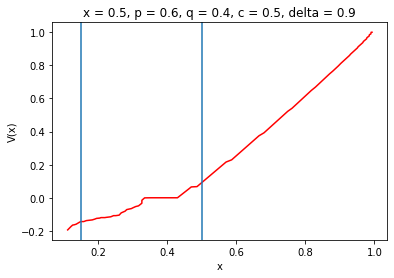

In [94]:
x_tot = []
y_tot = []
high, low = 0.99, 0.15

delta = 0.9 # discount rate
x = 0.5
p = 0.6
q = 0.4
c = 0.5
debug = False # set true to see equations


for x_temp in [0.5, 0.51, 0.62, 0.53, 0.64, 0.55, 0.66, 0.57, 0.68, 0.59]:
    x_plot, y_plot = solve_split_recurrence(x_temp, p,q,c,delta,high,low, debug)
    x_tot += x_plot
    y_tot += y_plot
    
min_x = 1
for i in range(len(x_tot)):
    if y_tot[i] > 0 and x_tot[i] < min_x:
        min_x = x_tot[i]

print("min x is", min_x)

x_tot = sorted(x_tot)
y_tot = sorted(y_tot)

plt.plot(x_tot, y_tot,'r')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title(f'x = {x}, p = {p}, q = {q}, c = {c}, delta = {delta}')
plt.axvline(x=low)
plt.axvline(x=(c-q)/(p-q))
plt.show()

In [115]:
x_tot = []
y_tot = []
high, low = 0.99, 0.1

delta = 0.9 # discount rate
x = 0.5
p = 0.7
q = 0.4
c = 0.5
debug = True # set true to see equations


# for x_temp in [0.5, 0.51, 0.62, 0.53, 0.64, 0.55, 0.66, 0.57, 0.68, 0.59]:
x_tot, y_tot = solve_split_recurrence(0.5, p,q,c,delta,high,low, debug)

new_x = []
new_y = []

for i in range(len(x_tot)):
    if abs(y_tot[i]) <= 20:
        new_x.append(x_tot[i])
        new_y.append(y_tot[i])
    
# min_x = 1
# for i in range(len(x_tot)):
#     if y_tot[i] > 0 and x_tot[i] < min_x:
#         min_x = x_tot[i]

# print("min x is", min_x)

plt.plot(x_tot, y_tot, 'ro')
# plt.plot(new_x, new_y, 'ro')
plt.show()

---HELLO---
max possible value 2.0
0.994 2.0 var0.994
0.993 2.0 var0.993
0.991 2.0 var0.991
0.992 2.0 var0.992
0.915 0.29295*var0.843 + 0.60705*var0.95 + 0.174 var0.915
0.86 0.3078*var0.754 + 0.17348499*var0.843 + 0.35949501*var0.95 + 0.2610428 var0.86
0.885 0.30105*var0.794 + 0.59895*var0.931 + 0.165 var0.885
0.939 0.0862417935*var0.794 + 0.1715812065*var0.931 + 0.61353*var0.964 + 0.22926755 var0.939
0.815 0.31995*var0.688 + 0.1746240525*var0.794 + 0.3474209475*var0.931 + 0.23970825 var0.815
0.898 0.095197923*var0.688 + 0.10391487149286*var0.794 + 0.20674244238714*var0.931 + 0.3696272838*var0.964 + 0.378447320878 var0.898
0.946 0.02709142492734*var0.688 + 0.0295720941294381*var0.794 + 0.0588347642545323*var0.931 + 0.105188532423804*var0.964 + 0.61542*var0.968 + 0.291698538575461 var0.946
0.911 0.29403*var0.837 + 0.60597*var0.947 + 0.173 var0.911
0.667 0.35991*var0.5 + 0.54009*var0.778 + 0.1 var0.667
0.881 0.30213*var0.787 + 0.59787*var0.928 + 0.164 var0.881
0.913 0.29349*var0.84 + 0.6

0.355 0.000660645686977969*var0.124 + 0.000260202084312008*var0.198 + 0.000563315363251743*var0.199 + 0.000918217571752415*var0.22 + 0.00114616639893733*var0.222 + 0.00487089189890869*var0.243 + 0.000215164457672329*var0.302 + 0.3715237935*var0.325 + 0.00466805937996081*var0.361 + 0.00280126792076975*var0.391 + 0.0152439003946858*var0.425 + 9.50339721425004e-5*var0.431 + 0.000562414779137831*var0.465 + 4.5254386264276e-5*var0.57 + 0.000125858323601843*var0.603 + 0.000821434802519153*var0.635 + 0.00197619862538411*var0.665 + 0.00741867294863695*var0.694 + 0.11890636154982*var0.747 + 0.00212721808870007*var0.776 + 0.0116356344279089*var0.82 + 7.31506013450281e-5*var0.823 + 0.000210301728753507*var0.841 + 0.00116566418359946*var0.874 + 0.02003528448458 var0.355
0.524 0.00026328051917446*var0.124 + 0.000103695734640021*var0.198 + 0.000224492438563085*var0.199 + 0.000365928066694772*var0.22 + 0.000456770233304503*var0.222 + 0.00194114783955309*var0.243 + 8.57473396715766e-5*var0.302 + 0.148

0.659 0.00139897458089114*var0.124 + 3.44269688388746e-5*var0.198 + 0.0012731119516495*var0.199 + 0.00018222275866894*var0.22 + 0.00327545327114257*var0.222 + 0.000966724660429685*var0.243 + 2.84681043163219e-5*var0.302 + 0.1475181801*var0.325 + 0.000823478158936252*var0.361 + 0.0121078403332322*var0.425 + 1.25738101069982e-5*var0.431 + 0.00127107660080754*var0.465 + 0.00103859517694226*var0.533 + 5.98754368114309e-6*var0.57 + 1.66521363432202e-5*var0.603 + 0.00195696483586262*var0.635 + 0.0041847721073468*var0.665 + 0.0117849246571918*var0.694 + 0.00294786146636986*var0.695 + 0.094444282826244*var0.747 + 0.094498396991964*var0.748 + 0.000281449209166799*var0.776 + 0.0184875633782862*var0.82 + 9.67845234487232e-6*var0.823 + 2.78247235478594e-5*var0.841 + 0.3057809292*var0.856 + 0.232082931348163 var0.659
0.108 0.00539070794324948*var0.124 + 0.00530388713548175*var0.199 + 0.0168309386791702*var0.222 + 0.00529540769961367*var0.465 + 0.00862010120905178*var0.635 + 0.01612529959293*var0.66

0.653 1.99372369581677e-5*var0.124 + 8.75263170423347e-6*var0.198 + 1.79606808415805e-5*var0.199 + 2.99340047303644e-5*var0.22 + 4.47464320793612e-5*var0.222 + 0.000158790367325786*var0.243 + 7.23766398269438e-6*var0.302 + 0.0107227327991642*var0.325 + 0.000153793820248933*var0.361 + 0.00010004320783622*var0.391 + 0.0121807174640345*var0.419 + 0.000354459998426406*var0.425 + 3.19673595141645e-6*var0.431 + 1.79319667235284e-5*var0.465 + 1.1972909919856e-5*var0.533 + 0.0288162816465576*var0.558 + 9.03499257349271e-6*var0.567 + 1.52225904346474e-6*var0.57 + 0.0320121630747098*var0.591 + 4.23360003557177e-6*var0.603 + 2.73937114632458e-5*var0.635 + 0.010449797841916*var0.658 + 5.96385340089294e-5*var0.665 + 0.0382409501743871*var0.688 + 0.000194084047031724*var0.694 + 1.54396797335845e-5*var0.695 + 2.62039276647364e-5*var0.723 + 0.0026167569967078*var0.747 + 0.000197734919597198*var0.748 + 7.15549859418089e-5*var0.776 + 0.00803136906145558*var0.794 + 0.000289904795712077*var0.82 + 2.460626

0.071 0 var0.071
0.133 1.81904600490331e-5*var0.124 + 2.57754024250602e-6*var0.198 + 1.92411109507462e-5*var0.199 + 8.99038306450843e-6*var0.22 + 7.09995728680869e-5*var0.222 + 4.76913676245279e-5*var0.243 + 2.13140125250648e-6*var0.302 + 0.00299556256370972*var0.325 + 4.588415301262e-5*var0.361 + 2.83923521882881e-5*var0.391 + 0.0270618611739436*var0.419 + 0.000133492165348857*var0.425 + 2.82243494838074e-5*var0.429 + 9.41398637332846e-7*var0.431 + 3.85393371670309e-5*var0.462 + 1.92103497821599e-5*var0.465 + 0.000422037335445221*var0.494 + 5.02089650055748e-5*var0.533 + 4.35276335566382e-5*var0.567 + 4.48286192843153e-7*var0.57 + 0.0355459128571932*var0.591 + 1.2467421035302e-6*var0.603 + 3.27297617015692e-5*var0.635 + 0.00231839012413848*var0.658 + 0.000583567986036187*var0.661 + 5.44133759632077e-5*var0.665 + 0.00326202900978099*var0.688 + 0.000118055563695437*var0.694 + 5.14835789000384e-5*var0.695 + 0.000126241936765021*var0.723 + 0.000712189936100581*var0.747 + 0.000439307040753

0.12 0.3924*var0.193 - 0.064 var0.12
0.214 0.189223128*var0.193 + 0.41778*var0.323 - 0.06686208 var0.214
0.353 0.08414563279032*var0.193 + 0.1857825882*var0.323 + 0.45531*var0.488 - 0.0237328983552 var0.353
0.522 0.0335791562213051*var0.193 + 0.074138399647092*var0.323 + 0.1816960086*var0.488 + 0.50094*var0.656 + 0.0475291495823739 var0.522
0.215 0.378293166*var0.193 + 0.07798533055632*var0.295 + 0.03428443226827*var0.423 + 0.0162620944949521*var0.562 + 0.0260871099189857*var0.818 - 0.0475792887983084 var0.215
0.072 0 var0.072
0.135 0.1499743256607*var0.193 + 0.0309172842990531*var0.295 + 0.0135920631727556*var0.423 + 0.00644710736252377*var0.562 + 0.0103422347273819*var0.818 - 0.0778628090440894 var0.135
0.238 0.107048411857443*var0.193 + 0.0147085888324315*var0.295 + 0.078820120869732*var0.323 + 0.00646628813380677*var0.423 + 0.1931698206*var0.488 + 0.00306714685664706*var0.562 + 0.00492021474920465*var0.818 - 0.0761113722308122 var0.238
0.384 0.0622773462183341*var0.193 + 0.00641765

0.487 0.000125686914314809*var0.124 + 8.89440285265301e-7*var0.198 + 0.000172132112255354*var0.199 + 3.13900663010586e-6*var0.22 + 0.000904852473193984*var0.222 + 1.66515679985421e-5*var0.243 + 7.35489637283426e-7*var0.302 + 0.000634984433924787*var0.325 + 1.5957669677213e-5*var0.361 + 9.57369156453869e-6*var0.391 + 5.21564908984846e-5*var0.425 + 0.000522464289588936*var0.429 + 3.24851522676367e-7*var0.431 + 0.000665881959442651*var0.462 + 0.000171856921028726*var0.465 + 0.00833321773131904*var0.494 + 0.000931047827748538*var0.533 + 0.0317431264991309*var0.561 + 0.00125727271413138*var0.567 + 1.54691590326151e-7*var0.57 + 4.30217396387972e-7*var0.603 + 0.000332362646398667*var0.635 + 0.0129626354531953*var0.661 + 0.000375969013638591*var0.665 + 0.000368342074331615*var0.694 + 0.000759340781839056*var0.695 + 0.0915713442130061*var0.717 + 0.0458264736804779*var0.718 + 0.00364643169188678*var0.723 + 0.000407380316151601*var0.748 + 0.00697103509034844*var0.773 + 7.27140010671921e-6*var0.77

0.319 2.6386368916782e-5*var0.124 + 0.00234709673639945*var0.193 + 1.56208661861006e-5*var0.198 + 2.27642375974857e-5*var0.199 + 5.32036223745825e-5*var0.22 + 4.85826810332314e-5*var0.222 + 0.000282227972520997*var0.243 + 0.000193498043959187*var0.295 + 1.29170956112485e-5*var0.302 + 0.00310972179765055*var0.323 + 0.0191880328214213*var0.325 + 0.000273731799343982*var0.361 + 0.00017988862434078*var0.391 + 0.000169496330447946*var0.419 + 8.50669034142327e-5*var0.423 + 0.000596095945641199*var0.425 + 1.85538121168562e-6*var0.429 + 5.705230862761e-6*var0.431 + 2.41289942668423e-6*var0.462 + 2.27278439322619e-5*var0.465 + 0.00508141341539102*var0.488 + 2.90646506431629e-5*var0.494 + 3.76672891279281e-6*var0.533 + 0.0773486882671744*var0.556 + 8.05242669092706e-5*var0.561 + 4.03496843958391e-5*var0.562 + 5.09631105586814e-6*var0.567 + 2.71678343406621e-6*var0.57 + 7.55572745156754e-6*var0.603 + 3.35273640397823e-5*var0.635 + 0.00700332895275517*var0.656 + 0.0175560406606918*var0.658 + 4.384

0.584 6.71045673221341e-6*var0.124 + 1.13975879534823e-5*var0.193 + 1.93193652047253e-6*var0.198 + 6.56841387561251e-6*var0.199 + 6.64000762538847e-6*var0.22 + 2.059237178574e-5*var0.222 + 3.5223173216063e-5*var0.243 + 9.39633608044127e-7*var0.295 + 1.59754321255318e-6*var0.302 + 1.51009232597522e-5*var0.323 + 0.00233508878304201*var0.325 + 3.40574670043804e-5*var0.361 + 2.18821108408605e-5*var0.391 + 0.00715224085653807*var0.419 + 4.13088007220972e-7*var0.423 + 8.36856199023905e-5*var0.425 + 4.98222065665505e-6*var0.429 + 7.05603884584995e-7*var0.431 + 6.80245822730057e-6*var0.462 + 6.55791281426061e-6*var0.465 + 2.467553016957e-5*var0.488 + 7.45053209045884e-5*var0.494 + 1.12076392912548e-5*var0.533 + 0.000375608071000941*var0.556 + 0.00413411310918596*var0.558 + 3.91028797516037e-7*var0.561 + 1.95939549343976e-7*var0.562 + 9.4620507567597e-6*var0.567 + 3.36002694854241e-7*var0.57 + 0.0125261642112262*var0.591 + 9.34467117797136e-7*var0.603 + 0.00291104500761217*var0.621 + 1.06383977

0.588 1.34572369054881e-6*var0.124 + 0.00984578996268408*var0.193 + 1.69289791443989e-8*var0.198 + 1.76574999607828e-6*var0.199 + 6.18049126863116e-8*var0.22 + 8.87139789378357e-6*var0.222 + 3.27860900086129e-7*var0.243 + 0.000901865363266169*var0.295 + 1.39987910787948e-8*var0.302 + 0.0120792530534132*var0.323 + 1.37541824944513e-5*var0.325 + 3.10706723729681e-7*var0.361 + 1.69652230198776e-7*var0.391 + 0.000395061399822753*var0.419 + 0.000396484079011086*var0.423 + 1.33485393228695e-6*var0.425 + 4.32451544382235e-6*var0.429 + 6.18299479292653e-9*var0.431 + 5.62397677057761e-6*var0.462 + 1.76292705443787e-6*var0.465 + 0.0236837058505036*var0.488 + 6.77437767419608e-5*var0.494 + 8.7794773674925e-6*var0.533 + 0.000187685653847517*var0.561 + 0.000188063827575457*var0.562 + 1.18784623498487e-5*var0.567 + 2.94429063966244e-9*var0.57 + 8.18845452771141e-9*var0.603 + 3.34916999451929e-6*var0.635 + 0.0326414659332743*var0.656 + 0.000102186008954611*var0.661 + 4.0254819789629e-6*var0.665 + 0.0

0.348 1.0387411327635e-5*var0.124 + 0.00261919173576543*var0.193 + 5.81727524394493e-6*var0.198 + 9.22381682271115e-6*var0.199 + 1.98148172367968e-5*var0.22 + 2.18985968668991e-5*var0.222 + 0.000105111185350517*var0.243 + 0.000197922592254655*var0.295 + 4.81037988724641e-6*var0.302 + 0.00366308522509145*var0.323 + 0.00714285188080007*var0.325 + 0.000101944169936152*var0.361 + 6.69816999467552e-5*var0.391 + 0.000204953666365907*var0.419 + 8.7012052909292e-5*var0.423 + 0.000222249115053069*var0.425 + 2.61332233984765e-6*var0.429 + 2.12465159508642e-6*var0.431 + 3.38898269329423e-6*var0.462 + 9.20907051284271e-6*var0.465 + 0.00519760559287049*var0.488 + 4.1043153824414e-5*var0.494 + 5.21371209773027e-6*var0.533 + 0.0215750122909547*var0.556 + 0.000119837680390147*var0.561 + 4.12723248714913e-5*var0.562 + 7.05234046561922e-6*var0.567 + 1.01174139934799e-6*var0.57 + 2.81378418650747e-6*var0.603 + 1.390960497263e-5*var0.635 + 0.00911372372361733*var0.656 + 0.0065304356541864*var0.658 + 6.218

0.448 2.30279131803909e-6*var0.124 + 0.0063216928434349*var0.193 + 2.69987277371466e-8*var0.198 + 3.04208874707621e-6*var0.199 + 9.82597555212526e-8*var0.22 + 1.53979425673607e-5*var0.222 + 5.21245081174315e-7*var0.243 + 0.00043421276206157*var0.295 + 2.23255959949969e-8*var0.302 + 0.00930706000978502*var0.323 + 2.1685838812061e-5*var0.325 + 4.94477833230547e-7*var0.361 + 2.72445777607969e-7*var0.391 + 0.00057093610747957*var0.419 + 0.000190891516708611*var0.423 + 2.07765753402351e-6*var0.425 + 7.73776897963347e-6*var0.429 + 9.86078319256775e-9*var0.431 + 1.00242023921326e-5*var0.462 + 3.03722529584188e-6*var0.465 + 0.0114027744628728*var0.488 + 0.000121636346273438*var0.494 + 1.53397086203178e-5*var0.533 + 0.000361649048901908*var0.561 + 9.05453489417461e-5*var0.562 + 2.07474441050232e-5*var0.567 + 4.69562285364242e-9*var0.57 + 0.48096*var0.587 + 1.30591367911769e-8*var0.603 + 5.78677987130008e-6*var0.635 + 0.0235630873431803*var0.656 + 0.000184596915502438*var0.661 + 6.88837167479617

0.258 5.92846324644788e-7*var0.124 + 0.000833553180596594*var0.193 + 1.54547318627133e-7*var0.198 + 6.68304463114997e-7*var0.199 + 5.26864593569095e-7*var0.22 + 2.74970018653176e-6*var0.222 + 2.79484659258882e-6*var0.243 + 0.0276159072581844*var0.288 + 5.29576861938567e-5*var0.295 + 1.27797169976725e-7*var0.302 + 0.00127320055027054*var0.323 + 0.000187428070543274*var0.325 + 2.70985542808639e-6*var0.361 + 1.77678370641135e-6*var0.391 + 8.5317759546056e-5*var0.419 + 2.32816119704251e-5*var0.423 + 5.97844191015634e-6*var0.425 + 1.16936644025845e-6*var0.429 + 5.64455339085511e-8*var0.431 + 1.51462814579679e-6*var0.462 + 6.67236030719929e-7*var0.465 + 0.0013907112008341*var0.488 + 1.83852387313668e-5*var0.494 + 2.31558552487386e-6*var0.533 + 0.00171643658315263*var0.556 + 5.48373066436399e-5*var0.561 + 1.10431396645369e-5*var0.562 + 3.13185309241786e-6*var0.567 + 2.6878893271562e-8*var0.57 + 0.0158580276700307*var0.587 + 7.47536918891361e-8*var0.603 + 1.17841810573602e-6*var0.635 + 0.09907

0.785 9.31413410191143e-7*var0.124 + 1.01970421413485e-5*var0.193 + 2.59822271156151e-7*var0.198 + 9.16929535588799e-7*var0.199 + 8.93342945790142e-7*var0.22 + 2.91353838717607e-6*var0.222 + 4.73890668189112e-6*var0.243 + 9.53488620272484e-5*var0.288 + 7.4168563214757e-7*var0.295 + 2.14850385277741e-7*var0.302 + 1.45702951616418e-5*var0.323 + 0.000313626783574092*var0.325 + 4.58147839507751e-6*var0.361 + 2.94079647081427e-6*var0.391 + 0.00101211144671371*var0.419 + 3.26064794985365e-7*var0.423 + 1.1311471830155e-5*var0.425 + 7.43478305133668e-7*var0.429 + 9.48952524509634e-8*var0.431 + 1.01442251753943e-6*var0.462 + 9.15463621063477e-7*var0.465 + 1.94772579819585e-5*var0.488 + 1.11256388128133e-5*var0.494 + 1.62879375072289e-6*var0.533 + 8.69464291414171e-5*var0.556 + 0.000503927304562729*var0.558 + 5.14609572165265e-7*var0.561 + 1.54661931282339e-7*var0.562 + 1.3887287975774e-6*var0.567 + 4.51883291021713e-8*var0.57 + 5.47526785268272e-5*var0.587 + 0.00173462227779402*var0.591 + 1.256

0.511 1.81562224175256e-6*var0.124 + 3.64057373399902e-5*var0.193 + 5.06097710979309e-7*var0.198 + 1.78973590039011e-6*var0.199 + 1.73997453944461e-6*var0.22 + 5.70423377031769e-6*var0.222 + 9.23002397107538e-6*var0.243 + 0.000506268162970957*var0.288 + 2.57716182068803e-6*var0.295 + 4.18498721099771e-7*var0.302 + 5.27777487034472e-5*var0.323 + 0.000610848403330871*var0.325 + 8.92363138322902e-6*var0.361 + 5.72907784289637e-6*var0.391 + 0.00196134871993829*var0.419 + 1.13298910520024e-6*var0.423 + 2.20109977605807e-5*var0.425 + 1.47904718626169e-6*var0.429 + 1.84842776697048e-7*var0.431 + 2.01665870023508e-6*var0.462 + 1.78687461198022e-6*var0.465 + 6.76783309088119e-5*var0.488 + 2.21482013094661e-5*var0.494 + 3.21054014810303e-6*var0.533 + 0.00286919106105124*var0.549 + 0.000241448198331662*var0.556 + 0.000927324772378329*var0.558 + 1.95517704966855e-6*var0.561 + 5.37409391713031e-7*var0.562 + 2.75999594332688e-6*var0.567 + 8.8020591228856e-8*var0.57 + 0.000290717029927369*var0.587 + 

0.827 1.90299591473682e-7*var0.124 + 3.38604409929352e-6*var0.193 + 5.29689927050485e-8*var0.198 + 1.87561073199535e-7*var0.199 + 1.82116948574447e-7*var0.22 + 5.9760642323266e-7*var0.222 + 9.66073803597176e-7*var0.243 + 4.78926774945644e-5*var0.288 + 2.39604242093029e-7*var0.295 + 4.38007428686279e-8*var0.302 + 4.90978528645959e-6*var0.323 + 6.3930094469418e-5*var0.325 + 9.33990087837319e-7*var0.361 + 5.99562901406164e-7*var0.391 + 0.000206153450070842*var0.419 + 1.05336418408794e-7*var0.423 + 2.30510859422936e-6*var0.425 + 1.5444150230336e-7*var0.429 + 1.93459394856799e-8*var0.431 + 2.10611845394625e-7*var0.462 + 1.87261215368681e-7*var0.465 + 6.29219905919524e-6*var0.488 + 2.3123426163837e-6*var0.494 + 3.36055904954158e-7*var0.533 + 0.000287875636313196*var0.549 + 2.30211382788756e-5*var0.556 + 9.86298063415098e-5*var0.558 + 1.82004281683097e-7*var0.561 + 4.99640996391525e-8*var0.562 + 2.88338357409573e-7*var0.567 + 9.21237530530136e-9*var0.57 + 2.75016640880257e-5*var0.587 + 0.0003

0.342 1.72817817934552e-7*var0.124 + 8.53670524242014e-5*var0.193 + 4.59230441422034e-8*var0.198 + 1.79388985489285e-7*var0.199 + 1.57489607041298e-7*var0.22 + 6.38472225287903e-7*var0.222 + 8.3543284784294e-7*var0.243 + 0.00270069053711416*var0.288 + 5.46835156733202e-6*var0.295 + 3.79743571756763e-8*var0.302 + 0.000129913340863386*var0.323 + 5.54432097624288e-5*var0.325 + 8.08387619509517e-7*var0.361 + 5.222626983404e-7*var0.391 + 0.0303645411089256*var0.409 + 0.000135075534483339*var0.419 + 2.40403326615238e-6*var0.423 + 1.93167443964911e-6*var0.425 + 2.17160429435744e-7*var0.429 + 1.6772537811326e-8*var0.431 + 2.8822824909807e-7*var0.462 + 1.79102192546856e-7*var0.465 + 0.00014360328634731*var0.488 + 3.33811383616956e-6*var0.494 + 4.41214123475313e-7*var0.533 + 0.0142898663206186*var0.548 + 0.0428818051060884*var0.549 + 0.000193973984602212*var0.556 + 4.1093611987318e-5*var0.558 + 5.54154087630305e-6*var0.561 + 1.14030227589214e-6*var0.562 + 4.92739776635283e-7*var0.567 + 7.9869428

0.732 2.95516326353819e-7*var0.124 + 6.79325500456459e-6*var0.193 + 8.22208602216991e-8*var0.198 + 2.9143057804993e-7*var0.199 + 2.82682268301335e-7*var0.22 + 9.29787786765962e-7*var0.222 + 1.49954155433225e-6*var0.243 + 0.000123842145103864*var0.288 + 4.70072410961023e-7*var0.295 + 6.79894891915662e-8*var0.302 + 9.96415136089061e-6*var0.323 + 9.92357270828427e-5*var0.325 + 1.44975485847965e-6*var0.361 + 9.30716646330976e-7*var0.391 + 0.000546275447476402*var0.409 + 0.000319142351990337*var0.419 + 2.06656375241452e-7*var0.423 + 3.57678503441198e-6*var0.425 + 2.41261232065694e-7*var0.429 + 3.00296400795617e-8*var0.431 + 3.28860377475137e-7*var0.462 + 2.90964661858004e-7*var0.465 + 1.23444775274646e-5*var0.488 + 3.61384926904539e-6*var0.494 + 5.24372145467735e-7*var0.533 + 0.000257082861574327*var0.548 + 0.00122089904797874*var0.549 + 3.90266909764227e-5*var0.556 + 0.000152235698654439*var0.558 + 3.82849434863375e-7*var0.561 + 9.80230757757378e-8*var0.562 + 4.52045087977697e-7*var0.567 +

0.287 7.56528549561888e-6*var0.124 + 1.2522626456803e-6*var0.198 + 8.2183605543765e-6*var0.199 + 4.32787962379094e-6*var0.22 + 3.18130660649587e-5*var0.222 + 2.29580875249586e-5*var0.243 + 1.03551212409978e-6*var0.302 + 0.001486354159032*var0.325 + 2.21566968771388e-5*var0.361 + 1.40379815733895e-5*var0.391 + 0.00750090964354572*var0.419 + 5.82135910908425e-5*var0.425 + 9.95446366160692e-6*var0.429 + 4.57365642167468e-7*var0.431 + 1.35924631882738e-5*var0.462 + 8.20522168858214e-6*var0.465 + 0.0135874608150148*var0.486 + 0.000148848614631176*var0.494 + 0.0373780981447296*var0.52 + 2.4229821470522e-5*var0.533 + 0.00225888514969434*var0.558 + 2.82231583316394e-5*var0.567 + 2.17793710691368e-7*var0.57 + 0.00955482030878186*var0.591 + 6.05712585705284e-7*var0.603 + 1.41978835696737e-5*var0.635 + 0.0560127910374002*var0.654 + 0.00129620038221023*var0.658 + 0.000205818961900508*var0.661 + 2.26301436485105e-5*var0.665 + 0.00367711721219084*var0.688 + 4.78073306707086e-5*var0.694 + 2.317798247

0.512 2.1882889820367e-6*var0.124 + 1.63868711955617e-6*var0.193 + 5.21690415493028e-7*var0.198 + 2.22472452274504e-6*var0.199 + 1.79662706513483e-6*var0.22 + 7.59011604728204e-6*var0.222 + 9.53055227698252e-6*var0.243 + 1.35095732262681e-7*var0.295 + 4.31392529461107e-7*var0.302 + 2.17113379955113e-6*var0.323 + 0.000626838177446712*var0.325 + 9.20888448626751e-6*var0.361 + 5.88700999329255e-6*var0.391 + 0.0023827486873675*var0.419 + 5.93916887887946e-8*var0.423 + 2.31949834437677e-5*var0.425 + 2.11227674343284e-6*var0.429 + 1.90537722032713e-7*var0.431 + 2.88415398221471e-6*var0.462 + 2.22116780887974e-6*var0.465 + 0.00113779521252724*var0.486 + 3.54772199364689e-6*var0.488 + 3.1585694633025e-5*var0.494 + 0.00312999034193721*var0.52 + 4.82469577217408e-6*var0.533 + 5.40030145380477e-5*var0.556 + 0.00101313849308328*var0.558 + 5.62201280200951e-8*var0.561 + 2.81711899949423e-8*var0.562 + 4.72986440866326e-6*var0.567 + 9.07324767805583e-8*var0.57 + 0.0038010393981113*var0.591 + 2.523387

0.255 7.82052608731935e-7*var0.124 + 2.68373814128088e-5*var0.193 + 1.85571487288751e-7*var0.198 + 7.98940925622464e-7*var0.199 + 6.38944480407762e-7*var0.22 + 2.75344460498938e-6*var0.222 + 3.38940314646372e-6*var0.243 + 0.00564147690987793*var0.288 + 4.13414694088018e-7*var0.295 + 1.53451454962419e-7*var0.302 + 5.48257730701675e-5*var0.323 + 0.000223017767248735*var0.325 + 3.27524494413567e-6*var0.361 + 2.09491639062708e-6*var0.391 + 0.00083061108526434*var0.419 + 1.81748131053085e-7*var0.423 + 8.2279458791333e-6*var0.425 + 7.97756025171918e-7*var0.429 + 6.77765345349605e-8*var0.431 + 0.00658919049067568*var0.447 + 1.08344462614026e-6*var0.462 + 7.97663641968392e-7*var0.465 + 0.0360128582722387*var0.48 + 0.000337563939311149*var0.486 + 1.08566005613045e-5*var0.488 + 1.19930577333797e-5*var0.494 + 0.000928613390351102*var0.52 + 1.78273570777204e-6*var0.533 + 0.00113372200589477*var0.549 + 4.20825697647122e-5*var0.556 + 0.00034810532328076*var0.558 + 3.91584802194352e-6*var0.561 + 8.62

0.61 2.85255655571076e-7*var0.124 + 7.35461286140943e-6*var0.193 + 7.45438628352062e-8*var0.198 + 2.85400588089548e-7*var0.199 + 2.56433335676944e-7*var0.22 + 9.40732474193888e-7*var0.222 + 1.36029933062555e-6*var0.243 + 0.000754395496087559*var0.288 + 3.34436137835306e-7*var0.295 + 6.16412810917574e-8*var0.302 + 1.26562192636709e-5*var0.323 + 8.98253130298293e-5*var0.325 + 1.3148828717177e-6*var0.361 + 8.42928946543249e-7*var0.391 + 0.000572661352420186*var0.409 + 0.000306425668651152*var0.419 + 1.47027050265509e-7*var0.423 + 3.26694928695991e-6*var0.425 + 2.5555854974859e-7*var0.429 + 2.72257595584081e-8*var0.431 + 0.000781949527286592*var0.447 + 3.47900605759328e-7*var0.462 + 2.8494431216934e-7*var0.465 + 0.00427370214020454*var0.48 + 5.34075833983011e-5*var0.486 + 8.78256049837035e-6*var0.488 + 3.8329214671829e-6*var0.494 + 0.000146920305501713*var0.52 + 5.64381912202405e-7*var0.533 + 0.000269500340667544*var0.548 + 0.00111183320547175*var0.549 + 2.75460910541148e-5*var0.556 + 0.00

0.147 9.27368793137556e-8*var0.124 + 8.86154363404387e-5*var0.193 + 1.05621848986214e-9*var0.198 + 1.22833542716294e-7*var0.199 + 3.83881138447275e-9*var0.22 + 6.23524210506756e-7*var0.222 + 2.03639919756104e-8*var0.243 + 0.0234693263249527*var0.288 + 8.73400684531661e-10*var0.302 + 0.000195651331766952*var0.323 + 8.44149277776735e-7*var0.325 + 1.93268211603371e-8*var0.361 + 1.06901768267717e-8*var0.391 + 2.13355102588637e-5*var0.419 + 8.04139911827389e-8*var0.425 + 3.16936037668966e-7*var0.429 + 3.85764160219372e-10*var0.431 + 0.0279786844369386*var0.447 + 4.10004418635967e-7*var0.462 + 1.22637166149202e-7*var0.465 + 0.076593965157072*var0.481 + 4.98856775225563e-6*var0.494 + 6.22740914393187e-7*var0.533 + 1.52024458746003e-5*var0.561 + 8.42170608784317e-7*var0.567 + 1.8369768115453e-10*var0.57 + 5.10887100857799e-10*var0.603 + 2.33920695213982e-7*var0.635 + 0.00043976224331062*var0.656 + 7.58752020821526e-6*var0.661 + 2.77405115986729e-7*var0.665 + 3.04644105378394e-7*var0.694 + 5.20

0.438 3.9953253443124e-7*var0.124 + 1.34544175051815e-5*var0.193 + 1.11087371723676e-7*var0.198 + 3.94460561165812e-7*var0.199 + 3.81904796226958e-7*var0.22 + 1.26183306737842e-6*var0.222 + 2.02588618688763e-6*var0.243 + 0.00030532206835581*var0.288 + 9.07997780674203e-7*var0.295 + 9.18595796585102e-8*var0.302 + 1.99809541359362e-5*var0.323 + 0.000134078715014036*var0.325 + 1.95866417215257e-6*var0.361 + 1.25761753753348e-6*var0.391 + 0.00228913431221817*var0.409 + 0.00042864174266734*var0.419 + 3.99180053340703e-7*var0.423 + 4.82872273670229e-6*var0.425 + 3.30028471950003e-7*var0.429 + 4.05725965558081e-8*var0.431 + 4.4944947944325e-7*var0.462 + 3.9382992877386e-7*var0.465 + 2.38447480370207e-5*var0.488 + 4.94796952455277e-6*var0.494 + 7.15754925123239e-7*var0.533 + 0.00107729022461411*var0.548 + 0.00381568717395436*var0.549 + 6.17959400728635e-5*var0.556 + 0.000203478401610772*var0.558 + 7.96555603276943e-7*var0.561 + 1.89342605913133e-7*var0.562 + 6.22923541049019e-7*var0.567 + 1.93

0.505 6.52564112971777e-8*var0.124 + 2.65652931929103e-6*var0.193 + 1.68946949050742e-8*var0.198 + 6.55274904991406e-8*var0.199 + 5.81173651733476e-8*var0.22 + 2.17721727504114e-7*var0.222 + 3.08294599828084e-7*var0.243 + 0.000314822326637665*var0.288 + 1.0827556752176e-7*var0.295 + 1.39704409993536e-8*var0.302 + 4.70564035061554e-6*var0.323 + 2.03552109538222e-5*var0.325 + 2.98003170311671e-7*var0.361 + 1.91047987705988e-7*var0.391 + 0.000304892428510557*var0.409 + 6.93272443200975e-5*var0.419 + 4.76008287010775e-8*var0.423 + 7.40268441580663e-7*var0.425 + 6.03226302897409e-8*var0.429 + 6.17047311212014e-9*var0.431 + 0.000329741654282403*var0.447 + 8.19559439644442e-8*var0.462 + 6.54227303224833e-8*var0.465 + 0.00113857939469676*var0.48 + 0.00047503005614094*var0.481 + 1.2450189527146e-5*var0.486 + 2.843403013832e-6*var0.488 + 9.06521496406131e-7*var0.494 + 3.42495490807153e-5*var0.52 + 1.3260623988302e-7*var0.533 + 0.000143485522470284*var0.548 + 0.000497803158708331*var0.549 + 7.357

0.538 4.04470472121537e-8*var0.124 + 1.61722036265716e-6*var0.193 + 1.07919240786274e-8*var0.198 + 4.03414088359611e-8*var0.199 + 3.71136769561797e-8*var0.22 + 1.32054495980338e-7*var0.222 + 1.96876532726224e-7*var0.243 + 0.000129860306545133*var0.288 + 8.30638791553536e-8*var0.295 + 8.92398113473394e-9*var0.302 + 2.68099854962236e-6*var0.323 + 1.30124781320038e-5*var0.325 + 1.90322349334925e-7*var0.361 + 1.22099681374325e-7*var0.391 + 0.000239609312378179*var0.409 + 4.3085684387915e-5*var0.419 + 3.65170977480802e-8*var0.423 + 4.71155028115983e-7*var0.425 + 3.58154281988306e-8*var0.429 + 3.9415495650775e-9*var0.431 + 0.000119574286063607*var0.447 + 4.86963404120914e-8*var0.462 + 4.02769141775503e-8*var0.465 + 0.000412883287505435*var0.48 + 0.000172260250059767*var0.481 + 4.51481487015916e-6*var0.486 + 2.1813239102482e-6*var0.488 + 5.3782966378313e-7*var0.494 + 1.24199212508941e-5*var0.52 + 7.82914636332201e-8*var0.533 + 0.000112762614484335*var0.548 + 0.000386050349489468*var0.549 + 5.

0.276 2.64058455416758e-8*var0.124 + 1.06360766646075e-6*var0.193 + 7.06471822180051e-9*var0.198 + 2.63213460069307e-8*var0.199 + 2.42950733789564e-8*var0.22 + 8.60475230958306e-8*var0.222 + 1.28877819911791e-7*var0.243 + 8.1145965059337e-5*var0.288 + 5.5802952890877e-8*var0.295 + 5.84190656589363e-9*var0.302 + 1.75065809202381e-6*var0.323 + 8.51895717494592e-6*var0.325 + 1.24588512136216e-7*var0.361 + 7.99341302101559e-8*var0.391 + 0.000163005567947509*var0.409 + 2.81290107751682e-5*var0.419 + 2.45324671333548e-8*var0.423 + 3.08323219200465e-7*var0.425 + 2.32955042825557e-8*var0.429 + 2.5802569432155e-9*var0.431 + 7.29411016546852e-5*var0.447 + 3.16750794275454e-8*var0.462 + 2.62792655177109e-8*var0.465 + 0.000251861523383334*var0.48 + 0.000105079886523321*var0.481 + 2.75406679176145e-6*var0.486 + 1.46543018025518e-6*var0.488 + 3.49806157278321e-7*var0.494 + 7.57623372321664e-6*var0.52 + 5.08920255097288e-8*var0.533 + 7.67121020248747e-5*var0.548 + 0.000261587217254849*var0.549 + 3.63

0.249 5.88173879954744e-8*var0.124 + 2.21500995140442e-6*var0.193 + 1.63512513302701e-8*var0.198 + 5.80946937911386e-8*var0.199 + 5.62122704745402e-8*var0.22 + 1.86014916843922e-7*var0.222 + 2.98188613234737e-7*var0.243 + 5.2533128718904e-5*var0.288 + 1.48615205579271e-7*var0.295 + 1.35210605020475e-8*var0.302 + 3.29878607995247e-6*var0.323 + 1.97356483759937e-5*var0.325 + 2.88296574925721e-7*var0.361 + 1.85120259869239e-7*var0.391 + 0.000424128885611496*var0.409 + 6.29426985014616e-5*var0.419 + 6.53352100115528e-8*var0.423 + 7.10531547981963e-7*var0.425 + 4.87880615480878e-8*var0.429 + 5.97199045320714e-9*var0.431 + 6.64198496824209e-8*var0.462 + 5.80018165828394e-8*var0.465 + 3.90275417730261e-6*var0.488 + 7.3170094483234e-7*var0.494 + 1.05732851831586e-7*var0.533 + 0.000199599429359387*var0.548 + 0.000681352046343899*var0.549 + 9.58745779173576e-6*var0.556 + 2.98422822557422e-5*var0.558 + 1.32584340774959e-7*var0.561 + 3.09903734365973e-8*var0.562 + 9.23397625291399e-8*var0.567 + 2.

0.124 1.4760433181059e-9*var0.124 + 5.76937466422919e-8*var0.193 + 4.01930673007511e-10*var0.198 + 1.46521540562987e-9*var0.199 + 1.38199977372329e-9*var0.22 + 4.74537638990889e-9*var0.222 + 7.33107934939841e-9*var0.243 + 3.0715237205242e-6*var0.288 + 3.3970365543359e-9*var0.295 + 3.32361654627777e-10*var0.302 + 9.09980491857621e-8*var0.323 + 4.84878293997962e-7*var0.325 + 7.08745511339278e-9*var0.361 + 4.54895840469835e-9*var0.391 + 9.80895800607603e-6*var0.409 + 1.57564415045005e-6*var0.419 + 1.49342791559826e-9*var0.423 + 1.75061429159432e-8*var0.425 + 1.26675960953985e-9*var0.429 + 1.46797703342031e-10*var0.431 + 0.071924229385524*var0.432 + 2.22161546230741e-6*var0.447 + 1.72336340624282e-9*var0.462 + 1.4628729349574e-9*var0.465 + 7.67111329573366e-6*var0.48 + 3.20048772752151e-6*var0.481 + 8.3882437062309e-8*var0.486 + 8.92088972404134e-8*var0.488 + 1.90114025802992e-8*var0.494 + 2.30754370358099e-7*var0.52 + 2.75768024517811e-9*var0.533 + 0.00618001635041374*var0.537 + 4.6161968

0.564 0.0152292218365821*var0.124 + 1.75865753336972e-9*var0.193 + 0.0119903404545366*var0.198 + 0.0119858605643408*var0.199 + 4.21269973718795e-11*var0.22 + 0.0317105307277095*var0.222 + 2.23470630283173e-10*var0.243 + 9.36281424660322e-8*var0.288 + 1.03550632002737e-10*var0.295 + 0.00991496708425057*var0.302 + 2.77386049678349e-9*var0.323 + 1.47803690024507e-8*var0.325 + 0.0266009528468428*var0.33 + 2.16044321144001e-10*var0.361 + 1.38664247565851e-10*var0.391 + 2.99002905788882e-7*var0.409 + 4.80297886056794e-8*var0.419 + 4.55236209670293e-11*var0.423 + 5.33633398958391e-10*var0.425 + 3.86141732846429e-11*var0.429 + 0.00437924885862622*var0.431 + 0.00219244017250114*var0.432 + 6.77206975872415e-8*var0.447 + 5.25326610510145e-11*var0.462 + 0.0119666985170757*var0.465 + 2.33835761621091e-7*var0.48 + 9.75593054713674e-8*var0.481 + 2.55695787572413e-9*var0.486 + 2.71932242757923e-9*var0.488 + 5.79517682827324e-10*var0.494 + 7.03400169700151e-9*var0.52 + 8.40613657469111e-11*var0.533 + 0

0.49 0.00048372873584482*var0.124 + 4.18977442454363e-11*var0.193 + 0.00123769090516288*var0.198 + 0.000380709220726893*var0.199 + 0.00352749743646495*var0.22 + 0.00100722775597598*var0.222 + 0.0133676992893307*var0.243 + 2.23056956387677e-9*var0.288 + 2.46696006117292e-12*var0.295 + 0.0010234625640278*var0.302 + 6.60836436097199e-11*var0.323 + 3.52123201116534e-10*var0.325 + 0.000633733343709295*var0.33 + 0.0170797532964565*var0.361 + 0.00614834079696777*var0.391 + 7.12335803741229e-9*var0.409 + 1.14424767811806e-9*var0.419 + 1.0845414711005e-12*var0.423 + 1.27131264877602e-11*var0.425 + 9.19932804330025e-13*var0.429 + 0.000452043584943899*var0.431 + 5.22320553478457e-5*var0.432 + 1.61335815176945e-9*var0.447 + 1.25152279820524e-12*var0.462 + 0.000380100572891998*var0.465 + 5.57083499768437e-9*var0.48 + 2.32422444497751e-9*var0.481 + 6.09162188150261e-11*var0.486 + 6.47843445524544e-11*var0.488 + 1.38062602866653e-11*var0.494 + 1.67576005294363e-10*var0.52 + 2.00265346501987e-12*var0.

0.556 3.17901285860591e-5*var0.124 + 0.054587891853049*var0.193 + 8.13397057261984e-5*var0.198 + 2.50197976344511e-5*var0.199 + 0.000231823310840456*var0.22 + 6.61939171796401e-5*var0.222 + 0.000878510718544374*var0.243 + 1.46590615775491e-10*var0.288 + 0.0175059817653177*var0.295 + 6.72608511806478e-5*var0.302 + 0.0133999860077445*var0.323 + 2.31411553875939e-11*var0.325 + 4.16482689427295e-5*var0.33 + 0.00112246288731274*var0.361 + 0.000404062297818959*var0.391 + 4.68139374805552e-10*var0.409 + 7.51987180545376e-11*var0.419 + 0.00769609671256263*var0.423 + 8.35492903002523e-13*var0.425 + 6.04569875079059e-14*var0.429 + 2.97078147875005e-5*var0.431 + 3.43263410415801e-6*var0.432 + 1.06028150282498e-10*var0.447 + 8.22487227554173e-14*var0.462 + 2.49797979579772e-5*var0.465 + 3.66109242195024e-10*var0.48 + 1.52745513122462e-10*var0.481 + 4.00334792127675e-12*var0.486 + 0.0328402553065506*var0.488 + 9.07332472277376e-13*var0.494 + 1.10129135639254e-11*var0.52 + 1.31612216617873e-13*var0.

0.652 5.06808478916591e-6*var0.124 + 0.00118922918517021*var0.193 + 3.30309703823766e-6*var0.198 + 4.4082313559129e-6*var0.199 + 1.09883199603309e-5*var0.22 + 9.90130766550542e-6*var0.222 + 5.6264544047637e-5*var0.243 + 8.45115782079354e-13*var0.288 + 0.000173021352573486*var0.295 + 2.73137351974196e-6*var0.302 + 0.0012359271787205*var0.323 + 0.00347839329908142*var0.325 + 2.40108203336102e-7*var0.33 + 5.61316507550544e-5*var0.361 + 3.49744147603563e-5*var0.391 + 2.69889018316737e-12*var0.409 + 6.31538975916095e-5*var0.419 + 7.60648034823186e-5*var0.423 + 0.00010796284048106*var0.425 + 6.91310271916987e-7*var0.429 + 1.20639476330808e-6*var0.431 + 1.9789624596234e-8*var0.432 + 6.11267390305906e-13*var0.447 + 8.99040126256726e-7*var0.462 + 4.40118382376915e-6*var0.465 + 2.11067193426618e-12*var0.48 + 8.80599642062378e-13*var0.481 + 2.30798710512764e-14*var0.486 + 0.00208265033050765*var0.488 + 1.08294141453647e-5*var0.494 + 6.34910155081372e-14*var0.52 + 1.40347351403305e-6*var0.533 + 1.

0.736 1.3688353784939e-7*var0.124 + 0.000104800221263577*var0.193 + 6.16106581558133e-8*var0.198 + 1.35147581578576e-7*var0.199 + 2.08436624802067e-7*var0.22 + 4.33395298621404e-7*var0.222 + 1.09442960751764e-6*var0.243 + 0.00247870147540735*var0.288 + 7.46533149240607e-6*var0.295 + 5.09466474259102e-8*var0.302 + 0.00015400780897066*var0.323 + 7.21978192718151e-5*var0.325 + 1.33507036624904e-9*var0.33 + 1.07007310500671e-6*var0.361 + 6.92159172769547e-7*var0.391 + 1.50066022536658e-14*var0.409 + 9.85188218000851e-6*var0.419 + 3.28195892850309e-6*var0.423 + 2.25892776288333e-6*var0.425 + 1.32605137954998e-7*var0.429 + 2.25021470767307e-8*var0.431 + 1.10035979573101e-10*var0.432 + 3.39882172834158e-15*var0.447 + 1.71807839285778e-7*var0.462 + 1.34931518298674e-7*var0.465 + 1.17359403517249e-14*var0.48 + 4.89638617220133e-15*var0.481 + 1.28330692035024e-16*var0.486 + 0.000182361551790966*var0.488 + 2.08431857490377e-6*var0.494 + 3.5302822706694e-16*var0.52 + 2.63065937507105e-7*var0.533 +

0.509 1.28353905552666e-7*var0.124 + 4.95587758863104e-5*var0.193 + 3.53731495599613e-8*var0.198 + 1.31385093218011e-7*var0.199 + 1.2126683469965e-7*var0.22 + 4.54699472419535e-7*var0.222 + 6.42756292883859e-7*var0.243 + 0.00149285591760911*var0.288 + 3.22233177237939e-6*var0.295 + 2.92505133514029e-8*var0.302 + 0.074934308343825*var0.311 + 7.50285730916748e-5*var0.323 + 4.25798651405703e-5*var0.325 + 6.23914638607201e-11*var0.33 + 6.22307921277971e-7*var0.361 + 4.01332711631312e-7*var0.391 + 0.0183348205333358*var0.409 + 0.000106677591942288*var0.419 + 1.41662303163864e-6*var0.423 + 1.48741941443672e-6*var0.425 + 1.47215873412076e-7*var0.429 + 1.29193850186185e-8*var0.431 + 5.14228014977406e-12*var0.432 + 1.58836169533627e-16*var0.447 + 1.96276199139855e-7*var0.462 + 1.31175045107351e-7*var0.465 + 5.48452363888078e-16*var0.48 + 2.2882142292569e-16*var0.481 + 5.9972417460061e-18*var0.486 + 8.39815182778952e-5*var0.488 + 2.25327877056137e-6*var0.494 + 1.64979677683538e-17*var0.52 + 3.00

0.404 1.30137283172036e-7*var0.124 + 2.58365205855369e-5*var0.193 + 3.59409088014342e-8*var0.198 + 1.30703997394943e-7*var0.199 + 1.23426377249813e-7*var0.22 + 4.34475037173752e-7*var0.222 + 6.54648930529916e-7*var0.243 + 0.000783441998506856*var0.288 + 1.67134752486342e-6*var0.295 + 2.97200007869205e-8*var0.302 + 0.0127386915269328*var0.311 + 3.91640231474411e-5*var0.323 + 4.33722467622332e-5*var0.325 + 1.06064315478664e-11*var0.33 + 6.33208397893919e-7*var0.361 + 4.07498440145136e-7*var0.391 + 0.00882972854327593*var0.409 + 0.000125073124363516*var0.419 + 7.34768970063396e-7*var0.423 + 1.54111896429563e-6*var0.425 + 1.26527250467245e-7*var0.429 + 1.31267485225675e-8*var0.431 + 8.74177956944334e-13*var0.432 + 2.70018501768851e-17*var0.447 + 1.70290644280791e-7*var0.462 + 1.30495038166493e-7*var0.465 + 9.32358706606128e-17*var0.48 + 3.88992116672337e-17*var0.481 + 1.01951982080464e-18*var0.486 + 4.37822105540654e-5*var0.488 + 1.91911067019274e-6*var0.494 + 2.80462350113436e-18*var0.52 

0.088 0 var0.088
0.162 2.32846995482062e-8*var0.124 + 1.22075991857256e-5*var0.193 + 6.27823196583113e-9*var0.198 + 2.41997583991548e-8*var0.199 + 2.15168096673832e-8*var0.22 + 8.63427202457448e-8*var0.222 + 1.14098003181953e-7*var0.243 + 0.000384395246687788*var0.288 + 7.84321431161769e-7*var0.295 + 5.19155094257173e-9*var0.302 + 0.00596641889280362*var0.311 + 1.85623000095607e-5*var0.323 + 7.5725055297234e-6*var0.325 + 4.96773263082971e-12*var0.33 + 1.10451298953588e-7*var0.361 + 7.13880413050464e-8*var0.391 + 0.00438032361816846*var0.409 + 1.74414038430553e-5*var0.419 + 3.44808629923016e-7*var0.423 + 2.62297460887596e-7*var0.425 + 2.95578689198199e-8*var0.429 + 2.29300746503442e-9*var0.431 + 4.09438588489077e-13*var0.432 + 1.26468522057705e-17*var0.447 + 3.91760959296794e-8*var0.462 + 2.41610697366461e-8*var0.465 + 4.36688696810303e-17*var0.48 + 1.82192174852382e-17*var0.481 + 4.77512333788426e-19*var0.486 + 2.05459905706679e-5*var0.488 + 4.54954485846737e-7*var0.494 + 1.31360105619

0.639 3.00557058117698e-8*var0.124 + 2.9618680806308e-6*var0.193 + 8.33551304470689e-9*var0.198 + 2.9875224968205e-8*var0.199 + 2.86444514274402e-8*var0.22 + 9.70505233374498e-8*var0.222 + 1.51943260549389e-7*var0.243 + 8.52451348811476e-5*var0.288 + 1.93217395229961e-7*var0.295 + 6.89274318623209e-9*var0.302 + 0.000944395110844585*var0.311 + 4.47157983604655e-6*var0.323 + 1.00605320811327e-5*var0.325 + 7.86317972778836e-13*var0.33 + 1.46926062103116e-7*var0.361 + 9.44242518401941e-8*var0.391 + 0.000904872018831073*var0.409 + 3.09197573719657e-5*var0.419 + 8.49435227440515e-8*var0.423 + 3.60412001844575e-7*var0.425 + 2.65492855523622e-8*var0.429 + 3.04439111845948e-9*var0.431 + 6.48080210436742e-14*var0.432 + 2.00180805358964e-18*var0.447 + 3.5972381210759e-8*var0.462 + 2.9827462817976e-8*var0.465 + 6.91213067064679e-18*var0.48 + 2.88383035546268e-18*var0.481 + 7.55830794820159e-20*var0.486 + 5.06598385899951e-6*var0.488 + 4.00055687769599e-7*var0.494 + 2.07923452470071e-19*var0.52 + 5

0.57 2.08391525168613e-8*var0.124 + 8.02662750669746e-7*var0.193 + 5.79313397819981e-9*var0.198 + 2.05849331914536e-8*var0.199 + 1.99154954824692e-8*var0.22 + 6.59249557099768e-8*var0.222 + 1.05645402097173e-7*var0.243 + 1.91782560780259e-5*var0.288 + 5.38039656665297e-8*var0.295 + 4.79041716340695e-9*var0.302 + 1.53389899494584e-5*var0.311 + 1.19595950860286e-6*var0.323 + 6.99218789643622e-6*var0.325 + 1.27714802237238e-14*var0.33 + 1.02141011563989e-7*var0.361 + 6.55872901162165e-8*var0.391 + 0.000157096509586056*var0.409 + 2.22885234808585e-5*var0.419 + 2.3653659008681e-8*var0.423 + 2.51717975699896e-7*var0.425 + 1.73015549763472e-8*var0.429 + 2.11583444674431e-9*var0.431 + 1.0526204255168e-15*var0.432 + 3.25136304309072e-20*var0.447 + 2.35525873828249e-8*var0.462 + 2.05520236259997e-8*var0.465 + 1.12267738014415e-19*var0.48 + 4.68395529905118e-20*var0.481 + 1.22763034582731e-21*var0.486 + 1.41280427333254e-6*var0.488 + 2.59499106552419e-7*var0.494 + 3.3771201386704e-21*var0.52 + 3.

0.496 1.26996012870365e-9*var0.124 + 4.81102537974931e-8*var0.193 + 3.53046799140085e-10*var0.198 + 1.25438521097456e-9*var0.199 + 1.21370107020126e-9*var0.22 + 4.01666405480771e-9*var0.222 + 6.43830500724408e-9*var0.243 + 1.14327994513897e-6*var0.288 + 3.22713613942133e-9*var0.295 + 2.91938949185514e-10*var0.302 + 2.44251115396863e-7*var0.311 + 7.16589701855783e-8*var0.323 + 4.2612052304063e-7*var0.325 + 2.03367255614093e-16*var0.33 + 6.22472642372829e-9*var0.361 + 3.99701760083977e-9*var0.391 + 9.26631413246207e-6*var0.409 + 1.35883722610792e-6*var0.419 + 1.41873515958971e-9*var0.423 + 1.53410951568812e-8*var0.425 + 1.05366305038213e-9*var0.429 + 1.28943777538101e-10*var0.431 + 1.67614499956743e-17*var0.432 + 5.17732296879877e-22*var0.447 + 1.43442555151688e-9*var0.462 + 0.182370528*var0.463 + 1.25237979896661e-9*var0.465 + 1.78770051505717e-21*var0.48 + 7.45851786872504e-22*var0.481 + 1.95482285503384e-23*var0.486 + 8.47450919933519e-8*var0.488 + 1.58026464837591e-8*var0.494 + 5.377

0.295 1.33915216822158e-11*var0.124 + 5.12972722899313e-10*var0.193 + 3.69604383814086e-12*var0.198 + 5.18555176163695e-6*var0.199 + 1.27070099076054e-11*var0.22 + 5.48228344123749e-5*var0.222 + 0.0703628446024567*var0.243 + 1.76064346612685e-8*var0.288 + 3.29027835089885e-11*var0.295 + 3.05630629389248e-12*var0.302 + 1.67137862903973e-9*var0.311 + 7.80191153102965e-10*var0.323 + 4.46027452606394e-9*var0.325 + 0.00277950913533755*var0.33 + 6.51692664013116e-11*var0.361 + 0.16188748345376*var0.391 + 9.46507220023771e-8*var0.409 + 1.43169349896867e-8*var0.419 + 1.44649416063807e-11*var0.423 + 1.60735983576999e-10*var0.425 + 0.000456688006029302*var0.429 + 1.34991127407786e-12*var0.431 + 0.000229086060308971*var0.432 + 7.07607350304031e-9*var0.447 + 0.00124669792962398*var0.462 + 0.00124793781420663*var0.463 + 5.17726151101883e-6*var0.465 + 2.44332840006359e-8*var0.48 + 1.01938822400881e-8*var0.481 + 2.6717418038249e-10*var0.486 + 8.64039150616537e-10*var0.488 + 1.68688725989279e-10*var0.

0.792 1.20739450554892e-13*var0.124 + 4.62501918618867e-12*var0.193 + 3.33239427776575e-14*var0.198 + 4.67535120639403e-8*var0.199 + 1.145678161786e-13*var0.22 + 4.94288779265651e-7*var0.222 + 0.000951659213128142*var0.243 + 1.5874157528007e-10*var0.288 + 2.96655159650571e-13*var0.295 + 2.75559978476603e-14*var0.302 + 1.50693358177093e-11*var0.311 + 7.03429030612245e-12*var0.323 + 4.02143317526132e-11*var0.325 + 2.50603638463757e-5*var0.33 + 5.87573362092916e-13*var0.361 + 0.00218953221725561*var0.391 + 8.53381448380695e-10*var0.409 + 1.29083079974438e-10*var0.419 + 1.30417524110226e-13*var0.423 + 1.44921352494691e-12*var0.425 + 4.11754991191286e-6*var0.429 + 1.21709503518532e-14*var0.431 + 2.06546542714579e-6*var0.432 + 6.37986665830308e-11*var0.447 + 0.0216083095558274*var0.455 + 1.12403673460516e-5*var0.462 + 1.12515462835027e-5*var0.463 + 4.66787662412962e-8*var0.465 + 2.20293209053766e-10*var0.48 + 9.19091773061187e-11*var0.481 + 2.40887215861923e-12*var0.486 + 7.79027318769155e-1

0.587 9.11465003696483e-6*var0.124 + 0.0098631405462115*var0.193 + 9.41801573020591e-8*var0.198 + 1.2177847561352e-5*var0.199 + 3.40632633118456e-7*var0.22 + 6.23947359110527e-5*var0.222 + 9.70139573217782e-5*var0.243 + 1.58810069165331e-11*var0.288 + 2.96783160550343e-14*var0.295 + 7.78787861095432e-8*var0.302 + 1.50758379414071e-12*var0.311 + 0.0217765285929323*var0.323 + 7.3922549241715e-5*var0.325 + 2.50711769032756e-6*var0.33 + 1.71768117884472e-6*var0.361 + 0.000220011063504544*var0.391 + 8.53749665786286e-11*var0.409 + 0.00158323140468091*var0.419 + 1.30473796721334e-14*var0.423 + 6.89385605679118e-6*var0.425 + 3.32128251724777e-5*var0.429 + 3.43975509231044e-8*var0.431 + 2.06635663508377e-7*var0.432 + 6.38261944599655e-12*var0.447 + 0.0021617633118812*var0.455 + 4.33796721499677e-5*var0.462 + 1.12564011056801e-6*var0.463 + 1.21583785804385e-5*var0.465 + 2.20388261265249e-11*var0.48 + 9.19488343186796e-12*var0.481 + 2.40991153984591e-13*var0.486 + 7.79363453821946e-13*var0.488 +

0.788 2.31956117671582e-7*var0.124 + 0.000413361269643743*var0.193 + 2.57454968589645e-9*var0.198 + 3.07985797722519e-7*var0.199 + 9.34553855673127e-9*var0.22 + 1.56751676232127e-6*var0.222 + 1.04719692928036e-6*var0.243 + 0.00913106595983227*var0.288 + 1.89253595882077e-5*var0.295 + 2.12892832269603e-9*var0.302 + 1.57971325953839e-14*var0.311 + 0.000709957414224455*var0.323 + 2.04820834518356e-6*var0.325 + 2.62706927072741e-8*var0.33 + 4.70700333144854e-8*var0.361 + 2.32140747588665e-6*var0.391 + 8.94596819500689e-13*var0.409 + 4.97751855938752e-5*var0.419 + 8.32009307809464e-6*var0.423 + 1.94078704149939e-7*var0.425 + 8.08581242132866e-7*var0.429 + 9.40306392148586e-10*var0.431 + 2.16522026043501e-9*var0.432 + 6.68799214253641e-14*var0.447 + 2.26519161391543e-5*var0.455 + 1.05097875527783e-6*var0.462 + 1.17949570368397e-8*var0.463 + 3.07493414352859e-7*var0.465 + 2.30932608801199e-13*var0.48 + 9.63480725494978e-14*var0.481 + 2.52521234879621e-15*var0.486 + 0.000496995081370959*var0.4

0.283 8.64579369955149e-8*var0.124 + 0.000106760888223355*var0.193 + 1.02058327923892e-8*var0.198 + 1.07266289662795e-7*var0.199 + 3.49177092964602e-8*var0.22 + 5.04652570276664e-7*var0.222 + 2.41781476439061e-7*var0.243 + 0.0119083775586454*var0.288 + 4.02110623884482e-6*var0.295 + 8.43933469508934e-9*var0.302 + 8.95523380846264e-16*var0.311 + 0.000192648122359821*var0.323 + 1.21454801508231e-5*var0.325 + 1.48925885177833e-9*var0.33 + 1.79374862105872e-7*var0.361 + 2.46686488867495e-7*var0.391 + 5.07137838754151e-14*var0.409 + 1.64653741045043e-5*var0.419 + 1.76778560154504e-6*var0.423 + 4.15596610734096e-7*var0.425 + 2.43006078216071e-7*var0.429 + 3.72749062271125e-9*var0.431 + 1.22744134493635e-10*var0.432 + 0.0123462741744648*var0.447 + 1.28411408849661e-6*var0.455 + 3.14751363089451e-7*var0.462 + 6.68644118721498e-10*var0.463 + 1.07094800790432e-7*var0.465 + 1.30913347300591e-14*var0.48 + 0.0337989477693236*var0.481 + 1.43151719863991e-16*var0.486 + 0.000105597466355207*var0.488 +

0.643 6.811856876004e-9*var0.124 + 6.46387938665219e-6*var0.193 + 8.84035235537846e-10*var0.198 + 8.19987843260107e-9*var0.199 + 3.03426851645287e-9*var0.22 + 3.71024485912891e-8*var0.222 + 1.92863313491157e-8*var0.243 + 0.000788601971018119*var0.288 + 2.26849746157058e-7*var0.295 + 7.31020131989589e-10*var0.302 + 5.05207372190808e-17*var0.311 + 1.18418448879411e-5*var0.323 + 1.05163970004692e-6*var0.325 + 8.40161817224506e-11*var0.33 + 1.55703518170613e-8*var0.361 + 1.73787884131555e-8*var0.391 + 2.8610059808086e-15*var0.409 + 2.63143865864299e-6*var0.419 + 9.97292016551645e-8*var0.423 + 3.76068717872049e-8*var0.425 + 1.69268061422917e-8*var0.429 + 3.22877428784744e-10*var0.431 + 6.92458097305783e-12*var0.432 + 0.000835746355154337*var0.447 + 7.24429889959445e-8*var0.455 + 2.20369789099512e-8*var0.462 + 3.77213979417158e-11*var0.463 + 8.18676911456334e-9*var0.465 + 0.000190421965413953*var0.48 + 0.00228792484332539*var0.481 + 1.38865661711924e-6*var0.486 + 5.95725579346764e-6*var0.488

0.34 2.21917634183325e-8*var0.124 + 2.01982262425098e-5*var0.193 + 2.9153155625907e-9*var0.198 + 2.66026708381552e-8*var0.199 + 1.00101048401221e-8*var0.22 + 1.19699268120715e-7*var0.222 + 6.29358442961613e-8*var0.243 + 0.00250305241181611*var0.288 + 6.99313477595715e-7*var0.295 + 2.41071201880292e-9*var0.302 + 1.5574111513845e-16*var0.311 + 3.71054112192707e-5*var0.323 + 3.46786675791887e-6*var0.325 + 2.58998077846482e-10*var0.33 + 5.1360093200927e-8*var0.361 + 5.57085972384067e-8*var0.391 + 8.81967062231669e-15*var0.409 + 9.16178607475338e-6*var0.419 + 3.07436865188432e-7*var0.423 + 1.24663179986322e-7*var0.425 + 5.41645939060907e-8*var0.429 + 1.06476479115989e-9*var0.431 + 2.13465206957276e-11*var0.432 + 0.00266222222933237*var0.447 + 2.23321204543503e-7*var0.455 + 7.05730659913798e-8*var0.462 + 1.16284379512286e-10*var0.463 + 2.65601405890135e-8*var0.465 + 0.000704432818191719*var0.48 + 0.00728805377298696*var0.481 + 5.13709273072072e-6*var0.486 + 1.83645313095161e-5*var0.488 + 8.4

0.507 1.23304653146817e-8*var0.124 + 1.13539440090517e-5*var0.193 + 1.61446112462234e-9*var0.198 + 1.47982402359439e-8*var0.199 + 5.54287104524191e-9*var0.22 + 6.66878076526672e-8*var0.222 + 3.49532533782877e-8*var0.243 + 0.00140085389110638*var0.288 + 3.94619626321589e-7*var0.295 + 1.33501871528395e-9*var0.302 + 8.78840500402498e-17*var0.311 + 2.08416566229693e-5*var0.323 + 1.92048101934099e-6*var0.325 + 1.46151515696764e-10*var0.33 + 2.84405192846053e-8*var0.361 + 3.1092038807387e-8*var0.391 + 4.97690268636607e-15*var0.409 + 5.00074313968695e-6*var0.419 + 1.73485317736543e-7*var0.423 + 6.89394530066305e-8*var0.425 + 3.02450501535275e-8*var0.429 + 5.89651900553313e-10*var0.431 + 1.20457509973575e-11*var0.432 + 0.00148844240927881*var0.447 + 1.26019207565726e-7*var0.455 + 3.93986630823507e-8*var0.462 + 6.56187816484569e-11*var0.463 + 1.47745819781726e-8*var0.465 + 0.000378582683735803*var0.48 + 0.00407473433182873*var0.481 + 2.76082303716121e-6*var0.486 + 1.03630270473952e-5*var0.488 +

0.702 4.92177441663552e-9*var0.124 + 5.78029477238108e-6*var0.193 + 9.78233311297996e-10*var0.198 + 5.71937121145174e-9*var0.199 + 3.34231575686218e-9*var0.22 + 2.46372626524449e-8*var0.222 + 1.87872878719753e-8*var0.243 + 0.000386721960919211*var0.288 + 3.04990651058379e-7*var0.295 + 8.08913735103107e-10*var0.302 + 0.0142837379632983*var0.311 + 9.49569097321397e-6*var0.323 + 1.17921996660816e-6*var0.325 + 2.78441130490536e-11*var0.33 + 1.71776953846969e-8*var0.361 + 1.36338143473323e-8*var0.391 + 0.00271884373937376*var0.409 + 1.32293520275128e-6*var0.419 + 1.34082028556833e-7*var0.423 + 3.90772773710124e-8*var0.425 + 1.08365694052541e-8*var0.429 + 3.57281524091425e-10*var0.431 + 2.29490095215344e-12*var0.432 + 0.000283569616512701*var0.447 + 2.4008598508773e-8*var0.455 + 1.40787225148192e-8*var0.462 + 1.25013877936899e-11*var0.463 + 5.71022753245662e-9*var0.465 + 7.21236805985782e-5*var0.48 + 0.000776295303509704*var0.481 + 5.25963620302216e-7*var0.486 + 8.00929846186854e-6*var0.488 

0.31 1.54599003775527e-7*var0.124 + 1.59791148549881e-5*var0.193 + 3.17254874131927e-8*var0.198 + 1.63403285821771e-7*var0.199 + 1.09342534593733e-7*var0.22 + 6.02096074375667e-7*var0.222 + 5.80028529490543e-7*var0.243 + 0.00407779260289826*var0.288 + 4.34743765934754e-8*var0.295 + 2.6234214501774e-8*var0.302 + 3.48141925293902e-5*var0.323 + 3.79881945367235e-5*var0.325 + 5.60305029056326e-7*var0.361 + 3.57490267884896e-7*var0.391 + 0.000154017898142392*var0.419 + 1.91124960180537e-8*var0.423 + 1.4245928707343e-6*var0.425 + 1.96205183558527e-7*var0.429 + 1.15871442575276e-8*var0.431 + 0.00484696712127837*var0.447 + 2.63915354082589e-7*var0.462 + 1.63142049553471e-7*var0.465 + 0.0113620700818858*var0.48 + 0.0113720635653651*var0.481 + 9.07387241130961e-5*var0.486 + 1.14167190493379e-6*var0.488 + 2.97763780622005e-6*var0.494 + 0.000249615508121938*var0.52 + 4.3161751310721e-7*var0.533 + 0.000119221348784681*var0.549 + 4.42537121233235e-6*var0.556 + 5.89143118383252e-5*var0.558 + 2.668926

0.144 2.03550155688665e-8*var0.124 + 3.24835541515194e-6*var0.193 + 4.0889158732154e-9*var0.198 + 2.17000538199716e-8*var0.199 + 1.40895256025448e-8*var0.22 + 8.12386769549624e-8*var0.222 + 7.54022557133593e-8*var0.243 + 0.000649534206765637*var0.288 + 5.24847351084963e-8*var0.295 + 3.38117724404242e-9*var0.302 + 1.04772288360445e-17*var0.311 + 6.60983439767651e-6*var0.323 + 4.89520274016612e-6*var0.325 + 1.74236721451554e-11*var0.33 + 7.22043097683042e-8*var0.361 + 4.76155218831063e-8*var0.391 + 5.93328918226919e-16*var0.409 + 1.94634381371587e-5*var0.419 + 2.30736900531033e-8*var0.423 + 1.83108198446631e-7*var0.425 + 2.73922996450227e-8*var0.429 + 1.49340047838444e-9*var0.431 + 1.43605227164115e-12*var0.432 + 0.000750896124306009*var0.447 + 1.50235688364203e-8*var0.455 + 3.67036019973051e-8*var0.462 + 7.82284147076121e-12*var0.463 + 2.16653614877254e-8*var0.465 + 0.00142162446806793*var0.48 + 0.00181829669900549*var0.481 + 1.13532547915979e-5*var0.486 + 1.37829112701423e-6*var0.488 +

0.403 2.72677941412851e-8*var0.124 + 1.57734220748328e-5*var0.193 + 6.81886745971945e-9*var0.198 + 2.89570479175575e-8*var0.199 + 2.33718698117842e-8*var0.22 + 1.07642247975814e-7*var0.222 + 1.24878453272083e-7*var0.243 + 0.000765644350579928*var0.288 + 9.30864485350028e-7*var0.295 + 5.63860940157089e-9*var0.302 + 0.0254723011876314*var0.311 + 2.48663421488068e-5*var0.323 + 8.21548634606475e-6*var0.325 + 3.01275745550263e-11*var0.33 + 1.19970316797725e-7*var0.361 + 7.96929607044974e-8*var0.391 + 0.00675263645847508*var0.409 + 1.90337032458941e-5*var0.419 + 4.09232866889921e-7*var0.423 + 2.85238473295045e-7*var0.425 + 3.8810216243318e-8*var0.429 + 2.49046452461671e-9*var0.431 + 2.48310296006191e-12*var0.432 + 0.000370369584352204*var0.447 + 2.1406108154093e-8*var0.455 + 5.12645600478423e-8*var0.462 + 1.11462590825615e-11*var0.463 + 2.89107536762824e-8*var0.465 + 0.000345575047262046*var0.48 + 0.000965616925048234*var0.481 + 2.72077458897123e-6*var0.486 + 2.4390905187606e-5*var0.488 + 5.

0.251 2.16451071075612e-8*var0.124 + 5.30079252548419e-6*var0.193 + 4.17839198393205e-9*var0.198 + 2.34005884586646e-8*var0.199 + 1.43938641057804e-8*var0.22 + 8.98255907635752e-8*var0.222 + 7.80716258590257e-8*var0.243 + 0.000888885732878253*var0.288 + 1.27190454811762e-7*var0.295 + 3.45516619339262e-9*var0.302 + 2.71822110409499e-17*var0.311 + 1.03412505844884e-5*var0.323 + 4.99989618653582e-6*var0.325 + 4.5204122270249e-11*var0.33 + 7.37708483468319e-8*var0.361 + 5.10756174396932e-8*var0.391 + 1.53933755999086e-15*var0.409 + 1.9361288142521e-5*var0.419 + 5.59163178774385e-8*var0.423 + 1.86454319966694e-7*var0.425 + 3.18141110209419e-8*var0.429 + 1.52607996377653e-9*var0.431 + 3.72570615039867e-12*var0.432 + 0.00100182362407597*var0.447 + 3.89772739614982e-8*var0.455 + 4.24066969675011e-8*var0.462 + 2.02956460267986e-11*var0.463 + 2.33631774459409e-8*var0.465 + 0.00141678471457023*var0.48 + 0.00251847397968965*var0.481 + 1.1262945964728e-5*var0.486 + 3.34012308427517e-6*var0.488 + 4.

0.755 2.615494194544e-9*var0.124 + 1.7327532023751e-6*var0.193 + 6.15343835655368e-10*var0.198 + 2.83182031675756e-9*var0.199 + 2.10880366570947e-9*var0.22 + 1.08988247720187e-8*var0.222 + 1.13760279757428e-8*var0.243 + 0.000101757037931393*var0.288 + 9.65593979494358e-8*var0.295 + 5.08835749839872e-10*var0.302 + 0.00325800335366656*var0.311 + 2.79225695155759e-6*var0.323 + 7.41068004926106e-7*var0.325 + 5.44194786644467e-12*var0.33 + 1.08256382495181e-8*var0.361 + 7.44297949413823e-9*var0.391 + 0.000748970368908098*var0.409 + 1.65728665525007e-6*var0.419 + 4.24500879235431e-8*var0.423 + 2.56780580461908e-8*var0.425 + 4.12202920326176e-9*var0.429 + 2.24742892011618e-10*var0.431 + 4.48523223500477e-13*var0.432 + 6.52856234490077e-5*var0.447 + 4.37336087402665e-9*var0.455 + 5.42497731616645e-9*var0.462 + 2.27722914471578e-12*var0.463 + 2.82729302608329e-9*var0.465 + 4.57972005157474e-5*var0.48 + 0.000173107277359157*var0.481 + 3.57314702606388e-7*var0.486 + 2.53193550423976e-6*var0.488 +

0.099 0 var0.099
0.18 6.50634941990777e-9*var0.124 + 3.21027098732354e-6*var0.193 + 1.53242908082954e-9*var0.198 + 6.94119638806433e-9*var0.199 + 5.25798785964607e-9*var0.22 + 2.60201219157286e-8*var0.222 + 2.81831951286641e-8*var0.243 + 0.000204237370090011*var0.288 + 1.75224627378707e-7*var0.295 + 1.2671853608314e-9*var0.302 + 0.00452809676432671*var0.311 + 5.21302471148699e-6*var0.323 + 1.84366723759781e-6*var0.325 + 8.8204948332044e-12*var0.33 + 2.69810473984095e-8*var0.361 + 1.80815555407538e-8*var0.391 + 0.00120038590440135*var0.409 + 4.86755955169137e-6*var0.419 + 7.70334218787415e-8*var0.423 + 6.4997102502835e-8*var0.425 + 9.33763807317204e-9*var0.429 + 5.59691222162861e-10*var0.431 + 7.26981748548577e-13*var0.432 + 0.000142627724303581*var0.447 + 6.79283713064377e-9*var0.455 + 1.23635020998355e-8*var0.462 + 3.53706157227473e-12*var0.463 + 6.9300993514727e-9*var0.465 + 0.00017002646534855*var0.48 + 0.000364691915750934*var0.481 + 1.34695350096325e-6*var0.486 + 4.59187895756775e

0.436 2.84922302171809e-8*var0.124 + 7.14494281262972e-6*var0.193 + 7.83897868103575e-9*var0.198 + 2.87759635691963e-8*var0.199 + 2.69116597969722e-8*var0.22 + 9.68122885233934e-8*var0.222 + 1.42733274210572e-7*var0.243 + 0.000219447406542563*var0.288 + 4.61145957569939e-7*var0.295 + 6.48215252029851e-9*var0.302 + 0.00351250411574676*var0.311 + 1.08418777490959e-5*var0.323 + 9.45905355797651e-6*var0.325 + 2.92456524176757e-12*var0.33 + 1.38076276993391e-7*var0.361 + 8.89187298264628e-8*var0.391 + 0.0024826899866089*var0.409 + 2.64147036314319e-5*var0.419 + 2.02732068137804e-7*var0.423 + 3.34773905290652e-7*var0.425 + 2.90595203560938e-8*var0.429 + 2.86304117651077e-9*var0.431 + 2.41041528101229e-13*var0.432 + 7.44535729423715e-18*var0.447 + 3.89918921300569e-8*var0.462 + 2.87299588312759e-8*var0.465 + 2.57084001711035e-17*var0.48 + 1.07258772058013e-17*var0.481 + 2.81117378428577e-19*var0.486 + 1.20800859053314e-5*var0.488 + 4.42063880916937e-7*var0.494 + 7.73333082917226e-19*var0.52 +

0.335 1.87147395469541e-8*var0.124 + 4.12721086774444e-6*var0.193 + 5.15792807532644e-9*var0.198 + 1.88410467852641e-8*var0.199 + 1.7711135617948e-8*var0.22 + 6.29545165796439e-8*var0.222 + 9.39398373229178e-8*var0.243 + 0.000126241568419002*var0.288 + 2.66500002785724e-7*var0.295 + 4.26515721415102e-9*var0.302 + 0.00173775978558167*var0.311 + 6.26092356490414e-6*var0.323 + 6.22475241681554e-6*var0.325 + 1.44688566902167e-12*var0.33 + 9.08662501189351e-8*var0.361 + 5.84940059965509e-8*var0.391 + 0.00141751965937344*var0.409 + 1.77243368918982e-5*var0.419 + 1.17160512494108e-7*var0.423 + 2.20836182256795e-7*var0.425 + 1.85685040935663e-8*var0.429 + 1.88383730406948e-9*var0.431 + 1.19251753275289e-13*var0.432 + 3.68348109179703e-18*var0.447 + 2.4957781110491e-8*var0.462 + 1.88109252076698e-8*var0.465 + 1.27188531306494e-17*var0.48 + 5.30647010199043e-18*var0.481 + 1.39078691202463e-19*var0.486 + 6.9836731549194e-6*var0.488 + 2.82003105304447e-7*var0.494 + 3.82595176566147e-19*var0.52 + 3

0.111 4.20477310594537e-9*var0.124 + 1.69365109106355e-7*var0.193 + 1.1249606505963e-9*var0.198 + 4.19131769999745e-9*var0.199 + 3.86866123978403e-9*var0.22 + 1.37019021176778e-8*var0.222 + 2.05220465393808e-8*var0.243 + 1.29213954159875e-5*var0.288 + 8.88586412344078e-9*var0.295 + 9.30244463368783e-10*var0.302 + 2.78768579912711e-7*var0.323 + 1.35652849909231e-6*var0.325 + 1.98390323958117e-8*var0.361 + 1.27284271364964e-8*var0.391 + 2.59564279864956e-5*var0.409 + 4.47916382066243e-6*var0.419 + 3.90646297851035e-9*var0.423 + 4.90962949088863e-8*var0.425 + 3.70949340524351e-9*var0.429 + 4.10870955983514e-10*var0.431 + 1.16148820938753e-5*var0.447 + 5.04382720467787e-9*var0.462 + 4.18461695227563e-9*var0.465 + 4.01055349003403e-5*var0.48 + 1.67325481068845e-5*var0.481 + 4.38547819258389e-7*var0.486 + 2.33349899773237e-7*var0.488 + 5.57018907081221e-8*var0.494 + 1.20641256321292e-6*var0.52 + 8.10386548056785e-9*var0.533 + 1.22153628061501e-5*var0.548 + 4.16542198671996e-5*var0.549 + 5.78

0.535 2.09360365965727e-9*var0.124 + 5.20335163737555e-7*var0.193 + 5.60264405925585e-10*var0.198 + 2.12760288300004e-9*var0.199 + 1.92394729532254e-9*var0.22 + 7.25272582053472e-9*var0.222 + 1.02273944185273e-8*var0.243 + 2.27572216028789e-5*var0.288 + 3.14988914848097e-8*var0.295 + 4.63289859390742e-10*var0.302 + 0.000495926164318705*var0.311 + 8.11763992532543e-7*var0.323 + 6.758275626838e-7*var0.325 + 7.45194956095987e-13*var0.33 + 9.87054326935375e-9*var0.361 + 6.40536345284504e-9*var0.391 + 0.00111206285174893*var0.401 + 0.000191468535530261*var0.409 + 1.9366769005434e-6*var0.419 + 1.38477532111842e-8*var0.423 + 2.40079917063181e-8*var0.425 + 2.21444623953216e-9*var0.429 + 2.04626154651865e-10*var0.431 + 6.14186780261885e-14*var0.432 + 0.018121778715887*var0.433 + 9.29094901176698e-6*var0.447 + 5.15395510321533e-10*var0.455 + 2.96863990287766e-9*var0.462 + 2.68368815418434e-13*var0.463 + 2.124201439542e-9*var0.465 + 0.0660796285442895*var0.467 + 1.04069976463357e-5*var0.48 + 2.31

0.503 3.8889123567859e-8*var0.124 + 4.02949874432571e-6*var0.193 + 1.07822830703815e-8*var0.198 + 3.86762769476243e-8*var0.199 + 3.70514784248766e-8*var0.22 + 1.25792474502413e-7*var0.222 + 1.96537508810284e-7*var0.243 + 0.000116652663706193*var0.288 + 2.62605633081825e-7*var0.295 + 8.91600886073727e-9*var0.302 + 0.0012875559156633*var0.311 + 6.08617327201107e-6*var0.323 + 1.30136687415443e-5*var0.325 + 1.07203896527835e-12*var0.33 + 1.90050034493606e-7*var0.361 + 1.22147023988224e-7*var0.391 + 0.00124408696247588*var0.409 + 3.98757699008824e-5*var0.419 + 1.15448443655156e-7*var0.423 + 4.66022177754282e-7*var0.425 + 3.45277125454631e-8*var0.429 + 3.93802836611598e-9*var0.431 + 8.83570339564646e-14*var0.432 + 2.72919646853819e-18*var0.447 + 4.67651648530251e-8*var0.462 + 3.86144443705697e-8*var0.465 + 9.42376197486856e-18*var0.48 + 3.93171543489324e-18*var0.481 + 1.03047379209838e-19*var0.486 + 6.88524594471055e-6*var0.488 + 5.20468790260264e-7*var0.494 + 2.83475706469463e-19*var0.52 + 

0.568 6.29945138835793e-9*var0.124 + 6.42258326295754e-7*var0.193 + 1.73829156370248e-9*var0.198 + 6.27091923679033e-9*var0.199 + 5.97369991681408e-9*var0.22 + 2.04393225060205e-8*var0.222 + 3.16996767819404e-8*var0.243 + 2.20904218876413e-5*var0.288 + 4.07820468293056e-8*var0.295 + 1.437415701605e-9*var0.302 + 0.000349300988112533*var0.311 + 9.81531063011743e-7*var0.323 + 2.09787098608066e-6*var0.325 + 4.70875416351331e-13*var0.33 + 3.06406744421594e-8*var0.361 + 1.97188436963104e-8*var0.391 + 0.000602559702536071*var0.401 + 0.000203364943195898*var0.409 + 6.46455374852017e-6*var0.419 + 1.79288760117647e-8*var0.423 + 7.51874893828257e-8*var0.425 + 5.62734440811847e-9*var0.429 + 6.3487866546971e-10*var0.431 + 3.880936840856e-14*var0.432 + 0.00654630270286292*var0.433 + 4.8322932371939e-6*var0.447 + 2.7926170260913e-10*var0.455 + 7.62059130250286e-9*var0.462 + 1.45412854439093e-13*var0.463 + 6.2608937863718e-9*var0.465 + 0.0238705735085723*var0.467 + 4.94173636760601e-6*var0.48 + 1.2238

0.273 6.43668730324116e-9*var0.124 + 5.18424551382549e-7*var0.193 + 1.78139559843689e-9*var0.198 + 6.39020626739737e-9*var0.199 + 6.12254429083311e-9*var0.22 + 2.07013765191761e-8*var0.222 + 3.24819039827333e-8*var0.243 + 1.62308088015313e-5*var0.288 + 3.34462163454143e-8*var0.295 + 1.47305898356272e-9*var0.302 + 0.000190886517879063*var0.311 + 7.86608131090055e-7*var0.323 + 2.14996671711361e-6*var0.325 + 2.26263123592545e-13*var0.33 + 3.14030542885972e-8*var0.361 + 2.01859055274212e-8*var0.391 + 0.000225331707422849*var0.401 + 0.000151893375131381*var0.409 + 6.69973911308518e-6*var0.419 + 1.47038491822015e-8*var0.423 + 7.71660178007004e-8*var0.425 + 5.6080434875972e-9*var0.429 + 6.50621612521849e-10*var0.431 + 1.86485185164622e-14*var0.432 + 0.0097891844535395*var0.433 + 2.25997493580224e-6*var0.447 + 1.04432002342473e-10*var0.455 + 7.60774281029003e-9*var0.462 + 5.43782244881029e-14*var0.463 + 6.37999011029522e-9*var0.465 + 0.0334649367110807*var0.467 + 3.41184696808459e-6*var0.48 + 

0.495 1.91360042667517e-10*var0.124 + 1.75568773504779e-8*var0.193 + 5.28787089948518e-11*var0.198 + 0.000568926831227073*var0.199 + 1.81729682285464e-10*var0.22 + 0.00601483335507956*var0.222 + 9.64247799481509e-10*var0.243 + 5.8118815412338e-7*var0.288 + 1.12229789009238e-9*var0.295 + 4.37260861048573e-11*var0.302 + 8.25802805045772e-6*var0.311 + 2.67508836200825e-8*var0.323 + 6.38181569984143e-8*var0.325 + 1.06920572011869e-14*var0.33 + 9.3212389500453e-10*var0.361 + 5.99535479828139e-10*var0.391 + 1.27722733236866e-5*var0.401 + 5.38546563364702e-6*var0.409 + 1.9771249841562e-7*var0.419 + 4.9339209981173e-10*var0.423 + 2.28881545925971e-9*var0.425 + 0.066797204795287*var0.429 + 1.93129650395972e-11*var0.431 + 8.81235189939616e-16*var0.432 + 0.000242793528951792*var0.433 + 1.08846857967412e-7*var0.447 + 5.91942471351771e-12*var0.455 + 0.182382070728958*var0.462 + 3.08227170495587e-15*var0.463 + 0.000568017275941338*var0.465 + 0.000853717586414184*var0.467 + 1.26910221745077e-7*var0.4

0.39 8.14917798049921e-5*var0.124 + 2.96670831582672e-9*var0.193 + 8.93528516339139e-12*var0.198 + 0.000416813575837886*var0.199 + 3.07081349892872e-11*var0.22 + 0.00381341524528359*var0.222 + 1.62935692272267e-10*var0.243 + 9.82074258125906e-8*var0.288 + 1.89642521099073e-10*var0.295 + 7.38870248258036e-12*var0.302 + 1.3954167361633e-6*var0.311 + 4.52028383562475e-9*var0.323 + 1.07838001763324e-8*var0.325 + 1.80671165941663e-15*var0.33 + 1.57507491536669e-10*var0.361 + 1.01307701713305e-10*var0.391 + 2.15822032158591e-6*var0.401 + 9.10019780909655e-7*var0.409 + 3.34088631755767e-8*var0.419 + 8.33719126843943e-11*var0.423 + 3.86757150535866e-10*var0.425 + 0.0254042905371789*var0.429 + 3.26344673044515e-12*var0.431 + 1.48908471250545e-16*var0.432 + 4.10265200918879e-5*var0.433 + 1.83926145998132e-8*var0.447 + 1.00024657984098e-12*var0.455 + 0.0616518626996857*var0.462 + 5.20832999866064e-16*var0.463 + 0.000416147207211447*var0.465 + 0.000144258629391948*var0.467 + 2.14449074683706e-8*va

0.625 3.47129741839181e-5*var0.124 + 3.71887512707444e-11*var0.193 + 1.12006999711374e-13*var0.198 + 5.79633377396867e-5*var0.199 + 3.84937470263843e-13*var0.22 + 0.000360100553273422*var0.222 + 2.04245725834067e-12*var0.243 + 1.23106525572494e-9*var0.288 + 2.37723692278289e-12*var0.295 + 9.2620031896072e-14*var0.302 + 1.74920485587913e-8*var0.311 + 5.66633768272465e-11*var0.323 + 1.35178797447528e-10*var0.325 + 2.26477777277796e-17*var0.33 + 1.9744128180002e-12*var0.361 + 1.26992832450972e-12*var0.391 + 2.70540647015237e-8*var0.401 + 1.14074238789046e-8*var0.409 + 4.18792065349582e-10*var0.419 + 1.0450967852976e-12*var0.423 + 4.84813939972799e-12*var0.425 + 0.000743024716408041*var0.429 + 4.0908473575377e-14*var0.431 + 1.86662101895924e-18*var0.432 + 5.14282123072909e-7*var0.433 + 2.30558011356269e-10*var0.447 + 1.25384491183972e-14*var0.455 + 0.00135256716303301*var0.462 + 6.52882819058577e-18*var0.463 + 5.78706705330685e-5*var0.465 + 1.80833358591259e-6*var0.467 + 2.68819595647753e-

0.684 1.58079021907786e-5*var0.124 + 1.17984056743161e-12*var0.193 + 1.85079031819522e-7*var0.198 + 2.11349978923444e-5*var0.199 + 6.75704359605846e-7*var0.22 + 0.000108366663742017*var0.222 + 3.58445681465294e-6*var0.243 + 3.90564533690719e-11*var0.288 + 7.54195950134518e-14*var0.295 + 1.53044237186878e-7*var0.302 + 5.54948144047547e-10*var0.311 + 1.79768742923729e-12*var0.323 + 0.000150379182712799*var0.325 + 7.18517455207726e-19*var0.33 + 3.3968940807741e-6*var0.361 + 1.85468367289269e-6*var0.391 + 8.58310159875884e-10*var0.401 + 3.61908937577248e-10*var0.409 + 0.00432124946507929*var0.419 + 3.31564664596974e-14*var0.423 + 1.45954051262179e-5*var0.425 + 7.08206396078017e-5*var0.429 + 6.75966743333488e-8*var0.431 + 5.92199287939294e-20*var0.432 + 1.63159797296987e-8*var0.433 + 7.31462298812051e-12*var0.447 + 3.97791547633913e-16*var0.455 + 0.000104357550172133*var0.462 + 2.07131890526906e-19*var0.463 + 2.1101208926889e-5*var0.465 + 5.7370716983099e-8*var0.467 + 8.52849997454165e-12*v

0.447 3.60438946001643e-6*var0.124 + 5.20374911232704e-14*var0.193 + 6.44654092843346e-8*var0.198 + 4.54089062534632e-6*var0.199 + 2.3843936947266e-7*var0.22 + 2.17683225699902e-5*var0.222 + 1.2648702974925e-6*var0.243 + 1.72260549569323e-12*var0.288 + 3.32642105583528e-15*var0.295 + 5.33072779334707e-8*var0.302 + 2.44762808780294e-11*var0.311 + 7.92879531553935e-14*var0.323 + 5.48765929801425e-5*var0.325 + 3.16905917031492e-20*var0.33 + 1.19363090667527e-6*var0.361 + 6.27197235824867e-7*var0.391 + 3.78562227460815e-11*var0.401 + 1.59621847616288e-11*var0.409 + 0.00209657468424315*var0.419 + 1.46238345815782e-15*var0.423 + 5.59597532381873e-6*var0.425 + 9.08366803016804e-6*var0.429 + 2.35447918347041e-8*var0.431 + 2.61192622461123e-21*var0.432 + 7.19624899998085e-10*var0.433 + 3.22615308645467e-13*var0.447 + 1.75448062223981e-17*var0.455 + 1.2741029016742e-5*var0.462 + 9.1356613869483e-21*var0.463 + 4.53363100803961e-6*var0.465 + 2.53036576140338e-9*var0.467 + 3.76153993997795e-13*var0

0.514 2.85042213944995e-7*var0.124 + 0.000157894180662194*var0.193 + 4.02469375401469e-9*var0.198 + 3.69796065755341e-7*var0.199 + 1.47653252615362e-8*var0.22 + 1.8345360786396e-6*var0.222 + 7.832676213319e-8*var0.243 + 0.0418174327608147*var0.288 + 1.10565231971371e-16*var0.295 + 3.32807114581525e-9*var0.302 + 8.13554756794373e-13*var0.311 + 0.000348609768235242*var0.323 + 3.32811292602808e-6*var0.325 + 1.05334759615657e-21*var0.33 + 7.41108503969058e-8*var0.361 + 3.9894752729739e-8*var0.391 + 1.25828389708451e-12*var0.401 + 5.30559009612871e-13*var0.409 + 0.000107702407283197*var0.419 + 4.860742629039e-17*var0.423 + 3.29282721827849e-7*var0.425 + 8.66641217852116e-7*var0.429 + 1.46994454372815e-9*var0.431 + 8.68164985937811e-23*var0.432 + 2.39192491464925e-11*var0.433 + 0.0664786050760946*var0.447 + 5.83162966236422e-19*var0.455 + 1.15403479229376e-6*var0.462 + 3.0365564175585e-22*var0.463 + 3.69204865010728e-7*var0.465 + 8.41055514878971e-11*var0.467 + 1.25027929132322e-14*var0.48 +

0.707 1.38912256770261e-7*var0.124 + 3.32724149639448e-5*var0.193 + 1.89674714807675e-8*var0.198 + 1.58033401213833e-7*var0.199 + 6.55706761680582e-8*var0.22 + 6.59520094943834e-7*var0.222 + 3.47832556177021e-7*var0.243 + 0.00881202188525731*var0.288 + 1.39754509164282e-17*var0.295 + 1.56844466690783e-8*var0.302 + 1.02833362429434e-13*var0.311 + 7.34611549366659e-5*var0.323 + 2.24249046915091e-5*var0.325 + 1.33143189459735e-22*var0.33 + 3.35659385281821e-7*var0.361 + 2.12516145681348e-7*var0.391 + 1.59047148268001e-13*var0.401 + 6.70626856644534e-14*var0.409 + 0.000113228018370769*var0.419 + 6.14398114292513e-18*var0.423 + 8.84757414394838e-7*var0.425 + 2.5623494774838e-7*var0.429 + 6.92751620757769e-9*var0.431 + 1.09736098156761e-23*var0.432 + 3.02339430257045e-12*var0.433 + 0.0126067321320333*var0.447 + 7.37118284437379e-20*var0.455 + 3.42752200922506e-7*var0.462 + 3.83820884846895e-23*var0.463 + 1.57780749892947e-7*var0.465 + 1.06309459643026e-11*var0.467 + 0.0115000283360673*var0.4

0.612 4.85602045166531e-8*var0.124 + 2.45558151857472e-5*var0.193 + 6.82984471525889e-9*var0.198 + 5.60910907255001e-8*var0.199 + 2.35410498237911e-8*var0.22 + 2.39502172628568e-7*var0.222 + 1.33799318776617e-7*var0.243 + 0.00392167107661924*var0.288 + 6.34320368401012e-7*var0.295 + 5.64768663567959e-9*var0.302 + 1.44466249947398e-14*var0.311 + 4.74224750174564e-5*var0.323 + 8.10681353014446e-6*var0.325 + 2.34927198484828e-10*var0.33 + 1.20628421286859e-7*var0.361 + 9.74746657961739e-8*var0.391 + 2.21253723075102e-14*var0.401 + 1.73292107362952e-14*var0.409 + 3.24967988885557e-5*var0.419 + 2.78864160114356e-7*var0.423 + 3.06993200482739e-7*var0.425 + 9.87912539169055e-8*var0.429 + 2.49447376305111e-9*var0.431 + 1.9362608194406e-11*var0.432 + 4.20590531205613e-13*var0.433 + 0.0046756715358162*var0.447 + 2.02566078412205e-7*var0.455 + 1.30419877035445e-7*var0.462 + 1.05477089766511e-10*var0.463 + 5.60014167195441e-8*var0.465 + 1.47889251710992e-12*var0.467 + 0.00319880240586644*var0.48 +

0.506 5.63659574216195e-8*var0.124 + 6.8397178967599e-6*var0.193 + 1.15935456103632e-8*var0.198 + 5.96437567991362e-8*var0.199 + 3.99509197557992e-8*var0.22 + 2.20237820953815e-7*var0.222 + 2.1272159129743e-7*var0.243 + 0.0015237194330718*var0.288 + 7.27944757208895e-8*var0.295 + 9.58685231268954e-9*var0.302 + 1.25768498265636e-17*var0.311 + 1.4321577507211e-5*var0.323 + 1.38850881534997e-5*var0.325 + 2.0915349986727e-11*var0.33 + 2.04732117051303e-7*var0.361 + 1.32505667071847e-7*var0.391 + 7.122311461429e-16*var0.409 + 5.55110325294506e-5*var0.419 + 3.2002393970167e-8*var0.423 + 5.19518539581435e-7*var0.425 + 7.22679151950696e-8*var0.429 + 4.23432692125141e-9*var0.431 + 1.7238349993265e-12*var0.432 + 0.00178512215815091*var0.447 + 1.80342695641679e-8*var0.455 + 9.71086281470056e-8*var0.462 + 9.39052720279442e-12*var0.463 + 5.95484030712399e-8*var0.465 + 0.00398123120122253*var0.48 + 0.00417476540029212*var0.481 + 3.19918099565298e-5*var0.486 + 1.91164116146054e-6*var0.488 + 1.0978315

0.401 2.86195283194054e-8*var0.124 + 4.11521600614693e-6*var0.193 + 6.19003561351591e-9*var0.198 + 3.00846456921756e-8*var0.199 + 2.13155009104598e-8*var0.22 + 1.09718974392896e-7*var0.222 + 1.1401529338103e-7*var0.243 + 0.000743020546645027*var0.288 + 8.76994900665868e-8*var0.295 + 5.1186202419405e-9*var0.302 + 1.22654031895781e-16*var0.311 + 8.14659995859929e-6*var0.323 + 7.42668883019964e-6*var0.325 + 2.48360335002647e-11*var0.33 + 1.09259470100127e-7*var0.361 + 7.20341092773277e-8*var0.391 + 1.66604429876717e-16*var0.401 + 4.52610530743769e-5*var0.409 + 2.78558104636126e-5*var0.419 + 3.85550360010116e-8*var0.423 + 2.7486833410111e-7*var0.425 + 3.576281736689e-8*var0.429 + 2.26079538759793e-9*var0.431 + 2.04697620739653e-12*var0.432 + 3.16705385514673e-15*var0.433 + 0.000848787475645472*var0.447 + 2.14148806179537e-8*var0.455 + 4.8001513551274e-8*var0.462 + 1.11508269448875e-11*var0.463 + 3.00365487366325e-8*var0.465 + 1.11360858130468e-14*var0.467 + 0.0015370063134635*var0.48 + 0.0

0.466 5.05439912973803e-9*var0.124 + 3.03335123246321e-7*var0.193 + 1.30287978478634e-9*var0.198 + 5.09064019803991e-9*var0.199 + 4.48146898775234e-9*var0.22 + 1.70246871657059e-8*var0.222 + 2.3804558943722e-8*var0.243 + 3.75890923218398e-5*var0.288 + 1.15978265473779e-8*var0.295 + 1.07736808891064e-9*var0.302 + 4.12985497952101e-18*var0.311 + 5.45511820653536e-7*var0.323 + 1.56980756786628e-6*var0.325 + 8.36248226310014e-13*var0.33 + 2.29799330024475e-8*var0.361 + 1.48087304344536e-8*var0.391 + 5.60969846406074e-18*var0.401 + 2.67765755268682e-5*var0.409 + 5.29563458447878e-6*var0.419 + 5.09871402590982e-9*var0.423 + 5.70200413758042e-8*var0.425 + 4.81306928533873e-9*var0.429 + 4.75852610865108e-10*var0.431 + 6.8923253091759e-14*var0.432 + 0.1831006944*var0.433 + 3.98792593432519e-5*var0.447 + 7.2105539450225e-10*var0.455 + 6.52330794304624e-9*var0.462 + 3.7545686409437e-13*var0.463 + 5.08250168453384e-9*var0.465 + 3.74960518920914e-16*var0.467 + 9.07702223372264e-5*var0.48 + 8.515221

0.534 4.37141343275532e-10*var0.124 + 2.09027652889966e-8*var0.193 + 1.15322787917098e-10*var0.198 + 4.37473950551933e-10*var0.199 + 3.96618615330653e-10*var0.22 + 1.44279809680562e-9*var0.222 + 2.10498766417405e-9*var0.243 + 2.07196613895285e-6*var0.288 + 9.54076429931751e-10*var0.295 + 9.53618999058048e-11*var0.302 + 1.36424537349948e-19*var0.311 + 3.59324332898862e-8*var0.323 + 1.39019689643787e-7*var0.325 + 2.76244027816421e-14*var0.33 + 2.03386044597076e-9*var0.361 + 1.30704660478259e-9*var0.391 + 1.85309295708239e-19*var0.401 + 2.5523480213271e-6*var0.409 + 4.62741093945311e-7*var0.419 + 4.19437457114133e-10*var0.423 + 5.03824361411009e-9*var0.425 + 3.97345359776834e-10*var0.429 + 4.21195035515833e-11*var0.431 + 2.27679251749106e-15*var0.432 + 0.0181454907205696*var0.433 + 2.06366953017855e-6*var0.447 + 2.38191532357543e-11*var0.455 + 5.39577903234308e-10*var0.462 + 1.24027427677079e-14*var0.463 + 4.36774551750092e-10*var0.465 + 1.23863466324949e-17*var0.467 + 5.57544123872302e-6

0.84 2.16780453377921e-11*var0.124 + 9.37407095602425e-10*var0.193 + 5.76801877525915e-12*var0.198 + 2.16424272936929e-11*var0.199 + 1.98364301638299e-11*var0.22 + 7.09980949578039e-11*var0.222 + 1.05246552230397e-10*var0.243 + 8.08205578835656e-8*var0.288 + 4.64019352918541e-11*var0.295 + 4.76964907834588e-12*var0.302 + 2.65938437639809e-21*var0.311 + 1.57270847357266e-9*var0.323 + 6.95452439302673e-9*var0.325 + 5.38494808865516e-16*var0.33 + 1.01722899525978e-10*var0.361 + 6.53058460814324e-11*var0.391 + 3.61231678245462e-21*var0.401 + 1.30971222189859e-7*var0.409 + 2.30356359629138e-8*var0.419 + 2.03995289406553e-11*var0.423 + 2.51834092200876e-10*var0.425 + 1.93525638279179e-11*var0.429 + 2.10666158595448e-12*var0.431 + 4.43825324016618e-17*var0.432 + 0.000942801279145512*var0.433 + 7.65707733576689e-8*var0.447 + 4.64317381643083e-13*var0.455 + 2.63002710259514e-11*var0.462 + 2.41772198620833e-16*var0.463 + 2.16078270901858e-11*var0.465 + 0.00193324641985747*var0.467 + 2.3417401022

0.494 0.000482587960230468*var0.124 + 1.768097112798e-8*var0.193 + 5.36858943252772e-11*var0.198 + 0.00170907014386246*var0.199 + 1.84505719133563e-10*var0.22 + 0.0145555861108368*var0.222 + 9.78976642465844e-10*var0.243 + 5.92624634641782e-7*var0.288 + 1.12824030768525e-9*var0.295 + 4.43935580596698e-11*var0.302 + 8.25149727660868e-6*var0.311 + 2.69612174398283e-8*var0.323 + 6.4791334639457e-8*var0.325 + 1.07628634122217e-14*var0.33 + 9.46359490768234e-10*var0.361 + 6.08673815348262e-10*var0.391 + 1.27621725068687e-5*var0.401 + 5.40048445868452e-6*var0.409 + 2.00946791634572e-7*var0.419 + 4.96004545152657e-10*var0.423 + 2.32407323610641e-9*var0.425 + 0.0668420848414713*var0.429 + 1.96077744697688e-11*var0.431 + 8.87071010273907e-16*var0.432 + 0.000381373944397375*var0.433 + 1.20031352015189e-7*var0.447 + 5.98308701631788e-12*var0.455 + 2.32647994658343e-10*var0.462 + 3.11542095916383e-15*var0.463 + 0.00170633781749338*var0.465 + 0.00113760006126484*var0.467 + 1.61278302733719e-7*var0.

0.817 9.9016077640961e-6*var0.124 + 1.08254299977218e-9*var0.193 + 3.26935191566386e-12*var0.198 + 7.39448053575643e-5*var0.199 + 1.1235909955426e-11*var0.22 + 0.000709681380536885*var0.222 + 5.96171129683863e-11*var0.243 + 3.59859619952437e-8*var0.288 + 6.91591570554804e-11*var0.295 + 2.70346924289161e-12*var0.302 + 5.07851811438136e-7*var0.311 + 1.64987418676865e-9*var0.323 + 3.94568885021659e-9*var0.325 + 6.59165891876411e-16*var0.33 + 5.76309170847044e-11*var0.361 + 3.70674299825708e-11*var0.391 + 7.85468649898533e-7*var0.401 + 3.31590643852093e-7*var0.409 + 1.22284821242593e-8*var0.419 + 3.0404210880236e-11*var0.423 + 1.41518010567327e-10*var0.425 + 0.00547978324409991*var0.429 + 1.19406998486865e-12*var0.431 + 5.43281960617402e-17*var0.432 + 1.77785971779648e-5*var0.433 + 6.92510521056845e-9*var0.447 + 3.65434750551157e-13*var0.455 + 0.0112166320088401*var0.462 + 1.90283557295566e-16*var0.463 + 7.38265882426841e-5*var0.465 + 5.83403539808713e-5*var0.467 + 8.51193230493355e-9*var0

0.854 1.40490057846011e-5*var0.124 + 5.44696664096768e-11*var0.193 + 1.64323330428247e-13*var0.198 + 2.5407357326746e-5*var0.199 + 5.64735628220114e-13*var0.22 + 0.000166339446158407*var0.222 + 2.99645608724409e-12*var0.243 + 1.80766276084879e-9*var0.288 + 3.48066023813788e-12*var0.295 + 1.35881080153489e-13*var0.302 + 2.55800302843261e-8*var0.311 + 8.30069662752113e-11*var0.323 + 1.98317614352138e-10*var0.325 + 3.31688195414856e-17*var0.33 + 2.89662760175814e-12*var0.361 + 1.86307923495408e-12*var0.391 + 3.95633359953876e-8*var0.401 + 1.66939484661879e-8*var0.409 + 6.14535937378935e-10*var0.419 + 1.53019111840679e-12*var0.423 + 7.11281077649794e-12*var0.425 + 0.000476121629418369*var0.429 + 6.0016040407868e-14*var0.431 + 2.73376118727358e-18*var0.432 + 8.38131147152908e-7*var0.433 + 3.44152598547174e-10*var0.447 + 1.83783641557725e-14*var0.455 + 0.000904059103778035*var0.462 + 9.56969884106344e-18*var0.463 + 2.53667380504443e-5*var0.465 + 2.82093048711937e-6*var0.467 + 4.1449096569817

0.793 1.39750953352133e-6*var0.124 + 0.0218160850554955*var0.193 + 1.63458841411511e-14*var0.198 + 2.52736916975501e-6*var0.199 + 5.61764609152502e-14*var0.22 + 1.65464350553424e-5*var0.222 + 2.9806920239805e-13*var0.243 + 1.79815282334543e-10*var0.288 + 0.0269819338969738*var0.295 + 1.35166223041788e-14*var0.302 + 2.54454562395392e-9*var0.311 + 8.25702747203937e-12*var0.323 + 1.97274284722767e-11*var0.325 + 3.29943216164679e-18*var0.33 + 2.88138872642152e-13*var0.361 + 1.85327775678461e-13*var0.391 + 3.93551971428928e-9*var0.401 + 1.66061232312844e-9*var0.409 + 6.11302923741315e-11*var0.419 + 0.0118619781253562*var0.423 + 7.07539097263698e-13*var0.425 + 4.73616799956904e-5*var0.429 + 5.97003018719864e-15*var0.431 + 2.719379136261e-19*var0.432 + 8.33721820921448e-8*var0.433 + 3.42342045287634e-11*var0.447 + 1.82816773741887e-15*var0.455 + 8.99302936995999e-5*var0.462 + 9.51935358868806e-19*var0.463 + 2.52332861152998e-6*var0.465 + 2.80608984692096e-7*var0.467 + 4.12310369148378e-11*var

0.833 4.24973600732809e-8*var0.124 + 0.00398614814878112*var0.193 + 4.97067753314206e-16*var0.198 + 7.68556600644817e-8*var0.199 + 1.70828980403628e-15*var0.22 + 5.03166376764693e-7*var0.222 + 9.06409145499562e-15*var0.243 + 5.4680663113581e-12*var0.288 + 0.00109443786742707*var0.295 + 4.11031732705142e-16*var0.302 + 7.73779849154859e-11*var0.311 + 0.00440232822375266*var0.323 + 5.9989832698586e-13*var0.325 + 1.00333595762714e-19*var0.33 + 8.76211655667812e-15*var0.361 + 5.63569766478992e-15*var0.391 + 1.19676606392964e-10*var0.401 + 5.04981455548975e-11*var0.409 + 1.85893261125918e-12*var0.419 + 0.000481144090432946*var0.423 + 2.15158058396749e-14*var0.425 + 1.44023802355094e-6*var0.429 + 1.8154475259604e-16*var0.431 + 8.26945588258396e-21*var0.432 + 2.53529407669758e-9*var0.433 + 1.04103999420695e-12*var0.447 + 5.55933972168922e-17*var0.455 + 2.73472200452039e-6*var0.462 + 2.89477379166073e-20*var0.463 + 7.67327893049862e-8*var0.465 + 8.53313753946979e-9*var0.467 + 1.25380913685041e-

0.867 3.84723181482107e-7*var0.124 + 0.000820290060038233*var0.193 + 2.7059937232778e-7*var0.198 + 4.55308473209421e-7*var0.199 + 7.73604335579001e-7*var0.22 + 2.12182228879869e-6*var0.222 + 4.69002851843835e-6*var0.243 + 9.37308617476829e-13*var0.288 + 0.000115280413403139*var0.295 + 2.23762109159602e-7*var0.302 + 2.35738780154707e-12*var0.311 + 0.00106126640168465*var0.323 + 2.4281054463394e-6*var0.325 + 1.82850329617914e-7*var0.33 + 3.74787847602025e-6*var0.361 + 5.36707503867302e-6*var0.391 + 3.60339918249717e-12*var0.401 + 4.62199931112616e-12*var0.409 + 5.78878347536994e-5*var0.419 + 5.06803458674033e-5*var0.423 + 2.29494733729822e-7*var0.425 + 1.02415348247717e-6*var0.429 + 9.88313882249311e-8*var0.431 + 1.50704529464616e-8*var0.432 + 7.63363607868732e-11*var0.433 + 4.96845475390451e-13*var0.447 + 3.9544362672719e-5*var0.455 + 1.3597908477946e-6*var0.462 + 2.05909317299521e-8*var0.463 + 4.54580561981269e-7*var0.465 + 2.56928248223364e-10*var0.467 + 1.64509793956384e-12*var0.48 +

0.81 1.17210761028434e-6*var0.124 + 0.000438120139914718*var0.193 + 7.00449533606701e-7*var0.198 + 1.05344673500433e-6*var0.199 + 2.34102478415751e-6*var0.22 + 2.63733869062896e-6*var0.222 + 1.22457079634177e-5*var0.243 + 1.90376918677631e-13*var0.288 + 4.7804826581781e-5*var0.295 + 5.79210748537292e-7*var0.302 + 2.35961199734e-13*var0.311 + 0.000556787366056679*var0.323 + 0.000760804728187884*var0.325 + 4.57355403023516e-8*var0.33 + 1.19751051527258e-5*var0.361 + 7.94113825221092e-6*var0.391 + 3.60679899024059e-13*var0.401 + 7.70994259845787e-13*var0.409 + 3.03566933340525e-5*var0.419 + 2.10162773863711e-5*var0.423 + 2.36643120795958e-5*var0.425 + 4.0529073707308e-7*var0.429 + 2.55826165420669e-7*var0.431 + 3.76950541761595e-9*var0.432 + 7.64083841562986e-12*var0.433 + 1.19570998112067e-13*var0.447 + 3.9581672785647e-6*var0.455 + 5.28986190018734e-7*var0.462 + 2.06103592775521e-9*var0.463 + 1.05176256756228e-6*var0.465 + 2.57170660069394e-11*var0.467 + 4.05817128946331e-13*var0.48 + 1

0.847 3.54941926382169e-8*var0.124 + 1.32673147997419e-5*var0.193 + 2.12112697341452e-8*var0.198 + 3.19008604826597e-8*var0.199 + 7.08917713106304e-8*var0.22 + 7.98648577281214e-8*var0.222 + 3.70829020843447e-7*var0.243 + 5.76506369050429e-15*var0.288 + 1.4476432955833e-6*var0.295 + 1.75398723686481e-8*var0.302 + 7.14546361188769e-15*var0.311 + 1.68608392744306e-5*var0.323 + 2.3038967877545e-5*var0.325 + 1.38498040935917e-9*var0.33 + 3.62634527260379e-7*var0.361 + 2.40476461732307e-7*var0.391 + 1.09222410164089e-14*var0.401 + 0.0407374200124884*var0.409 + 9.19272523788791e-7*var0.419 + 6.36422621562108e-7*var0.423 + 7.16611379564624e-7*var0.425 + 1.22731627795396e-8*var0.429 + 7.74702179020473e-9*var0.431 + 1.14149545886154e-10*var0.432 + 2.31382671917012e-13*var0.433 + 3.620892829033e-15*var0.447 + 1.19862673569349e-7*var0.455 + 1.60189538628851e-8*var0.462 + 6.24130460481211e-11*var0.463 + 3.18498599063485e-8*var0.465 + 7.78773627038059e-13*var0.467 + 1.22891031713504e-14*var0.48 + 5

0.784 1.14721069526327e-7*var0.124 + 2.67187935877718e-5*var0.193 + 3.33858723623111e-8*var0.198 + 1.15050684340384e-7*var0.199 + 1.14319838104353e-7*var0.22 + 3.81365941388782e-7*var0.222 + 6.05217764013003e-7*var0.243 + 0.000678742653653646*var0.288 + 1.84293397222979e-6*var0.295 + 2.76072082195183e-8*var0.302 + 7.0865578978472e-16*var0.311 + 3.97174508047637e-5*var0.323 + 3.98678130394704e-5*var0.325 + 2.19710879886617e-10*var0.33 + 5.86363329169942e-7*var0.361 + 3.77954452411465e-7*var0.391 + 1.0832200335924e-15*var0.401 + 0.00807249406737193*var0.409 + 0.000103263317466738*var0.419 + 8.10202950927743e-7*var0.423 + 1.39712548499846e-6*var0.425 + 1.13543793314524e-7*var0.429 + 1.2193568980902e-8*var0.431 + 1.81084851423344e-11*var0.432 + 2.29475201353004e-14*var0.433 + 5.68762578988928e-16*var0.447 + 1.18874550648724e-8*var0.455 + 1.52619009221189e-7*var0.462 + 6.18985258934331e-12*var0.463 + 1.14866750392598e-7*var0.465 + 7.72353579429076e-14*var0.467 + 1.94271770692153e-15*var0.48

0.703 3.36987563922155e-8*var0.124 + 1.34258219119398e-5*var0.193 + 9.28275038670229e-9*var0.198 + 3.45905173367535e-8*var0.199 + 3.1806407517583e-8*var0.22 + 1.20402620335494e-7*var0.222 + 1.68891896110044e-7*var0.243 + 0.000467823245252388*var0.288 + 8.56717433052754e-7*var0.295 + 7.67602595476299e-9*var0.302 + 0.0142658211058229*var0.311 + 2.05268728009005e-5*var0.323 + 1.11487414276178e-5*var0.325 + 3.83121195566518e-11*var0.33 + 1.6321037115985e-7*var0.361 + 1.06128338114283e-7*var0.391 + 1.04121620103306e-16*var0.401 + 0.00504241726937536*var0.409 + 2.74023245579918e-5*var0.419 + 3.76635844164707e-7*var0.423 + 3.88730170275551e-7*var0.425 + 3.94020635863614e-8*var0.429 + 3.39035194121594e-9*var0.431 + 3.15766997119576e-12*var0.432 + 2.20576881865517e-15*var0.433 + 9.4472798674278e-5*var0.447 + 9.14129701790629e-9*var0.455 + 5.24709318677426e-8*var0.462 + 4.75991544930824e-12*var0.463 + 3.45352167494845e-8*var0.465 + 7.42404160639844e-15*var0.467 + 2.40277640400197e-5*var0.48 + 0.

0.844 7.21714538782852e-9*var0.124 + 1.80427083381673e-6*var0.193 + 1.99188151586098e-9*var0.198 + 7.28965794245975e-9*var0.199 + 6.83644833159466e-9*var0.22 + 2.45305314390579e-8*var0.222 + 3.62708503458342e-8*var0.243 + 5.8058926403898e-5*var0.288 + 1.16066924027542e-7*var0.295 + 1.6471125019654e-9*var0.302 + 0.00131124722669059*var0.311 + 2.74466214750661e-6*var0.323 + 2.40079118489963e-6*var0.325 + 2.54948053398602e-12*var0.33 + 3.50746587132381e-8*var0.361 + 2.26325258259468e-8*var0.391 + 5.74179920468362e-18*var0.401 + 0.000641657327567172*var0.409 + 6.66139478674041e-6*var0.419 + 5.10261169250914e-8*var0.423 + 8.48971283258236e-8*var0.425 + 7.38300017614022e-9*var0.429 + 7.27497679313392e-10*var0.431 + 2.10127192582277e-13*var0.432 + 1.21637385550707e-16*var0.433 + 5.20971379194948e-6*var0.447 + 5.04097918329684e-10*var0.455 + 9.90578373085232e-9*var0.462 + 2.62486107247302e-13*var0.463 + 7.27800381305533e-9*var0.465 + 4.09399663094591e-16*var0.467 + 1.32501392428227e-6*var0.48 

0.779 6.77724589677031e-9*var0.124 + 1.37702362865972e-6*var0.193 + 1.82768741507633e-9*var0.198 + 6.84795304139261e-9*var0.199 + 6.27770284886357e-9*var0.22 + 2.30618974223323e-8*var0.222 + 3.33826793932542e-8*var0.243 + 6.38364120831079e-5*var0.288 + 8.22385692522891e-8*var0.295 + 1.51133828347005e-9*var0.302 + 0.00163622556536181*var0.311 + 2.16046645852412e-6*var0.323 + 2.20477999588956e-6*var0.325 + 2.72505555886526e-12*var0.33 + 3.2204416134195e-8*var0.361 + 2.09130982387253e-8*var0.391 + 0.00407796909093808*var0.401 + 0.000514492755916901*var0.409 + 6.47210242222161e-6*var0.419 + 3.61542694921749e-8*var0.423 + 7.85549614461042e-8*var0.425 + 6.8581440301979e-9*var0.429 + 6.67528837629481e-10*var0.431 + 2.24598017745926e-13*var0.432 + 1.20351713798687e-17*var0.433 + 3.04859220669857e-5*var0.447 + 1.93984835333046e-9*var0.455 + 9.21600532313278e-9*var0.462 + 1.01008796981937e-12*var0.463 + 6.83700507489957e-9*var0.465 + 4.05072427847431e-17*var0.467 + 2.41377065094409e-5*var0.48 + 

0.89 2.22906124770891e-9*var0.124 + 2.63719220549821e-7*var0.193 + 6.15370824008522e-10*var0.198 + 2.22223816219999e-9*var0.199 + 2.11448360505062e-9*var0.22 + 7.2670775762921e-9*var0.222 + 1.12205169233623e-8*var0.243 + 8.8829991732579e-6*var0.288 + 1.67966223153796e-8*var0.295 + 5.0885806685699e-10*var0.302 + 0.000146959525091073*var0.311 + 4.02514206550538e-7*var0.323 + 7.42661114594386e-7*var0.325 + 1.93818523346784e-13*var0.33 + 1.08461077754968e-8*var0.361 + 6.98206092386136e-9*var0.391 + 0.000213840613544712*var0.401 + 8.59414131032633e-5*var0.409 + 2.262349221843e-6*var0.419 + 7.38424336986639e-9*var0.423 + 2.65763991905439e-8*var0.425 + 2.02082857766745e-9*var0.429 + 2.24752749005687e-10*var0.431 + 1.5974447201457e-14*var0.432 + 6.31100524451219e-19*var0.433 + 1.59862130729917e-6*var0.447 + 1.01721801418672e-10*var0.455 + 2.73347095751463e-9*var0.462 + 5.29670103876683e-14*var0.463 + 2.21868542333157e-9*var0.465 + 2.12411949598703e-18*var0.467 + 1.26573347037201e-6*var0.48 + 4

0.398 2.37778915967841e-8*var0.124 + 2.0379606568142e-6*var0.193 + 6.59712162196343e-9*var0.198 + 2.36038677747234e-8*var0.199 + 2.26725386262181e-8*var0.22 + 7.64489233392608e-8*var0.222 + 1.20266785976761e-7*var0.243 + 5.77417695753207e-5*var0.288 + 1.33275588617673e-7*var0.295 + 5.45524490989887e-9*var0.302 + 0.000565569122086774*var0.311 + 3.07308010673906e-6*var0.323 + 7.96245400900542e-6*var0.325 + 4.70901596629256e-13*var0.33 + 1.16291452921093e-7*var0.361 + 7.47228435494713e-8*var0.391 + 0.000600464037723883*var0.409 + 2.46709477549645e-5*var0.419 + 5.85915050738491e-8*var0.423 + 2.85556310159991e-7*var0.425 + 2.07348873305151e-8*var0.429 + 2.4094759813322e-9*var0.431 + 3.88115261768693e-14*var0.432 + 1.19882114006544e-18*var0.447 + 2.81211524928627e-8*var0.462 + 2.35661317750836e-8*var0.465 + 4.13946200086809e-18*var0.48 + 1.72703710942297e-18*var0.481 + 4.52643765478931e-20*var0.486 + 3.49509698168666e-6*var0.488 + 3.12147496575124e-7*var0.494 + 1.24518946703972e-19*var0.52 +

0.43 1.63103161663201e-8*var0.124 + 1.24622836442193e-6*var0.193 + 4.52601272025027e-9*var0.198 + 1.61761398705944e-8*var0.199 + 1.55556550657287e-8*var0.22 + 5.22831485941871e-8*var0.222 + 8.25177035774051e-8*var0.243 + 3.52735610816426e-5*var0.288 + 8.15434803079949e-8*var0.295 + 3.74261826128566e-9*var0.302 + 0.000339548567272145*var0.311 + 1.87868621507546e-6*var0.323 + 5.4627037154326e-6*var0.325 + 3.14691742622044e-13*var0.33 + 7.97862459464496e-8*var0.361 + 5.12641834832831e-8*var0.391 + 9.56967021617452e-5*var0.401 + 0.000355996360375922*var0.409 + 1.70252126627454e-5*var0.419 + 3.5848689844553e-8*var0.423 + 1.96061846095148e-7*var0.425 + 1.40943450832899e-8*var0.429 + 1.65304197278107e-9*var0.431 + 2.59367708537119e-14*var0.432 + 2.82426419946188e-19*var0.433 + 7.15405668634434e-7*var0.447 + 4.55219463335644e-11*var0.455 + 1.91283035129552e-8*var0.462 + 2.37034870665807e-14*var0.463 + 1.61502787357094e-8*var0.465 + 9.50573548185809e-19*var0.467 + 5.66433648514784e-7*var0.48 + 

0.301 8.40133538656234e-9*var0.124 + 6.4690254175856e-7*var0.193 + 2.33043130331959e-9*var0.198 + 8.3334324140254e-9*var0.199 + 8.00956076091199e-9*var0.22 + 2.69434984681041e-8*var0.222 + 4.24888308847123e-8*var0.243 + 1.86013887711057e-5*var0.288 + 4.22393249633617e-8*var0.295 + 1.92706368531667e-9*var0.302 + 0.000185540879469425*var0.311 + 9.76155114743051e-7*var0.323 + 2.81271188183394e-6*var0.325 + 1.81190051129194e-13*var0.33 + 4.10817050112138e-8*var0.361 + 2.63974328913537e-8*var0.391 + 8.43798737875447e-5*var0.401 + 0.000185504525126408*var0.409 + 8.76600568363676e-6*var0.419 + 1.85695343654148e-8*var0.423 + 1.00951311046315e-7*var0.425 + 7.26848315150634e-9*var0.429 + 8.51146692945472e-10*var0.431 + 1.49336134401038e-14*var0.432 + 0.00183121874998113*var0.433 + 7.38450415893463e-7*var0.447 + 3.96230946925023e-11*var0.455 + 9.86389275481195e-9*var0.462 + 2.06319278551834e-14*var0.463 + 8.32010958042984e-9*var0.465 + 0.00626013534254174*var0.467 + 8.8818905794772e-7*var0.48 + 1

0.663 1.01861856786938e-9*var0.124 + 6.37095707479299e-8*var0.193 + 2.8280045038409e-10*var0.198 + 1.00879765012053e-9*var0.199 + 9.72057128834961e-10*var0.22 + 3.24996642084281e-9*var0.222 + 5.15651619533863e-9*var0.243 + 1.75909735241394e-6*var0.288 + 4.18575627306502e-9*var0.295 + 2.33851337883288e-10*var0.302 + 1.44621988812895e-5*var0.311 + 9.58533599502818e-8*var0.323 + 3.413293003433e-7*var0.325 + 1.43120546243445e-14*var0.33 + 4.98563024857715e-9*var0.361 + 3.20278059022359e-9*var0.391 + 6.91671313278718e-6*var0.401 + 1.69381869389193e-5*var0.409 + 1.07283437180348e-6*var0.419 + 1.84017015009952e-9*var0.423 + 1.22645437817012e-8*var0.425 + 8.67837340996905e-10*var0.429 + 1.03287605073377e-10*var0.431 + 1.17959396755849e-15*var0.432 + 5.00042378450348e-5*var0.433 + 5.46471508869255e-8*var0.447 + 3.27613204564109e-12*var0.455 + 1.17906342684262e-9*var0.462 + 0.0658339369027217*var0.463 + 1.00718486410915e-9*var0.465 + 0.000170942601266938*var0.467 + 5.15555270859672e-8*var0.48 + 

0.692 3.0638631895158e-10*var0.124 + 1.61209088654966e-8*var0.193 + 8.48575610300203e-11*var0.198 + 3.03320313185631e-10*var0.199 + 2.91702962484863e-10*var0.22 + 9.76359547382974e-10*var0.222 + 1.54740324166133e-9*var0.243 + 4.77380801477063e-7*var0.288 + 1.05165750769236e-9*var0.295 + 7.0169811078559e-11*var0.302 + 2.58385278792494e-6*var0.311 + 2.43332615867772e-8*var0.323 + 1.0241318109938e-7*var0.325 + 0.0260485758022729*var0.33 + 1.49608873943969e-9*var0.361 + 9.60857398101263e-10*var0.391 + 1.22826606412779e-6*var0.401 + 3.89490686340533e-6*var0.409 + 3.24686577170447e-7*var0.419 + 4.6233670274511e-10*var0.423 + 3.68429159613655e-9*var0.425 + 2.59492720367811e-10*var0.429 + 3.09926460133099e-11*var0.431 + 0.00214691347163988*var0.432 + 8.87972469415995e-6*var0.433 + 7.60186668819344e-8*var0.447 + 5.81773703204168e-13*var0.455 + 3.52807442834874e-10*var0.462 + 0.0233859853165933*var0.463 + 3.02835388624183e-10*var0.465 + 3.03558918837655e-5*var0.467 + 2.38135291206018e-7*var0.48 

0.746 9.55399794510454e-12*var0.124 + 5.0269584719451e-10*var0.193 + 2.64610040840473e-12*var0.198 + 9.45839115401873e-12*var0.199 + 9.09612907553397e-12*var0.22 + 3.04456711425627e-11*var0.222 + 4.8252439735786e-11*var0.243 + 1.4886092864561e-8*var0.288 + 3.27936759768783e-11*var0.295 + 2.18809453746815e-12*var0.302 + 8.05718881664191e-8*var0.311 + 7.58780392000794e-10*var0.323 + 3.19353463667458e-9*var0.325 + 0.000812268774073901*var0.33 + 4.66523074242089e-11*var0.361 + 2.99622699812805e-11*var0.391 + 3.83008337084825e-8*var0.401 + 1.21454287830747e-7*var0.409 + 1.01246521114401e-8*var0.419 + 0.128440323014417*var0.423 + 1.14886704011798e-10*var0.425 + 8.09172199870797e-12*var0.429 + 9.66438962868019e-13*var0.431 + 6.69468759785134e-5*var0.432 + 2.76895103447832e-7*var0.433 + 2.37047851765981e-9*var0.447 + 1.81413608282127e-14*var0.455 + 1.10015407848373e-11*var0.462 + 0.000729241620264014*var0.463 + 9.44326982523532e-12*var0.465 + 9.46583155774474e-7*var0.467 + 7.42573653622805e-9*

0.658 0.000350534452719793*var0.124 + 7.78315790930884e-11*var0.193 + 0.000724444898251262*var0.198 + 0.000275881270911861*var0.199 + 0.00200846214914353*var0.22 + 0.000729888477827589*var0.222 + 0.00678137752818698*var0.243 + 3.0221008325018e-9*var0.288 + 4.88444203047713e-12*var0.295 + 0.00059905282487595*var0.302 + 7.60852732833331e-9*var0.311 + 1.19540369689702e-10*var0.323 + 5.56736773650561e-10*var0.325 + 0.000535939211897446*var0.33 + 0.00948920004678408*var0.361 + 0.00222778980839958*var0.391 + 3.61680663815441e-9*var0.401 + 1.66310628470317e-8*var0.409 + 1.78526655321677e-9*var0.419 + 0.0121288172589428*var0.423 + 2.00615064053499e-11*var0.425 + 1.43074386616849e-12*var0.429 + 0.000264590026099225*var0.431 + 4.41719010949647e-5*var0.432 + 2.61476305149142e-8*var0.433 + 1.39296932927469e-9*var0.447 + 1.71311660649576e-15*var0.455 + 1.94580950906536e-12*var0.462 + 6.88634078585403e-5*var0.463 + 0.000275440213724153*var0.465 + 8.93873033529303e-8*var0.467 + 4.7381341797402e-9*var

0.558 0.000777961974038774*var0.124 + 7.06318296999033e-12*var0.193 + 0.000109478270780799*var0.198 + 0.00077481700309611*var0.199 + 0.000347628663963677*var0.22 + 0.00256130394684632*var0.222 + 0.00149261991303352*var0.243 + 2.74254375697432e-10*var0.288 + 4.43261053798081e-13*var0.295 + 9.05289933466068e-5*var0.302 + 6.90470645442194e-10*var0.311 + 1.08482381220713e-11*var0.323 + 0.0535410430694054*var0.325 + 4.8636257397484e-5*var0.33 + 0.00168312768398842*var0.361 + 0.000605726775354506*var0.391 + 3.28223676687921e-10*var0.401 + 1.50926193767055e-9*var0.409 + 1.62012186602209e-10*var0.419 + 0.0011006850497923*var0.423 + 0.00439417109936378*var0.425 + 1.29839402305494e-13*var0.429 + 3.99849023619501e-5*var0.431 + 4.00858139076042e-6*var0.432 + 2.37288643903335e-9*var0.433 + 1.26411379017306e-10*var0.447 + 1.55464609373228e-16*var0.455 + 1.76581392121545e-13*var0.462 + 6.24932521361542e-6*var0.463 + 0.000773578286864142*var0.465 + 8.1118600718695e-9*var0.467 + 4.29983678062648e-10*va

0.623 8.8627127870494e-5*var0.124 + 2.27908939988108e-13*var0.193 + 6.35334927947554e-6*var0.198 + 8.99248945578527e-5*var0.199 + 2.18831095380499e-5*var0.22 + 0.00030659271037127*var0.222 + 0.000104744408879441*var0.243 + 8.84941312123302e-12*var0.288 + 1.43027806781098e-14*var0.295 + 5.25366641752974e-6*var0.302 + 2.22795350997187e-11*var0.311 + 3.50041965731951e-13*var0.323 + 0.0043174346075507*var0.325 + 1.56935448445058e-6*var0.33 + 0.000107328165444552*var0.361 + 4.55685908915307e-5*var0.391 + 1.05908498407547e-11*var0.401 + 4.86996145845792e-11*var0.409 + 0.0681928170170837*var0.419 + 3.55159938550006e-5*var0.423 + 0.000425326603971162*var0.425 + 4.18955033075905e-15*var0.429 + 2.32044266683605e-6*var0.431 + 1.29345585341039e-7*var0.432 + 7.65663349413397e-11*var0.433 + 4.07893771358844e-12*var0.447 + 5.01640329557627e-18*var0.455 + 5.69778215728436e-15*var0.462 + 2.01648051753358e-7*var0.463 + 8.97811297384157e-5*var0.465 + 2.6174678444075e-10*var0.467 + 1.38743573111175e-11*va

0.654 4.52461389622243e-5*var0.124 + 4.06861153492382e-14*var0.193 + 1.60122670607169e-6*var0.198 + 5.31683349575941e-5*var0.199 + 5.61820433452642e-6*var0.22 + 0.000232918489894407*var0.222 + 2.77788035140197e-5*var0.243 + 1.57978990662822e-12*var0.288 + 2.55332056967488e-15*var0.295 + 1.32407500398515e-6*var0.302 + 3.97732416745853e-12*var0.311 + 6.2489202027737e-14*var0.323 + 0.00115553259707269*var0.325 + 2.80159863766347e-7*var0.33 + 2.77541726820645e-5*var0.361 + 1.27749548092152e-5*var0.391 + 1.8906697485842e-12*var0.401 + 8.69381489183804e-12*var0.409 + 0.024337345169351*var0.419 + 6.34028582995819e-6*var0.423 + 0.000113849900015569*var0.425 + 5.07057454727318e-5*var0.429 + 5.84818275307037e-7*var0.431 + 2.30906668486759e-8*var0.432 + 1.36685587474292e-11*var0.433 + 7.28168584900958e-13*var0.447 + 8.95524164750908e-19*var0.455 + 6.92368772644441e-5*var0.462 + 3.59980433150818e-8*var0.463 + 5.30833336227299e-5*var0.465 + 4.67268193367238e-11*var0.467 + 2.47683878476258e-12*var0.

0.812 7.65070528537806e-6*var0.124 + 3.80765787489883e-13*var0.193 + 1.50675956397734e-7*var0.198 + 9.81118799264536e-6*var0.199 + 5.37117219357531e-7*var0.22 + 4.80418756921891e-5*var0.222 + 2.73383756184438e-6*var0.243 + 1.26178355546138e-11*var0.288 + 2.43371924868933e-14*var0.295 + 1.24595890645146e-7*var0.302 + 1.78231973727579e-10*var0.311 + 5.80189668625424e-13*var0.323 + 0.000114129911414162*var0.325 + 1.59761255462582e-8*var0.33 + 2.67227036531423e-6*var0.361 + 1.3234005576541e-6*var0.391 + 2.75419382387062e-10*var0.401 + 1.16581675900537e-10*var0.409 + 0.00277392189586883*var0.419 + 3.61555020890381e-7*var0.423 + 1.11739164819536e-5*var0.425 + 2.5607925182045e-5*var0.429 + 5.50315908525798e-8*var0.431 + 1.31674604478295e-9*var0.432 + 5.23429310811517e-9*var0.433 + 2.38776230743365e-12*var0.447 + 1.27646684114323e-16*var0.455 + 3.74219630212052e-5*var0.462 + 2.05278961697149e-9*var0.463 + 9.79550264013913e-6*var0.465 + 1.84048957779251e-8*var0.467 + 2.87684346588497e-12*var0.4

0.739 3.38063367226121e-6*var0.124 + 1.10820810454963e-13*var0.193 + 5.81512929095604e-8*var0.198 + 4.32155272505083e-6*var0.199 + 2.12786119256691e-7*var0.22 + 2.10793769853109e-5*var0.222 + 1.11753526245123e-6*var0.243 + 3.66981358197187e-12*var0.288 + 7.08379556910886e-15*var0.295 + 4.80860537105732e-8*var0.302 + 5.20412877858414e-11*var0.311 + 1.68857082428666e-13*var0.323 + 4.78556801030458e-5*var0.325 + 1.55665490995147e-9*var0.33 + 1.06413458519881e-6*var0.361 + 5.53900554522433e-7*var0.391 + 8.04659468174454e-11*var0.401 + 3.39725729748431e-11*var0.409 + 0.0016203758031318*var0.419 + 3.52285934370601e-8*var0.423 + 4.80706473292301e-6*var0.425 + 1.0297733638904e-5*var0.429 + 2.12386782566696e-8*var0.431 + 1.28298891357337e-10*var0.432 + 1.52948736095771e-9*var0.433 + 6.89696934374374e-13*var0.447 + 3.72927724056669e-17*var0.455 + 1.47786966825524e-5*var0.462 + 2.00016269728119e-10*var0.463 + 4.3146437678565e-6*var0.465 + 5.37802001139066e-9*var0.467 + 8.13198305695384e-13*var0.4

0.866 3.19422475133896e-7*var0.124 + 7.95013136717139e-15*var0.193 + 5.58847300814362e-9*var0.198 + 4.05783261382782e-7*var0.199 + 2.05464114624803e-8*var0.22 + 1.96477858531591e-6*var0.222 + 1.08388706587041e-7*var0.243 + 2.63244168065312e-13*var0.288 + 5.08186400525501e-16*var0.295 + 4.6211803690697e-9*var0.302 + 3.73487787666295e-12*var0.311 + 1.21135236536074e-14*var0.323 + 4.66861109557826e-6*var0.325 + 8.38034682400501e-11*var0.33 + 1.027977153364e-7*var0.361 + 5.37326261548928e-8*var0.391 + 5.77527172421e-12*var0.401 + 2.4375219573549e-12*var0.409 + 0.00016716969799823*var0.419 + 1.89655290913946e-9*var0.423 + 4.72148147005653e-7*var0.425 + 9.00716379283156e-7*var0.429 + 2.04108583364844e-9*var0.431 + 6.9070492106908e-12*var0.432 + 1.09777913151876e-10*var0.433 + 4.94305595270306e-14*var0.447 + 2.67660728446532e-18*var0.455 + 1.2813953956042e-6*var0.462 + 1.07679980969429e-11*var0.463 + 4.05134527151955e-7*var0.465 + 3.86003854835778e-10*var0.467 + 5.81205924352469e-14*var0.48 +

0.808 2.13691109198287e-7*var0.124 + 6.04284727873236e-6*var0.193 + 3.41358165375724e-8*var0.198 + 2.35019767825962e-7*var0.199 + 1.17955847933474e-7*var0.22 + 9.29072504271045e-7*var0.222 + 6.25659352424352e-7*var0.243 + 0.00160041591570082*var0.288 + 6.35374149250623e-17*var0.295 + 2.82273467252542e-8*var0.302 + 4.67074087456833e-13*var0.311 + 1.3341819061252e-5*var0.323 + 4.04942417082319e-5*var0.325 + 8.38528315174831e-12*var0.33 + 6.03885502046136e-7*var0.361 + 3.8264317709323e-7*var0.391 + 7.22272282634103e-13*var0.401 + 3.04784525221035e-13*var0.409 + 0.000201393502088746*var0.419 + 1.89767010323592e-10*var0.423 + 1.58443826652978e-6*var0.425 + 3.26440780215724e-7*var0.429 + 1.2467472143702e-8*var0.431 + 6.91111771278971e-13*var0.432 + 1.37293117535907e-11*var0.433 + 0.00381602371982353*var0.447 + 3.34744149320818e-19*var0.455 + 4.50631909256868e-7*var0.462 + 1.07743408379393e-12*var0.463 + 2.34644036782276e-7*var0.465 + 4.82753607272477e-11*var0.467 + 0.020900272853993*var0.48 

0.906 2.06284595724349e-8*var0.124 + 1.55733839906761e-6*var0.193 + 3.48471318376954e-9*var0.198 + 2.25132394704629e-8*var0.199 + 1.20339258364528e-8*var0.22 + 8.78455631747299e-8*var0.222 + 6.38331920427509e-8*var0.243 + 0.000412452780175135*var0.288 + 3.270046928613e-18*var0.295 + 2.88155425161899e-9*var0.302 + 2.40386579612082e-14*var0.311 + 3.43840017461207e-6*var0.323 + 4.14383976528493e-6*var0.325 + 4.31560985732031e-13*var0.33 + 6.16229603418214e-8*var0.361 + 3.91142042885366e-8*var0.391 + 3.71728101030801e-14*var0.401 + 1.5686185875886e-14*var0.409 + 1.9689593577582e-5*var0.419 + 9.76663954604739e-12*var0.423 + 1.60468653458713e-7*var0.425 + 3.05320621931359e-8*var0.429 + 1.27272668282648e-9*var0.431 + 3.55690883499834e-14*var0.432 + 7.0659931293633e-13*var0.433 + 0.00058990430513179*var0.447 + 1.72281021922083e-20*var0.455 + 4.16219278315055e-8*var0.462 + 5.54517369120026e-14*var0.463 + 2.24772470812215e-8*var0.465 + 2.48456276132746e-12*var0.467 + 0.00215214329803389*var0.48 

0.641 1.44546139722308e-7*var0.124 + 5.19627243694949e-6*var0.193 + 3.60916004401619e-8*var0.198 + 1.46229482188069e-7*var0.199 + 1.24200304930736e-7*var0.22 + 4.93712884550406e-7*var0.222 + 6.5884361492696e-7*var0.243 + 0.000877634169245049*var0.288 + 1.39685080097434e-7*var0.295 + 2.98446096454865e-8*var0.302 + 4.25763972800519e-15*var0.311 + 9.97666656023298e-6*var0.323 + 4.34412796265886e-5*var0.325 + 7.64365132560596e-14*var0.33 + 6.36770466423398e-7*var0.361 + 4.07847629016745e-7*var0.391 + 6.58391301843341e-15*var0.401 + 0.000255952756626181*var0.409 + 0.000153460534465914*var0.419 + 6.14110183902686e-8*var0.423 + 1.58906545109457e-6*var0.425 + 1.39658900601077e-7*var0.429 + 1.31817858410995e-8*var0.431 + 6.29986765035714e-15*var0.432 + 1.25150302125588e-13*var0.433 + 0.00101308655302817*var0.447 + 3.05137884361298e-21*var0.455 + 1.89771455223179e-7*var0.462 + 9.82141009886759e-15*var0.463 + 1.45995702040686e-7*var0.465 + 4.40056725979489e-13*var0.467 + 0.00382006214139274*var0.

0.803 1.58883196590043e-8*var0.124 + 6.07191688567334e-7*var0.193 + 4.03682476761943e-9*var0.198 + 1.60166551073665e-8*var0.199 + 1.38892343333755e-8*var0.22 + 5.3668864786226e-8*var0.222 + 7.36780529580905e-8*var0.243 + 8.70293260500205e-5*var0.288 + 2.05974453210519e-8*var0.295 + 3.33810243734076e-9*var0.302 + 2.45082713923192e-16*var0.311 + 1.12000169293809e-6*var0.323 + 4.86121166542421e-6*var0.325 + 4.3999185718793e-15*var0.33 + 7.12139554468941e-8*var0.361 + 4.56328383386162e-8*var0.391 + 3.78990091664687e-16*var0.401 + 5.00918770023679e-5*var0.409 + 1.68735549741656e-5*var0.419 + 9.05528615845269e-9*var0.423 + 1.77320577897294e-7*var0.425 + 1.50348233816855e-8*var0.429 + 1.47437517083869e-9*var0.431 + 3.62639574915337e-16*var0.432 + 7.2040326689683e-15*var0.433 + 9.65565763460293e-5*var0.447 + 1.75646662464525e-22*var0.455 + 2.04282758750178e-8*var0.462 + 5.65350286862079e-16*var0.463 + 1.59910489441253e-8*var0.465 + 2.53310058091125e-14*var0.467 + 0.000351935772129596*var0.48 +

0.432 2.41249326340866e-8*var0.124 + 9.65781101907297e-7*var0.193 + 6.4218842515073e-9*var0.198 + 2.40749103393768e-8*var0.199 + 2.20854666097016e-8*var0.22 + 7.89021518907408e-8*var0.222 + 1.1715653935287e-7*var0.243 + 7.99950412544383e-5*var0.288 + 4.89251947313025e-8*var0.295 + 5.31033886935806e-9*var0.302 + 3.29748056596102e-17*var0.311 + 1.6083305010315e-6*var0.323 + 7.74279651757037e-6*var0.325 + 5.91989771548307e-16*var0.33 + 1.1325550638192e-7*var0.361 + 7.26543065532404e-8*var0.391 + 5.09914568004884e-17*var0.401 + 0.000141168677785354*var0.409 + 2.56922063904321e-5*var0.419 + 2.15088345180298e-8*var0.423 + 2.804434690667e-7*var0.425 + 2.14373419377953e-8*var0.429 + 2.34547379077986e-9*var0.431 + 4.87915663895597e-17*var0.432 + 9.69271040874635e-16*var0.433 + 7.47394471646924e-5*var0.447 + 2.36324890760841e-23*var0.455 + 2.9146263916882e-8*var0.462 + 7.60654047789122e-17*var0.463 + 2.4036421274086e-8*var0.465 + 3.40817587804139e-15*var0.467 + 0.000260564420260464*var0.48 + 0.0

0.635 2.38299852465715e-9*var0.124 + 9.558357228367e-8*var0.193 + 6.35356536227645e-10*var0.198 + 2.37720733036591e-9*var0.199 + 2.18501800007066e-9*var0.22 + 7.78476303512017e-9*var0.222 + 1.15908417865421e-8*var0.243 + 7.71845615148934e-6*var0.288 + 4.89706342427893e-9*var0.295 + 5.25384509918324e-10*var0.302 + 2.22573158544322e-18*var0.311 + 1.58588574384912e-7*var0.323 + 7.66074028925235e-7*var0.325 + 3.99580924417178e-17*var0.33 + 1.12049520439176e-8*var0.361 + 7.18834034400559e-9*var0.391 + 3.44181849501011e-18*var0.401 + 1.41869002235689e-5*var0.409 + 2.53803017381483e-6*var0.419 + 2.15288065853882e-9*var0.423 + 2.77404891411934e-8*var0.425 + 2.11270565108894e-9*var0.429 + 2.32052158706044e-10*var0.431 + 0.067484510340975*var0.432 + 6.5423802426607e-17*var0.433 + 7.1292392126872e-6*var0.447 + 1.59514442396577e-24*var0.455 + 2.87251001715087e-9*var0.462 + 5.13425843122769e-18*var0.463 + 2.3734068390304e-9*var0.465 + 2.3004486451891e-16*var0.467 + 2.47851555687327e-5*var0.48 + 1.0

0.695 7.54206408508954e-11*var0.124 + 3.02516942493259e-9*var0.193 + 2.01086977752067e-11*var0.198 + 0.0233388394358018*var0.199 + 6.91546621329869e-11*var0.22 + 0.0616851463062686*var0.222 + 3.66844001998749e-10*var0.243 + 2.44285048144801e-7*var0.288 + 1.54989463033652e-10*var0.295 + 1.66281414030143e-11*var0.302 + 7.04432255409637e-20*var0.311 + 5.0192443629233e-9*var0.323 + 2.42458371681457e-8*var0.325 + 1.26465245695746e-18*var0.33 + 3.54630796079658e-10*var0.361 + 2.27507163680367e-10*var0.391 + 1.08931731975568e-19*var0.401 + 4.49007876202198e-7*var0.409 + 8.03273104147491e-8*var0.419 + 6.81375322990839e-11*var0.423 + 8.77971785084141e-10*var0.425 + 6.68660145970345e-11*var0.429 + 7.34432788747175e-12*var0.431 + 0.00213584900064405*var0.432 + 2.0706286868671e-18*var0.433 + 2.25636644184478e-7*var0.447 + 5.04854759499022e-26*var0.455 + 9.09134202570709e-11*var0.462 + 1.62496559343451e-19*var0.463 + 0.0233015271425391*var0.465 + 7.28079808986446e-18*var0.467 + 7.84437043179414e-7*

0.839 4.18205031262304e-12*var0.124 + 1.67744673030404e-10*var0.193 + 1.11502083340156e-12*var0.198 + 0.00194055765531051*var0.199 + 3.83460380513546e-12*var0.22 + 0.0102546019529362*var0.222 + 2.03413820929439e-11*var0.243 + 1.35455274635335e-8*var0.288 + 8.59411594784225e-12*var0.295 + 9.22025100400491e-13*var0.302 + 3.90605423226479e-21*var0.311 + 2.78315487912559e-10*var0.323 + 1.34442388403078e-9*var0.325 + 7.01245725746928e-20*var0.33 + 1.96641637471989e-11*var0.361 + 1.26151991584697e-11*var0.391 + 6.04022955285702e-21*var0.401 + 2.48973425292675e-8*var0.409 + 4.45412356408241e-9*var0.419 + 3.77820428251324e-12*var0.423 + 4.86832535080713e-11*var0.425 + 3.70769903430308e-12*var0.429 + 4.07240622610576e-13*var0.431 + 0.000118432141123248*var0.432 + 1.14815695670875e-19*var0.433 + 1.25114794531703e-8*var0.447 + 2.79940342719462e-27*var0.455 + 5.04111995493869e-12*var0.462 + 9.01038202719512e-21*var0.463 + 0.00193745524499027*var0.465 + 4.03717915736874e-19*var0.467 + 4.34967821096

0.773 0.00129955880446121*var0.124 + 1.65590262525668e-11*var0.193 + 1.10070018432769e-13*var0.198 + 0.00178878475260461*var0.199 + 3.78535448728805e-13*var0.22 + 0.00843803032310726*var0.222 + 2.00801297594409e-12*var0.243 + 1.33715569514902e-9*var0.288 + 8.4837383522831e-13*var0.295 + 9.10183171079891e-14*var0.302 + 3.8558872486102e-22*var0.311 + 2.74740973145816e-11*var0.323 + 1.32715692177053e-10*var0.325 + 6.92239352366138e-21*var0.33 + 1.94116091940291e-12*var0.361 + 1.24531772170551e-12*var0.391 + 5.96265252006901e-22*var0.401 + 2.45775762123047e-9*var0.409 + 4.39691751144005e-10*var0.419 + 3.72967932581426e-13*var0.423 + 4.80579954246536e-12*var0.425 + 3.66007960410839e-13*var0.429 + 4.02010271867048e-14*var0.431 + 1.1691107077076e-5*var0.432 + 1.13341072743105e-20*var0.433 + 1.23507896245352e-9*var0.447 + 2.76344959306333e-28*var0.455 + 4.97637487785009e-13*var0.462 + 8.89465816341819e-22*var0.463 + 0.00178592498481467*var0.465 + 3.98532808496801e-20*var0.467 + 4.2938135908811

0.886 0.000170982435201699*var0.124 + 8.71685906874039e-13*var0.193 + 5.79421050331012e-15*var0.198 + 0.000232065777841351*var0.199 + 1.99265349831782e-14*var0.22 + 0.00115542173116536*var0.222 + 1.05704078564362e-13*var0.243 + 7.03893910776962e-11*var0.288 + 4.46593600764758e-14*var0.295 + 4.79130735589769e-15*var0.302 + 2.02978274316572e-23*var0.311 + 1.44626761670206e-12*var0.323 + 6.98630443162908e-12*var0.325 + 3.64402639646543e-22*var0.33 + 1.02184910550273e-13*var0.361 + 6.55549360834494e-14*var0.391 + 3.13880785624424e-23*var0.401 + 1.2937914634967e-10*var0.409 + 2.3145872045561e-11*var0.419 + 1.96334546239867e-14*var0.423 + 2.52982733920082e-13*var0.425 + 1.92670738017814e-14*var0.429 + 2.11622762751999e-15*var0.431 + 6.15433125076591e-7*var0.432 + 5.96640250901441e-22*var0.433 + 6.50159561937079e-11*var0.447 + 1.45471118161716e-29*var0.455 + 2.61962012873283e-14*var0.462 + 4.68224885283452e-23*var0.463 + 0.000231694769403555*var0.465 + 2.0979218662676e-21*var0.467 + 2.2603121

0.835 0.000141713158969717*var0.124 + 8.80857159810945e-14*var0.193 + 5.85517302395715e-16*var0.198 + 0.000187360371771218*var0.199 + 2.01361876700528e-15*var0.22 + 0.000943793690143832*var0.222 + 1.06816220946534e-14*var0.243 + 7.11299776864248e-12*var0.288 + 4.5129233782167e-15*var0.295 + 4.84171805006272e-16*var0.302 + 2.05113865909569e-24*var0.311 + 1.46148420563924e-13*var0.323 + 7.05980930824969e-13*var0.325 + 3.68236622452413e-23*var0.33 + 1.03260026774594e-14*var0.361 + 6.62446580295573e-15*var0.391 + 3.17183213774627e-24*var0.401 + 1.30740380788103e-11*var0.409 + 2.33893962843964e-12*var0.419 + 1.98400237298561e-15*var0.423 + 2.55644436516343e-14*var0.425 + 1.9469788111829e-15*var0.429 + 2.13849305442549e-16*var0.431 + 6.21908270322508e-8*var0.432 + 6.0291767102514e-23*var0.433 + 6.5700007380592e-12*var0.447 + 1.47001660767894e-30*var0.455 + 2.64718188992429e-15*var0.462 + 4.73151211177245e-24*var0.463 + 0.000187060834805956*var0.465 + 2.11999469310314e-22*var0.467 + 2.2840935

0.768 6.18181615493347e-5*var0.124 + 8.44939261418219e-14*var0.193 + 2.31393716263984e-6*var0.198 + 7.167370511742e-5*var0.199 + 7.98700922684409e-6*var0.22 + 0.00030755507454421*var0.222 + 3.85969266687285e-5*var0.243 + 3.64477172151518e-12*var0.288 + 5.20249980251979e-15*var0.295 + 1.91342446776961e-6*var0.302 + 7.41106455557062e-12*var0.311 + 1.30843290509342e-13*var0.323 + 0.00157933349419164*var0.325 + 5.22030075707643e-7*var0.33 + 3.92999209688618e-5*var0.361 + 1.73166988338628e-5*var0.391 + 3.52294029102895e-12*var0.401 + 1.74881013196014e-11*var0.409 + 0.0226836586527933*var0.419 + 1.18140401961229e-5*var0.423 + 0.000153241359911497*var0.425 + 1.58551881220239e-15*var0.429 + 8.45122514814776e-7*var0.431 + 4.91554445680714e-8*var0.432 + 2.54690256548932e-11*var0.433 + 2.0043994921019e-12*var0.447 + 1.66865639224064e-18*var0.455 + 2.15623357892085e-15*var0.462 + 6.70762079352369e-8*var0.463 + 7.15591188582395e-5*var0.465 + 8.70674503763918e-11*var0.467 + 6.86651611264111e-12*var0

0.884 3.26501176782157e-6*var0.124 + 1.39807344479407e-12*var0.193 + 1.22213802759763e-7*var0.198 + 3.79963366899197e-6*var0.199 + 4.21844977353735e-7*var0.22 + 1.63928858783011e-5*var0.222 + 0.000288792504182992*var0.243 + 4.80245151246274e-11*var0.288 + 8.96629099309572e-14*var0.295 + 1.01060168908355e-7*var0.302 + 4.9321178967563e-12*var0.311 + 2.12648302445877e-12*var0.323 + 8.34146957177217e-5*var0.325 + 7.578760574899e-6*var0.33 + 2.07567987686543e-6*var0.361 + 0.000660664453111084*var0.391 + 1.86068965674332e-13*var0.401 + 2.58064556293125e-10*var0.409 + 0.00119806885487348*var0.419 + 6.23974917703745e-7*var0.423 + 8.09365487920866e-6*var0.425 + 1.24070013954132e-6*var0.429 + 4.46363185660477e-8*var0.431 + 6.24962255321999e-7*var0.432 + 1.3451818279199e-12*var0.433 + 1.93296793471836e-11*var0.447 + 0.00651101583536191*var0.455 + 3.38694748882614e-6*var0.462 + 3.39385864887117e-6*var0.463 + 3.79355911476497e-6*var0.465 + 4.59858785477874e-12*var0.467 + 6.67414143008154e-11*var0.4

0.832 3.73371946767413e-6*var0.124 + 0.000666129902819*var0.193 + 6.63742234178224e-8*var0.198 + 4.80781017210585e-6*var0.199 + 2.37998837400687e-7*var0.22 + 2.36497295504532e-5*var0.222 + 5.90944251862478e-5*var0.243 + 1.4051765423844e-11*var0.288 + 2.65189100499072e-14*var0.295 + 5.48857009461653e-8*var0.302 + 6.29928555991317e-11*var0.311 + 0.00147072799021687*var0.323 + 5.11992063544124e-5*var0.325 + 1.52952997262844e-6*var0.33 + 1.18642023813601e-6*var0.361 + 0.000133748359388286*var0.391 + 9.59258917133926e-11*var0.401 + 9.25067868423189e-11*var0.409 + 0.0013281559948422*var0.419 + 1.25925122867559e-7*var0.423 + 5.02011337480086e-6*var0.425 + 1.20565698634068e-5*var0.429 + 2.42419506974654e-8*var0.431 + 1.26095931858722e-7*var0.432 + 1.82305337584931e-9*var0.433 + 4.71479670722927e-12*var0.447 + 0.00131404007207132*var0.455 + 1.74885057826109e-5*var0.462 + 6.84941677246894e-7*var0.463 + 4.80012382490824e-6*var0.465 + 6.41024617615759e-9*var0.467 + 1.44103992557714e-11*var0.48 + 7

0.919 4.95802423344535e-7*var0.124 + 3.37961172039643e-5*var0.193 + 8.63749572260213e-9*var0.198 + 6.35567828601666e-7*var0.199 + 3.13587541141467e-8*var0.22 + 3.1102015418843e-6*var0.222 + 3.09943447498456e-6*var0.243 + 1.0454958546074e-12*var0.288 + 1.98741103287648e-15*var0.295 + 7.14245655531432e-9*var0.302 + 7.91221884799662e-12*var0.311 + 7.46174211930684e-5*var0.323 + 6.93454440600632e-6*var0.325 + 7.77418140581958e-8*var0.33 + 1.56630932811006e-7*var0.361 + 6.83592393092258e-6*var0.391 + 1.21590800290789e-11*var0.401 + 7.77212013059387e-12*var0.409 + 0.000214231613542462*var0.419 + 9.58142789229856e-9*var0.423 + 6.90338870886389e-7*var0.425 + 1.54492902209361e-6*var0.429 + 3.15468467538657e-9*var0.431 + 6.40910740882389e-9*var0.432 + 2.31103421695525e-10*var0.433 + 3.01709550888344e-13*var0.447 + 6.66678557520031e-5*var0.455 + 2.22660854735203e-6*var0.462 + 3.47686596390424e-8*var0.463 + 6.34551732952423e-7*var0.465 + 8.12610477819728e-10*var0.467 + 8.04808577630379e-13*var0.48

0.88 4.26880655612868e-7*var0.124 + 3.90401962161974e-6*var0.193 + 9.04751202199581e-8*var0.198 + 4.51151362853602e-7*var0.199 + 3.11555210757008e-7*var0.22 + 1.66211915433235e-6*var0.222 + 1.95368849197336e-6*var0.243 + 1.52856154206674e-13*var0.288 + 3.58419612942962e-8*var0.295 + 7.4815043186292e-8*var0.302 + 1.45823008594724e-12*var0.311 + 8.23569941188672e-6*var0.323 + 0.0001084605176183*var0.325 + 7.99490335222872e-9*var0.33 + 1.59679391225261e-6*var0.361 + 1.71362683619109e-6*var0.391 + 2.24710748201578e-12*var0.401 + 1.21944577059079e-12*var0.409 + 0.000404511677491285*var0.419 + 1.70686875161155e-8*var0.423 + 4.02321313226187e-6*var0.425 + 5.67629912714636e-7*var0.429 + 3.30443550339234e-8*var0.431 + 6.59106954268925e-10*var0.432 + 4.27116062338628e-11*var0.433 + 3.95212745948407e-14*var0.447 + 6.8436360867691e-6*var0.455 + 7.95980663521999e-7*var0.462 + 3.57095968106568e-9*var0.463 + 4.50430097685171e-7*var0.465 + 1.50183501566765e-10*var0.467 + 9.26688625603783e-14*var0.48 +

0.826 1.32668548167363e-7*var0.124 + 4.46241553507867e-6*var0.193 + 3.40902707573895e-8*var0.198 + 1.34054700255086e-7*var0.199 + 1.17239689685477e-7*var0.22 + 4.51467547117832e-7*var0.222 + 6.52212646458439e-7*var0.243 + 0.00010130084572464*var0.288 + 2.75165531305339e-7*var0.295 + 2.81896843325097e-8*var0.302 + 0.00150638065698738*var0.311 + 6.90783231916028e-6*var0.323 + 4.10719230602503e-5*var0.325 + 8.06180347765995e-10*var0.33 + 6.01189166961441e-7*var0.361 + 4.55377285431844e-7*var0.391 + 2.26238568362468e-13*var0.401 + 0.000982368599298081*var0.409 + 0.000136075181855143*var0.419 + 1.21102162321471e-7*var0.423 + 1.4893873350558e-6*var0.425 + 1.31925804480632e-7*var0.429 + 1.24508373945356e-8*var0.431 + 6.64621993299278e-11*var0.432 + 4.30020046844503e-12*var0.433 + 3.98219121451837e-15*var0.447 + 6.89016632740441e-7*var0.455 + 1.81875158869314e-7*var0.462 + 3.59523882319895e-10*var0.463 + 1.33840384187532e-7*var0.465 + 1.51204607069565e-11*var0.467 + 9.34091766573745e-15*var0.4

0.757 1.67403564711305e-7*var0.124 + 4.52509011463739e-6*var0.193 + 4.62901070265046e-8*var0.198 + 1.65462084259698e-7*var0.199 + 1.59149786477724e-7*var0.22 + 5.3064840150552e-7*var0.222 + 8.47213042069325e-7*var0.243 + 9.20195287117027e-5*var0.288 + 3.0692302863405e-7*var0.295 + 3.82778862063569e-8*var0.302 + 0.000147835939398024*var0.311 + 6.70390449190037e-6*var0.323 + 5.5862615971313e-5*var0.325 + 7.91184011049141e-11*var0.33 + 8.16207240770059e-7*var0.361 + 5.30827722795205e-7*var0.391 + 2.22030143090252e-14*var0.401 + 0.000577237389155206*var0.409 + 0.000179723535737246*var0.419 + 1.34944512888668e-7*var0.423 + 2.01386523484155e-6*var0.425 + 1.39471749038661e-7*var0.429 + 1.69066007033026e-8*var0.431 + 6.5225888468647e-12*var0.432 + 4.22020936675981e-13*var0.433 + 3.90811563020364e-16*var0.447 + 6.76199742007838e-8*var0.455 + 1.90261881981429e-7*var0.462 + 3.52836121681769e-11*var0.463 + 1.65197556547053e-7*var0.465 + 1.48391942127981e-12*var0.467 + 9.16716058154657e-16*var0.48 

0.878 9.58354109429202e-9*var0.124 + 8.84158237441633e-7*var0.193 + 2.55052221484417e-9*var0.198 + 9.61842689733485e-9*var0.199 + 8.76842720816328e-9*var0.22 + 3.19225130381114e-8*var0.222 + 4.69895217685761e-8*var0.243 + 8.33950672378605e-5*var0.288 + 3.89088855044511e-8*var0.295 + 2.10905969715496e-9*var0.302 + 7.86451732804111e-6*var0.311 + 1.5354050490225e-6*var0.323 + 3.07644058729943e-6*var0.325 + 1.25721365038272e-11*var0.33 + 4.49701875667228e-8*var0.361 + 2.99686991185198e-8*var0.391 + 1.18114709778274e-15*var0.401 + 3.07076443517644e-5*var0.409 + 9.82280239927333e-6*var0.419 + 1.71060737289311e-8*var0.423 + 1.1087630226528e-7*var0.425 + 9.10450845404343e-9*var0.429 + 9.31530805201713e-10*var0.431 + 1.03628002130815e-12*var0.432 + 2.24505014328513e-14*var0.433 + 8.31927450629e-5*var0.447 + 1.08084168209675e-8*var0.455 + 1.23151038914968e-8*var0.462 + 5.63190669936315e-12*var0.463 + 9.60304971604414e-9*var0.465 + 7.89409533945866e-14*var0.467 + 1.89551841002892e-5*var0.48 + 0.0

0.701 1.31381087598632e-8*var0.124 + 3.12167719942436e-6*var0.193 + 2.72465284959344e-9*var0.198 + 1.40334029198522e-8*var0.199 + 9.37949889858245e-9*var0.22 + 5.27223136871709e-8*var0.222 + 5.09143284520528e-8*var0.243 + 0.000479104675272792*var0.288 + 8.63001158264476e-8*var0.295 + 2.25305056367331e-9*var0.302 + 2.4928375402814e-6*var0.311 + 5.96798707562077e-6*var0.323 + 3.26760993076803e-6*var0.325 + 3.05339984793992e-11*var0.33 + 4.80826310884242e-8*var0.361 + 3.34361383048375e-8*var0.391 + 4.99222896195818e-16*var0.401 + 9.73348591213677e-6*var0.409 + 1.18781254024708e-5*var0.419 + 3.79400522712209e-8*var0.423 + 1.20508544391407e-7*var0.425 + 1.82676874253295e-8*var0.429 + 9.95128781119828e-10*var0.431 + 2.51662860769737e-12*var0.432 + 9.48917089218101e-15*var0.433 + 0.00053393040815452*var0.447 + 2.63178377337111e-8*var0.455 + 2.43684769533714e-8*var0.462 + 1.37050600151363e-11*var0.463 + 1.40109674235775e-8*var0.465 + 3.33660494778189e-14*var0.467 + 0.000644699412609564*var0.48

0.605 4.73341427786943e-9*var0.124 + 1.52663054755612e-6*var0.193 + 9.94557429261704e-10*var0.198 + 5.08000599778382e-9*var0.199 + 3.42092060816153e-9*var0.22 + 1.92489532303986e-8*var0.222 + 1.84687113856754e-8*var0.243 + 0.000172728874440194*var0.288 + 6.09265938442938e-8*var0.295 + 8.2241235867458e-10*var0.302 + 0.00176460530176358*var0.311 + 2.71807848952588e-6*var0.323 + 1.19367700656997e-6*var0.325 + 8.4750726381737e-12*var0.33 + 1.75417235705136e-8*var0.361 + 1.19890152795864e-8*var0.391 + 0.06924254797287*var0.401 + 0.000363886844701537*var0.409 + 4.02075452603163e-6*var0.419 + 2.67849766260484e-8*var0.423 + 4.35227094414481e-8*var0.425 + 6.78476737897581e-9*var0.429 + 3.63243604587113e-10*var0.431 + 6.98514807389394e-13*var0.432 + 1.0970918233634e-15*var0.433 + 0.00017255541632329*var0.447 + 7.30669949009074e-9*var0.455 + 9.026519966366e-9*var0.462 + 3.80474681837925e-12*var0.463 + 5.07188448539728e-9*var0.465 + 3.8576215534987e-15*var0.467 + 0.000234660289399012*var0.48 + 0.0

0.778 5.19622872170393e-10*var0.124 + 2.2017567228255e-7*var0.193 + 1.12456365305299e-10*var0.198 + 5.59657938475128e-10*var0.199 + 3.86370069159729e-10*var0.22 + 2.13412881189399e-9*var0.222 + 2.08407206318049e-9*var0.243 + 1.94328017303359e-5*var0.288 + 1.03925150703016e-8*var0.295 + 9.29916180982697e-11*var0.302 + 0.000312438036428289*var0.311 + 3.74857315892792e-7*var0.323 + 1.3509781906902e-7*var0.325 + 9.35049177221355e-13*var0.33 + 1.98190644438994e-9*var0.361 + 1.35396165688207e-9*var0.391 + 0.00817378027888934*var0.401 + 7.03262495015285e-5*var0.409 + 4.07805801394653e-7*var0.419 + 4.56882813099655e-9*var0.423 + 4.85046211517879e-9*var0.425 + 7.69676162101452e-10*var0.429 + 4.10725960014051e-11*var0.431 + 7.70665437145303e-14*var0.432 + 6.47521592358939e-17*var0.433 + 1.72633696305321e-5*var0.447 + 7.87500392851517e-10*var0.455 + 1.02053669800472e-9*var0.462 + 4.10061853386163e-13*var0.463 + 5.58763201563097e-10*var0.465 + 2.27683152662805e-16*var0.467 + 2.18050068733236e-5*va

0.696 2.03721894390815e-10*var0.124 + 2.84663845692603e-8*var0.193 + 5.13833735298488e-11*var0.198 + 2.07676923687845e-10*var0.199 + 1.76680494541534e-10*var0.22 + 7.12566655906246e-10*var0.222 + 9.40911714461929e-10*var0.243 + 2.59240556008854e-6*var0.288 + 1.33218015880702e-9*var0.295 + 4.24895739331109e-11*var0.302 + 2.99515859190061e-5*var0.311 + 4.85864440315784e-8*var0.323 + 6.18970808971557e-8*var0.325 + 9.93636318526e-14*var0.33 + 9.06075230096998e-10*var0.361 + 5.89981261536808e-10*var0.391 + 0.000783571952713968*var0.401 + 7.64039212470733e-6*var0.409 + 2.02015813630605e-7*var0.419 + 5.85662059977097e-10*var0.423 + 2.23884991542383e-9*var0.425 + 2.13681653910978e-10*var0.429 + 1.87668215707601e-11*var0.431 + 8.18952666814442e-15*var0.432 + 0.00638866437289816*var0.433 + 2.38151387075895e-6*var0.447 + 8.3879250651595e-11*var0.455 + 2.87807403096913e-10*var0.462 + 4.3676961303812e-14*var0.463 + 2.07344906223915e-10*var0.465 + 2.61876216124742e-17*var0.467 + 4.05331834441047e-6*

0.841 1.1286811382596e-11*var0.124 + 1.57712411981266e-9*var0.193 + 2.84679487674657e-12*var0.198 + 1.15059320118327e-11*var0.199 + 9.78863574205986e-12*var0.22 + 3.94783558575802e-11*var0.222 + 5.21293652828196e-11*var0.243 + 1.43627137728166e-7*var0.288 + 7.38068248631475e-11*var0.295 + 2.35405138040731e-12*var0.302 + 1.65940878317633e-6*var0.311 + 2.69183649197504e-9*var0.323 + 3.42928618108795e-9*var0.325 + 5.50504684027013e-15*var0.33 + 5.01993182967777e-11*var0.361 + 3.26867528801666e-11*var0.391 + 4.34122648496916e-5*var0.401 + 4.23300917451764e-7*var0.409 + 1.11922893293746e-8*var0.419 + 3.24474560020689e-11*var0.423 + 1.24039081733912e-10*var0.425 + 1.18386122946003e-11*var0.429 + 1.03973888498041e-12*var0.431 + 4.53724638151868e-16*var0.432 + 0.000353951400163611*var0.433 + 1.31943097940798e-7*var0.447 + 4.64716511619444e-12*var0.455 + 1.59454038211422e-11*var0.462 + 2.41983624526562e-15*var0.463 + 1.14875372364341e-11*var0.465 + 1.45087373442428e-18*var0.467 + 2.245661408351

0.776 6.14883143977584e-10*var0.124 + 5.33701120436407e-8*var0.193 + 1.70473819991472e-10*var0.198 + 6.10554643362523e-10*var0.199 + 5.85872134344279e-10*var0.22 + 1.97874203898056e-9*var0.222 + 3.10796310578994e-9*var0.243 + 1.57001680112895e-6*var0.288 + 3.47241785808155e-9*var0.295 + 0.050549239547559*var0.302 + 1.74351200795585e-5*var0.311 + 8.06689455996689e-8*var0.323 + 2.05751787521212e-7*var0.325 + 1.77844027696365e-14*var0.33 + 3.00504149863798e-9*var0.361 + 1.93134209774472e-9*var0.391 + 1.28493910706957e-5*var0.401 + 1.58657865616226e-5*var0.409 + 6.37464262505823e-7*var0.419 + 1.52656754882098e-9*var0.423 + 7.37888056644634e-9*var0.425 + 5.37436731045016e-10*var0.429 + 0.0223266197166406*var0.431 + 1.46578363042095e-15*var0.432 + 3.49794857782579e-5*var0.433 + 7.70254854847843e-8*var0.447 + 4.53075717795533e-12*var0.455 + 7.28789830687402e-10*var0.462 + 2.3591896797673e-15*var0.463 + 6.09578536818378e-10*var0.465 + 2.28403187952998e-19*var0.467 + 7.28549133486244e-8*var0.48

0.888 3.22997832198437e-11*var0.124 + 2.80352952640251e-9*var0.193 + 8.95498190886159e-12*var0.198 + 0.00640934814378586*var0.199 + 3.07758362206092e-11*var0.22 + 1.03943228128878e-10*var0.222 + 1.63261158734816e-10*var0.243 + 8.24729102182483e-8*var0.288 + 1.82405950078926e-10*var0.295 + 0.00265534922416678*var0.302 + 9.15866054383519e-7*var0.311 + 4.23753599519335e-9*var0.323 + 1.08081319176197e-8*var0.325 + 9.34213857998664e-16*var0.33 + 1.57854691453665e-10*var0.361 + 1.01453311399909e-10*var0.391 + 6.74977920854497e-7*var0.401 + 8.33429036999917e-7*var0.409 + 3.34859683356131e-8*var0.419 + 8.01905229966159e-11*var0.423 + 3.87612256142808e-10*var0.425 + 2.82315267171616e-11*var0.429 + 0.00117281630492325*var0.431 + 7.69975465639341e-17*var0.432 + 1.83747077610656e-6*var0.433 + 4.04614520324605e-9*var0.447 + 2.38000465784509e-13*var0.455 + 3.8283296223986e-11*var0.462 + 1.23928125168698e-16*var0.463 + 0.0063991013841635*var0.465 + 1.19980089385439e-20*var0.467 + 3.82706524111003e-9*

0.838 0.00164999228892413*var0.124 + 4.74059242846379e-10*var0.193 + 0.00259888855644201*var0.198 + 0.00194676827059824*var0.199 + 7.67654538495527e-12*var0.22 + 0.00343564049406869*var0.222 + 4.07221844660093e-11*var0.243 + 1.8484476217614e-8*var0.288 + 2.96656952544747e-11*var0.295 + 0.0024175885903253*var0.302 + 9.26210772562161e-8*var0.311 + 7.29070583316502e-10*var0.323 + 2.69438283847173e-9*var0.325 + 0.00288204922480045*var0.33 + 0.00777210544346618*var0.361 + 2.52833390258552e-11*var0.391 + 6.8260180464692e-8*var0.401 + 1.1667938405697e-7*var0.409 + 8.59015072871453e-9*var0.419 + 1.30418312347608e-11*var0.423 + 9.70149226274601e-11*var0.425 + 7.03864780346298e-12*var0.429 + 0.00106780203956775*var0.431 + 0.000237537374542891*var0.432 + 1.85822503078096e-7*var0.433 + 7.74630467753342e-9*var0.447 + 2.40688683928573e-14*var0.455 + 9.56316057085414e-12*var0.462 + 1.25327894843686e-17*var0.463 + 0.00194365593123677*var0.465 + 1.21335265948431e-21*var0.467 + 2.5721692186043e-8*var0.4

0.922 0.000250269400233689*var0.124 + 3.84135254146112e-11*var0.193 + 0.000229896585976833*var0.198 + 0.000229729347265883*var0.199 + 0.000173726284984677*var0.22 + 0.000521114971743487*var0.222 + 3.894795233291e-12*var0.243 + 1.70373351764661e-9*var0.288 + 2.35039929752644e-12*var0.295 + 0.00020367657942486*var0.302 + 4.68121185008141e-9*var0.311 + 5.96458182686845e-11*var0.323 + 2.57653362501482e-10*var0.325 + 0.000364287892470088*var0.33 + 0.000785363824919651*var0.361 + 2.41749579422849e-12*var0.391 + 3.44997461858571e-9*var0.401 + 8.35456456086596e-9*var0.409 + 8.28900849235443e-10*var0.419 + 1.03329824926945e-12*var0.423 + 9.28904506384163e-12*var0.425 + 6.73101584557008e-13*var0.429 + 8.99599988982345e-5*var0.431 + 3.0024466206367e-5*var0.432 + 9.39175541021462e-9*var0.433 + 9.48084826790913e-10*var0.447 + 1.21647766660079e-15*var0.455 + 9.15085927078721e-13*var0.462 + 6.3342647685373e-19*var0.463 + 0.000229362074128768*var0.465 + 6.13247115685492e-23*var0.467 + 3.22183494290771

0.964 2.00480819740344e-5*var0.124 + 4.71355497308961e-12*var0.193 + 2.36794462121043e-5*var0.198 + 1.73526003613587e-5*var0.199 + 4.17766424172264e-5*var0.22 + 4.17444388766906e-5*var0.222 + 8.86966450764273e-5*var0.243 + 1.83203838365487e-10*var0.288 + 2.95602394769605e-13*var0.295 + 2.02329990762528e-5*var0.302 + 5.73208374466821e-10*var0.311 + 7.2418196495838e-12*var0.323 + 3.20242690601403e-11*var0.325 + 3.15255543495437e-5*var0.33 + 0.000188814578081357*var0.361 + 3.00461153600966e-13*var0.391 + 3.31330322175178e-10*var0.401 + 1.04456675556793e-9*var0.409 + 1.0256986485462e-10*var0.419 + 0.000555179498262292*var0.423 + 1.15378388710949e-12*var0.425 + 8.2576113950289e-14*var0.429 + 8.93652367762377e-6*var0.431 + 2.59832391020951e-6*var0.432 + 1.64815786722499e-9*var0.433 + 8.2559489803502e-11*var0.447 + 1.36868947385889e-16*var0.455 + 1.12280583096371e-13*var0.462 + 3.15212533960532e-6*var0.463 + 1.73248583943541e-5*var0.465 + 4.0915776999673e-9*var0.467 + 2.79299424452384e-10*var

0.945 2.32630364545971e-6*var0.124 + 4.9566725321361e-13*var0.193 + 2.4968380966715e-6*var0.198 + 2.08129754520786e-6*var0.199 + 4.41858084707175e-6*var0.22 + 5.51501103046769e-6*var0.222 + 9.45785356684111e-6*var0.243 + 1.92653120475188e-11*var0.288 + 3.10849174505853e-14*var0.295 + 2.13322008104247e-6*var0.302 + 6.02726581042133e-11*var0.311 + 7.61534004320769e-13*var0.323 + 5.5911640585067e-6*var0.325 + 3.31519805880999e-6*var0.33 + 1.99817383575525e-5*var0.361 + 6.18129353087201e-8*var0.391 + 3.48372905786357e-11*var0.401 + 1.09842821387101e-10*var0.409 + 0.000117758703188255*var0.419 + 5.83889668619348e-5*var0.423 + 5.50874313316338e-7*var0.425 + 2.45344858038831e-7*var0.429 + 9.42201978657387e-7*var0.431 + 2.73237332729435e-7*var0.432 + 1.7331401963181e-10*var0.433 + 8.68185268642672e-12*var0.447 + 1.43914593692513e-17*var0.455 + 3.35009606161987e-7*var0.462 + 3.31513217932143e-7*var0.463 + 2.07797013106684e-6*var0.465 + 4.30316673227656e-10*var0.467 + 2.93708431653337e-11*var0.4

0.975 1.14588912559033e-7*var0.124 + 2.40308644253641e-6*var0.193 + 1.20576042805625e-7*var0.198 + 1.02725170077525e-7*var0.199 + 2.16907029566165e-7*var0.22 + 2.73044201955199e-7*var0.222 + 4.87251712185178e-7*var0.243 + 3.84881849153256e-5*var0.288 + 1.86089825607715e-7*var0.295 + 1.02956206293733e-7*var0.302 + 2.85774603985799e-12*var0.311 + 3.41934023763392e-6*var0.323 + 2.81892476616925e-6*var0.325 + 1.57240877236475e-7*var0.33 + 9.85416366837093e-7*var0.361 + 2.74609183910196e-8*var0.391 + 1.65176271168168e-12*var0.401 + 5.20866915275711e-12*var0.409 + 5.79311380897927e-6*var0.419 + 2.85024343601601e-6*var0.423 + 1.05758009199036e-7*var0.425 + 1.4407068445113e-8*var0.429 + 4.5473761543445e-8*var0.431 + 1.29597318561272e-8*var0.432 + 8.21744832289142e-12*var0.433 + 4.11778943727795e-13*var0.447 + 6.82351456097142e-19*var0.455 + 1.94796332827657e-8*var0.462 + 1.57182479668992e-8*var0.463 + 1.02560941188512e-7*var0.465 + 2.04028793068152e-11*var0.467 + 1.39306443470962e-12*var0.48 +

0.962 1.78404989751688e-8*var0.124 + 1.4548878650979e-6*var0.193 + 1.45593804472176e-8*var0.198 + 1.6534072329077e-8*var0.199 + 2.91075883873283e-8*var0.22 + 4.71873894959963e-8*var0.222 + 8.41192196726212e-8*var0.243 + 2.84997270999414e-5*var0.288 + 1.09708390827031e-7*var0.295 + 1.23831238326013e-8*var0.302 + 3.023625853692e-13*var0.311 + 2.10307182657723e-6*var0.323 + 2.43025448712172e-6*var0.325 + 1.66566213396139e-8*var0.33 + 1.35839615856386e-7*var0.361 + 2.33357074460769e-8*var0.391 + 1.74859712708046e-13*var0.401 + 0.000573812564915005*var0.409 + 5.48870115988254e-6*var0.419 + 3.4104613148692e-7*var0.423 + 8.48964459013802e-8*var0.425 + 6.72798778738929e-9*var0.429 + 5.46938587383572e-9*var0.431 + 1.37283224301657e-9*var0.432 + 8.72413328474075e-13*var0.433 + 4.36194806808499e-14*var0.447 + 1.68834226797405e-9*var0.455 + 9.06503054064189e-9*var0.462 + 1.66338797537743e-9*var0.463 + 1.65076389600457e-8*var0.465 + 2.16896877644087e-12*var0.467 + 1.4756802320478e-13*var0.48 + 6.42

0.891 1.29745348905774e-8*var0.124 + 8.69635684692314e-7*var0.193 + 7.00442423910855e-9*var0.198 + 1.25384582707756e-8*var0.199 + 1.63794342204969e-8*var0.22 + 3.89393145396317e-8*var0.222 + 6.11168787133232e-8*var0.243 + 5.09437546655057e-5*var0.288 + 5.32396615635482e-8*var0.295 + 5.91849918458417e-9*var0.302 + 1.35815430781093e-6*var0.311 + 1.374067177412e-6*var0.323 + 2.88076915260272e-6*var0.325 + 6.12879586067522e-9*var0.33 + 7.90540766846911e-8*var0.361 + 2.74225712463304e-8*var0.391 + 6.46341994485938e-14*var0.401 + 0.0002313612528886*var0.409 + 8.76763575714058e-6*var0.419 + 1.31108818928572e-7*var0.423 + 1.03469296111131e-7*var0.425 + 8.54885265877615e-9*var0.429 + 2.61408641890913e-9*var0.431 + 5.0513298309959e-10*var0.432 + 3.26924450483932e-13*var0.433 + 4.32788155591282e-5*var0.447 + 2.48755221905698e-9*var0.455 + 1.1577873351491e-8*var0.462 + 6.12798627467188e-10*var0.463 + 1.25184127739399e-8*var0.465 + 8.19005620144337e-13*var0.467 + 0.000108653573036883*var0.48 + 7.88

0.842 5.41817192788081e-9*var0.124 + 2.50856009769348e-7*var0.193 + 1.81241124521839e-9*var0.198 + 5.35643101458418e-9*var0.199 + 5.45203791922494e-9*var0.22 + 1.7270680835459e-8*var0.222 + 2.63116986339657e-8*var0.243 + 1.65688061058264e-5*var0.288 + 1.42146845110602e-8*var0.295 + 1.51151104985025e-9*var0.302 + 1.78733402215766e-6*var0.311 + 4.0407362751297e-7*var0.323 + 1.62205363483221e-6*var0.325 + 6.20625260049824e-10*var0.33 + 2.74586230736118e-8*var0.361 + 1.52590764655831e-8*var0.391 + 6.55658647838069e-15*var0.401 + 4.89806528792791e-5*var0.409 + 5.26288343778534e-6*var0.419 + 1.71555726034937e-8*var0.423 + 5.85961426546299e-8*var0.425 + 4.4604952492545e-9*var0.429 + 6.67605145192267e-10*var0.431 + 5.11516937621357e-11*var0.432 + 3.33240713189428e-14*var0.433 + 1.42711431446184e-5*var0.447 + 2.51898419997941e-10*var0.455 + 6.06127888889713e-9*var0.462 + 6.20541942856735e-11*var0.463 + 5.34786757571194e-9*var0.465 + 8.37038488175095e-14*var0.467 + 4.57094926153793e-5*var0.48 + 

0.924 4.59830118716436e-10*var0.124 + 2.6353047530019e-8*var0.193 + 1.38252755854114e-10*var0.198 + 4.59371183772162e-10*var0.199 + 4.36139813621067e-10*var0.22 + 1.51337557431138e-9*var0.222 + 2.18398563591635e-9*var0.243 + 2.77708167830686e-6*var0.288 + 1.16797534288756e-9*var0.295 + 1.14968560907406e-10*var0.302 + 9.01111697451931e-8*var0.311 + 4.57988821664916e-8*var0.323 + 1.38226659172506e-7*var0.325 + 3.13416386159676e-11*var0.33 + 2.21126484933897e-9*var0.361 + 1.30387501262152e-9*var0.391 + 3.30908256019294e-16*var0.401 + 3.34728322763321e-6*var0.409 + 4.58686644429588e-7*var0.419 + 1.06333681803405e-9*var0.423 + 5.00991865001992e-9*var0.425 + 4.1151939431583e-10*var0.429 + 5.07793858369338e-11*var0.431 + 2.58316572592884e-12*var0.432 + 1.68669823549494e-15*var0.433 + 2.84270671774406e-6*var0.447 + 5.74246938925294e-11*var0.455 + 5.58053744196443e-10*var0.462 + 3.15184525027213e-12*var0.463 + 4.58636777403221e-10*var0.465 + 4.24331480437799e-15*var0.467 + 6.72486014659408e-6*v

0.933 1.32805551113872e-10*var0.124 + 9.19913740273488e-9*var0.193 + 3.86683986176067e-11*var0.198 + 1.32347641621997e-10*var0.199 + 1.26197090563423e-10*var0.22 + 4.33148710772715e-10*var0.222 + 6.47192658905361e-10*var0.243 + 6.14323590344952e-7*var0.288 + 5.04668693253593e-10*var0.295 + 0.00442736132240996*var0.302 + 1.54252883219079e-6*var0.311 + 1.49288787199787e-8*var0.323 + 4.17537430078886e-8*var0.325 + 5.3827878154783e-12*var0.33 + 6.42861985912307e-10*var0.361 + 3.93026798223527e-10*var0.391 + 1.12541548203953e-6*var0.401 + 1.96432158180513e-6*var0.409 + 1.34586991308669e-7*var0.419 + 3.16275153494163e-10*var0.423 + 1.50646253548558e-9*var0.425 + 1.1772764535176e-10*var0.429 + 0.00195547971598286*var0.431 + 4.43647288687296e-13*var0.432 + 3.06368252267968e-6*var0.433 + 4.94827312895995e-7*var0.447 + 1.02564101675215e-11*var0.455 + 1.59646673779964e-10*var0.462 + 5.41365468111424e-13*var0.463 + 1.32136054664967e-10*var0.465 + 7.28579666537777e-16*var0.467 + 1.16101177510102e-6

0.901 2.55797306576945e-11*var0.124 + 3.23134347149069e-9*var0.193 + 6.92131338055022e-12*var0.198 + 0.00220641137565989*var0.199 + 2.3097049174856e-11*var0.22 + 0.00583160140560945*var0.222 + 1.20532741194982e-10*var0.243 + 2.62600692197809e-7*var0.288 + 1.60968590127303e-10*var0.295 + 0.000458236191387522*var0.302 + 2.98812563398931e-6*var0.311 + 5.41321195727453e-9*var0.323 + 7.83673810565355e-9*var0.325 + 5.6558878979678e-13*var0.33 + 1.18005002288201e-10*var0.361 + 7.44440559755423e-11*var0.391 + 7.41129521358654e-5*var0.401 + 8.82414552356716e-7*var0.409 + 2.52157095323016e-8*var0.419 + 8.05375581175841e-11*var0.423 + 2.82832966913217e-10*var0.425 + 2.54741231272203e-11*var0.429 + 0.00020239404740966*var0.431 + 0.000201919273050625*var0.432 + 3.17094111184333e-7*var0.433 + 2.28830059034352e-7*var0.447 + 8.19071600618126e-12*var0.455 + 3.43571981598433e-11*var0.462 + 5.97441178528203e-14*var0.463 + 0.00220288393940784*var0.465 + 7.81582095401588e-17*var0.467 + 3.91723786677699e-7*

0.912 0.000484701739199091*var0.124 + 6.95685387153649e-10*var0.193 + 0.00076344950353223*var0.198 + 0.000951818764160169*var0.199 + 6.23229091254931e-12*var0.22 + 0.00201343457580188*var0.222 + 3.27178541817568e-11*var0.243 + 5.06488960886237e-8*var0.288 + 3.64328079162501e-11*var0.295 + 0.000789097451199668*var0.302 + 5.41752873261469e-7*var0.311 + 1.14630743800152e-9*var0.323 + 2.1409600673985e-9*var0.325 + 0.000846630780374774*var0.33 + 0.00228313371539266*var0.361 + 2.0246232827285e-11*var0.391 + 1.2782036373266e-5*var0.401 + 1.86224353555193e-7*var0.409 + 6.86549732504602e-9*var0.419 + 1.76994466893227e-11*var0.423 + 7.72019250900142e-11*var0.425 + 6.45422571896095e-12*var0.429 + 0.000348529055431777*var0.431 + 0.000104548752994079*var0.432 + 1.09189685955467e-7*var0.433 + 4.16792690363437e-8*var0.447 + 1.41748235909675e-12*var0.455 + 8.72546021633485e-12*var0.462 + 1.02914042212138e-14*var0.463 + 0.000950297071491648*var0.465 + 1.34589194980571e-17*var0.467 + 7.50094339173881e-8

0.873 4.96792127804697e-5*var0.124 + 2.62331247442846e-8*var0.193 + 7.82488865692499e-5*var0.198 + 9.75557837319406e-5*var0.199 + 3.02057082725033e-10*var0.22 + 0.000206365466489778*var0.222 + 1.60231542311077e-9*var0.243 + 7.65272469933993e-7*var0.288 + 1.70907711338433e-9*var0.295 + 8.08776256014245e-5*var0.302 + 8.1701671517232e-6*var0.311 + 3.96265762772208e-8*var0.323 + 1.0607203182356e-7*var0.325 + 8.67743594662217e-5*var0.33 + 0.000234008471234643*var0.361 + 9.95598647904238e-10*var0.391 + 5.21480529442011e-6*var0.401 + 7.69288997336785e-6*var0.409 + 3.29436748937586e-7*var0.419 + 7.51528361172981e-10*var0.423 + 3.80529217419384e-9*var0.425 + 2.75858499078829e-10*var0.429 + 3.57220802241532e-5*var0.431 + 1.07155932480485e-5*var0.432 + 2.82403327115195e-5*var0.433 + 3.51220926561734e-8*var0.447 + 1.99477421717666e-12*var0.455 + 3.74193144135629e-10*var0.462 + 2.01784311525562e-15*var0.463 + 9.73998192495554e-5*var0.465 + 9.65030781238148e-5*var0.467 + 3.679289629891e-8*var0.48 + 

0.887 8.58716858880953e-6*var0.124 + 1.07530101026052e-8*var0.193 + 1.35253747918047e-5*var0.198 + 1.68626495275472e-5*var0.199 + 1.47091858614458e-10*var0.22 + 3.56706596957835e-5*var0.222 + 7.80281377243258e-10*var0.243 + 3.03980735142012e-7*var0.288 + 7.03980603946084e-10*var0.295 + 1.39797484675687e-5*var0.302 + 2.82385198007333e-6*var0.311 + 1.62055848158334e-8*var0.323 + 5.1651280767165e-8*var0.325 + 1.49989781371587e-5*var0.33 + 4.04489320711002e-5*var0.361 + 4.84708671249966e-10*var0.391 + 1.57651195692691e-6*var0.401 + 2.98303231362409e-6*var0.409 + 1.61661174366593e-7*var0.419 + 3.09518467759977e-10*var0.423 + 1.8548716717831e-9*var0.425 + 1.32390671225682e-10*var0.429 + 6.17458404049852e-6*var0.431 + 1.85219401027962e-6*var0.432 + 9.76219761110346e-6*var0.433 + 1.14049006932988e-8*var0.447 + 6.64576251778936e-13*var0.455 + 1.79766207785024e-10*var0.462 + 0.0064259619093454*var0.463 + 1.6835690855241e-5*var0.465 + 3.33660675976954e-5*var0.467 + 1.13919304474441e-8*var0.48 + 2

0.947 1.25800036208694e-6*var0.124 + 6.18862142658397e-10*var0.193 + 6.63336755782255e-7*var0.198 + 7.07659010505772e-6*var0.199 + 8.16357487673668e-12*var0.22 + 6.17294497735085e-5*var0.222 + 4.33066540024431e-11*var0.243 + 1.79498057491409e-8*var0.288 + 4.03710335230149e-11*var0.295 + 6.85620943260265e-7*var0.302 + 1.81414605658234e-7*var0.311 + 9.34226445470175e-10*var0.323 + 2.86665489768583e-9*var0.325 + 7.35607663891663e-7*var0.33 + 1.98377630863591e-6*var0.361 + 2.69048021490289e-11*var0.391 + 1.43703542344004e-7*var0.401 + 1.74324386588785e-7*var0.409 + 8.96199929908221e-9*var0.419 + 1.77496455573027e-11*var0.423 + 1.02930705905433e-10*var0.425 + 0.000463133935646587*var0.429 + 3.02825486732283e-7*var0.431 + 9.08387289108821e-8*var0.432 + 1.98136651589483e-6*var0.433 + 1.14462822705712e-9*var0.447 + 6.3478767372211e-14*var0.455 + 0.000947994230981663*var0.462 + 0.000315153924807845*var0.463 + 7.06527661168433e-6*var0.465 + 6.56714247631898e-6*var0.467 + 1.2781057178842e-9*var0.

0.921 1.140013699779e-5*var0.124 + 8.03513720834201e-11*var0.193 + 6.91120508198865e-8*var0.198 + 1.76269109930984e-5*var0.199 + 1.01517629672205e-12*var0.22 + 0.000102683655965205*var0.222 + 5.38554994615279e-12*var0.243 + 2.39714833403643e-9*var0.288 + 5.22044313179748e-12*var0.295 + 7.14337966250338e-8*var0.302 + 2.63535298210336e-8*var0.311 + 1.21525389647909e-10*var0.323 + 3.56483840846608e-10*var0.325 + 7.66417940458944e-8*var0.33 + 2.06687346895328e-7*var0.361 + 3.34627492728914e-12*var0.391 + 2.6498230488684e-8*var0.401 + 2.30266909948373e-8*var0.409 + 1.11288766693618e-9*var0.419 + 2.29519842230439e-12*var0.423 + 1.27976564634753e-11*var0.425 + 0.000186961703395617*var0.429 + 3.15509239394678e-8*var0.431 + 1.26136059199872e-8*var0.432 + 4.50608177120075e-7*var0.433 + 2.1985166968474e-10*var0.447 + 1.19679207701435e-14*var0.455 + 0.000362149551802963*var0.462 + 3.28353868243441e-5*var0.463 + 1.759873047992e-5*var0.465 + 1.50604182194405e-6*var0.467 + 2.55074093009142e-10*var0.4

0.963 5.78811197395989e-7*var0.124 + 6.64145492924622e-5*var0.193 + 2.52291398392466e-8*var0.198 + 8.83660127866141e-7*var0.199 + 6.26346981388042e-8*var0.22 + 5.10471209518301e-6*var0.222 + 3.7972704963568e-7*var0.243 + 1.15234814110808e-10*var0.288 + 9.33364529467845e-6*var0.295 + 2.15485110795097e-8*var0.302 + 1.26621354980089e-9*var0.311 + 8.5925130479064e-5*var0.323 + 1.96607974656213e-7*var0.325 + 1.84862928034908e-8*var0.33 + 3.13375140735075e-7*var0.361 + 4.34543825685307e-7*var0.391 + 1.27326584794693e-9*var0.401 + 1.10657567830297e-9*var0.409 + 4.6869251180379e-6*var0.419 + 4.10331952995868e-6*var0.423 + 1.85815889718065e-8*var0.425 + 9.06455421916521e-6*var0.429 + 9.51755984141726e-9*var0.431 + 1.82613203012308e-9*var0.432 + 2.16533821961899e-8*var0.433 + 1.06018937524454e-11*var0.447 + 3.20169778928104e-6*var0.455 + 1.75077473348439e-5*var0.462 + 1.57907801539057e-6*var0.463 + 8.82247401842374e-7*var0.465 + 7.23710004987797e-8*var0.467 + 1.23869457078998e-11*var0.48 + 2.618

0.894 2.77185356120584e-7*var0.124 + 2.62875696041546e-5*var0.193 + 1.94941057828792e-8*var0.198 + 3.95934007390646e-7*var0.199 + 5.83136258093422e-8*var0.22 + 2.15924032126593e-6*var0.222 + 3.26816947374801e-7*var0.243 + 0.000477916243226731*var0.288 + 3.44075431262621e-6*var0.295 + 1.63728918131658e-8*var0.302 + 4.66916347216037e-10*var0.311 + 3.56595677665986e-5*var0.323 + 1.21648680081798e-5*var0.325 + 6.8172896280452e-9*var0.33 + 2.9585487737451e-7*var0.361 + 2.74455109374878e-7*var0.391 + 4.69592313169178e-10*var0.401 + 4.08018991139243e-10*var0.409 + 6.18679153233597e-5*var0.419 + 1.51270407692361e-6*var0.423 + 4.79994870738367e-7*var0.425 + 3.43903834417698e-6*var0.429 + 7.23158908909643e-9*var0.431 + 6.73391556613169e-10*var0.432 + 7.98640106185971e-9*var0.433 + 0.00113954100712198*var0.447 + 1.18027363675537e-6*var0.455 + 6.58862238618738e-6*var0.462 + 5.82111524800988e-7*var0.463 + 3.95301019369238e-7*var0.465 + 2.66932562711107e-8*var0.467 + 0.0062412394842257*var0.48 + 9.6

0.95 2.4656468203451e-8*var0.124 + 1.6578044875342e-6*var0.193 + 3.80935030294388e-9*var0.198 + 3.05718576928659e-8*var0.199 + 1.2674455722441e-8*var0.22 + 1.43289169748485e-7*var0.222 + 7.0626786362478e-8*var0.243 + 3.18302180209099e-5*var0.288 + 1.91096094289175e-7*var0.295 + 3.1623546369539e-9*var0.302 + 0.000126259991393381*var0.311 + 2.32046214546463e-6*var0.323 + 4.03659937787663e-6*var0.325 + 4.00500452918957e-10*var0.33 + 6.48380998478565e-8*var0.361 + 5.1571539551347e-8*var0.391 + 2.29519631375414e-11*var0.401 + 8.23389877804395e-5*var0.409 + 1.44267631412649e-5*var0.419 + 8.40247778883374e-8*var0.423 + 1.48276662788138e-7*var0.425 + 1.79006401334943e-7*var0.429 + 1.39675077252145e-9*var0.431 + 3.84563834199946e-11*var0.432 + 3.90384146978915e-10*var0.433 + 5.56506011933567e-5*var0.447 + 1.15390971133934e-7*var0.455 + 3.37006016648267e-7*var0.462 + 2.84581205883882e-8*var0.463 + 3.05229818212546e-8*var0.465 + 1.30485866265287e-9*var0.467 + 0.00030479704312256*var0.48 + 4.72224

0.956 1.37271964038294e-8*var0.124 + 5.22594180128557e-7*var0.193 + 3.25654223495037e-9*var0.198 + 1.46546279642436e-8*var0.199 + 1.11244484198851e-8*var0.22 + 5.49279257819691e-8*var0.222 + 6.00271173820792e-8*var0.243 + 1.00884840134494e-5*var0.288 + 4.87553971190888e-8*var0.295 + 2.69499161093291e-9*var0.302 + 4.32247819266128e-5*var0.311 + 7.52697051222533e-7*var0.323 + 3.83335786169194e-6*var0.325 + 8.01274805301945e-11*var0.33 + 5.70232707619989e-8*var0.361 + 3.93066454543079e-8*var0.391 + 3.9324233831173e-12*var0.401 + 4.22430175360826e-5*var0.409 + 1.26326762161115e-5*var0.419 + 2.14384364908783e-8*var0.423 + 1.38772960067819e-7*var0.425 + 3.87440508817976e-8*var0.429 + 1.1903255790866e-9*var0.431 + 7.53685081420514e-12*var0.432 + 6.68920832743105e-11*var0.433 + 9.52690219220644e-6*var0.447 + 2.96383986355084e-8*var0.455 + 6.87625165722136e-8*var0.462 + 4.87694205226146e-9*var0.463 + 1.46311993024303e-8*var0.465 + 2.23597445522098e-10*var0.467 + 5.21786208239389e-5*var0.48 + 8.

0.934 2.02942413091092e-9*var0.124 + 1.75003348859178e-7*var0.193 + 5.00654022653364e-10*var0.198 + 2.13271653137882e-9*var0.199 + 1.71324262873713e-9*var0.22 + 7.76619747394975e-9*var0.222 + 9.20165667094475e-9*var0.243 + 6.63237716954538e-6*var0.288 + 1.22887801750692e-8*var0.295 + 4.14218723115521e-10*var0.302 + 0.000147446695666303*var0.311 + 2.67530508078654e-7*var0.323 + 5.93993597289665e-7*var0.325 + 8.62860251194945e-12*var0.33 + 8.78418940274922e-9*var0.361 + 5.942717498613e-9*var0.391 + 0.000356200868839787*var0.401 + 4.9363205884215e-5*var0.409 + 1.88815753605626e-6*var0.419 + 5.40292207226054e-9*var0.423 + 2.13932444609125e-8*var0.425 + 4.65613851400433e-9*var0.429 + 1.82952384512365e-10*var0.431 + 8.08841906570034e-13*var0.432 + 7.00462749727765e-12*var0.433 + 3.66048522959118e-6*var0.447 + 3.27303576129684e-9*var0.455 + 8.00548555437664e-9*var0.462 + 5.10778815804129e-10*var0.463 + 2.12930691262362e-9*var0.465 + 2.3414083403941e-11*var0.467 + 7.57227245972536e-6*var0.48 +

0.942 9.84823093519116e-10*var0.124 + 1.05349109119926e-7*var0.193 + 2.6165472255413e-10*var0.198 + 1.0005898393819e-9*var0.199 + 8.97864098998742e-10*var0.22 + 3.40790510184452e-9*var0.222 + 4.783442261389e-9*var0.243 + 3.67504611076356e-6*var0.288 + 6.90578952902745e-9*var0.295 + 2.16403645551935e-10*var0.302 + 6.72692532114213e-5*var0.311 + 1.60866751248765e-7*var0.323 + 3.14025271929755e-7*var0.325 + 1.53527025174563e-12*var0.33 + 4.60488813138769e-9*var0.361 + 3.01373956634181e-9*var0.391 + 0.000122178234036587*var0.401 + 3.30163786505322e-5*var0.409 + 9.70103298933323e-7*var0.419 + 3.03604591234073e-9*var0.423 + 1.12610003822058e-8*var0.425 + 1.37585091846019e-9*var0.429 + 9.5581297419657e-11*var0.431 + 1.43288901686351e-13*var0.432 + 1.20137393740741e-12*var0.433 + 1.08447725986158e-6*var0.447 + 5.90420930312419e-10*var0.455 + 2.15387567866055e-9*var0.462 + 8.76195413891828e-11*var0.463 + 9.98990175370095e-10*var0.465 + 4.0157837957629e-12*var0.467 + 1.66030078587304e-6*var0.48 

0.914 2.42397941894293e-9*var0.124 + 1.23985759442255e-7*var0.193 + 8.63253406921627e-10*var0.198 + 2.39035324450042e-9*var0.199 + 2.51055125084992e-9*var0.22 + 7.67463715196183e-9*var0.222 + 1.17894154321363e-8*var0.243 + 7.08136527628236e-6*var0.288 + 7.38142864679989e-9*var0.295 + 7.21348590729303e-10*var0.302 + 8.04198846449061e-6*var0.311 + 1.96361213117918e-7*var0.323 + 7.10440865424507e-7*var0.325 + 3.64119460489583e-10*var0.33 + 1.25813018761332e-8*var0.361 + 6.69591231083468e-9*var0.391 + 1.2702578363858e-5*var0.401 + 2.73864566307024e-5*var0.409 + 2.27599742377626e-6*var0.419 + 9.64104693347326e-9*var0.423 + 2.56232414211496e-8*var0.425 + 1.99363676791233e-9*var0.429 + 3.18605696396188e-10*var0.431 + 3.0012326745212e-11*var0.432 + 1.44382482173548e-13*var0.433 + 5.58239435997089e-6*var0.447 + 2.0910812328731e-10*var0.455 + 2.7381833291599e-9*var0.462 + 4.55006908959644e-11*var0.463 + 2.3865317365156e-9*var0.465 + 4.6637344724107e-13*var0.467 + 1.68017587523248e-5*var0.48 + 9.

0.977 1.88907143299652e-10*var0.124 + 9.6625389815761e-9*var0.193 + 6.72756269178109e-11*var0.198 + 1.86286566365545e-10*var0.199 + 1.95653915705376e-10*var0.22 + 5.98104822552794e-10*var0.222 + 9.18780404261404e-10*var0.243 + 5.51869572220714e-7*var0.288 + 5.75254306303173e-10*var0.295 + 5.62166083313229e-11*var0.302 + 6.26733484370167e-7*var0.311 + 1.5302949990036e-8*var0.323 + 5.53665403764866e-8*var0.325 + 2.83767950187027e-11*var0.33 + 9.80494214528987e-10*var0.361 + 5.21830200594839e-10*var0.391 + 9.89945612781985e-7*var0.401 + 2.1342991804204e-6*var0.409 + 1.77374514042053e-7*var0.419 + 7.51352350761516e-10*var0.423 + 1.99688714397482e-9*var0.425 + 1.55369399451298e-10*var0.429 + 2.48297867031589e-11*var0.431 + 2.33894020093874e-12*var0.432 + 1.12521096659361e-14*var0.433 + 4.35050794191177e-7*var0.447 + 1.6296350497969e-11*var0.455 + 2.13393887134528e-10*var0.462 + 3.54598948660442e-12*var0.463 + 1.8598874611556e-10*var0.465 + 3.6345719332692e-14*var0.467 + 1.309405609432e-6*va

0.932 2.86484387896591e-5*var0.124 + 1.1244610374561e-8*var0.193 + 4.51237017945312e-5*var0.198 + 5.62573693677041e-5*var0.199 + 1.61384859722734e-10*var0.22 + 0.000119004486061846*var0.222 + 8.10977878009959e-10*var0.243 + 4.31178814104915e-7*var0.288 + 7.11770679244836e-10*var0.295 + 4.66396141046591e-5*var0.302 + 2.60931932063169e-6*var0.311 + 1.72562405704841e-8*var0.323 + 5.16190269269684e-8*var0.325 + 5.00400876690234e-5*var0.33 + 0.000134945340056416*var0.361 + 4.8532054052719e-10*var0.391 + 2.25636827930255e-6*var0.401 + 3.0321424238883e-6*var0.409 + 1.62375859559726e-7*var0.419 + 5.01791522839726e-10*var0.423 + 1.85585140943115e-9*var0.425 + 1.38579940639189e-10*var0.429 + 2.05998139075046e-5*var0.431 + 6.17935056588023e-6*var0.432 + 8.14660888509432e-6*var0.433 + 1.76125117718187e-7*var0.447 + 6.78897538886181e-12*var0.455 + 1.88978302016227e-10*var0.462 + 1.34384966555014e-12*var0.463 + 5.61674295285871e-5*var0.465 + 2.78276276215488e-5*var0.467 + 5.08734015222252e-7*var0.48

0.969 2.05201720856713e-6*var0.124 + 1.39358517935793e-9*var0.193 + 3.23208875568271e-6*var0.198 + 4.02956884610059e-6*var0.199 + 1.94244040268911e-11*var0.22 + 8.52399064876901e-6*var0.222 + 1.00886519838569e-10*var0.243 + 4.48055588158938e-8*var0.288 + 9.00708130090683e-11*var0.295 + 3.34066899691758e-6*var0.302 + 3.4956246747844e-7*var0.311 + 2.11502736727372e-9*var0.323 + 6.57969377615039e-9*var0.325 + 3.5842334929899e-6*var0.33 + 9.66580383173351e-6*var0.361 + 6.17891761679631e-11*var0.391 + 2.3333510616982e-7*var0.401 + 3.82432890035319e-7*var0.409 + 2.06324514769228e-8*var0.419 + 4.86183040688759e-11*var0.423 + 2.36388337356786e-10*var0.425 + 1.71642975538678e-11*var0.429 + 1.47550877047668e-6*var0.431 + 4.42609851858328e-7*var0.432 + 1.16672685059093e-6*var0.433 + 9.31809832815323e-9*var0.447 + 3.771008050764e-13*var0.455 + 2.33450616288957e-11*var0.462 + 0.000511953133844987*var0.463 + 4.02312668967198e-6*var0.465 + 3.98694814538753e-6*var0.467 + 2.51981980463407e-8*var0.48 + 

0.972 3.5037730244556e-7*var0.124 + 2.37951520987729e-10*var0.193 + 5.51871853097906e-7*var0.198 + 6.88039776869739e-7*var0.199 + 3.31667310397808e-12*var0.22 + 1.45545214587763e-6*var0.222 + 1.722614533961e-11*var0.243 + 7.65044794309539e-9*var0.288 + 1.53793878333177e-11*var0.295 + 5.70411683984278e-7*var0.302 + 5.9687001590417e-8*var0.311 + 3.6113614469216e-10*var0.323 + 1.1234678474335e-9*var0.325 + 6.11999771427719e-7*var0.33 + 1.65041416728448e-6*var0.361 + 1.05503622365729e-11*var0.391 + 3.98414422278249e-8*var0.401 + 6.52995519811455e-8*var0.409 + 3.5229444768502e-9*var0.419 + 8.301465581288e-12*var0.423 + 4.03627745551394e-11*var0.425 + 2.93076502974189e-12*var0.429 + 2.51939789089479e-7*var0.431 + 7.55746322606321e-8*var0.432 + 1.992159738691e-7*var0.433 + 1.59104423808442e-9*var0.447 + 6.43891105206565e-14*var0.455 + 3.98611653197072e-12*var0.462 + 8.74148409995116e-5*var0.463 + 6.86939793213672e-7*var0.465 + 6.80762388511671e-7*var0.467 + 4.30253538864365e-9*var0.48 + 2.805

0.976 3.37902558611495e-6*var0.124 + 6.99104561274553e-11*var0.193 + 1.25601736593082e-7*var0.198 + 4.76201288877142e-6*var0.199 + 9.52577273217269e-13*var0.22 + 2.48789579076241e-5*var0.222 + 4.99041206471755e-12*var0.243 + 2.15564629416392e-9*var0.288 + 4.53608353876094e-12*var0.295 + 1.29821246124618e-7*var0.302 + 1.87746633447496e-8*var0.311 + 1.05865287418274e-10*var0.323 + 3.2746816807396e-10*var0.325 + 1.39286315858501e-7*var0.33 + 3.75622265051916e-7*var0.361 + 3.07447717876032e-12*var0.391 + 1.36021616717904e-8*var0.401 + 1.93975146062993e-8*var0.409 + 1.02558314614105e-9*var0.419 + 2.25718897156369e-12*var0.423 + 1.1762123278586e-11*var0.425 + 2.19183498876293e-5*var0.429 + 5.73395291266e-8*var0.431 + 1.86306993465874e-8*var0.432 + 1.27778085095078e-7*var0.433 + 3.25924852994907e-10*var0.447 + 1.39958976828355e-14*var0.455 + 4.48649245664674e-5*var0.462 + 2.98373761261724e-5*var0.463 + 4.75439975865349e-6*var0.465 + 4.27008729494718e-7*var0.467 + 7.95487441186855e-10*var0.48 

0.99 1.57438011489107e-7*var0.124 + 6.71668828468658e-9*var0.193 + 5.88740705370542e-9*var0.198 + 2.21814898006477e-7*var0.199 + 1.42953037628537e-10*var0.22 + 1.15858569706432e-6*var0.222 + 7.71362404792706e-10*var0.243 + 1.29700654138839e-7*var0.288 + 6.26540648351358e-10*var0.295 + 6.076571411969e-9*var0.302 + 5.56155028340344e-7*var0.311 + 9.67434668423862e-9*var0.323 + 4.92599476938948e-8*var0.325 + 6.48348935048776e-9*var0.33 + 1.82142037490965e-8*var0.361 + 5.05090529269571e-10*var0.391 + 6.33102432444677e-10*var0.401 + 5.4357191429096e-7*var0.409 + 1.62331677334177e-7*var0.419 + 2.75510991173357e-10*var0.423 + 1.78327525503489e-9*var0.425 + 1.02058950460977e-6*var0.429 + 2.6839038590956e-9*var0.431 + 8.67179582355883e-10*var0.432 + 5.94772007858546e-9*var0.433 + 1.2240121390919e-7*var0.447 + 3.80746283232885e-10*var0.455 + 2.08892105161747e-6*var0.462 + 1.38871017289749e-6*var0.463 + 2.21460277865779e-7*var0.465 + 1.98760881936608e-8*var0.467 + 6.70342533831581e-7*var0.48 + 2.8

0.97 6.15082097797115e-8*var0.124 + 3.19099926383677e-8*var0.193 + 2.36262887269258e-9*var0.198 + 8.65515003441035e-8*var0.199 + 3.05296514767374e-10*var0.22 + 4.51570931558964e-7*var0.222 + 1.63029089881976e-9*var0.243 + 1.07247641735203e-6*var0.288 + 2.16418834098658e-9*var0.295 + 2.42361860261975e-9*var0.302 + 1.89238916335273e-5*var0.311 + 4.84998079043547e-8*var0.323 + 1.06489714295139e-7*var0.325 + 2.52213137920582e-9*var0.33 + 8.3648969485236e-9*var0.361 + 1.03457213597319e-9*var0.391 + 3.39780131260043e-5*var0.401 + 9.39327311057212e-6*var0.409 + 3.3292341243594e-7*var0.419 + 9.5148229612067e-10*var0.423 + 3.82527570472405e-9*var0.425 + 3.97333236104729e-7*var0.429 + 1.07046537916672e-9*var0.431 + 3.37322825143241e-10*var0.432 + 2.3136550938551e-9*var0.433 + 3.49200157537954e-7*var0.447 + 3.12284463990518e-10*var0.455 + 8.13069125077623e-7*var0.462 + 5.40152744253728e-7*var0.463 + 8.64131286409155e-8*var0.465 + 7.73177180433866e-9*var0.467 + 7.22454335438888e-7*var0.48 + 6.6910

0.987 2.97646852105097e-9*var0.124 + 7.78715139211404e-9*var0.193 + 1.51758323503788e-10*var0.198 + 4.14394485145057e-9*var0.199 + 1.28124260820812e-10*var0.22 + 2.14124047912702e-8*var0.222 + 5.848794528906e-10*var0.243 + 3.27670341337422e-7*var0.288 + 5.02310806181204e-10*var0.295 + 1.47903980965506e-10*var0.302 + 1.82241492163384e-6*var0.311 + 1.19893397103214e-8*var0.323 + 3.42945348772547e-8*var0.325 + 1.40516276042516e-10*var0.33 + 9.56245035142576e-10*var0.361 + 3.25723804277705e-10*var0.391 + 3.17278051969567e-6*var0.401 + 2.0649573747978e-6*var0.409 + 1.07051616028321e-7*var0.419 + 6.20160332918743e-10*var0.423 + 1.23272444139902e-9*var0.425 + 1.86393895826823e-8*var0.429 + 6.53263227528326e-11*var0.431 + 1.76262636758305e-11*var0.432 + 1.08054610130328e-10*var0.433 + 1.90848636529292e-7*var0.447 + 3.14703801162409e-11*var0.455 + 3.80868376501469e-8*var0.462 + 2.52262334234586e-8*var0.463 + 4.13731983969766e-9*var0.465 + 3.61095858639315e-10*var0.467 + 4.58141427698292e-7*var0

0.989 5.84450042413046e-9*var0.124 + 1.13260385811998e-7*var0.193 + 5.64218775264329e-9*var0.198 + 5.49077596832953e-9*var0.199 + 1.01251821253294e-8*var0.22 + 1.63657766938502e-8*var0.222 + 2.27954296179271e-8*var0.243 + 1.84856744486579e-6*var0.288 + 8.75348392765057e-9*var0.295 + 4.82081325431976e-9*var0.302 + 3.10447892110432e-7*var0.311 + 1.61312517285714e-7*var0.323 + 1.37145326528063e-7*var0.325 + 7.34809137859555e-9*var0.33 + 4.60628033652929e-8*var0.361 + 1.33459458532489e-9*var0.391 + 5.40482154011565e-7*var0.401 + 3.51765025610024e-7*var0.409 + 2.88074820669263e-7*var0.419 + 1.32867706962695e-7*var0.423 + 5.13611779059205e-9*var0.425 + 3.84628338622874e-9*var0.429 + 2.12925981117624e-9*var0.431 + 6.06656587375782e-10*var0.432 + 1.87898280825334e-11*var0.433 + 3.25110191810352e-8*var0.447 + 5.36096852800911e-12*var0.455 + 7.395425536245e-9*var0.462 + 5.02942367805428e-9*var0.463 + 5.48199774935538e-9*var0.465 + 6.24629059197031e-11*var0.467 + 7.80443005034929e-8*var0.48 + 6.0

0.943 8.33887099357998e-8*var0.124 + 7.3927308880261e-6*var0.193 + 8.48296331662184e-9*var0.198 + 1.16548430081008e-7*var0.199 + 2.44453639032066e-8*var0.22 + 6.22820108780843e-7*var0.222 + 1.42163204751643e-7*var0.243 + 1.71140981341419e-5*var0.288 + 9.93493315658993e-7*var0.295 + 7.12376445534856e-9*var0.302 + 0.000739227406698877*var0.311 + 9.80569030433851e-6*var0.323 + 5.43293261918104e-6*var0.325 + 4.08942034327426e-9*var0.33 + 1.23096005394815e-7*var0.361 + 1.3083573890551e-7*var0.391 + 1.29055288481108e-7*var0.401 + 0.000120638923426882*var0.409 + 2.05395991884469e-5*var0.419 + 4.67605828860649e-7*var0.423 + 2.02601852536431e-7*var0.425 + 9.81293699845098e-7*var0.429 + 3.14642873699113e-9*var0.431 + 3.69072351375409e-10*var0.432 + 2.28072872506922e-9*var0.433 + 1.46846699706719e-5*var0.447 + 6.74522034027244e-7*var0.455 + 1.88025677259342e-6*var0.462 + 1.67218618406726e-7*var0.463 + 1.16362101655619e-7*var0.465 + 7.62304933364306e-9*var0.467 + 3.75147401791223e-6*var0.48 + 4.01

0.843 3.16702285121441e-8*var0.124 + 4.37300215386104e-6*var0.193 + 3.47722066703128e-9*var0.198 + 4.36653231148934e-8*var0.199 + 1.02728083086579e-8*var0.22 + 2.30269519765691e-7*var0.222 + 5.91778748698342e-8*var0.243 + 0.000113543999659352*var0.288 + 4.48227996965802e-7*var0.295 + 2.91408252766038e-9*var0.302 + 0.00420354360900412*var0.311 + 6.31872473214728e-6*var0.323 + 2.4900536115847e-6*var0.325 + 1.45847166607506e-9*var0.33 + 5.18887872351249e-8*var0.361 + 5.23368764281503e-8*var0.391 + 4.5809910285133e-8*var0.401 + 0.000857289229945212*var0.409 + 8.33674708326992e-6*var0.419 + 2.07999938956696e-7*var0.423 + 9.10816319234434e-8*var0.425 + 3.52017207051965e-7*var0.429 + 1.28709379211862e-9*var0.431 + 1.31573987557238e-10*var0.432 + 8.09575334027797e-10*var0.433 + 7.78710877143672e-5*var0.447 + 2.45171606585611e-7*var0.455 + 6.72256561719878e-7*var0.462 + 5.93594868266446e-8*var0.463 + 4.35955144448456e-8*var0.465 + 2.70590388184248e-9*var0.467 + 3.01872398746358e-5*var0.48 + 0.0

0.5 7.70443757175618e-9*var0.124 + 9.24428919730334e-7*var0.193 + 1.27812486455924e-9*var0.198 + 9.52524576649373e-9*var0.199 + 4.14583242206881e-9*var0.22 + 4.44952455562353e-8*var0.222 + 2.27271970732016e-8*var0.243 + 4.81284903361326e-5*var0.288 + 7.76849291159342e-8*var0.295 + 1.06264204286868e-9*var0.302 + 0.000779781950870455*var0.311 + 1.42620942687591e-6*var0.323 + 1.287658640621e-6*var0.325 + 2.17397718478736e-10*var0.33 + 2.11422673203973e-8*var0.361 + 1.6478508730174e-8*var0.391 + 0.00613117233433776*var0.401 + 0.00017374689800866*var0.409 + 4.31671855462123e-6*var0.419 + 3.57761860384641e-8*var0.423 + 4.68490947162119e-8*var0.425 + 5.52290257079441e-8*var0.429 + 4.69348401645515e-10*var0.431 + 1.96040075721881e-11*var0.432 + 0.10010469814215*var0.433 + 4.3424858129025e-5*var0.447 + 3.72773553345623e-8*var0.455 + 1.03790100122042e-7*var0.462 + 8.80556590483806e-9*var0.463 + 9.51001755583586e-9*var0.465 + 4.01380852366703e-10*var0.467 + 6.54499532307612e-5*var0.48 + 0.0001037

KeyboardInterrupt: 

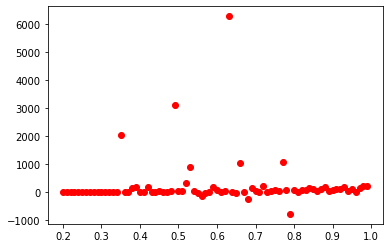

In [102]:
plt.plot(t_dict, sym_dict, 'ro')
plt.show()

In [139]:
x_tot = []
y_tot = []
high, low = 0.99, 0.1

delta = 0.9 # discount rate
x = 0.5
p = 0.7
q = 0.4
c = 0.5
debug = True # set true to see equations


# for x_temp in [0.5, 0.51, 0.62, 0.53, 0.64, 0.55, 0.66, 0.57, 0.68, 0.59]:
t_dict, sym_dict = solve_split_recurrence(0.5, p,q,c,delta,high,low, debug)

---HELLO---
max possible value 2.0
0.994 2.0 var0.994
0.993 2.0 var0.993
0.991 2.0 var0.991
0.992 2.0 var0.992
0.915 0.29295*var0.843 + 0.60705*var0.95 + 0.174 var0.915
0.86 0.3078*var0.754 + 0.17348499*var0.843 + 0.35949501*var0.95 + 0.2610428 var0.86
0.885 0.30105*var0.794 + 0.59895*var0.931 + 0.165 var0.885
0.939 0.0862417935*var0.794 + 0.1715812065*var0.931 + 0.61353*var0.964 + 0.22926755 var0.939
0.815 0.31995*var0.688 + 0.1746240525*var0.794 + 0.3474209475*var0.931 + 0.23970825 var0.815
0.898 0.095197923*var0.688 + 0.10391487149286*var0.794 + 0.20674244238714*var0.931 + 0.3696272838*var0.964 + 0.378447320878 var0.898
0.946 0.02709142492734*var0.688 + 0.0295720941294381*var0.794 + 0.0588347642545323*var0.931 + 0.105188532423804*var0.964 + 0.61542*var0.968 + 0.291698538575461 var0.946
0.911 0.29403*var0.837 + 0.60597*var0.947 + 0.173 var0.911
0.667 0.35991*var0.5 + 0.54009*var0.778 + 0.1 var0.667
0.881 0.30213*var0.787 + 0.59787*var0.928 + 0.164 var0.881
0.913 0.29349*var0.84 + 0.6

0.524 0.00026328051917446*var0.124 + 0.000103695734640021*var0.198 + 0.000224492438563085*var0.199 + 0.000365928066694772*var0.22 + 0.000456770233304503*var0.222 + 0.00194114783955309*var0.243 + 8.57473396715766e-5*var0.302 + 0.14805966218562*var0.325 + 0.00186031502410198*var0.361 + 0.00111636129178516*var0.391 + 0.0060749991852902*var0.425 + 3.78729385782292e-5*var0.431 + 0.000224133537782008*var0.465 + 1.80347780140393e-5*var0.57 + 5.01570591218064e-5*var0.603 + 0.000327358197499933*var0.635 + 0.50148*var0.658 + 0.000787554676188074*var0.665 + 0.0029564895434908*var0.694 + 0.0473865632048343*var0.747 + 0.00084773895270875*var0.776 + 0.00463703303221024*var0.82 + 2.91519776480206e-5*var0.823 + 8.38094449428474e-5*var0.841 + 0.000464540490448058*var0.874 + 0.0649844615727948 var0.524
0.073 0 var0.073
0.136 0.000193700259494971*var0.198 + 0.000615241728327358*var0.22 + 0.00326359496724938*var0.243 + 0.000160173241484298*var0.302 + 0.1659559104*var0.325 + 0.00324351231354834*var0.361 + 

0.459 0.013241642471816*var0.124 + 0.0125061968243671*var0.199 + 0.035822607840453*var0.222 + 0.0124862029045839*var0.465 + 0.0157310309781809*var0.533 + 0.0197588509267515*var0.635 + 0.039609909163765*var0.665 + 0.0892498933149118*var0.694 + 0.0446496393170022*var0.695 + 0.140039185470732*var0.82 + 0.113661237564852 var0.459
0.629 0.00490165879379211*var0.124 + 0.00462941887847596*var0.199 + 0.0132604547443005*var0.222 + 0.00462201772918982*var0.465 + 0.00582315573719321*var0.533 + 0.0073141338475556*var0.635 + 0.0146624000751509*var0.665 + 0.0330376330083809*var0.694 + 0.0165279569859747*var0.695 + 0.52983*var0.748 + 0.0518383052857009*var0.82 + 0.131073980309381 var0.629
0.772 0.00162519398966971*var0.124 + 0.00153493012334749*var0.199 + 0.00439663637502027*var0.222 + 0.00153247619829018*var0.465 + 0.00193072551622378*var0.533 + 0.00242507421849553*var0.635 + 0.00486146536891703*var0.665 + 0.0109539576002588*var0.694 + 0.00548000941826977*var0.695 + 0.1756704348*var0.748 + 0.0171875

0.32 5.83961619194989e-5*var0.124 + 1.39088627103877e-5*var0.198 + 5.62507414636597e-5*var0.199 + 4.80166915093582e-5*var0.22 + 0.000169586623192982*var0.222 + 0.000254713897350806*var0.243 + 1.15014178684707e-5*var0.302 + 0.0165781921959754*var0.325 + 0.000245914455022001*var0.361 + 0.000156243106710657*var0.391 + 0.08187760164096*var0.419 + 0.000637771067917168*var0.425 + 5.07995343253232e-6*var0.431 + 5.61608122207122e-5*var0.465 + 8.04807394798864e-5*var0.533 + 6.07323439646092e-5*var0.567 + 2.41903152796391e-6*var0.57 + 0.215182656*var0.591 + 6.72764074340966e-6*var0.603 + 9.01133283460774e-5*var0.635 + 0.0140347315473524*var0.658 + 0.0001746812507638*var0.665 + 0.0197471948207873*var0.688 + 0.00045544469413263*var0.694 + 0.000103784029998485*var0.695 + 0.000176140260793076*var0.723 + 0.00397911355018756*var0.747 + 0.00132915495537026*var0.748 + 0.00011370848326989*var0.776 + 0.000616853066339712*var0.82 + 3.91019800621691e-6*var0.823 + 1.1241485173817e-5*var0.841 + 0.001074790073

0.519 1.4994157963195e-5*var0.124 + 3.66111417183419e-6*var0.198 + 1.49438087840529e-5*var0.199 + 1.26182732339199e-5*var0.22 + 4.88357491086142e-5*var0.222 + 6.69360603506246e-5*var0.243 + 3.02742250255998e-6*var0.302 + 0.00439257738200335*var0.325 + 6.46596486319046e-5*var0.361 + 4.12532650838823e-5*var0.391 + 0.0182635198646525*var0.419 + 0.00016442579984875*var0.425 + 1.26997157556367e-5*var0.429 + 1.33715386306976e-6*var0.431 + 1.73410064849407e-5*var0.462 + 1.49199178027834e-5*var0.465 + 0.000189898236680195*var0.494 + 2.85748541116556e-5*var0.533 + 0.00575980716375056*var0.558 + 2.41004309870619e-5*var0.567 + 6.36741536209722e-7*var0.57 + 0.0319910171452865*var0.591 + 1.77086088068948e-6*var0.603 + 2.44947637176241e-5*var0.635 + 0.50013*var0.654 + 0.00391461738524056*var0.658 + 0.000262579924153816*var0.661 + 4.4852233110312e-5*var0.665 + 0.0102861956014298*var0.688 + 0.000114692475123669*var0.694 + 3.08807670440626e-5*var0.695 + 6.98977829961635e-5*var0.723 + 0.0010604717526579

0.738 2.17041929181254e-6*var0.124 + 5.65687969408699e-7*var0.198 + 2.15183140228908e-6*var0.199 + 1.94739480949079e-6*var0.22 + 6.94955907261079e-6*var0.222 + 1.03303275900604e-5*var0.243 + 4.67774673947786e-7*var0.302 + 0.000681061248942066*var0.325 + 9.98297574478003e-6*var0.361 + 6.38809831774008e-6*var0.391 + 0.00250311073405781*var0.419 + 2.50259703255902e-5*var0.425 + 1.83450933948663e-6*var0.429 + 2.06607010348429e-7*var0.431 + 2.50495672224808e-6*var0.462 + 2.1483912241879e-6*var0.465 + 2.74313296017857e-5*var0.494 + 3.99491665915149e-6*var0.533 + 0.00115279239628691*var0.558 + 3.38116044654688e-6*var0.567 + 9.83845380807114e-8*var0.57 + 0.00426612030778699*var0.591 + 2.73620173719046e-7*var0.603 + 3.51501230888897e-6*var0.635 + 0.0277888100680293*var0.654 + 0.000617973800707281*var0.658 + 3.79304019468361e-5*var0.661 + 6.49240539298355e-6*var0.665 + 0.00181357595523175*var0.688 + 1.69483900789685e-5*var0.694 + 4.28955962447116e-6*var0.695 + 0.176486283*var0.712 + 9.8062818583

0.322 9.47087636124592e-5*var0.124 + 0.000147282775030824*var0.199 + 0.000867652677457205*var0.222 + 0.00110823112073323*var0.429 + 0.00139691416449241*var0.462 + 0.000147047310962029*var0.465 + 0.0178462877240845*var0.494 + 0.000983697584180329*var0.533 + 0.0777046498228462*var0.561 + 0.000991806499034114*var0.567 + 0.000298086849286876*var0.635 + 0.0282016878057492*var0.661 + 0.000283303640895504*var0.665 + 0.000217506682794824*var0.694 + 0.000726530957224804*var0.695 + 0.112179563977572*var0.718 + 0.00287650770564591*var0.723 + 0.0108386284900332*var0.796 + 0.00131016696205648*var0.839 - 0.0210942144193439 var0.322
0.487 0.000125686914314809*var0.124 + 8.89440285265301e-7*var0.198 + 0.000172132112255354*var0.199 + 3.13900663010586e-6*var0.22 + 0.000904852473193984*var0.222 + 1.66515679985421e-5*var0.243 + 7.35489637283426e-7*var0.302 + 0.000634984433924787*var0.325 + 1.5957669677213e-5*var0.361 + 9.57369156453869e-6*var0.391 + 5.21564908984846e-5*var0.425 + 0.000522464289588936*var0

0.484 1.08004685250172e-5*var0.124 + 0.000960713636143025*var0.193 + 6.39393294729468e-6*var0.198 + 9.31785773340283e-6*var0.199 + 2.17773067103641e-5*var0.22 + 1.98858630005223e-5*var0.222 + 0.000115521553712294*var0.243 + 7.92026193533745e-5*var0.295 + 5.28722557559624e-6*var0.302 + 0.00127287132621432*var0.323 + 0.00785404559446415*var0.325 + 0.000112043900107479*var0.361 + 7.36320117151682e-5*var0.391 + 6.93782379789531e-5*var0.419 + 3.48195849055137e-5*var0.423 + 0.000243993992469856*var0.425 + 7.59444637567157e-7*var0.429 + 2.33526509674533e-6*var0.431 + 9.87647993330389e-7*var0.462 + 9.30296107835342e-6*var0.465 + 0.00207992413918785*var0.488 + 1.18967428012594e-5*var0.494 + 1.54179747858435e-6*var0.533 + 0.0316603650815198*var0.556 + 3.29601929313027e-5*var0.561 + 1.65159328169049e-5*var0.562 + 2.08602204138795e-6*var0.567 + 1.11203379523198e-6*var0.57 + 3.09271036047562e-6*var0.603 + 0.49068*var0.621 + 1.37234206487637e-5*var0.635 + 0.00286660260694175*var0.656 + 0.00718603856

0.584 6.71045673221341e-6*var0.124 + 1.13975879534823e-5*var0.193 + 1.93193652047253e-6*var0.198 + 6.56841387561251e-6*var0.199 + 6.64000762538847e-6*var0.22 + 2.059237178574e-5*var0.222 + 3.5223173216063e-5*var0.243 + 9.39633608044127e-7*var0.295 + 1.59754321255318e-6*var0.302 + 1.51009232597522e-5*var0.323 + 0.00233508878304201*var0.325 + 3.40574670043804e-5*var0.361 + 2.18821108408605e-5*var0.391 + 0.00715224085653807*var0.419 + 4.13088007220972e-7*var0.423 + 8.36856199023905e-5*var0.425 + 4.98222065665505e-6*var0.429 + 7.05603884584995e-7*var0.431 + 6.80245822730057e-6*var0.462 + 6.55791281426061e-6*var0.465 + 2.467553016957e-5*var0.488 + 7.45053209045884e-5*var0.494 + 1.12076392912548e-5*var0.533 + 0.000375608071000941*var0.556 + 0.00413411310918596*var0.558 + 3.91028797516037e-7*var0.561 + 1.95939549343976e-7*var0.562 + 9.4620507567597e-6*var0.567 + 3.36002694854241e-7*var0.57 + 0.0125261642112262*var0.591 + 9.34467117797136e-7*var0.603 + 0.00291104500761217*var0.621 + 1.06383977

0.555 0.0242975066270831*var0.193 + 0.00250384672467485*var0.295 + 0.0268295575248785*var0.323 + 0.00110075783265738*var0.423 + 0.0657530178420264*var0.488 + 0.000522121170059449*var0.562 + 0.09062242646688*var0.656 + 0.50985*var0.686 + 0.000837569376970366*var0.818 + 0.0684940412474988 var0.555
0.416 3.52985964365965e-6*var0.124 + 0.0258257002483582*var0.193 + 4.44050444454908e-8*var0.198 + 4.63159688405802e-6*var0.199 + 1.62115498600125e-7*var0.22 + 2.32698507338778e-5*var0.222 + 8.59985573618007e-7*var0.243 + 0.00236561054261402*var0.295 + 3.67191036585742e-8*var0.302 + 0.0316841177563037*var0.323 + 3.6077490542575e-5*var0.325 + 8.14989832466899e-7*var0.361 + 4.45001128419829e-7*var0.391 + 0.00103625380291353*var0.419 + 0.00103998551833776*var0.423 + 3.50134805447212e-6*var0.425 + 1.13432888569467e-5*var0.429 + 1.62181166533589e-8*var0.431 + 1.47518014126996e-5*var0.462 + 4.62419225274858e-6*var0.465 + 0.0621228251246029*var0.488 + 0.000177693255539714*var0.494 + 2.30287413899184e-5

0.483 3.76323199080257e-6*var0.124 + 0.00480805852483406*var0.193 + 1.40627078848114e-6*var0.198 + 3.90800324421235e-6*var0.199 + 4.78961866137596e-6*var0.22 + 1.39209454992955e-5*var0.222 + 2.54073745396202e-5*var0.243 + 0.000356716011832959*var0.295 + 1.16286344263545e-6*var0.302 + 0.00679514205518225*var0.323 + 0.00171356488321045*var0.325 + 2.46425921401189e-5*var0.361 + 1.61947765172394e-5*var0.391 + 0.000382037714120279*var0.419 + 0.000156821877389649*var0.423 + 5.36560973546909e-5*var0.425 + 4.99658276236759e-6*var0.429 + 5.1361425213288e-7*var0.431 + 6.47682366827038e-6*var0.462 + 3.90175543726717e-6*var0.465 + 0.009367647811443*var0.488 + 7.85037362102999e-5*var0.494 + 9.94174794119725e-6*var0.533 + 0.0158368433161429*var0.556 + 0.000230992489532944*var0.561 + 7.43851369341913e-5*var0.562 + 1.3447223392184e-5*var0.567 + 2.44578830420831e-7*var0.57 + 6.80205481199175e-7*var0.603 + 6.57436128112674e-6*var0.635 + 0.0172068188733467*var0.656 + 0.00143856116071151*var0.658 + 0.0001

0.583 4.08142616607074e-6*var0.124 + 0.000205344484806296*var0.193 + 1.29668169704996e-6*var0.198 + 3.9715071267052e-6*var0.199 + 4.44789280691734e-6*var0.22 + 1.22759467436138e-5*var0.222 + 2.3594674280442e-5*var0.243 + 1.55170276198053e-5*var0.295 + 1.07224281026451e-6*var0.302 + 0.000287186666170788*var0.323 + 0.00157185073123923*var0.325 + 2.28290691033197e-5*var0.361 + 1.47403633474609e-5*var0.391 + 0.00379732197834644*var0.419 + 6.82169939706663e-6*var0.423 + 5.47123362188542e-5*var0.425 + 3.11180518504198e-6*var0.429 + 4.73588874589387e-7*var0.431 + 4.23499202239639e-6*var0.462 + 3.96515779476802e-6*var0.465 + 0.000407489557521845*var0.488 + 4.66848307891995e-5*var0.494 + 6.55705030256198e-6*var0.533 + 0.00169114725020281*var0.556 + 0.00188005971210586*var0.558 + 9.39542136958004e-6*var0.561 + 3.23572866376221e-6*var0.562 + 5.77330593511757e-6*var0.567 + 2.25519078893128e-7*var0.57 + 0.00627349087081813*var0.591 + 6.27197837663016e-7*var0.603 + 0.0029103262815729*var0.621 + 6.40

0.378 8.91276875927783e-7*var0.124 + 0.00124500132690272*var0.193 + 2.39498898493208e-7*var0.198 + 9.99096526763046e-7*var0.199 + 8.1639626802696e-7*var0.22 + 4.07441244477665e-6*var0.222 + 4.33071855583952e-6*var0.243 + 0.038569659353799*var0.288 + 7.99592921257228e-5*var0.295 + 1.98044726442774e-7*var0.302 + 0.00189243753169694*var0.323 + 0.000290589869456338*var0.325 + 4.19915374814997e-6*var0.361 + 2.75390573310483e-6*var0.391 + 0.000125581140376878*var0.419 + 3.51522384472472e-5*var0.423 + 9.25216319155676e-6*var0.425 + 1.71718899825266e-6*var0.429 + 8.74725185531986e-8*var0.431 + 2.2242818400854e-6*var0.462 + 9.97499250141522e-7*var0.465 + 0.00209979497145985*var0.488 + 2.69974041742474e-5*var0.494 + 3.40118483953305e-6*var0.533 + 0.00266360362899527*var0.556 + 8.04715497436554e-5*var0.561 + 1.66737199806946e-5*var0.562 + 4.60015251949376e-6*var0.567 + 4.16536850230761e-8*var0.57 + 0.0221480583468767*var0.587 + 1.1584430596912e-7*var0.603 + 1.75637549056762e-6*var0.635 + 0.230591

0.186 4.00297547910316e-6*var0.124 + 5.34690890303391e-6*var0.193 + 1.02625327674102e-6*var0.198 + 3.97954733962714e-6*var0.199 + 3.53360276544671e-6*var0.22 + 1.29320520871521e-5*var0.222 + 1.87446715341486e-5*var0.243 + 4.40806890453169e-7*var0.295 + 8.48622063532959e-7*var0.302 + 7.08424110005942e-6*var0.323 + 0.00123438433773992*var0.325 + 1.81131741081818e-5*var0.361 + 1.15848117091749e-5*var0.391 + 0.00466235973517259*var0.419 + 1.9379047150687e-7*var0.423 + 4.55177141084728e-5*var0.425 + 3.50559267096198e-6*var0.429 + 3.74819923410027e-7*var0.431 + 4.78648645011772e-6*var0.462 + 3.97318515363253e-6*var0.465 + 1.15759415491455e-5*var0.488 + 5.24219678700262e-5*var0.494 + 7.51980312128226e-6*var0.533 + 0.000176207645607396*var0.556 + 0.00180751266514045*var0.558 + 1.8344191484325e-7*var0.561 + 9.19204067667378e-8*var0.562 + 6.3792659374028e-6*var0.567 + 1.78486126709609e-7*var0.57 + 0.00783884031568192*var0.591 + 4.96393091327604e-7*var0.603 + 0.00136564793637573*var0.621 + 6.5122

0.102 9.30080688847631e-8*var0.124 + 0.000130771109505474*var0.193 + 2.42459926953926e-8*var0.198 + 1.04846239164318e-7*var0.199 + 8.26565947608392e-8*var0.22 + 4.31383806780998e-7*var0.222 + 4.38466552966479e-7*var0.243 + 0.00433249241466311*var0.288 + 8.30821061165737e-6*var0.295 + 2.00493239046304e-8*var0.302 + 0.000199744722301571*var0.323 + 2.94044546982254e-5*var0.325 + 4.25132803976175e-7*var0.361 + 2.78748833364611e-7*var0.391 + 1.33849865084476e-5*var0.419 + 3.65251108065996e-6*var0.423 + 9.3792153866609e-7*var0.425 + 1.83454817725747e-7*var0.429 + 8.8553979130246e-9*var0.431 + 2.37620835388454e-7*var0.462 + 1.04678619277564e-7*var0.465 + 0.000218180256482977*var0.488 + 2.8843487414961e-6*var0.494 + 3.63278187032819e-7*var0.533 + 0.000269281338731145*var0.556 + 8.60309287878687e-6*var0.561 + 1.73249129146362e-6*var0.562 + 4.91337461408887e-7*var0.567 + 4.21686675454304e-9*var0.57 + 0.00248786990590591*var0.587 + 1.17276539224241e-8*var0.603 + 1.84874878694775e-7*var0.635 + 0.0

0.23 1.26927255587331e-6*var0.124 + 2.99895539319389e-5*var0.193 + 3.4919383966234e-7*var0.198 + 1.25368935818892e-6*var0.199 + 1.2007590027805e-6*var0.22 + 4.01431253161746e-6*var0.222 + 6.36965350515482e-6*var0.243 + 0.000607238076708979*var0.288 + 2.05483031650723e-6*var0.295 + 2.887528873265e-7*var0.302 + 4.42058165635641e-5*var0.323 + 0.000421263333836507*var0.325 + 6.15782291574403e-6*var0.361 + 3.95154752392154e-6*var0.391 + 0.00138255871680649*var0.419 + 9.0335823810098e-7*var0.423 + 1.52240923151957e-5*var0.425 + 1.05225898749739e-6*var0.429 + 1.27536555744923e-7*var0.431 + 1.43424080108936e-6*var0.462 + 1.25168505865544e-6*var0.465 + 5.3961487790824e-5*var0.488 + 1.57626651394226e-5*var0.494 + 2.27902502127175e-6*var0.533 + 0.00602445235018119*var0.549 + 0.000166857629080559*var0.556 + 0.000633440265911127*var0.558 + 1.72401637230695e-6*var0.561 + 4.28488852195098e-7*var0.562 + 1.96663845736909e-6*var0.567 + 6.07318459533798e-8*var0.57 + 0.000348697514541853*var0.587 + 0.0023

0.614 5.54665869920732e-7*var0.124 + 6.65929707993948e-5*var0.193 + 1.48538872927686e-7*var0.198 + 5.55459506302414e-7*var0.199 + 5.10608668924147e-7*var0.22 + 1.83462005213179e-6*var0.222 + 2.70862013992875e-6*var0.243 + 0.00162904087434969*var0.288 + 4.43342692373037e-6*var0.295 + 1.22828708775526e-7*var0.302 + 9.95466470570864e-5*var0.323 + 0.000179009040608767*var0.325 + 2.61883066081088e-6*var0.361 + 1.68190905591676e-6*var0.391 + 0.000578539698665905*var0.419 + 1.94905277696025e-6*var0.423 + 6.44838137507267e-6*var0.425 + 5.34198007011718e-7*var0.429 + 5.42510608599174e-8*var0.431 + 7.23374226856456e-7*var0.462 + 5.54571481512163e-7*var0.465 + 0.000116425337359745*var0.488 + 8.05418476256463e-6*var0.494 + 1.10846903877394e-6*var0.533 + 0.0323444236975806*var0.549 + 0.000219433217708715*var0.556 + 0.000185963184166472*var0.558 + 4.04367470199461e-6*var0.561 + 9.24491914772364e-7*var0.562 + 1.02854784852409e-6*var0.567 + 2.58339034773808e-8*var0.57 + 0.000935452709176966*var0.587 +

0.373 5.11419344166658e-7*var0.124 + 4.6571014253452e-5*var0.193 + 1.42158701477978e-7*var0.198 + 5.07801281298636e-7*var0.199 + 4.88542548032953e-7*var0.22 + 1.6455899053572e-6*var0.222 + 2.59156604529725e-6*var0.243 + 0.00133447500072775*var0.288 + 3.03620772187813e-6*var0.295 + 1.17552862759678e-7*var0.302 + 7.03049786647501e-5*var0.323 + 0.000171623866223765*var0.325 + 2.50589014126962e-6*var0.361 + 1.61048402841001e-6*var0.391 + 0.0140668067210332*var0.409 + 0.000527759886163505*var0.419 + 1.33479793251569e-6*var0.423 + 6.14913918213425e-6*var0.425 + 4.46882445379001e-7*var0.429 + 5.1920821894234e-8*var0.431 + 6.05808005725841e-7*var0.462 + 5.06989448714625e-7*var0.465 + 7.97332434694765e-5*var0.488 + 6.73036637693297e-6*var0.494 + 9.59873067969543e-7*var0.533 + 0.0066199843719178*var0.548 + 0.0198656495675606*var0.549 + 0.000140972675227096*var0.556 + 0.000247352462680419*var0.558 + 2.93487140663428e-6*var0.561 + 6.33133135773879e-7*var0.562 + 8.75421658559776e-7*var0.567 + 2.472

0.478 3.85308662671908e-6*var0.124 + 6.00139544023143e-6*var0.193 + 1.06209358733993e-6*var0.198 + 3.79445894277831e-6*var0.199 + 3.65277813095941e-6*var0.22 + 1.20664068966769e-5*var0.222 + 1.93768541233755e-5*var0.243 + 4.94763705603283e-7*var0.295 + 8.78258878369441e-7*var0.302 + 7.95138518467611e-6*var0.323 + 0.00128147509075208*var0.325 + 1.87314107398671e-5*var0.361 + 1.2015208368372e-5*var0.391 + 0.00425482903077146*var0.419 + 2.17511327227161e-7*var0.423 + 4.64045022946301e-5*var0.425 + 3.06033708074631e-6*var0.429 + 3.87909930310014e-7*var0.431 + 4.17847229013394e-6*var0.462 + 3.78839266149489e-6*var0.465 + 1.29928906755842e-5*var0.488 + 4.57644509447626e-5*var0.494 + 6.74735373632665e-6*var0.533 + 0.000197776281597411*var0.556 + 0.00212740322144562*var0.558 + 2.05896059060017e-7*var0.561 + 1.03171892403311e-7*var0.562 + 5.70792765757287e-6*var0.567 + 1.84719479005625e-7*var0.57 + 0.00732955895344613*var0.591 + 5.1372885334225e-7*var0.603 + 0.00153280960026761*var0.621 + 6.170

0.617 3.07878764998123e-6*var0.124 + 6.81847323014691e-7*var0.198 + 3.16875353006063e-6*var0.199 + 2.35036773005863e-6*var0.22 + 1.10880062655903e-5*var0.222 + 1.24679787190084e-5*var0.243 + 5.63828340805551e-7*var0.302 + 0.000817155654876775*var0.325 + 1.20433756166222e-5*var0.361 + 7.68097591272593e-6*var0.391 + 0.00338348116301725*var0.419 + 3.06784889481794e-5*var0.425 + 3.19412081001044e-6*var0.429 + 2.49032053959709e-7*var0.431 + 4.36145743305247e-6*var0.462 + 3.16368757717484e-6*var0.465 + 0.00212882042066054*var0.486 + 4.77615342922366e-5*var0.494 + 0.00585622727449*var0.52 + 7.33402525359699e-6*var0.533 + 0.00131483835117836*var0.558 + 7.41813209757205e-6*var0.567 + 1.18586990609842e-7*var0.57 + 0.00524036278720533*var0.591 + 3.29805817097649e-7*var0.603 + 5.30145425652304e-6*var0.635 + 0.0321841176639753*var0.654 + 0.00073156470284389*var0.658 + 6.60417930738654e-5*var0.661 + 9.20962028765257e-6*var0.665 + 0.00210718312893365*var0.688 + 2.21919920582355e-5*var0.694 + 7.425504

0.345 1.11350924954726e-6*var0.124 + 2.06550584280908e-7*var0.198 + 1.18303878924613e-6*var0.199 + 7.13305116845198e-7*var0.22 + 4.40129689542685e-6*var0.222 + 3.78386633763613e-6*var0.243 + 1.70799340697877e-7*var0.302 + 0.00024599492570742*var0.325 + 3.65272532824638e-6*var0.361 + 2.31876861730288e-6*var0.391 + 0.00118384296687412*var0.419 + 9.51154487931682e-6*var0.425 + 1.34978867080824e-6*var0.429 + 7.54387595490263e-8*var0.431 + 1.84308803001329e-6*var0.462 + 1.18114744026252e-6*var0.465 + 0.45315*var0.48 + 0.00141558827170985*var0.486 + 2.01833248404494e-5*var0.494 + 0.00389417846887393*var0.52 + 3.18141631476128e-6*var0.533 + 0.000358544188566884*var0.558 + 3.4986979213136e-6*var0.567 + 3.59233091805359e-8*var0.57 + 0.00165878856926808*var0.591 + 9.99073867732911e-8*var0.603 + 2.01765276980842e-6*var0.635 + 0.00907635874035871*var0.654 + 0.000215885491490139*var0.658 + 2.79082944551099e-5*var0.661 + 3.33085569418266e-6*var0.665 + 0.000598336675924186*var0.688 + 7.42797379756143

0.146 5.06972844266917e-7*var0.124 + 1.19784276314951e-5*var0.193 + 1.39475003437932e-7*var0.198 + 5.00748603447817e-7*var0.199 + 4.79607160890586e-7*var0.22 + 1.60339671137865e-6*var0.222 + 2.54416700302894e-6*var0.243 + 0.0002425430325991*var0.288 + 8.20740325019316e-7*var0.295 + 1.1533367825595e-7*var0.302 + 1.76566872518188e-5*var0.323 + 0.000168261000800978*var0.325 + 2.45955762900648e-6*var0.361 + 1.57832711200474e-6*var0.391 + 0.000552221602666849*var0.419 + 3.60819347462293e-7*var0.423 + 6.08080695253545e-6*var0.425 + 4.20293284786209e-7*var0.429 + 5.09406510956371e-8*var0.431 + 5.72864460771113e-7*var0.462 + 4.99948046128156e-7*var0.465 + 2.15532974534109e-5*var0.488 + 6.29592370998817e-6*var0.494 + 9.10288173996363e-7*var0.533 + 0.00240628675770937*var0.549 + 6.66462742073568e-5*var0.556 + 0.000253008711010222*var0.558 + 6.88606619426843e-7*var0.561 + 1.71147017343766e-7*var0.562 + 7.85514732642362e-7*var0.567 + 2.42575139106989e-8*var0.57 + 0.000139276761258307*var0.587 + 0.

0.439 3.4691777013916e-7*var0.124 + 1.00990992819461e-5*var0.193 + 8.36732679906227e-8*var0.198 + 3.5301615717226e-7*var0.199 + 2.88062748465851e-7*var0.22 + 1.20669550353794e-6*var0.222 + 1.52808387174906e-6*var0.243 + 0.00183697181601802*var0.288 + 2.33917249677745e-7*var0.295 + 6.91905038980618e-8*var0.302 + 1.97922436573717e-5*var0.323 + 0.000100603056300191*var0.325 + 1.47667598580716e-6*var0.361 + 9.44795955804387e-7*var0.391 + 0.000762138622779958*var0.409 + 0.00037029490157693*var0.419 + 1.02836264791683e-7*var0.423 + 3.70426373408993e-6*var0.425 + 3.43641836620625e-7*var0.429 + 3.05601050057609e-8*var0.431 + 0.00208353191389979*var0.447 + 4.67219732742136e-7*var0.462 + 3.52451782820266e-7*var0.465 + 0.0113874290972676*var0.48 + 0.000142306377293635*var0.486 + 6.1428540892877e-6*var0.488 + 5.16049761714571e-6*var0.494 + 0.000391474301896384*var0.52 + 7.70700366308245e-7*var0.533 + 0.000358670298959485*var0.548 + 0.00125560211829818*var0.549 + 1.88350287737431e-5*var0.556 + 0.00

0.147 9.27368793137556e-8*var0.124 + 8.86154363404387e-5*var0.193 + 1.05621848986214e-9*var0.198 + 1.22833542716294e-7*var0.199 + 3.83881138447275e-9*var0.22 + 6.23524210506756e-7*var0.222 + 2.03639919756104e-8*var0.243 + 0.0234693263249527*var0.288 + 8.73400684531661e-10*var0.302 + 0.000195651331766952*var0.323 + 8.44149277776735e-7*var0.325 + 1.93268211603371e-8*var0.361 + 1.06901768267717e-8*var0.391 + 2.13355102588637e-5*var0.419 + 8.04139911827389e-8*var0.425 + 3.16936037668966e-7*var0.429 + 3.85764160219372e-10*var0.431 + 0.0279786844369386*var0.447 + 4.10004418635967e-7*var0.462 + 1.22637166149202e-7*var0.465 + 0.076593965157072*var0.481 + 4.98856775225563e-6*var0.494 + 6.22740914393187e-7*var0.533 + 1.52024458746003e-5*var0.561 + 8.42170608784317e-7*var0.567 + 1.8369768115453e-10*var0.57 + 5.10887100857799e-10*var0.603 + 2.33920695213982e-7*var0.635 + 0.00043976224331062*var0.656 + 7.58752020821526e-6*var0.661 + 2.77405115986729e-7*var0.665 + 3.04644105378394e-7*var0.694 + 5.20

0.472 2.29073727556061e-7*var0.124 + 8.83791526181977e-6*var0.193 + 5.68512568088666e-8*var0.198 + 2.32057376695289e-7*var0.199 + 1.9565019539089e-7*var0.22 + 7.85765882829048e-7*var0.222 + 1.03786373127077e-6*var0.243 + 0.00158448174616436*var0.288 + 2.11791312841555e-7*var0.295 + 4.70110371006955e-8*var0.302 + 1.72446822756774e-5*var0.323 + 6.84180159898307e-5*var0.325 + 1.00307329144224e-6*var0.361 + 6.42375825547267e-7*var0.391 + 0.000418564817849934*var0.409 + 0.000242954955304356*var0.419 + 9.31091125513711e-8*var0.423 + 2.50484824030723e-6*var0.425 + 2.2323569693336e-7*var0.429 + 2.07638642485334e-8*var0.431 + 0.0018102644238364*var0.447 + 3.03078246993229e-7*var0.462 + 2.31686381688582e-7*var0.465 + 0.00625074128538069*var0.48 + 0.00260789014586697*var0.481 + 6.83508888801486e-5*var0.486 + 5.56180928921095e-6*var0.488 + 3.35712476772961e-6*var0.494 + 0.000188028231884098*var0.52 + 4.94394086471633e-7*var0.533 + 0.000196980921665615*var0.548 + 0.000788054486207748*var0.549 + 1.7

0.113 5.81798296993377e-8*var0.124 + 3.40589201947662e-6*var0.193 + 1.61577987469281e-8*var0.198 + 5.75909632594578e-8*var0.199 + 5.55404566061035e-8*var0.22 + 1.85330625295916e-7*var0.222 + 2.94624840104745e-7*var0.243 + 9.12536833461491e-5*var0.288 + 2.24502340892971e-7*var0.295 + 1.33610920671668e-8*var0.302 + 5.11534809582021e-6*var0.323 + 1.9503221643307e-5*var0.325 + 2.84862798267414e-7*var0.361 + 1.82971364429534e-7*var0.391 + 0.000867140322933244*var0.409 + 6.14400642895709e-5*var0.419 + 9.86972196630558e-8*var0.423 + 7.01001500280468e-7*var0.425 + 4.93275555737149e-8*var0.429 + 5.90133549490876e-9*var0.431 + 6.7039781903175e-8*var0.462 + 5.74988913757497e-8*var0.465 + 5.89561105351975e-6*var0.488 + 7.4104722846252e-7*var0.494 + 1.06489860024116e-7*var0.533 + 0.00040808518236726*var0.548 + 0.0012925383542258*var0.549 + 1.20360877484389e-5*var0.556 + 2.89017046679838e-5*var0.558 + 2.1055071002339e-7*var0.561 + 4.68149362950104e-8*var0.562 + 9.46554275850934e-8*var0.567 + 2.81016

0.609 3.05030060986074e-7*var0.124 + 8.61566230446482e-6*var0.193 + 8.48401699243269e-8*var0.198 + 3.00982491003769e-7*var0.199 + 2.91679046284228e-7*var0.22 + 9.61515254128987e-7*var0.222 + 1.54726665254785e-6*var0.243 + 0.000179616345369211*var0.288 + 5.875368009681e-7*var0.295 + 7.01554301490797e-8*var0.302 + 1.27297468430254e-5*var0.323 + 0.000102398135351877*var0.325 + 1.49591044356783e-6*var0.361 + 9.60419149406801e-7*var0.391 + 0.00114621340655983*var0.409 + 0.000328352802947865*var0.419 + 2.58296855501043e-7*var0.423 + 3.68929677381995e-6*var0.425 + 2.50473421142475e-7*var0.429 + 3.09862942353894e-8*var0.431 + 3.41263988753788e-7*var0.462 + 3.00501303967792e-7*var0.465 + 1.54291863699921e-5*var0.488 + 3.75351988650176e-6*var0.494 + 5.43812561476179e-7*var0.533 + 0.000539419854753744*var0.548 + 0.00207333371965353*var0.549 + 4.36754687619307e-5*var0.556 + 0.000156257350738305*var0.558 + 4.99940117048121e-7*var0.561 + 1.22517644131865e-7*var0.562 + 4.71017399799924e-7*var0.567 + 

0.538 4.04470472121537e-8*var0.124 + 1.61722036265716e-6*var0.193 + 1.07919240786274e-8*var0.198 + 4.03414088359611e-8*var0.199 + 3.71136769561797e-8*var0.22 + 1.32054495980338e-7*var0.222 + 1.96876532726224e-7*var0.243 + 0.000129860306545133*var0.288 + 8.30638791553536e-8*var0.295 + 8.92398113473394e-9*var0.302 + 2.68099854962236e-6*var0.323 + 1.30124781320038e-5*var0.325 + 1.90322349334925e-7*var0.361 + 1.22099681374325e-7*var0.391 + 0.000239609312378179*var0.409 + 4.3085684387915e-5*var0.419 + 3.65170977480802e-8*var0.423 + 4.71155028115983e-7*var0.425 + 3.58154281988306e-8*var0.429 + 3.9415495650775e-9*var0.431 + 0.000119574286063607*var0.447 + 4.86963404120914e-8*var0.462 + 4.02769141775503e-8*var0.465 + 0.000412883287505435*var0.48 + 0.000172260250059767*var0.481 + 4.51481487015916e-6*var0.486 + 2.1813239102482e-6*var0.488 + 5.3782966378313e-7*var0.494 + 1.24199212508941e-5*var0.52 + 7.82914636332201e-8*var0.533 + 0.000112762614484335*var0.548 + 0.000386050349489468*var0.549 + 5.

0.276 2.64058455416758e-8*var0.124 + 1.06360766646075e-6*var0.193 + 7.06471822180051e-9*var0.198 + 2.63213460069307e-8*var0.199 + 2.42950733789564e-8*var0.22 + 8.60475230958306e-8*var0.222 + 1.28877819911791e-7*var0.243 + 8.1145965059337e-5*var0.288 + 5.5802952890877e-8*var0.295 + 5.84190656589363e-9*var0.302 + 1.75065809202381e-6*var0.323 + 8.51895717494592e-6*var0.325 + 1.24588512136216e-7*var0.361 + 7.99341302101559e-8*var0.391 + 0.000163005567947509*var0.409 + 2.81290107751682e-5*var0.419 + 2.45324671333548e-8*var0.423 + 3.08323219200465e-7*var0.425 + 2.32955042825557e-8*var0.429 + 2.5802569432155e-9*var0.431 + 7.29411016546852e-5*var0.447 + 3.16750794275454e-8*var0.462 + 2.62792655177109e-8*var0.465 + 0.000251861523383334*var0.48 + 0.000105079886523321*var0.481 + 2.75406679176145e-6*var0.486 + 1.46543018025518e-6*var0.488 + 3.49806157278321e-7*var0.494 + 7.57623372321664e-6*var0.52 + 5.08920255097288e-8*var0.533 + 7.67121020248747e-5*var0.548 + 0.000261587217254849*var0.549 + 3.63

0.367 9.51391474239903e-8*var0.124 + 3.52749163729949e-6*var0.193 + 2.64494962540042e-8*var0.198 + 9.39643980683497e-8*var0.199 + 9.09282850568312e-8*var0.22 + 3.00824557569215e-7*var0.222 + 4.82346274579403e-7*var0.243 + 8.31842497227431e-5*var0.288 + 2.36858362506536e-7*var0.295 + 2.18714294016763e-8*var0.302 + 5.25149135057954e-6*var0.323 + 3.19239912978743e-5*var0.325 + 4.66344500934608e-7*var0.361 + 2.99445405144856e-7*var0.391 + 0.000665708076009764*var0.409 + 0.00010184922292146*var0.419 + 1.04129256471691e-7*var0.423 + 1.14939417473499e-6*var0.425 + 7.88674254067745e-8*var0.429 + 9.66018660777576e-9*var0.431 + 1.07374979352088e-7*var0.462 + 9.38141752097272e-8*var0.465 + 6.22009006479737e-6*var0.488 + 1.18276024989702e-6*var0.494 + 1.7093945270243e-7*var0.533 + 0.000313289088763453*var0.548 + 0.00107394693402958*var0.549 + 1.53915529591019e-5*var0.556 + 4.82995164790785e-5*var0.558 + 2.10841651587038e-7*var0.561 + 4.93915079351903e-8*var0.562 + 1.49211297824711e-7*var0.567 + 4.

0.178 9.00945362125461e-9*var0.124 + 3.39287923314974e-7*var0.193 + 2.50463078232718e-9*var0.198 + 8.89875370515472e-9*var0.199 + 8.61041030629849e-9*var0.22 + 2.84931518260518e-8*var0.222 + 4.56755488960391e-8*var0.243 + 8.0468514992332e-6*var0.288 + 2.27643873302004e-8*var0.295 + 2.07111148003966e-9*var0.302 + 5.05297178379612e-7*var0.323 + 3.02304156625564e-6*var0.325 + 4.41603190736672e-8*var0.361 + 2.8356111219608e-8*var0.391 + 6.49666646986294e-5*var0.409 + 9.64135508685226e-6*var0.419 + 1.00078321138522e-8*var0.423 + 1.08836880489734e-7*var0.425 + 7.47319445437178e-9*var0.429 + 9.14769812948594e-10*var0.431 + 1.01739736434831e-8*var0.462 + 8.88452708052617e-9*var0.465 + 5.97811020752417e-7*var0.488 + 1.12079538921422e-7*var0.494 + 1.61958097304994e-8*var0.533 + 0.08288178172515*var0.537 + 3.05739826763584e-5*var0.548 + 0.000104367260609305*var0.549 + 1.46857518268281e-6*var0.556 + 4.57114243080951e-6*var0.558 + 2.03088322998722e-8*var0.561 + 4.74700325359342e-9*var0.562 + 1.4144

0.531 1.24511982262519e-10*var0.124 + 4.86676960660033e-9*var0.193 + 0.033181118773658*var0.198 + 1.23598591151555e-10*var0.199 + 1.16578916893477e-10*var0.22 + 4.00297344692779e-10*var0.222 + 6.18414927746668e-10*var0.243 + 2.59099107944593e-7*var0.288 + 2.86557819821554e-10*var0.295 + 0.0274378948376694*var0.302 + 7.67616190335175e-9*var0.323 + 4.09020228615154e-8*var0.325 + 0.07361337063366*var0.33 + 5.9786394785322e-10*var0.361 + 3.83728459219988e-10*var0.391 + 8.27436966303657e-7*var0.409 + 1.32913833968389e-7*var0.419 + 1.25978464084602e-10*var0.423 + 1.47673481495931e-9*var0.425 + 1.06857805661355e-10*var0.429 + 0.0121187865405861*var0.431 + 0.00606718533503986*var0.432 + 1.87404896349466e-7*var0.447 + 1.45374726634266e-10*var0.462 + 1.23400991485446e-10*var0.465 + 6.47098571495741e-7*var0.48 + 2.69977897174409e-7*var0.481 + 7.07592276427332e-9*var0.486 + 7.52523756898325e-9*var0.488 + 1.6037113490012e-9*var0.494 + 1.94653393410538e-8*var0.52 + 2.32624767553522e-10*var0.533 + 0.

0.596 0.00548185974225866*var0.124 + 4.74806519545258e-10*var0.193 + 0.00323718046939636*var0.198 + 0.00431439026867928*var0.199 + 0.00570688236628493*var0.22 + 0.0114144165471731*var0.222 + 6.03331292034061e-11*var0.243 + 2.52779473048427e-8*var0.288 + 2.79568444936092e-11*var0.295 + 0.00267686625926455*var0.302 + 7.48893416251593e-10*var0.323 + 3.99043897432467e-9*var0.325 + 0.00718178815269188*var0.33 + 0.0128951970452428*var0.361 + 3.74369014562783e-11*var0.391 + 8.07255115551209e-8*var0.409 + 1.2967195903492e-8*var0.419 + 1.22905748380908e-11*var0.423 + 1.44071606930236e-10*var0.425 + 1.04251458140739e-11*var0.429 + 0.00118231996243338*var0.431 + 0.000591920182220962*var0.432 + 1.82833940732993e-8*var0.447 + 1.41828920541969e-11*var0.462 + 0.00430749276225453*var0.465 + 6.31315318723762e-8*var0.48 + 2.63392919890188e-8*var0.481 + 6.90333533709762e-10*var0.486 + 7.34169099362007e-10*var0.488 + 1.5645955439144e-10*var0.494 + 1.89905641141481e-9*var0.52 + 2.26950863037193e-11*var0.53

0.523 8.78841986541271e-5*var0.124 + 0.100597541440937*var0.193 + 0.000224864609690327*var0.198 + 6.91675360683009e-5*var0.199 + 0.000640878373530535*var0.22 + 0.000182993892313523*var0.222 + 0.00242865360859822*var0.243 + 4.0525154727728e-10*var0.288 + 0.0414826561569667*var0.295 + 0.00018594344438726*var0.302 + 1.20061258147961e-11*var0.323 + 6.39740066374309e-11*var0.325 + 0.000115137148044392*var0.33 + 0.00310306235797164*var0.361 + 0.00111703515618169*var0.391 + 1.29417701793355e-9*var0.409 + 2.07887774286601e-10*var0.419 + 0.0182368825672202*var0.423 + 2.30973033225751e-12*var0.425 + 1.67134080184403e-13*var0.429 + 8.21276167316179e-5*var0.431 + 9.48955889562043e-6*var0.432 + 2.93116116128042e-10*var0.447 + 2.27377598367286e-13*var0.462 + 6.90569564742669e-5*var0.465 + 1.01211347047804e-9*var0.48 + 4.22266836148244e-10*var0.481 + 1.10673042118289e-11*var0.486 + 1.17700681899365e-11*var0.488 + 2.5083316987253e-12*var0.494 + 3.04453340222469e-11*var0.52 + 3.63843579910132e-13*var0.

0.834 3.47233398525363e-6*var0.124 + 0.00596246069126673*var0.193 + 8.88447568807463e-6*var0.198 + 2.73283240723887e-6*var0.199 + 2.5321318176685e-5*var0.22 + 7.2301496868032e-6*var0.222 + 9.59569136737919e-5*var0.243 + 1.60116237245958e-11*var0.288 + 0.00191212235157802*var0.295 + 7.34668747247753e-6*var0.302 + 0.00146363757827072*var0.323 + 2.52763432814848e-12*var0.325 + 4.54910710050546e-6*var0.33 + 0.000122603028177468*var0.361 + 4.41344313873496e-5*var0.391 + 5.11333653958717e-11*var0.409 + 8.21371526200065e-12*var0.419 + 0.00084062000870764*var0.423 + 9.12582153821831e-14*var0.425 + 6.60352322267155e-15*var0.429 + 3.24488951452354e-6*var0.431 + 3.74935635335412e-7*var0.432 + 1.15811154592482e-11*var0.447 + 8.9837647084127e-15*var0.462 + 2.72846337061659e-6*var0.465 + 3.99889406092782e-11*var0.48 + 1.6683903459979e-11*var0.481 + 4.37272878724363e-13*var0.486 + 0.00358703596547728*var0.488 + 9.9105021575614e-14*var0.494 + 1.20290529625125e-12*var0.52 + 1.43755811304649e-14*var0.53

0.789 1.65711168351358e-6*var0.124 + 0.000388842266675104*var0.193 + 1.08001363859257e-6*var0.198 + 1.44135940644284e-6*var0.199 + 3.59285097742939e-6*var0.22 + 3.23743056739031e-6*var0.222 + 1.83968179672559e-5*var0.243 + 2.76327507266486e-13*var0.288 + 5.65727916509527e-5*var0.295 + 8.93077199750029e-7*var0.302 + 0.000404111109626242*var0.323 + 0.00113733025700065*var0.325 + 7.85081792448053e-8*var0.33 + 1.83533658473801e-5*var0.361 + 1.14355843941937e-5*var0.391 + 8.82456123190235e-13*var0.409 + 2.06494298955286e-5*var0.419 + 2.48709087946137e-5*var0.423 + 3.53006099520923e-5*var0.425 + 2.26037719608697e-7*var0.429 + 3.94454895758843e-7*var0.431 + 6.47061355423064e-9*var0.432 + 1.99866098608322e-13*var0.447 + 2.93959150082162e-7*var0.462 + 1.4390550748578e-6*var0.465 + 6.90126402347013e-13*var0.48 + 2.87929664965136e-13*var0.481 + 7.54642543763586e-15*var0.486 + 0.000680964178566086*var0.488 + 3.54089354310991e-6*var0.494 + 2.07596573406956e-14*var0.52 + 4.58893734883385e-7*var0.533

0.83 1.85475327766662e-7*var0.124 + 0.000103886372302989*var0.193 + 9.47551089191108e-8*var0.198 + 1.74792589732706e-7*var0.199 + 3.20165738381128e-7*var0.22 + 4.99633593781449e-7*var0.222 + 1.67822375295701e-6*var0.243 + 0.00166385935221238*var0.288 + 8.04473638510743e-6*var0.295 + 7.83542210131407e-8*var0.302 + 0.000147819423551582*var0.323 + 0.000110402961385277*var0.325 + 2.38951597624757e-9*var0.33 + 1.6431631508698e-6*var0.361 + 1.06044770819771e-6*var0.391 + 2.68588957862003e-14*var0.409 + 9.06736727276277e-6*var0.419 + 3.53668078013873e-6*var0.423 + 3.44282764674839e-6*var0.425 + 1.19937365761715e-7*var0.429 + 3.46075413084721e-8*var0.431 + 1.96942976040057e-10*var0.432 + 6.08322903841205e-15*var0.447 + 1.55439585663273e-7*var0.462 + 1.74513145144804e-7*var0.465 + 2.10050478803782e-14*var0.48 + 8.76357777097889e-15*var0.481 + 2.29686948802664e-16*var0.486 + 0.000186769472859866*var0.488 + 1.88471529068742e-6*var0.494 + 6.31851780976052e-16*var0.52 + 2.38360691122169e-7*var0.533

0.613 3.50249225115457e-8*var0.124 + 4.92457055833834e-5*var0.193 + 9.13054131275215e-9*var0.198 + 3.94829335388859e-8*var0.199 + 3.11267706262516e-8*var0.22 + 1.62450253901737e-7*var0.222 + 1.65117470190496e-7*var0.243 + 0.00163152738170972*var0.288 + 3.12870094360784e-6*var0.295 + 7.550162309451e-9*var0.302 + 7.52197471100151e-5*var0.323 + 1.10731118240465e-5*var0.325 + 1.60096255033858e-7*var0.361 + 1.04971067627216e-7*var0.391 + 0.068774914062558*var0.409 + 5.04051015033238e-6*var0.419 + 1.37546042087145e-6*var0.423 + 3.53201927613306e-7*var0.425 + 6.90853046650737e-8*var0.429 + 3.33476040768976e-9*var0.431 + 8.94831109429992e-8*var0.462 + 3.94198113429804e-8*var0.465 + 8.21621894583528e-5*var0.488 + 1.08618631026889e-6*var0.494 + 1.36803080673829e-7*var0.533 + 0.0323661841172069*var0.548 + 0.0323801564411509*var0.549 + 0.00010140580420554*var0.556 + 3.23974752999634e-6*var0.561 + 6.52420526122565e-7*var0.562 + 1.85027565018986e-7*var0.567 + 1.58798514032559e-9*var0.57 + 0.00093688

0.704 7.85395729270632e-8*var0.124 + 9.55372240968516e-6*var0.193 + 2.18122042599952e-8*var0.198 + 7.82337644982993e-8*var0.199 + 7.49410090765688e-8*var0.22 + 2.55360496012756e-7*var0.222 + 3.97505320544379e-7*var0.243 + 0.000278373229370565*var0.288 + 6.2230762655455e-7*var0.295 + 1.80367928744656e-8*var0.302 + 0.00475228928273257*var0.311 + 1.44361013598754e-5*var0.323 + 2.63252779790197e-5*var0.325 + 3.95682954300238e-12*var0.33 + 3.84414777938389e-7*var0.361 + 2.47143507270729e-7*var0.391 + 0.00309915010150579*var0.409 + 7.94142317847983e-5*var0.419 + 2.73583038251394e-7*var0.423 + 9.40791186125503e-7*var0.425 + 7.08519590529861e-8*var0.429 + 7.96650194978953e-9*var0.431 + 3.26120349739553e-13*var0.432 + 1.00732954352697e-17*var0.447 + 9.58402383282686e-8*var0.462 + 7.81086905342732e-8*var0.465 + 3.47825228336739e-17*var0.48 + 1.45117185954381e-17*var0.481 + 3.80341505852436e-19*var0.486 + 1.63017398838119e-5*var0.488 + 1.06937037738616e-6*var0.494 + 1.04629130694947e-18*var0.52 +

0.731 3.10162049771754e-8*var0.124 + 5.09105707974706e-6*var0.193 + 8.58740015792048e-9*var0.198 + 3.10368449820705e-8*var0.199 + 2.94965241776533e-8*var0.22 + 1.02340293532669e-7*var0.222 + 1.5645217782986e-7*var0.243 + 0.000152376039993011*var0.288 + 3.30093758994425e-7*var0.295 + 7.10103188711838e-9*var0.302 + 0.00251753295648609*var0.311 + 7.70913477276117e-6*var0.323 + 1.03635188990051e-5*var0.325 + 2.09613686900357e-12*var0.33 + 1.51315505698429e-7*var0.361 + 9.73351599535565e-8*var0.391 + 0.00171058983117238*var0.409 + 3.05035744277082e-5*var0.419 + 1.4511802465529e-7*var0.423 + 3.69192764786769e-7*var0.425 + 2.91827561866896e-8*var0.429 + 3.13638820204738e-9*var0.431 + 1.7276278429288e-13*var0.432 + 5.33634459729911e-18*var0.447 + 3.9361645020158e-8*var0.462 + 3.09872257255045e-8*var0.465 + 1.84260978938457e-17*var0.48 + 7.68760646621673e-18*var0.481 + 2.01486529698899e-19*var0.486 + 8.64704145455858e-6*var0.488 + 4.41698547836708e-7*var0.494 + 5.5427451710507e-19*var0.52 + 6.1

0.307 9.98430953419998e-8*var0.124 + 1.02933527677592e-5*var0.193 + 2.7679506577698e-8*var0.198 + 9.92925363594172e-8*var0.199 + 9.51165690295821e-8*var0.22 + 3.22913392307145e-7*var0.222 + 5.04541927652393e-7*var0.243 + 0.000298059561384805*var0.288 + 6.70757325615431e-7*var0.295 + 2.28885407938802e-8*var0.302 + 0.00311009312378073*var0.311 + 1.55475746294657e-5*var0.323 + 3.34079945597698e-5*var0.325 + 2.58951162724424e-12*var0.33 + 4.87885692967921e-7*var0.361 + 3.13566230835927e-7*var0.391 + 0.00317051368013747*var0.409 + 0.000102420788224425*var0.419 + 2.94882818787315e-7*var0.423 + 1.19643151353345e-6*var0.425 + 8.8605001294717e-8*var0.429 + 1.0109425003179e-8*var0.431 + 2.13426539696411e-13*var0.432 + 6.59237790529244e-18*var0.447 + 1.20013140975516e-7*var0.462 + 9.91337952940944e-8*var0.465 + 2.27631102941936e-17*var0.48 + 9.49706415851048e-18*var0.481 + 2.48911089301345e-19*var0.486 + 1.75880822879416e-5*var0.488 + 1.33557862529073e-6*var0.494 + 6.84735967366031e-19*var0.52 + 

0.537 6.1060859163908e-8*var0.124 + 2.39854001802722e-6*var0.193 + 1.69740694192369e-8*var0.198 + 6.03207539158415e-8*var0.199 + 5.83527342096233e-8*var0.22 + 1.93217496324169e-7*var0.222 + 3.09542510208675e-7*var0.243 + 5.76702930303497e-5*var0.288 + 1.60650050328087e-7*var0.295 + 1.4036076808298e-8*var0.302 + 8.49722434041309e-5*var0.311 + 3.57524001316092e-6*var0.323 + 2.04872988033831e-5*var0.325 + 7.07492038117947e-14*var0.33 + 2.99275288256114e-7*var0.361 + 1.92174120032151e-7*var0.391 + 0.000478122951890865*var0.409 + 6.52757318325914e-5*var0.419 + 7.06260489001813e-8*var0.423 + 7.37493818766038e-7*var0.425 + 5.07366140184053e-8*var0.429 + 6.19946317723706e-9*var0.431 + 5.83112182118165e-15*var0.432 + 1.80113301334065e-19*var0.447 + 6.90633353238077e-8*var0.462 + 6.0224317858422e-8*var0.465 + 6.21921103829193e-19*var0.48 + 2.59473531879521e-19*var0.481 + 6.80061105063952e-21*var0.486 + 4.21807367151951e-6*var0.488 + 7.6102597838741e-7*var0.494 + 1.8707977211904e-20*var0.52 + 1.0

0.198 6.93582697523944e-9*var0.124 + 2.62751867977845e-7*var0.193 + 1.92814833919022e-9*var0.198 + 6.85076530119082e-9*var0.199 + 6.62857079707835e-9*var0.22 + 2.1936820119107e-8*var0.222 + 3.51624972585916e-8*var0.243 + 6.24396916448037e-6*var0.288 + 1.76248508773394e-8*var0.295 + 1.594410716619e-9*var0.302 + 1.33396587547293e-6*var0.311 + 3.91362064995186e-7*var0.323 + 2.32723701446065e-6*var0.325 + 1.1106806154682e-15*var0.33 + 3.39960479603806e-8*var0.361 + 2.18295219431102e-8*var0.391 + 5.06075348889716e-5*var0.409 + 7.42122502492997e-6*var0.419 + 7.74835474610335e-9*var0.423 + 8.37846631668869e-8*var0.425 + 5.75453074665684e-9*var0.429 + 7.04220321822977e-10*var0.431 + 9.15418637140954e-17*var0.432 + 2.82757036972306e-21*var0.447 + 7.83404707700484e-9*var0.462 + 6.83981283867892e-9*var0.465 + 9.76344152523893e-21*var0.48 + 4.07343413859887e-21*var0.481 + 1.06761722540048e-22*var0.486 + 4.62831298228732e-7*var0.488 + 8.63054038350884e-8*var0.494 + 2.93693589812788e-22*var0.52 + 1.

0.391 1.65435798932109e-10*var0.124 + 6.33714780568427e-9*var0.193 + 4.56600810394056e-11*var0.198 + 6.40611215773551e-5*var0.199 + 1.5697949687784e-10*var0.22 + 0.000677268769446764*var0.222 + 8.3272727967049e-10*var0.243 + 2.17505870778008e-7*var0.288 + 4.06473469264402e-10*var0.295 + 3.77569095962269e-11*var0.302 + 2.06478296772238e-8*var0.311 + 9.63830323366177e-9*var0.323 + 5.51012123331624e-8*var0.325 + 0.0343374207469138*var0.33 + 8.05086226103658e-10*var0.361 + 5.16881450139432e-10*var0.391 + 1.16929339215865e-6*var0.409 + 1.76868143477925e-7*var0.419 + 1.78696583401412e-10*var0.423 + 1.98569561333072e-9*var0.425 + 0.00564181927439243*var0.429 + 1.667649542853e-11*var0.431 + 0.00283007684345197*var0.432 + 8.74161951910534e-8*var0.447 + 0.0154014213551438*var0.462 + 0.0154167386059672*var0.463 + 6.39587057155208e-5*var0.465 + 3.0184320759816e-7*var0.48 + 1.25932891916863e-7*var0.481 + 3.30060877579785e-9*var0.486 + 1.06741422358819e-8*var0.488 + 2.08394197590982e-9*var0.494 + 9.

0.323 2.49884839640736e-12*var0.124 + 9.57203442921631e-11*var0.193 + 6.89679144548223e-13*var0.198 + 9.67620260904494e-7*var0.199 + 2.3711189873904e-12*var0.22 + 1.02299018071859e-5*var0.222 + 0.0196957339769441*var0.243 + 3.28534815264414e-9*var0.288 + 6.13963593980233e-12*var0.295 + 5.70304574988318e-13*var0.302 + 3.11878060318714e-10*var0.311 + 1.45583112814702e-10*var0.323 + 8.32284045941767e-10*var0.325 + 0.000518654422586022*var0.33 + 1.21605386382809e-11*var0.361 + 0.0453150071896676*var0.391 + 1.76617572302137e-8*var0.409 + 2.6715298596692e-9*var0.419 + 2.69914778880078e-12*var0.423 + 2.99932199146381e-11*var0.425 + 8.52176562608506e-5*var0.429 + 2.518924811212e-13*var0.431 + 4.27472954923844e-5*var0.432 + 1.32039026971931e-9*var0.447 + 0.44721*var0.455 + 0.000232632944647541*var0.462 + 0.000232864306226502*var0.463 + 9.6607330605093e-7*var0.465 + 4.55923337114384e-9*var0.48 + 1.90217115674301e-9*var0.481 + 4.98545115374647e-11*var0.486 + 1.61229089358728e-10*var0.488 + 3.1477

0.554 1.57491003885199e-5*var0.124 + 0.0182511965318288*var0.193 + 1.52641478338911e-7*var0.198 + 2.11521429799736e-5*var0.199 + 5.50154918309337e-7*var0.22 + 0.00010897598888686*var0.222 + 0.000267190032385662*var0.243 + 4.40818403259173e-11*var0.288 + 8.23798387820194e-14*var0.295 + 1.26221206075015e-7*var0.302 + 4.18468856795633e-12*var0.311 + 0.0402962627639286*var0.323 + 0.000118252248968096*var0.325 + 6.95915330080525e-6*var0.33 + 2.7773997075217e-6*var0.361 + 0.000609596604158609*var0.391 + 2.36980291257956e-10*var0.409 + 0.00219732479826556*var0.419 + 3.62163753470717e-14*var0.423 + 1.08538462772154e-5*var0.425 + 5.95495539206558e-5*var0.429 + 5.57494611874665e-8*var0.431 + 5.7357070444528e-7*var0.432 + 1.77166103357467e-11*var0.447 + 0.00600053294086572*var0.455 + 7.81851575954859e-5*var0.462 + 3.12450513240752e-6*var0.463 + 2.11183266043062e-5*var0.465 + 6.11744594902683e-11*var0.48 + 2.55227760676217e-11*var0.481 + 6.68933249997377e-13*var0.486 + 2.16332475061565e-12*var0.48

0.74 3.10080394257543e-6*var0.124 + 0.00335544041382115*var0.193 + 3.20400895141605e-8*var0.198 + 4.14290374037194e-6*var0.199 + 1.15883221786899e-7*var0.22 + 2.12266891569401e-5*var0.222 + 3.30041482808689e-5*var0.243 + 5.40271855300456e-12*var0.288 + 1.00965631219227e-14*var0.295 + 2.64943630344666e-8*var0.302 + 5.1288000676667e-13*var0.311 + 0.00740837502731558*var0.323 + 2.51484512520315e-5*var0.325 + 8.52921438249437e-7*var0.33 + 5.84355137042975e-7*var0.361 + 7.48477638042458e-5*var0.391 + 2.90445636300494e-11*var0.409 + 0.000538615323872447*var0.419 + 4.43871856445979e-15*var0.423 + 2.34528983052036e-6*var0.425 + 1.12990031236769e-5*var0.429 + 1.17020468240401e-8*var0.431 + 7.02974527255498e-8*var0.432 + 2.17136713552803e-12*var0.447 + 0.000735431878701983*var0.455 + 1.4757764465419e-5*var0.462 + 3.82942765615238e-7*var0.463 + 4.13628039306519e-6*var0.465 + 7.49760864824377e-12*var0.48 + 3.12809934352148e-12*var0.481 + 8.19851905855579e-14*var0.486 + 2.65139446990226e-13*var0.48

0.68 4.36647760816935e-7*var0.124 + 0.000648775793754384*var0.193 + 9.33960747947982e-8*var0.198 + 5.08829899874251e-7*var0.199 + 3.18587923027159e-7*var0.22 + 2.2007839504921e-6*var0.222 + 2.23231316979532e-6*var0.243 + 0.0148820691813847*var0.288 + 3.8559050392096e-5*var0.295 + 7.7230418177014e-8*var0.302 + 8.58732127885067e-15*var0.311 + 0.00101944539176784*var0.323 + 0.000112893033636119*var0.325 + 1.42807485556742e-8*var0.33 + 1.63827459893422e-6*var0.361 + 2.32028242589083e-6*var0.391 + 4.86302831080575e-13*var0.409 + 6.76090001086467e-5*var0.419 + 1.69515874596686e-5*var0.423 + 3.64495645300606e-6*var0.425 + 9.89125728921917e-7*var0.429 + 3.41111793694349e-8*var0.431 + 1.17701373357247e-9*var0.432 + 3.63559252868279e-14*var0.447 + 1.23135816132443e-5*var0.455 + 1.28328871062932e-6*var0.462 + 6.41173864522605e-9*var0.463 + 5.08016422816099e-7*var0.465 + 1.25534966144332e-13*var0.48 + 5.2374812237907e-14*var0.481 + 1.37270543280562e-15*var0.486 + 0.00101259150706692*var0.488 + 1.5

0.441 3.63927394195221e-8*var0.124 + 4.49388606798567e-5*var0.193 + 4.29594119730038e-9*var0.198 + 4.51515993077603e-8*var0.199 + 1.4697911374159e-8*var0.22 + 2.12423406406556e-7*var0.222 + 1.01773076877494e-7*var0.243 + 0.00501259336576062*var0.288 + 1.69260424911695e-6*var0.295 + 3.55236915320396e-9*var0.302 + 3.76952656699618e-16*var0.311 + 8.10913741449194e-5*var0.323 + 5.11239695988598e-6*var0.325 + 6.26873728479053e-10*var0.33 + 7.55042607062247e-8*var0.361 + 1.03837743758995e-7*var0.391 + 2.13469530466785e-14*var0.409 + 6.93076992180901e-6*var0.419 + 7.44113993258354e-7*var0.423 + 1.74937081356303e-7*var0.425 + 1.02288548503491e-7*var0.429 + 1.56901262781785e-9*var0.431 + 5.16666885324059e-11*var0.432 + 0.00519691718825746*var0.447 + 5.4052214327088e-7*var0.455 + 1.32488291265243e-7*var0.462 + 2.8145236889344e-10*var0.463 + 4.50794144967167e-8*var0.465 + 5.51053552792377e-15*var0.48 + 0.0142269910845414*var0.481 + 6.02568534423497e-17*var0.486 + 4.44491415128972e-5*var0.488 + 1.

0.643 6.811856876004e-9*var0.124 + 6.46387938665219e-6*var0.193 + 8.84035235537846e-10*var0.198 + 8.19987843260107e-9*var0.199 + 3.03426851645287e-9*var0.22 + 3.71024485912891e-8*var0.222 + 1.92863313491157e-8*var0.243 + 0.000788601971018119*var0.288 + 2.26849746157058e-7*var0.295 + 7.31020131989589e-10*var0.302 + 5.05207372190808e-17*var0.311 + 1.18418448879411e-5*var0.323 + 1.05163970004692e-6*var0.325 + 8.40161817224506e-11*var0.33 + 1.55703518170613e-8*var0.361 + 1.73787884131555e-8*var0.391 + 2.8610059808086e-15*var0.409 + 2.63143865864299e-6*var0.419 + 9.97292016551645e-8*var0.423 + 3.76068717872049e-8*var0.425 + 1.69268061422917e-8*var0.429 + 3.22877428784744e-10*var0.431 + 6.92458097305783e-12*var0.432 + 0.000835746355154337*var0.447 + 7.24429889959445e-8*var0.455 + 2.20369789099512e-8*var0.462 + 3.77213979417158e-11*var0.463 + 8.18676911456334e-9*var0.465 + 0.000190421965413953*var0.48 + 0.00228792484332539*var0.481 + 1.38865661711924e-6*var0.486 + 5.95725579346764e-6*var0.488

0.34 2.21917634183325e-8*var0.124 + 2.01982262425098e-5*var0.193 + 2.9153155625907e-9*var0.198 + 2.66026708381552e-8*var0.199 + 1.00101048401221e-8*var0.22 + 1.19699268120715e-7*var0.222 + 6.29358442961613e-8*var0.243 + 0.00250305241181611*var0.288 + 6.99313477595715e-7*var0.295 + 2.41071201880292e-9*var0.302 + 1.5574111513845e-16*var0.311 + 3.71054112192707e-5*var0.323 + 3.46786675791887e-6*var0.325 + 2.58998077846482e-10*var0.33 + 5.1360093200927e-8*var0.361 + 5.57085972384067e-8*var0.391 + 8.81967062231669e-15*var0.409 + 9.16178607475338e-6*var0.419 + 3.07436865188432e-7*var0.423 + 1.24663179986322e-7*var0.425 + 5.41645939060907e-8*var0.429 + 1.06476479115989e-9*var0.431 + 2.13465206957276e-11*var0.432 + 0.00266222222933237*var0.447 + 2.23321204543503e-7*var0.455 + 7.05730659913798e-8*var0.462 + 1.16284379512286e-10*var0.463 + 2.65601405890135e-8*var0.465 + 0.000704432818191719*var0.48 + 0.00728805377298696*var0.481 + 5.13709273072072e-6*var0.486 + 1.83645313095161e-5*var0.488 + 8.4

0.507 1.23304653146817e-8*var0.124 + 1.13539440090517e-5*var0.193 + 1.61446112462234e-9*var0.198 + 1.47982402359439e-8*var0.199 + 5.54287104524191e-9*var0.22 + 6.66878076526672e-8*var0.222 + 3.49532533782877e-8*var0.243 + 0.00140085389110638*var0.288 + 3.94619626321589e-7*var0.295 + 1.33501871528395e-9*var0.302 + 8.78840500402498e-17*var0.311 + 2.08416566229693e-5*var0.323 + 1.92048101934099e-6*var0.325 + 1.46151515696764e-10*var0.33 + 2.84405192846053e-8*var0.361 + 3.1092038807387e-8*var0.391 + 4.97690268636607e-15*var0.409 + 5.00074313968695e-6*var0.419 + 1.73485317736543e-7*var0.423 + 6.89394530066305e-8*var0.425 + 3.02450501535275e-8*var0.429 + 5.89651900553313e-10*var0.431 + 1.20457509973575e-11*var0.432 + 0.00148844240927881*var0.447 + 1.26019207565726e-7*var0.455 + 3.93986630823507e-8*var0.462 + 6.56187816484569e-11*var0.463 + 1.47745819781726e-8*var0.465 + 0.000378582683735803*var0.48 + 0.00407473433182873*var0.481 + 2.76082303716121e-6*var0.486 + 1.03630270473952e-5*var0.488 +

0.541 1.06831225141542e-8*var0.124 + 1.28518135229605e-5*var0.193 + 2.20495889902193e-9*var0.198 + 1.2368541340956e-8*var0.199 + 7.53103944639633e-9*var0.22 + 5.29926932313893e-8*var0.222 + 4.19617148978641e-8*var0.243 + 0.000797247789207374*var0.288 + 6.98066140087651e-7*var0.295 + 1.82330893679138e-9*var0.302 + 0.0271817003883077*var0.311 + 2.08988485637687e-5*var0.323 + 2.66049395989786e-6*var0.325 + 5.29816677256424e-11*var0.33 + 3.87100410808646e-8*var0.361 + 2.98924070553055e-8*var0.391 + 0.00554379715602831*var0.409 + 2.70696735202569e-6*var0.419 + 3.0688850233601e-7*var0.423 + 8.76470323539864e-8*var0.425 + 2.32194578569968e-8*var0.429 + 8.05320230770105e-10*var0.431 + 4.36672841745937e-12*var0.432 + 0.00053957678612949*var0.447 + 4.56834658913079e-8*var0.455 + 3.01561837003112e-8*var0.462 + 2.37875910440319e-11*var0.463 + 1.23487674938881e-8*var0.465 + 0.000137238904183861*var0.48 + 0.00147713612659353*var0.481 + 1.00081790462973e-6*var0.486 + 1.83317752287966e-5*var0.488 + 3.

0.733 6.23358220591876e-8*var0.124 + 3.8687583360657e-6*var0.193 + 1.37389649599323e-8*var0.198 + 6.47756013511648e-8*var0.199 + 4.73311590777816e-8*var0.22 + 2.31033760860054e-7*var0.222 + 2.51077218672542e-7*var0.243 + 0.000941846994630475*var0.288 + 2.33380018470305e-8*var0.295 + 1.13609272285393e-8*var0.302 + 8.29176435244505e-6*var0.323 + 1.64796416691779e-5*var0.325 + 2.4257502499525e-7*var0.361 + 1.54938762009119e-7*var0.391 + 6.44992366693337e-5*var0.419 + 1.02600083617448e-8*var0.423 + 6.13531156797139e-7*var0.425 + 7.09667438569656e-8*var0.429 + 5.01790143888075e-9*var0.431 + 0.00111512147931948*var0.447 + 9.59670437145442e-8*var0.462 + 6.46720432354955e-8*var0.465 + 0.00406595521619232*var0.48 + 0.00203443422734907*var0.481 + 3.38815329418964e-5*var0.486 + 6.12874596804371e-7*var0.488 + 1.07141475243169e-6*var0.494 + 9.32055871834879e-5*var0.52 + 1.57888924953694e-7*var0.533 + 6.4000643049127e-5*var0.549 + 2.37563663058272e-6*var0.556 + 2.56381142313058e-5*var0.558 + 6.24853

0.339 8.69623404218804e-8*var0.124 + 1.20966002476516e-5*var0.193 + 1.76927485324889e-8*var0.198 + 9.23394766275341e-8*var0.199 + 6.09671063449313e-8*var0.22 + 3.43170685897338e-7*var0.222 + 3.25380735574784e-7*var0.243 + 0.00254778362149883*var0.288 + 1.64278846490179e-7*var0.295 + 1.46303618312338e-8*var0.302 + 3.11786648484397e-17*var0.311 + 2.49482919014319e-5*var0.323 + 2.11860407646782e-5*var0.325 + 5.18502404351406e-11*var0.33 + 3.12433965941254e-7*var0.361 + 2.03965248768816e-7*var0.391 + 1.76565805479424e-15*var0.409 + 8.44870853142649e-5*var0.419 + 7.22213645236083e-8*var0.423 + 7.92591415485882e-7*var0.425 + 1.1406466410061e-7*var0.429 + 6.46194735759549e-9*var0.431 + 4.27347662086989e-12*var0.432 + 0.00296489450631948*var0.447 + 4.47078922211511e-8*var0.455 + 1.53065343285366e-7*var0.462 + 2.32796053418474e-11*var0.463 + 9.21918515649801e-8*var0.465 + 0.00611039477783846*var0.48 + 0.00705726254685483*var0.481 + 4.89613134099284e-5*var0.486 + 4.31409391712627e-6*var0.488 + 1

0.403 2.72677941412851e-8*var0.124 + 1.57734220748328e-5*var0.193 + 6.81886745971945e-9*var0.198 + 2.89570479175575e-8*var0.199 + 2.33718698117842e-8*var0.22 + 1.07642247975814e-7*var0.222 + 1.24878453272083e-7*var0.243 + 0.000765644350579928*var0.288 + 9.30864485350028e-7*var0.295 + 5.63860940157089e-9*var0.302 + 0.0254723011876314*var0.311 + 2.48663421488068e-5*var0.323 + 8.21548634606475e-6*var0.325 + 3.01275745550263e-11*var0.33 + 1.19970316797725e-7*var0.361 + 7.96929607044974e-8*var0.391 + 0.00675263645847508*var0.409 + 1.90337032458941e-5*var0.419 + 4.09232866889921e-7*var0.423 + 2.85238473295045e-7*var0.425 + 3.8810216243318e-8*var0.429 + 2.49046452461671e-9*var0.431 + 2.48310296006191e-12*var0.432 + 0.000370369584352204*var0.447 + 2.1406108154093e-8*var0.455 + 5.12645600478423e-8*var0.462 + 1.11462590825615e-11*var0.463 + 2.89107536762824e-8*var0.465 + 0.000345575047262046*var0.48 + 0.000965616925048234*var0.481 + 2.72077458897123e-6*var0.486 + 2.4390905187606e-5*var0.488 + 5.

0.251 2.16451071075612e-8*var0.124 + 5.30079252548419e-6*var0.193 + 4.17839198393205e-9*var0.198 + 2.34005884586646e-8*var0.199 + 1.43938641057804e-8*var0.22 + 8.98255907635752e-8*var0.222 + 7.80716258590257e-8*var0.243 + 0.000888885732878253*var0.288 + 1.27190454811762e-7*var0.295 + 3.45516619339262e-9*var0.302 + 2.71822110409499e-17*var0.311 + 1.03412505844884e-5*var0.323 + 4.99989618653582e-6*var0.325 + 4.5204122270249e-11*var0.33 + 7.37708483468319e-8*var0.361 + 5.10756174396932e-8*var0.391 + 1.53933755999086e-15*var0.409 + 1.9361288142521e-5*var0.419 + 5.59163178774385e-8*var0.423 + 1.86454319966694e-7*var0.425 + 3.18141110209419e-8*var0.429 + 1.52607996377653e-9*var0.431 + 3.72570615039867e-12*var0.432 + 0.00100182362407597*var0.447 + 3.89772739614982e-8*var0.455 + 4.24066969675011e-8*var0.462 + 2.02956460267986e-11*var0.463 + 2.33631774459409e-8*var0.465 + 0.00141678471457023*var0.48 + 0.00251847397968965*var0.481 + 1.1262945964728e-5*var0.486 + 3.34012308427517e-6*var0.488 + 4.

0.755 2.615494194544e-9*var0.124 + 1.7327532023751e-6*var0.193 + 6.15343835655368e-10*var0.198 + 2.83182031675756e-9*var0.199 + 2.10880366570947e-9*var0.22 + 1.08988247720187e-8*var0.222 + 1.13760279757428e-8*var0.243 + 0.000101757037931393*var0.288 + 9.65593979494358e-8*var0.295 + 5.08835749839872e-10*var0.302 + 0.00325800335366656*var0.311 + 2.79225695155759e-6*var0.323 + 7.41068004926106e-7*var0.325 + 5.44194786644467e-12*var0.33 + 1.08256382495181e-8*var0.361 + 7.44297949413823e-9*var0.391 + 0.000748970368908098*var0.409 + 1.65728665525007e-6*var0.419 + 4.24500879235431e-8*var0.423 + 2.56780580461908e-8*var0.425 + 4.12202920326176e-9*var0.429 + 2.24742892011618e-10*var0.431 + 4.48523223500477e-13*var0.432 + 6.52856234490077e-5*var0.447 + 4.37336087402665e-9*var0.455 + 5.42497731616645e-9*var0.462 + 2.27722914471578e-12*var0.463 + 2.82729302608329e-9*var0.465 + 4.57972005157474e-5*var0.48 + 0.000173107277359157*var0.481 + 3.57314702606388e-7*var0.486 + 2.53193550423976e-6*var0.488 +

0.434 4.0753574067212e-9*var0.124 + 2.52949393859487e-6*var0.193 + 8.32588081505455e-10*var0.198 + 4.50614623410226e-9*var0.199 + 2.85750479328305e-9*var0.22 + 1.79724623365721e-8*var0.222 + 1.55543952805336e-8*var0.243 + 0.000204239819165822*var0.288 + 1.24432373886917e-7*var0.295 + 6.88477817136759e-10*var0.302 + 0.00468438802484576*var0.311 + 4.25212357887619e-6*var0.323 + 1.00039187152213e-6*var0.325 + 1.04339979735914e-11*var0.33 + 1.46636056359983e-8*var0.361 + 1.03668142455711e-8*var0.391 + 0.1838379078*var0.401 + 0.000955396337936422*var0.409 + 2.63316108399341e-6*var0.419 + 5.47037919064167e-8*var0.423 + 3.5388072915584e-8*var0.425 + 6.94780560827478e-9*var0.429 + 3.040873125716e-10*var0.431 + 8.59966048915889e-13*var0.432 + 0.000170856726057491*var0.447 + 8.99671926155398e-9*var0.455 + 9.14977195702228e-9*var0.462 + 4.68463314585178e-12*var0.463 + 4.49894216338427e-9*var0.465 + 0.000181918825139603*var0.48 + 0.000441063455102211*var0.481 + 1.43744973871827e-6*var0.486 + 3.267

0.638 3.51088956837275e-9*var0.124 + 2.23789582123775e-6*var0.193 + 8.17627234634281e-10*var0.198 + 3.80038893924461e-9*var0.199 + 2.80275678421929e-9*var0.22 + 1.46205780660549e-8*var0.222 + 1.5116354347128e-8*var0.243 + 0.000136263092706097*var0.288 + 1.23341432196006e-7*var0.295 + 6.76106500005052e-10*var0.302 + 0.00409799435993697*var0.311 + 3.62088324167173e-6*var0.323 + 9.84396267495464e-7*var0.325 + 7.10810720266161e-12*var0.33 + 1.43869354955561e-8*var0.361 + 9.87803675268822e-9*var0.391 + 0.0123698519456974*var0.401 + 0.000944997942011567*var0.409 + 2.27992078752069e-6*var0.419 + 5.4224184828472e-8*var0.423 + 3.42356868633379e-8*var0.425 + 5.50470923543822e-9*var0.429 + 2.98623141488794e-10*var0.431 + 5.85847427018375e-13*var0.432 + 9.09104777613795e-5*var0.447 + 5.73291891382586e-9*var0.455 + 7.25027669782675e-9*var0.462 + 2.98515727627032e-12*var0.463 + 3.79431317755118e-9*var0.465 + 7.28201098618415e-5*var0.48 + 0.000239307994557864*var0.481 + 5.70787547110835e-7*var0.486 +

0.469 1.90607653529062e-8*var0.124 + 4.36120562171315e-6*var0.193 + 5.25078746270493e-9*var0.198 + 1.92061446057577e-8*var0.199 + 1.80289709951198e-8*var0.22 + 6.42955619603304e-8*var0.222 + 9.56245136871636e-8*var0.243 + 0.000133563756240764*var0.288 + 2.81570326603757e-7*var0.295 + 4.34194383858529e-9*var0.302 + 0.00192855920495757*var0.311 + 6.61645702972974e-6*var0.323 + 6.33658446026667e-6*var0.325 + 1.6057482159877e-12*var0.33 + 9.24981941705456e-8*var0.361 + 5.95507476831635e-8*var0.391 + 0.00150314171221493*var0.409 + 1.79477746048618e-5*var0.419 + 1.23785828980099e-7*var0.423 + 2.2465614496997e-7*var0.425 + 1.90564143198017e-8*var0.429 + 1.91775246834125e-9*var0.431 + 1.32345142518882e-13*var0.432 + 4.08791331506991e-18*var0.447 + 2.56013536603141e-8*var0.462 + 1.91754393386022e-8*var0.465 + 1.41153348610878e-17*var0.48 + 5.8891003497358e-18*var0.481 + 1.54349002869912e-19*var0.486 + 7.37780362530269e-6*var0.488 + 2.89547047197364e-7*var0.494 + 4.24602672740544e-19*var0.52 + 3

0.668 3.34794262467549e-9*var0.124 + 9.99172923919649e-7*var0.193 + 8.95986448778882e-10*var0.198 + 3.41790869635325e-9*var0.199 + 3.07575780655622e-9*var0.22 + 1.1762984651625e-8*var0.222 + 1.63584645019079e-8*var0.243 + 4.26473619280583e-5*var0.288 + 6.07465062837668e-8*var0.295 + 7.40902744276625e-10*var0.302 + 0.00098310271447855*var0.311 + 1.5560132547645e-6*var0.323 + 1.08088762241197e-6*var0.325 + 1.47724245434827e-12*var0.33 + 1.57813864102922e-8*var0.361 + 1.02689620379259e-8*var0.391 + 0.00220450560362559*var0.401 + 0.000374606160239872*var0.409 + 2.98450032087557e-6*var0.419 + 2.67057851183406e-8*var0.423 + 3.82241771961473e-8*var0.425 + 3.68200179339577e-9*var0.429 + 3.27242387156315e-10*var0.431 + 1.21753747697866e-13*var0.432 + 1.62017022138212e-5*var0.447 + 1.02169790925074e-9*var0.455 + 4.92247405314988e-9*var0.462 + 5.32002805864672e-13*var0.463 + 3.41244441386508e-9*var0.465 + 1.29777091069324e-5*var0.48 + 4.26485148982498e-5*var0.481 + 1.01723476692335e-7*var0.486 + 

0.334 1.83869137544686e-9*var0.124 + 7.40611104497294e-8*var0.193 + 4.91930335799521e-10*var0.198 + 1.8328075053197e-9*var0.199 + 1.69171412508765e-9*var0.22 + 5.99165962495543e-9*var0.222 + 8.97401810459753e-9*var0.243 + 5.65035442138871e-6*var0.288 + 3.88567024081787e-9*var0.295 + 4.06783535937979e-10*var0.302 + 1.2190179367974e-7*var0.323 + 5.93191877179334e-7*var0.325 + 8.67534510050299e-9*var0.361 + 5.56597195834133e-9*var0.391 + 1.13504008596076e-5*var0.409 + 1.95867878688164e-6*var0.419 + 1.70824432284664e-9*var0.423 + 2.14691570129486e-8*var0.425 + 1.62211214722958e-9*var0.429 + 1.79668406392796e-10*var0.431 + 0.0823265601984*var0.433 + 5.07903351613527e-6*var0.447 + 2.20559857733402e-9*var0.462 + 1.8298773574295e-9*var0.465 + 0.45018*var0.467 + 1.75376171961981e-5*var0.48 + 7.31692082264236e-6*var0.481 + 1.91771130730284e-7*var0.486 + 1.02040808710408e-7*var0.488 + 2.43576962324774e-8*var0.494 + 5.27548174257935e-7*var0.52 + 3.54371263120784e-9*var0.533 + 5.34161574803278e-6*v

0.535 2.09360365965727e-9*var0.124 + 5.20335163737555e-7*var0.193 + 5.60264405925585e-10*var0.198 + 2.12760288300004e-9*var0.199 + 1.92394729532254e-9*var0.22 + 7.25272582053472e-9*var0.222 + 1.02273944185273e-8*var0.243 + 2.27572216028789e-5*var0.288 + 3.14988914848097e-8*var0.295 + 4.63289859390742e-10*var0.302 + 0.000495926164318705*var0.311 + 8.11763992532543e-7*var0.323 + 6.758275626838e-7*var0.325 + 7.45194956095987e-13*var0.33 + 9.87054326935375e-9*var0.361 + 6.40536345284504e-9*var0.391 + 0.00111206285174893*var0.401 + 0.000191468535530261*var0.409 + 1.9366769005434e-6*var0.419 + 1.38477532111842e-8*var0.423 + 2.40079917063181e-8*var0.425 + 2.21444623953216e-9*var0.429 + 2.04626154651865e-10*var0.431 + 6.14186780261885e-14*var0.432 + 0.018121778715887*var0.433 + 9.29094901176698e-6*var0.447 + 5.15395510321533e-10*var0.455 + 2.96863990287766e-9*var0.462 + 2.68368815418434e-13*var0.463 + 2.124201439542e-9*var0.465 + 0.0660796285442895*var0.467 + 1.04069976463357e-5*var0.48 + 2.31

0.126 8.87767053072724e-9*var0.124 + 1.89556075524579e-6*var0.193 + 2.44774537680158e-9*var0.198 + 8.9309788413604e-9*var0.199 + 8.40539681724388e-9*var0.22 + 2.97936973535568e-8*var0.222 + 4.45826553614091e-8*var0.243 + 5.79156148973556e-5*var0.288 + 1.22414532543222e-7*var0.295 + 2.02407220492491e-9*var0.302 + 0.00076169337279278*var0.311 + 2.87531657475185e-6*var0.323 + 2.95410957569608e-6*var0.325 + 6.34197680500335e-13*var0.33 + 4.31230270256198e-8*var0.361 + 2.77574593221799e-8*var0.391 + 0.00064896901742043*var0.409 + 8.4490244750637e-6*var0.419 + 5.38166950077757e-8*var0.423 + 1.04861489418159e-7*var0.425 + 8.75121642209024e-9*var0.429 + 8.93993476516362e-10*var0.431 + 5.2270325805303e-14*var0.432 + 1.61454026022946e-18*var0.447 + 1.1767267593333e-8*var0.462 + 8.91670069772912e-9*var0.465 + 5.57491675174057e-18*var0.48 + 2.32592740558571e-18*var0.481 + 6.09608521641273e-20*var0.486 + 3.20820323105227e-6*var0.488 + 1.3285335749783e-7*var0.494 + 1.67698788331307e-19*var0.52 + 1.8

0.568 6.29945138835793e-9*var0.124 + 6.42258326295754e-7*var0.193 + 1.73829156370248e-9*var0.198 + 6.27091923679033e-9*var0.199 + 5.97369991681408e-9*var0.22 + 2.04393225060205e-8*var0.222 + 3.16996767819404e-8*var0.243 + 2.20904218876413e-5*var0.288 + 4.07820468293056e-8*var0.295 + 1.437415701605e-9*var0.302 + 0.000349300988112533*var0.311 + 9.81531063011743e-7*var0.323 + 2.09787098608066e-6*var0.325 + 4.70875416351331e-13*var0.33 + 3.06406744421594e-8*var0.361 + 1.97188436963104e-8*var0.391 + 0.000602559702536071*var0.401 + 0.000203364943195898*var0.409 + 6.46455374852017e-6*var0.419 + 1.79288760117647e-8*var0.423 + 7.51874893828257e-8*var0.425 + 5.62734440811847e-9*var0.429 + 6.3487866546971e-10*var0.431 + 3.880936840856e-14*var0.432 + 0.00654630270286292*var0.433 + 4.8322932371939e-6*var0.447 + 2.7926170260913e-10*var0.455 + 7.62059130250286e-9*var0.462 + 1.45412854439093e-13*var0.463 + 6.2608937863718e-9*var0.465 + 0.0238705735085723*var0.467 + 4.94173636760601e-6*var0.48 + 1.2238

0.429 5.72771760753816e-9*var0.124 + 5.25505921361244e-7*var0.193 + 1.58274584574553e-9*var0.198 + 5.69442529288389e-9*var0.199 + 5.43946524326032e-9*var0.22 + 1.85065457061787e-8*var0.222 + 2.88615064155067e-8*var0.243 + 1.73959076161419e-5*var0.288 + 3.35922029300229e-8*var0.295 + 1.30879294235251e-9*var0.302 + 0.000247176223462349*var0.311 + 8.00697496677346e-7*var0.323 + 1.91018133370484e-6*var0.325 + 3.20030678496704e-13*var0.33 + 2.78999856574069e-8*var0.361 + 1.79450729435816e-8*var0.391 + 0.000382294933595288*var0.401 + 0.000161195753850382*var0.409 + 5.91785694975569e-6*var0.419 + 1.47680287802924e-8*var0.423 + 6.8507972843553e-8*var0.425 + 5.05642309584911e-9*var0.429 + 5.78068484773845e-10*var0.431 + 2.63768038689729e-14*var0.432 + 0.00726720558476111*var0.433 + 3.25796365957321e-6*var0.447 + 1.77178018386109e-10*var0.455 + 6.85308222731066e-9*var0.462 + 9.22574100088723e-14*var0.463 + 5.68532149545322e-9*var0.465 + 0.025553157197323*var0.467 + 3.79862954425041e-6*var0.48 + 

0.495 1.91360042667517e-10*var0.124 + 1.75568773504779e-8*var0.193 + 5.28787089948518e-11*var0.198 + 0.000568926831227073*var0.199 + 1.81729682285464e-10*var0.22 + 0.00601483335507956*var0.222 + 9.64247799481509e-10*var0.243 + 5.8118815412338e-7*var0.288 + 1.12229789009238e-9*var0.295 + 4.37260861048573e-11*var0.302 + 8.25802805045772e-6*var0.311 + 2.67508836200825e-8*var0.323 + 6.38181569984143e-8*var0.325 + 1.06920572011869e-14*var0.33 + 9.3212389500453e-10*var0.361 + 5.99535479828139e-10*var0.391 + 1.27722733236866e-5*var0.401 + 5.38546563364702e-6*var0.409 + 1.9771249841562e-7*var0.419 + 4.9339209981173e-10*var0.423 + 2.28881545925971e-9*var0.425 + 0.066797204795287*var0.429 + 1.93129650395972e-11*var0.431 + 8.81235189939616e-16*var0.432 + 0.000242793528951792*var0.433 + 1.08846857967412e-7*var0.447 + 5.91942471351771e-12*var0.455 + 0.182382070728958*var0.462 + 3.08227170495587e-15*var0.463 + 0.000568017275941338*var0.465 + 0.000853717586414184*var0.467 + 1.26910221745077e-7*var0.4

0.39 8.14917798049921e-5*var0.124 + 2.96670831582672e-9*var0.193 + 8.93528516339139e-12*var0.198 + 0.000416813575837886*var0.199 + 3.07081349892872e-11*var0.22 + 0.00381341524528359*var0.222 + 1.62935692272267e-10*var0.243 + 9.82074258125906e-8*var0.288 + 1.89642521099073e-10*var0.295 + 7.38870248258036e-12*var0.302 + 1.3954167361633e-6*var0.311 + 4.52028383562475e-9*var0.323 + 1.07838001763324e-8*var0.325 + 1.80671165941663e-15*var0.33 + 1.57507491536669e-10*var0.361 + 1.01307701713305e-10*var0.391 + 2.15822032158591e-6*var0.401 + 9.10019780909655e-7*var0.409 + 3.34088631755767e-8*var0.419 + 8.33719126843943e-11*var0.423 + 3.86757150535866e-10*var0.425 + 0.0254042905371789*var0.429 + 3.26344673044515e-12*var0.431 + 1.48908471250545e-16*var0.432 + 4.10265200918879e-5*var0.433 + 1.83926145998132e-8*var0.447 + 1.00024657984098e-12*var0.455 + 0.0616518626996857*var0.462 + 5.20832999866064e-16*var0.463 + 0.000416147207211447*var0.465 + 0.000144258629391948*var0.467 + 2.14449074683706e-8*va

0.455 9.35029607647625e-5*var0.124 + 1.00171720594598e-10*var0.193 + 3.01702356124914e-13*var0.198 + 0.000156130202665823*var0.199 + 1.0368686067713e-12*var0.22 + 0.000969967820265111*var0.222 + 5.50156837263479e-12*var0.243 + 3.31600068882138e-9*var0.288 + 6.40333177853978e-12*var0.295 + 2.49481567396827e-13*var0.302 + 4.71166291145893e-8*var0.311 + 1.52628624450496e-10*var0.323 + 3.64117972922634e-10*var0.325 + 6.10041150916623e-17*var0.33 + 5.31828368484902e-12*var0.361 + 3.42068235558174e-12*var0.391 + 7.28729015529259e-8*var0.401 + 3.07270676872851e-8*var0.409 + 1.12805943528507e-9*var0.419 + 2.81507551595313e-12*var0.423 + 1.30589613460687e-11*var0.425 + 0.00200141337753008*var0.429 + 1.1019117461381e-13*var0.431 + 5.02793540460402e-18*var0.432 + 1.3852717119809e-6*var0.433 + 6.21031680420927e-10*var0.447 + 3.3773600318915e-14*var0.455 + 0.00364327855362428*var0.462 + 1.7586069200231e-17*var0.463 + 0.000155880594028467*var0.465 + 4.87093221794638e-6*var0.467 + 7.24093186929975e-1

0.52 4.44891990059061e-5*var0.124 + 3.3205014280975e-12*var0.193 + 5.20879859899588e-7*var0.198 + 5.9481588124351e-5*var0.199 + 1.90167837331376e-6*var0.22 + 0.000304983293206172*var0.222 + 1.00879680700578e-5*var0.243 + 1.09919096501947e-10*var0.288 + 2.12258232054069e-13*var0.295 + 4.30722270592363e-7*var0.302 + 1.56182636510061e-9*var0.311 + 5.05934771258946e-12*var0.323 + 0.000423221835845995*var0.325 + 2.02217003041688e-18*var0.33 + 9.56009816721293e-6*var0.361 + 5.21975591830656e-6*var0.391 + 2.41559765809941e-9*var0.401 + 1.01854367211879e-9*var0.409 + 0.0121615711614299*var0.419 + 9.33143826964353e-14*var0.423 + 4.10767902910556e-5*var0.425 + 0.000199315095147477*var0.429 + 1.90241681676654e-7*var0.431 + 1.66666466266828e-19*var0.432 + 4.59191144030695e-8*var0.433 + 2.05860153892843e-11*var0.447 + 1.11953041662139e-15*var0.455 + 0.000293700186232504*var0.462 + 5.82944642932866e-19*var0.463 + 5.93864936589244e-5*var0.465 + 1.61462110162949e-7*var0.467 + 2.40023077072545e-11*var0

0.288 8.59600166944845e-6*var0.124 + 1.24102671348812e-13*var0.193 + 1.53741645284717e-7*var0.198 + 1.08294355616282e-5*var0.199 + 5.68646990228375e-7*var0.22 + 5.19146277694074e-5*var0.222 + 3.01655170993418e-6*var0.243 + 4.1081908270569e-12*var0.288 + 7.93308305510311e-15*var0.295 + 1.27130948304287e-7*var0.302 + 5.8372757334739e-11*var0.311 + 1.89091491153069e-13*var0.323 + 0.000130873561279584*var0.325 + 7.55779535502354e-20*var0.33 + 2.84665499672144e-6*var0.361 + 1.49578411157584e-6*var0.391 + 9.02821844126816e-11*var0.401 + 3.80677416747246e-11*var0.409 + 0.00500005886872039*var0.419 + 3.48759499691832e-15*var0.423 + 1.33456758098274e-5*var0.425 + 2.16633708477452e-5*var0.429 + 5.61512767038803e-8*var0.431 + 6.22910549381419e-21*var0.432 + 1.71621211036724e-9*var0.433 + 7.69395694463445e-13*var0.447 + 4.18420887228973e-17*var0.455 + 3.03857027419857e-5*var0.462 + 2.17873682644065e-20*var0.463 + 1.08121223153266e-5*var0.465 + 6.03459436074356e-9*var0.467 + 8.97078519467207e-13*va

0.649 3.50672155784705e-7*var0.124 + 0.000105567252447574*var0.193 + 5.55421788370274e-9*var0.198 + 4.48934258852756e-7*var0.199 + 2.04626645766123e-8*var0.22 + 2.19343429722404e-6*var0.222 + 1.08549991395211e-7*var0.243 + 0.0279589245301605*var0.288 + 2.21671342017264e-16*var0.295 + 4.59285436510126e-9*var0.302 + 1.63108937165559e-12*var0.311 + 0.000233078731935446*var0.323 + 4.66258578327711e-6*var0.325 + 2.11184810168124e-21*var0.33 + 1.02567049572494e-7*var0.361 + 5.45313373338597e-8*var0.391 + 2.52272323887187e-12*var0.401 + 1.06371348011723e-12*var0.409 + 0.000165131798658848*var0.419 + 9.74526370150969e-17*var0.423 + 4.68710412636438e-7*var0.425 + 9.8289669987791e-7*var0.429 + 2.0285747865119e-9*var0.431 + 1.7405769797061e-22*var0.432 + 4.79555097367427e-11*var0.433 + 0.0666651200745815*var0.447 + 1.16917872857056e-18*var0.455 + 1.33749377331474e-6*var0.462 + 6.08796747575785e-22*var0.463 + 4.48216538215102e-7*var0.465 + 1.68622541978221e-10*var0.467 + 2.5066748693276e-14*var0.4

0.547 3.46315357630376e-7*var0.124 + 6.67297751724388e-5*var0.193 + 5.36025186929654e-8*var0.198 + 3.85747223090915e-7*var0.199 + 1.85150079099983e-7*var0.22 + 1.55712182231796e-6*var0.222 + 9.82164817410837e-7*var0.243 + 0.0176730255334938*var0.288 + 2.00209081105132e-17*var0.295 + 4.43246136745513e-8*var0.302 + 1.47316699275488e-13*var0.311 + 0.000147330644864411*var0.323 + 6.36321539414888e-5*var0.325 + 1.90737857236544e-22*var0.33 + 9.48058682376946e-7*var0.361 + 6.01516531527583e-7*var0.391 + 2.27847270170704e-13*var0.401 + 9.60724541455732e-14*var0.409 + 0.000304840741743013*var0.419 + 8.80172544204881e-18*var0.423 + 2.47472722250713e-6*var0.425 + 5.77116393614167e-7*var0.429 + 1.95773230706594e-8*var0.431 + 1.57205399005779e-23*var0.432 + 4.33124482892053e-12*var0.433 + 0.0240793707137815*var0.447 + 1.05597862477211e-19*var0.455 + 7.72924541721207e-7*var0.462 + 5.4985293228589e-23*var0.463 + 3.85130520895726e-7*var0.465 + 1.52296475836024e-11*var0.467 + 0.0329409880440736*var0.4

0.58 1.9450897073794e-7*var0.124 + 4.29688849188007e-5*var0.193 + 2.90741305979564e-8*var0.198 + 2.18172077366519e-7*var0.199 + 1.00440614696076e-7*var0.22 + 8.9059023362766e-7*var0.222 + 5.32806911529417e-7*var0.243 + 0.0113800803067874*var0.288 + 1.08286737057122e-17*var0.295 + 2.40417733737387e-8*var0.302 + 7.96789266026904e-14*var0.311 + 9.48696965909719e-5*var0.323 + 3.44824361289644e-5*var0.325 + 1.03164052696324e-22*var0.33 + 5.14279332279409e-7*var0.361 + 3.26173757247699e-7*var0.391 + 1.23235356248411e-13*var0.401 + 5.19625409750077e-14*var0.409 + 0.000166535779010747*var0.419 + 4.76057391268695e-18*var0.423 + 1.34475377225767e-6*var0.425 + 3.3674070925394e-7*var0.429 + 1.06187854898213e-8*var0.431 + 8.50274104058229e-24*var0.432 + 2.3426328482725e-12*var0.433 + 0.01519501102092*var0.447 + 5.71145319919792e-20*var0.455 + 4.49870074194326e-7*var0.462 + 2.97397997982237e-23*var0.463 + 2.17823281079762e-7*var0.465 + 8.23723296793008e-12*var0.467 + 0.0178169003701313*var0.48 + 0.0

0.863 4.99505508163298e-9*var0.124 + 2.52588823807657e-6*var0.193 + 7.02539268343044e-10*var0.198 + 5.76970567878606e-9*var0.199 + 2.42150628729287e-9*var0.22 + 2.4635945345745e-8*var0.222 + 1.37630179655642e-8*var0.243 + 0.000403395398243066*var0.288 + 6.52481844156607e-8*var0.295 + 5.80938777128658e-10*var0.302 + 1.48602519924878e-15*var0.311 + 4.87802465367139e-6*var0.323 + 8.33892289430375e-7*var0.325 + 2.41653491431037e-11*var0.33 + 1.24082181023692e-8*var0.361 + 1.00265501260128e-8*var0.391 + 2.27588525373178e-15*var0.401 + 1.78253701792659e-15*var0.409 + 3.3427227508776e-6*var0.419 + 2.86848429476205e-8*var0.423 + 3.15782843454088e-8*var0.425 + 1.01619785132763e-8*var0.429 + 2.56589402168922e-10*var0.431 + 1.9916986639125e-12*var0.432 + 4.3263262399664e-14*var0.433 + 0.000480954252509706*var0.447 + 2.08365827411694e-8*var0.455 + 1.34153979789858e-8*var0.462 + 1.08497045776112e-11*var0.463 + 5.76048152901982e-9*var0.465 + 1.52123526997205e-13*var0.467 + 0.000329038857467815*var0.

0.672 2.93875039089609e-8*var0.124 + 3.93635626955193e-6*var0.193 + 5.97211739190128e-9*var0.198 + 3.11998811520162e-8*var0.199 + 2.0580078525617e-8*var0.22 + 1.15918840138237e-7*var0.222 + 1.09739551740113e-7*var0.243 + 0.000848923726052212*var0.288 + 4.86188381220736e-8*var0.295 + 4.93842085539598e-9*var0.302 + 4.64045077657755e-16*var0.311 + 8.17025431068467e-6*var0.323 + 7.15077418908647e-6*var0.325 + 1.49722531348345e-11*var0.33 + 1.05463808737938e-7*var0.361 + 6.86213282359603e-8*var0.391 + 7.03790298770336e-16*var0.401 + 8.0660585626412e-16*var0.409 + 2.86214640658044e-5*var0.419 + 2.1374138580517e-8*var0.423 + 2.67681076174078e-7*var0.425 + 3.84688541306418e-8*var0.429 + 2.18120480992433e-9*var0.431 + 1.23400727164415e-12*var0.432 + 1.3378646537699e-14*var0.433 + 0.00100003387849884*var0.447 + 1.29098317354436e-8*var0.455 + 5.1647622245321e-8*var0.462 + 6.72220882935302e-12*var0.463 + 3.11500012460978e-8*var0.465 + 4.70423815699005e-14*var0.467 + 0.00207295833540812*var0.48 + 0

0.572 1.10345453388299e-8*var0.124 + 1.58666268333001e-6*var0.193 + 2.38663013114719e-9*var0.198 + 1.15994359930752e-8*var0.199 + 8.2184045310369e-9*var0.22 + 4.23032477669251e-8*var0.222 + 4.39597365159899e-8*var0.243 + 0.000286479001964456*var0.288 + 3.38134153900732e-8*var0.295 + 1.97353522048258e-9*var0.302 + 4.72904885377374e-17*var0.311 + 3.14100308003754e-6*var0.323 + 2.86343414537177e-6*var0.325 + 9.57578107636206e-12*var0.33 + 4.21260812918051e-8*var0.361 + 2.77734711729665e-8*var0.391 + 6.42360039832672e-17*var0.401 + 1.74508516233568e-5*var0.409 + 1.07400862823505e-5*var0.419 + 1.486527968055e-8*var0.423 + 1.05978234896024e-7*var0.425 + 1.37887118639781e-8*var0.429 + 8.71672269642259e-10*var0.431 + 7.89232146523808e-13*var0.432 + 1.22108928439037e-15*var0.433 + 0.000327258499109868*var0.447 + 8.25672137105822e-9*var0.455 + 1.85074635648292e-8*var0.462 + 4.29931283687083e-12*var0.463 + 1.1580891730896e-8*var0.465 + 4.29362924607831e-15*var0.467 + 0.000592608154218986*var0.48 

0.466 5.05439912973803e-9*var0.124 + 3.03335123246321e-7*var0.193 + 1.30287978478634e-9*var0.198 + 5.09064019803991e-9*var0.199 + 4.48146898775234e-9*var0.22 + 1.70246871657059e-8*var0.222 + 2.3804558943722e-8*var0.243 + 3.75890923218398e-5*var0.288 + 1.15978265473779e-8*var0.295 + 1.07736808891064e-9*var0.302 + 4.12985497952101e-18*var0.311 + 5.45511820653536e-7*var0.323 + 1.56980756786628e-6*var0.325 + 8.36248226310014e-13*var0.33 + 2.29799330024475e-8*var0.361 + 1.48087304344536e-8*var0.391 + 5.60969846406074e-18*var0.401 + 2.67765755268682e-5*var0.409 + 5.29563458447878e-6*var0.419 + 5.09871402590982e-9*var0.423 + 5.70200413758042e-8*var0.425 + 4.81306928533873e-9*var0.429 + 4.75852610865108e-10*var0.431 + 6.8923253091759e-14*var0.432 + 0.1831006944*var0.433 + 3.98792593432519e-5*var0.447 + 7.2105539450225e-10*var0.455 + 6.52330794304624e-9*var0.462 + 3.7545686409437e-13*var0.463 + 5.08250168453384e-9*var0.465 + 3.74960518920914e-16*var0.467 + 9.07702223372264e-5*var0.48 + 8.515221

0.364 1.10439427839809e-9*var0.124 + 5.28087648148062e-8*var0.193 + 2.91351593949518e-10*var0.198 + 1.10523457771698e-9*var0.199 + 1.00201762248157e-9*var0.22 + 3.64508639484014e-9*var0.222 + 5.31804270672034e-9*var0.243 + 5.23461709603569e-6*var0.288 + 2.41037954103318e-9*var0.295 + 2.40922388726706e-10*var0.302 + 3.44663072482311e-19*var0.311 + 9.07797314180339e-8*var0.323 + 3.51219467545317e-7*var0.325 + 6.97903157537316e-14*var0.33 + 5.13834683939861e-9*var0.361 + 3.30212370467029e-9*var0.391 + 4.68165569471575e-19*var0.401 + 6.44825431086631e-6*var0.409 + 1.1690695112559e-6*var0.419 + 1.05966716465599e-9*var0.423 + 1.27286231471631e-8*var0.425 + 1.00385367029668e-9*var0.429 + 1.06410751229305e-10*var0.431 + 5.75209064092531e-15*var0.432 + 0.045842783893107*var0.433 + 5.21365653625018e-6*var0.447 + 6.01767299170186e-11*var0.455 + 1.36319009457407e-9*var0.462 + 3.1334300358011e-14*var0.463 + 1.10346761596203e-9*var0.465 + 3.12928771474278e-17*var0.467 + 1.40857997037113e-5*var0.48 +

0.724 6.92147041436531e-11*var0.124 + 2.9929983895352e-9*var0.193 + 1.84164073284136e-11*var0.198 + 6.91009811420592e-11*var0.199 + 6.3334706781066e-11*var0.22 + 2.26686126940626e-10*var0.222 + 3.3603624594635e-10*var0.243 + 2.58047758248932e-7*var0.288 + 1.48154327240913e-10*var0.295 + 1.52287646179626e-11*var0.302 + 8.49101014175636e-21*var0.311 + 5.02141913656659e-9*var0.323 + 2.22047394413369e-8*var0.325 + 1.71933208450037e-15*var0.33 + 3.24785758384348e-10*var0.361 + 2.08511641383884e-10*var0.391 + 1.15335784880416e-20*var0.401 + 4.18171207502744e-7*var0.409 + 7.3549284683633e-8*var0.419 + 6.51325955959619e-11*var0.423 + 8.04067982761417e-10*var0.425 + 6.17897951082945e-11*var0.429 + 6.7262502744396e-12*var0.431 + 1.41706680720504e-16*var0.432 + 0.00301022119778261*var0.433 + 2.44478842138151e-7*var0.447 + 1.48249483283232e-12*var0.455 + 8.39727682820925e-11*var0.462 + 7.71941885762556e-16*var0.463 + 6.89905079507849e-11*var0.465 + 0.00617256200465348*var0.467 + 7.47682024985264e-

0.631 3.94015837136105e-10*var0.124 + 3.5836416409218e-8*var0.193 + 1.08812465696374e-10*var0.198 + 0.000769537948849537*var0.199 + 3.73962704474367e-10*var0.22 + 0.0081357420828448*var0.222 + 1.9842244162022e-9*var0.243 + 1.2011525287644e-6*var0.288 + 2.28675728178129e-9*var0.295 + 8.99784305396851e-11*var0.302 + 1.67244259528329e-5*var0.311 + 5.46459472208608e-8*var0.323 + 1.31321364140129e-7*var0.325 + 2.18145514861195e-14*var0.33 + 1.91811482177679e-9*var0.361 + 1.23368157474616e-9*var0.391 + 2.58668217334888e-5*var0.401 + 1.09458925345262e-5*var0.409 + 4.07286050578807e-7*var0.419 + 1.00531952076018e-9*var0.423 + 4.71051367324659e-9*var0.425 + 0.067734228417801*var0.429 + 3.97417294372872e-11*var0.431 + 1.79794683666526e-15*var0.432 + 0.00077298217276212*var0.433 + 2.4328378129472e-7*var0.447 + 1.2126731963837e-11*var0.455 + 4.71539167899678e-10*var0.462 + 6.31444517241037e-15*var0.463 + 0.000768307672352576*var0.465 + 0.00230572796072974*var0.467 + 3.26884557002146e-7*var0.48 + 5

0.796 5.67167158122103e-5*var0.124 + 2.0779768609864e-9*var0.193 + 6.30949767192071e-12*var0.198 + 0.000200860472371272*var0.199 + 2.16842509556771e-11*var0.22 + 0.00171066232264525*var0.222 + 1.15055377658014e-10*var0.243 + 6.96489049793971e-8*var0.288 + 1.32597764909646e-10*var0.295 + 5.21740495797017e-12*var0.302 + 9.69766891488843e-7*var0.311 + 3.16864868894715e-9*var0.323 + 7.61467756486291e-9*var0.325 + 1.26491814090242e-15*var0.33 + 1.11222008664404e-10*var0.361 + 7.15351037579857e-11*var0.391 + 1.49988928624079e-6*var0.401 + 6.34698267534878e-7*var0.409 + 2.36165072768716e-8*var0.419 + 5.82935156847948e-11*var0.423 + 2.73139431816867e-10*var0.425 + 0.00785569438665418*var0.429 + 2.30442668271436e-12*var0.431 + 1.04254060484493e-16*var0.432 + 4.48214199381139e-5*var0.433 + 1.41068253703422e-8*var0.447 + 7.03169316163977e-13*var0.455 + 2.73422283287307e-11*var0.462 + 3.66143500745261e-16*var0.463 + 0.000200539352511366*var0.465 + 0.000133697780922462*var0.467 + 1.89544216114624e-

0.718 0.000126129491163433*var0.124 + 5.99577265853821e-10*var0.193 + 1.81076325200958e-12*var0.198 + 0.000221170087506209*var0.199 + 6.22312108791227e-12*var0.22 + 0.00142007218597778*var0.222 + 3.30195341886704e-11*var0.243 + 1.99311849106857e-8*var0.288 + 3.83044907267484e-11*var0.295 + 1.49734347486795e-12*var0.302 + 2.81278804283126e-7*var0.311 + 9.13799317083687e-10*var0.323 + 2.18535922658096e-9*var0.325 + 3.65085620874669e-16*var0.33 + 3.19194597365344e-11*var0.361 + 2.05301667701466e-11*var0.391 + 4.35039666432802e-7*var0.401 + 1.8365479400392e-7*var0.409 + 6.77286710934226e-9*var0.419 + 1.68396762381275e-11*var0.423 + 7.83811653328196e-11*var0.425 + 0.0037948902994727*var0.429 + 6.61347601819348e-13*var0.431 + 3.00902146707554e-17*var0.432 + 9.8468538329876e-6*var0.433 + 3.83553877192544e-9*var0.447 + 2.02399690940264e-13*var0.455 + 0.00621244380441618*var0.462 + 1.05390451043722e-16*var0.463 + 0.000220816498237614*var0.465 + 3.23123884558454e-5*var0.467 + 4.7144188264105e-9*

0.854 1.40490057846011e-5*var0.124 + 5.44696664096768e-11*var0.193 + 1.64323330428247e-13*var0.198 + 2.5407357326746e-5*var0.199 + 5.64735628220114e-13*var0.22 + 0.000166339446158407*var0.222 + 2.99645608724409e-12*var0.243 + 1.80766276084879e-9*var0.288 + 3.48066023813788e-12*var0.295 + 1.35881080153489e-13*var0.302 + 2.55800302843261e-8*var0.311 + 8.30069662752113e-11*var0.323 + 1.98317614352138e-10*var0.325 + 3.31688195414856e-17*var0.33 + 2.89662760175814e-12*var0.361 + 1.86307923495408e-12*var0.391 + 3.95633359953876e-8*var0.401 + 1.66939484661879e-8*var0.409 + 6.14535937378935e-10*var0.419 + 1.53019111840679e-12*var0.423 + 7.11281077649794e-12*var0.425 + 0.000476121629418369*var0.429 + 6.0016040407868e-14*var0.431 + 2.73376118727358e-18*var0.432 + 8.38131147152908e-7*var0.433 + 3.44152598547174e-10*var0.447 + 1.83783641557725e-14*var0.455 + 0.000904059103778035*var0.462 + 9.56969884106344e-18*var0.463 + 2.53667380504443e-5*var0.465 + 2.82093048711937e-6*var0.467 + 4.1449096569817

0.686 7.61950147866498e-7*var0.124 + 0.0238077789381519*var0.193 + 8.91210295143841e-15*var0.198 + 1.37797221873383e-6*var0.199 + 3.06285300202127e-14*var0.22 + 9.02144732087378e-6*var0.222 + 1.62513290531465e-13*var0.243 + 9.80388882344396e-11*var0.288 + 0.0147110899993081*var0.295 + 7.36953281268438e-15*var0.302 + 1.38733716509216e-9*var0.311 + 0.0263028214312972*var0.323 + 1.07557885516547e-11*var0.325 + 1.79891640317306e-18*var0.33 + 1.57099076141954e-13*var0.361 + 1.01044409855411e-13*var0.391 + 2.1457240586248e-9*var0.401 + 9.05399050816091e-10*var0.409 + 3.3329458008224e-11*var0.419 + 0.00646738771350669*var0.423 + 3.85764466610114e-13*var0.425 + 2.58225351672503e-5*var0.429 + 3.25497985866444e-15*var0.431 + 1.48265989267222e-19*var0.432 + 4.54561811202792e-8*var0.433 + 1.86651729931724e-11*var0.447 + 9.96753613795516e-16*var0.455 + 4.90317947308959e-5*var0.462 + 5.19014196362451e-19*var0.463 + 1.37576922557838e-6*var0.465 + 1.52993630633824e-7*var0.467 + 2.24799859467079e-11*va

0.833 4.24973600732809e-8*var0.124 + 0.00398614814878112*var0.193 + 4.97067753314206e-16*var0.198 + 7.68556600644817e-8*var0.199 + 1.70828980403628e-15*var0.22 + 5.03166376764693e-7*var0.222 + 9.06409145499562e-15*var0.243 + 5.4680663113581e-12*var0.288 + 0.00109443786742707*var0.295 + 4.11031732705142e-16*var0.302 + 7.73779849154859e-11*var0.311 + 0.00440232822375266*var0.323 + 5.9989832698586e-13*var0.325 + 1.00333595762714e-19*var0.33 + 8.76211655667812e-15*var0.361 + 5.63569766478992e-15*var0.391 + 1.19676606392964e-10*var0.401 + 5.04981455548975e-11*var0.409 + 1.85893261125918e-12*var0.419 + 0.000481144090432946*var0.423 + 2.15158058396749e-14*var0.425 + 1.44023802355094e-6*var0.429 + 1.8154475259604e-16*var0.431 + 8.26945588258396e-21*var0.432 + 2.53529407669758e-9*var0.433 + 1.04103999420695e-12*var0.447 + 5.55933972168922e-17*var0.455 + 2.73472200452039e-6*var0.462 + 2.89477379166073e-20*var0.463 + 7.67327893049862e-8*var0.465 + 8.53313753946979e-9*var0.467 + 1.25380913685041e-

0.867 3.84723181482107e-7*var0.124 + 0.000820290060038233*var0.193 + 2.7059937232778e-7*var0.198 + 4.55308473209421e-7*var0.199 + 7.73604335579001e-7*var0.22 + 2.12182228879869e-6*var0.222 + 4.69002851843835e-6*var0.243 + 9.37308617476829e-13*var0.288 + 0.000115280413403139*var0.295 + 2.23762109159602e-7*var0.302 + 2.35738780154707e-12*var0.311 + 0.00106126640168465*var0.323 + 2.4281054463394e-6*var0.325 + 1.82850329617914e-7*var0.33 + 3.74787847602025e-6*var0.361 + 5.36707503867302e-6*var0.391 + 3.60339918249717e-12*var0.401 + 4.62199931112616e-12*var0.409 + 5.78878347536994e-5*var0.419 + 5.06803458674033e-5*var0.423 + 2.29494733729822e-7*var0.425 + 1.02415348247717e-6*var0.429 + 9.88313882249311e-8*var0.431 + 1.50704529464616e-8*var0.432 + 7.63363607868732e-11*var0.433 + 4.96845475390451e-13*var0.447 + 3.9544362672719e-5*var0.455 + 1.3597908477946e-6*var0.462 + 2.05909317299521e-8*var0.463 + 4.54580561981269e-7*var0.465 + 2.56928248223364e-10*var0.467 + 1.64509793956384e-12*var0.48 +

0.81 1.17210761028434e-6*var0.124 + 0.000438120139914718*var0.193 + 7.00449533606701e-7*var0.198 + 1.05344673500433e-6*var0.199 + 2.34102478415751e-6*var0.22 + 2.63733869062896e-6*var0.222 + 1.22457079634177e-5*var0.243 + 1.90376918677631e-13*var0.288 + 4.7804826581781e-5*var0.295 + 5.79210748537292e-7*var0.302 + 2.35961199734e-13*var0.311 + 0.000556787366056679*var0.323 + 0.000760804728187884*var0.325 + 4.57355403023516e-8*var0.33 + 1.19751051527258e-5*var0.361 + 7.94113825221092e-6*var0.391 + 3.60679899024059e-13*var0.401 + 7.70994259845787e-13*var0.409 + 3.03566933340525e-5*var0.419 + 2.10162773863711e-5*var0.423 + 2.36643120795958e-5*var0.425 + 4.0529073707308e-7*var0.429 + 2.55826165420669e-7*var0.431 + 3.76950541761595e-9*var0.432 + 7.64083841562986e-12*var0.433 + 1.19570998112067e-13*var0.447 + 3.9581672785647e-6*var0.455 + 5.28986190018734e-7*var0.462 + 2.06103592775521e-9*var0.463 + 1.05176256756228e-6*var0.465 + 2.57170660069394e-11*var0.467 + 4.05817128946331e-13*var0.48 + 1

0.847 3.54941926382169e-8*var0.124 + 1.32673147997419e-5*var0.193 + 2.12112697341452e-8*var0.198 + 3.19008604826597e-8*var0.199 + 7.08917713106304e-8*var0.22 + 7.98648577281214e-8*var0.222 + 3.70829020843447e-7*var0.243 + 5.76506369050429e-15*var0.288 + 1.4476432955833e-6*var0.295 + 1.75398723686481e-8*var0.302 + 7.14546361188769e-15*var0.311 + 1.68608392744306e-5*var0.323 + 2.3038967877545e-5*var0.325 + 1.38498040935917e-9*var0.33 + 3.62634527260379e-7*var0.361 + 2.40476461732307e-7*var0.391 + 1.09222410164089e-14*var0.401 + 0.0407374200124884*var0.409 + 9.19272523788791e-7*var0.419 + 6.36422621562108e-7*var0.423 + 7.16611379564624e-7*var0.425 + 1.22731627795396e-8*var0.429 + 7.74702179020473e-9*var0.431 + 1.14149545886154e-10*var0.432 + 2.31382671917012e-13*var0.433 + 3.620892829033e-15*var0.447 + 1.19862673569349e-7*var0.455 + 1.60189538628851e-8*var0.462 + 6.24130460481211e-11*var0.463 + 3.18498599063485e-8*var0.465 + 7.78773627038059e-13*var0.467 + 1.22891031713504e-14*var0.48 + 5

0.784 1.14721069526327e-7*var0.124 + 2.67187935877718e-5*var0.193 + 3.33858723623111e-8*var0.198 + 1.15050684340384e-7*var0.199 + 1.14319838104353e-7*var0.22 + 3.81365941388782e-7*var0.222 + 6.05217764013003e-7*var0.243 + 0.000678742653653646*var0.288 + 1.84293397222979e-6*var0.295 + 2.76072082195183e-8*var0.302 + 7.0865578978472e-16*var0.311 + 3.97174508047637e-5*var0.323 + 3.98678130394704e-5*var0.325 + 2.19710879886617e-10*var0.33 + 5.86363329169942e-7*var0.361 + 3.77954452411465e-7*var0.391 + 1.0832200335924e-15*var0.401 + 0.00807249406737193*var0.409 + 0.000103263317466738*var0.419 + 8.10202950927743e-7*var0.423 + 1.39712548499846e-6*var0.425 + 1.13543793314524e-7*var0.429 + 1.2193568980902e-8*var0.431 + 1.81084851423344e-11*var0.432 + 2.29475201353004e-14*var0.433 + 5.68762578988928e-16*var0.447 + 1.18874550648724e-8*var0.455 + 1.52619009221189e-7*var0.462 + 6.18985258934331e-12*var0.463 + 1.14866750392598e-7*var0.465 + 7.72353579429076e-14*var0.467 + 1.94271770692153e-15*var0.48

0.703 3.36987563922155e-8*var0.124 + 1.34258219119398e-5*var0.193 + 9.28275038670229e-9*var0.198 + 3.45905173367535e-8*var0.199 + 3.1806407517583e-8*var0.22 + 1.20402620335494e-7*var0.222 + 1.68891896110044e-7*var0.243 + 0.000467823245252388*var0.288 + 8.56717433052754e-7*var0.295 + 7.67602595476299e-9*var0.302 + 0.0142658211058229*var0.311 + 2.05268728009005e-5*var0.323 + 1.11487414276178e-5*var0.325 + 3.83121195566518e-11*var0.33 + 1.6321037115985e-7*var0.361 + 1.06128338114283e-7*var0.391 + 1.04121620103306e-16*var0.401 + 0.00504241726937536*var0.409 + 2.74023245579918e-5*var0.419 + 3.76635844164707e-7*var0.423 + 3.88730170275551e-7*var0.425 + 3.94020635863614e-8*var0.429 + 3.39035194121594e-9*var0.431 + 3.15766997119576e-12*var0.432 + 2.20576881865517e-15*var0.433 + 9.4472798674278e-5*var0.447 + 9.14129701790629e-9*var0.455 + 5.24709318677426e-8*var0.462 + 4.75991544930824e-12*var0.463 + 3.45352167494845e-8*var0.465 + 7.42404160639844e-15*var0.467 + 2.40277640400197e-5*var0.48 + 0.

0.756 3.20411429868942e-8*var0.124 + 3.6446972312969e-6*var0.193 + 8.88367864493344e-9*var0.198 + 3.1900133764766e-8*var0.199 + 3.05240241418316e-8*var0.22 + 1.04005693604453e-7*var0.222 + 1.61917386384617e-7*var0.243 + 0.000107840650622844*var0.288 + 2.37047434339953e-7*var0.295 + 7.34602838722974e-9*var0.302 + 0.00162628390818295*var0.311 + 5.51200251020241e-6*var0.323 + 1.07201986860372e-5*var0.325 + 2.17639577628479e-12*var0.33 + 1.56570578821524e-7*var0.361 + 1.00668481532739e-7*var0.391 + 3.23906376734612e-18*var0.401 + 0.00115714200430798*var0.409 + 3.26151092667453e-5*var0.419 + 1.04212377494843e-7*var0.423 + 3.83528751044233e-7*var0.425 + 2.87547947630266e-8*var0.429 + 3.24459840933937e-9*var0.431 + 1.79377692169959e-13*var0.432 + 6.86180819368649e-17*var0.433 + 2.93890374431642e-6*var0.447 + 2.84371717688142e-10*var0.455 + 3.89170824466125e-8*var0.462 + 1.48073662820348e-13*var0.463 + 3.18491343502739e-8*var0.465 + 2.30950537944921e-16*var0.467 + 7.47466854972605e-7*var0.48 +

0.876 2.05675858475185e-9*var0.124 + 4.17899130825651e-7*var0.193 + 5.54666576727366e-10*var0.198 + 2.07821678900183e-9*var0.199 + 1.90515726057312e-9*var0.22 + 6.99882462972941e-9*var0.222 + 1.01309755422648e-8*var0.243 + 1.93730743389816e-5*var0.288 + 2.49577609966847e-8*var0.295 + 4.58660942267492e-10*var0.302 + 0.000496561734576003*var0.311 + 6.556583608329e-7*var0.323 + 6.69106633152565e-7*var0.325 + 8.2699986100443e-13*var0.33 + 9.7733962084055e-9*var0.361 + 6.34670705348835e-9*var0.391 + 0.00123758205971789*var0.401 + 0.000156138261565661*var0.409 + 1.96415364309581e-6*var0.419 + 1.09720977054852e-8*var0.423 + 2.38398596996637e-8*var0.425 + 2.08130955028446e-9*var0.429 + 2.02581651643795e-10*var0.431 + 6.81610064255335e-14*var0.432 + 3.65243381036254e-18*var0.433 + 9.25186762888881e-6*var0.447 + 5.8870517826873e-10*var0.455 + 2.79687329546434e-9*var0.462 + 3.06541497080783e-13*var0.463 + 2.07489430013052e-9*var0.465 + 1.22931380403138e-17*var0.467 + 7.32531117148512e-6*var0.48 +

0.536 2.190234839996e-8*var0.124 + 2.35101451607535e-6*var0.193 + 6.07143844577686e-9*var0.198 + 2.17909952677083e-8*var0.199 + 2.08629732727017e-8*var0.22 + 7.09364253711918e-8*var0.222 + 1.10666206221554e-7*var0.243 + 6.83153248122071e-5*var0.288 + 1.53123756447467e-7*var0.295 + 5.02055071515129e-9*var0.302 + 0.000764270985088302*var0.311 + 3.55200781186564e-6*var0.323 + 7.3279019338371e-6*var0.325 + 6.36343840356047e-13*var0.33 + 1.07014246641039e-7*var0.361 + 6.87826089265752e-8*var0.391 + 0.000731193095190392*var0.409 + 2.24033411562777e-5*var0.419 + 6.73172892791029e-8*var0.423 + 2.62336261786792e-7*var0.425 + 1.95186947670442e-8*var0.429 + 2.21747997771222e-9*var0.431 + 5.24472114646763e-14*var0.432 + 1.62000395333096e-18*var0.447 + 2.64294316942673e-8*var0.462 + 2.17561575454577e-8*var0.465 + 5.59378257686009e-18*var0.48 + 2.33379847194033e-18*var0.481 + 6.11671470430071e-20*var0.486 + 4.01463001797259e-6*var0.488 + 2.94302153031387e-7*var0.494 + 1.68266290260807e-19*var0.52 + 

0.398 2.37778915967841e-8*var0.124 + 2.0379606568142e-6*var0.193 + 6.59712162196343e-9*var0.198 + 2.36038677747234e-8*var0.199 + 2.26725386262181e-8*var0.22 + 7.64489233392608e-8*var0.222 + 1.20266785976761e-7*var0.243 + 5.77417695753207e-5*var0.288 + 1.33275588617673e-7*var0.295 + 5.45524490989887e-9*var0.302 + 0.000565569122086774*var0.311 + 3.07308010673906e-6*var0.323 + 7.96245400900542e-6*var0.325 + 4.70901596629256e-13*var0.33 + 1.16291452921093e-7*var0.361 + 7.47228435494713e-8*var0.391 + 0.000600464037723883*var0.409 + 2.46709477549645e-5*var0.419 + 5.85915050738491e-8*var0.423 + 2.85556310159991e-7*var0.425 + 2.07348873305151e-8*var0.429 + 2.4094759813322e-9*var0.431 + 3.88115261768693e-14*var0.432 + 1.19882114006544e-18*var0.447 + 2.81211524928627e-8*var0.462 + 2.35661317750836e-8*var0.465 + 4.13946200086809e-18*var0.48 + 1.72703710942297e-18*var0.481 + 4.52643765478931e-20*var0.486 + 3.49509698168666e-6*var0.488 + 3.12147496575124e-7*var0.494 + 1.24518946703972e-19*var0.52 +

0.43 1.63103161663201e-8*var0.124 + 1.24622836442193e-6*var0.193 + 4.52601272025027e-9*var0.198 + 1.61761398705944e-8*var0.199 + 1.55556550657287e-8*var0.22 + 5.22831485941871e-8*var0.222 + 8.25177035774051e-8*var0.243 + 3.52735610816426e-5*var0.288 + 8.15434803079949e-8*var0.295 + 3.74261826128566e-9*var0.302 + 0.000339548567272145*var0.311 + 1.87868621507546e-6*var0.323 + 5.4627037154326e-6*var0.325 + 3.14691742622044e-13*var0.33 + 7.97862459464496e-8*var0.361 + 5.12641834832831e-8*var0.391 + 9.56967021617452e-5*var0.401 + 0.000355996360375922*var0.409 + 1.70252126627454e-5*var0.419 + 3.5848689844553e-8*var0.423 + 1.96061846095148e-7*var0.425 + 1.40943450832899e-8*var0.429 + 1.65304197278107e-9*var0.431 + 2.59367708537119e-14*var0.432 + 2.82426419946188e-19*var0.433 + 7.15405668634434e-7*var0.447 + 4.55219463335644e-11*var0.455 + 1.91283035129552e-8*var0.462 + 2.37034870665807e-14*var0.463 + 1.61502787357094e-8*var0.465 + 9.50573548185809e-19*var0.467 + 5.66433648514784e-7*var0.48 + 

0.301 8.40133538656234e-9*var0.124 + 6.4690254175856e-7*var0.193 + 2.33043130331959e-9*var0.198 + 8.3334324140254e-9*var0.199 + 8.00956076091199e-9*var0.22 + 2.69434984681041e-8*var0.222 + 4.24888308847123e-8*var0.243 + 1.86013887711057e-5*var0.288 + 4.22393249633617e-8*var0.295 + 1.92706368531667e-9*var0.302 + 0.000185540879469425*var0.311 + 9.76155114743051e-7*var0.323 + 2.81271188183394e-6*var0.325 + 1.81190051129194e-13*var0.33 + 4.10817050112138e-8*var0.361 + 2.63974328913537e-8*var0.391 + 8.43798737875447e-5*var0.401 + 0.000185504525126408*var0.409 + 8.76600568363676e-6*var0.419 + 1.85695343654148e-8*var0.423 + 1.00951311046315e-7*var0.425 + 7.26848315150634e-9*var0.429 + 8.51146692945472e-10*var0.431 + 1.49336134401038e-14*var0.432 + 0.00183121874998113*var0.433 + 7.38450415893463e-7*var0.447 + 3.96230946925023e-11*var0.455 + 9.86389275481195e-9*var0.462 + 2.06319278551834e-14*var0.463 + 8.32010958042984e-9*var0.465 + 0.00626013534254174*var0.467 + 8.8818905794772e-7*var0.48 + 1

0.775 1.03926765924314e-9*var0.124 + 8.59766056837032e-8*var0.193 + 2.88221157979463e-10*var0.198 + 1.03147832658174e-9*var0.199 + 9.90562660253072e-10*var0.22 + 3.33943871857252e-9*var0.222 + 5.25473084130831e-9*var0.243 + 2.49788450124901e-6*var0.288 + 5.60433460992432e-9*var0.295 + 2.38333790869945e-10*var0.302 + 2.66674582496472e-5*var0.311 + 1.29840241002931e-7*var0.323 + 3.47867484333988e-7*var0.325 + 2.64162837029746e-14*var0.33 + 5.08073367261364e-9*var0.361 + 3.26505483478311e-9*var0.391 + 1.28322538223543e-5*var0.401 + 2.52187161652694e-5*var0.409 + 1.08032823426428e-6*var0.419 + 2.46381504023901e-9*var0.423 + 1.24794750394588e-8*var0.425 + 9.04390487077161e-10*var0.429 + 1.05267417710057e-10*var0.431 + 2.1772198135926e-15*var0.432 + 9.2770519739958e-5*var0.433 + 1.01384298782815e-7*var0.447 + 6.07805429517279e-12*var0.455 + 1.2267864176927e-9*var0.462 + 3.16487085855062e-15*var0.463 + 1.02982928049608e-9*var0.465 + 0.000317141799348692*var0.467 + 9.56485539896599e-8*var0.48 

0.692 3.0638631895158e-10*var0.124 + 1.61209088654966e-8*var0.193 + 8.48575610300203e-11*var0.198 + 3.03320313185631e-10*var0.199 + 2.91702962484863e-10*var0.22 + 9.76359547382974e-10*var0.222 + 1.54740324166133e-9*var0.243 + 4.77380801477063e-7*var0.288 + 1.05165750769236e-9*var0.295 + 7.0169811078559e-11*var0.302 + 2.58385278792494e-6*var0.311 + 2.43332615867772e-8*var0.323 + 1.0241318109938e-7*var0.325 + 0.0260485758022729*var0.33 + 1.49608873943969e-9*var0.361 + 9.60857398101263e-10*var0.391 + 1.22826606412779e-6*var0.401 + 3.89490686340533e-6*var0.409 + 3.24686577170447e-7*var0.419 + 4.6233670274511e-10*var0.423 + 3.68429159613655e-9*var0.425 + 2.59492720367811e-10*var0.429 + 3.09926460133099e-11*var0.431 + 0.00214691347163988*var0.432 + 8.87972469415995e-6*var0.433 + 7.60186668819344e-8*var0.447 + 5.81773703204168e-13*var0.455 + 3.52807442834874e-10*var0.462 + 0.0233859853165933*var0.463 + 3.02835388624183e-10*var0.465 + 3.03558918837655e-5*var0.467 + 2.38135291206018e-7*var0.48 

0.837 1.70175589489233e-11*var0.124 + 8.95400675420381e-10*var0.193 + 4.71322790140132e-12*var0.198 + 1.68472643547054e-11*var0.199 + 1.62020039819279e-11*var0.22 + 5.42297587235273e-11*var0.222 + 8.59471335823199e-11*var0.243 + 2.65150740346995e-8*var0.288 + 5.84120194807423e-11*var0.295 + 3.89742890789097e-12*var0.302 + 1.4351446005917e-7*var0.311 + 1.35153787182643e-9*var0.323 + 5.68831647728008e-9*var0.325 + 0.00144681125373856*var0.33 + 8.30969816255368e-11*var0.361 + 5.33687256978385e-11*var0.391 + 6.82213560409007e-8*var0.401 + 2.16334095384466e-7*var0.409 + 1.80340068245522e-8*var0.419 + 2.56794824264303e-11*var0.423 + 2.04635930340562e-10*var0.425 + 1.44129564296034e-11*var0.429 + 1.72141883593035e-12*var0.431 + 0.00011924561999664*var0.432 + 4.93204915122069e-7*var0.433 + 4.22229082978842e-9*var0.447 + 3.23133497706044e-14*var0.455 + 1.95959188928739e-11*var0.462 + 0.00129892348021804*var0.463 + 1.68203302789985e-11*var0.465 + 1.68605171845405e-6*var0.467 + 1.32267046707065e-

0.771 0.000325968423490273*var0.124 + 1.16524105276935e-10*var0.193 + 0.000513298321754539*var0.198 + 0.000256547059245022*var0.199 + 0.00135830957857163*var0.22 + 0.000678736697405895*var0.222 + 0.00360399763361768*var0.243 + 4.1176138390929e-9*var0.288 + 7.42209523102282e-12*var0.295 + 0.000424452998969829*var0.302 + 1.41511872341876e-8*var0.311 + 1.77799394160168e-10*var0.323 + 7.98178129222921e-10*var0.325 + 0.000569713707803854*var0.33 + 0.00613867916033557*var0.361 + 7.48851687678026e-12*var0.391 + 6.72694014461631e-9*var0.401 + 2.61317287798157e-8*var0.409 + 2.54930597315677e-9*var0.419 + 0.0225585263150501*var0.423 + 2.87449915444237e-11*var0.425 + 2.04109551360999e-12*var0.429 + 0.000187472665868119*var0.431 + 4.69555818923227e-5*var0.432 + 4.86322778613141e-8*var0.433 + 1.50352478622652e-9*var0.447 + 3.18624522280952e-15*var0.455 + 2.77560677447396e-12*var0.462 + 0.000128079842016405*var0.463 + 0.000256136912067972*var0.465 + 1.66252470618849e-7*var0.467 + 5.0582111867709e-9*

0.688 0.000155558098823584*var0.124 + 1.38314788117149e-11*var0.193 + 0.000165474548821059*var0.198 + 0.000128551164497462*var0.199 + 0.000486550912411403*var0.22 + 0.000291515039775131*var0.222 + 0.00189275332846473*var0.243 + 5.37058660747724e-10*var0.288 + 8.68016006340972e-13*var0.295 + 0.000136833037482373*var0.302 + 1.35211421580346e-9*var0.311 + 2.12435634709422e-11*var0.323 + 0.0524486548315719*var0.325 + 9.52419562869305e-5*var0.33 + 0.00234532725684294*var0.361 + 0.000791361177808242*var0.391 + 6.42744050225044e-10*var0.401 + 2.95551235199653e-9*var0.409 + 3.17260381863096e-10*var0.419 + 0.00215541661730369*var0.423 + 0.00215200771496234*var0.425 + 2.54258023548925e-13*var0.429 + 6.04365015158629e-5*var0.431 + 7.84980494019585e-6*var0.432 + 4.64670512480584e-9*var0.433 + 2.4754509657562e-10*var0.447 + 3.04438588049247e-16*var0.455 + 3.45790530140494e-13*var0.462 + 1.22377417726382e-5*var0.463 + 0.000128345647048225*var0.465 + 1.58850508594162e-8*var0.467 + 8.42015583877038e-1

0.591 0.000317221029795522*var0.124 + 1.27132240388097e-12*var0.193 + 2.7573552003563e-5*var0.198 + 0.000320557974986788*var0.199 + 9.23224355610559e-5*var0.22 + 0.00108568694524071*var0.222 + 0.000426488547004994*var0.243 + 4.93638255823087e-11*var0.288 + 7.97838185497495e-14*var0.295 + 2.28009255907125e-5*var0.302 + 1.2427977648355e-10*var0.311 + 1.95260525259249e-12*var0.323 + 0.016860966200944*var0.325 + 8.75417838289806e-6*var0.33 + 0.000450838961736716*var0.361 + 0.000181615707553626*var0.391 + 5.90779136588203e-11*var0.401 + 2.71656351369871e-10*var0.409 + 2.91610345370134e-11*var0.419 + 0.0001981154345517*var0.423 + 0.00158181543527267*var0.425 + 2.33701635309209e-14*var0.429 + 1.00707270654844e-5*var0.431 + 7.21515972544747e-7*var0.432 + 4.2710258315913e-10*var0.433 + 2.27531438634685e-11*var0.447 + 2.79825174778192e-17*var0.455 + 3.17833873009407e-14*var0.462 + 1.12483383015327e-6*var0.463 + 0.000320045492213028*var0.465 + 1.46007677987837e-9*var0.467 + 7.73939859050454e-11*v

0.486 0.000124500960217446*var0.124 + 1.11953429500958e-13*var0.193 + 4.40599500872735e-6*var0.198 + 0.000146299969615305*var0.199 + 1.54592601797546e-5*var0.22 + 0.000640907186985876*var0.222 + 7.643718979148e-5*var0.243 + 4.34700871341208e-12*var0.288 + 7.02581192470111e-15*var0.295 + 3.64337406852993e-6*var0.302 + 1.09441532316838e-11*var0.311 + 1.71947614406849e-13*var0.323 + 0.00317960650782206*var0.325 + 7.70898309851816e-7*var0.33 + 7.63694146774103e-5*var0.361 + 3.51520411898499e-5*var0.391 + 5.20243725877552e-12*var0.401 + 2.3922224676237e-11*var0.409 + 0.0669675449049336*var0.419 + 1.74461665014534e-5*var0.423 + 0.000313273622848409*var0.425 + 0.000139523816720961*var0.429 + 1.60920773569709e-6*var0.431 + 6.35371384312254e-8*var0.432 + 3.76109150498849e-11*var0.433 + 2.00365578366892e-12*var0.447 + 2.46415762685297e-18*var0.455 + 0.000190514768764636*var0.462 + 9.90535559822844e-8*var0.463 + 0.00014606607677819*var0.465 + 1.28575255452985e-10*var0.467 + 6.81536179836713e-12*v

0.812 7.65070528537806e-6*var0.124 + 3.80765787489883e-13*var0.193 + 1.50675956397734e-7*var0.198 + 9.81118799264536e-6*var0.199 + 5.37117219357531e-7*var0.22 + 4.80418756921891e-5*var0.222 + 2.73383756184438e-6*var0.243 + 1.26178355546138e-11*var0.288 + 2.43371924868933e-14*var0.295 + 1.24595890645146e-7*var0.302 + 1.78231973727579e-10*var0.311 + 5.80189668625424e-13*var0.323 + 0.000114129911414162*var0.325 + 1.59761255462582e-8*var0.33 + 2.67227036531423e-6*var0.361 + 1.3234005576541e-6*var0.391 + 2.75419382387062e-10*var0.401 + 1.16581675900537e-10*var0.409 + 0.00277392189586883*var0.419 + 3.61555020890381e-7*var0.423 + 1.11739164819536e-5*var0.425 + 2.5607925182045e-5*var0.429 + 5.50315908525798e-8*var0.431 + 1.31674604478295e-9*var0.432 + 5.23429310811517e-9*var0.433 + 2.38776230743365e-12*var0.447 + 1.27646684114323e-16*var0.455 + 3.74219630212052e-5*var0.462 + 2.05278961697149e-9*var0.463 + 9.79550264013913e-6*var0.465 + 1.84048957779251e-8*var0.467 + 2.87684346588497e-12*var0.4

0.739 3.38063367226121e-6*var0.124 + 1.10820810454963e-13*var0.193 + 5.81512929095604e-8*var0.198 + 4.32155272505083e-6*var0.199 + 2.12786119256691e-7*var0.22 + 2.10793769853109e-5*var0.222 + 1.11753526245123e-6*var0.243 + 3.66981358197187e-12*var0.288 + 7.08379556910886e-15*var0.295 + 4.80860537105732e-8*var0.302 + 5.20412877858414e-11*var0.311 + 1.68857082428666e-13*var0.323 + 4.78556801030458e-5*var0.325 + 1.55665490995147e-9*var0.33 + 1.06413458519881e-6*var0.361 + 5.53900554522433e-7*var0.391 + 8.04659468174454e-11*var0.401 + 3.39725729748431e-11*var0.409 + 0.0016203758031318*var0.419 + 3.52285934370601e-8*var0.423 + 4.80706473292301e-6*var0.425 + 1.0297733638904e-5*var0.429 + 2.12386782566696e-8*var0.431 + 1.28298891357337e-10*var0.432 + 1.52948736095771e-9*var0.433 + 6.89696934374374e-13*var0.447 + 3.72927724056669e-17*var0.455 + 1.47786966825524e-5*var0.462 + 2.00016269728119e-10*var0.463 + 4.3146437678565e-6*var0.465 + 5.37802001139066e-9*var0.467 + 8.13198305695384e-13*var0.4

0.866 3.19422475133896e-7*var0.124 + 7.95013136717139e-15*var0.193 + 5.58847300814362e-9*var0.198 + 4.05783261382782e-7*var0.199 + 2.05464114624803e-8*var0.22 + 1.96477858531591e-6*var0.222 + 1.08388706587041e-7*var0.243 + 2.63244168065312e-13*var0.288 + 5.08186400525501e-16*var0.295 + 4.6211803690697e-9*var0.302 + 3.73487787666295e-12*var0.311 + 1.21135236536074e-14*var0.323 + 4.66861109557826e-6*var0.325 + 8.38034682400501e-11*var0.33 + 1.027977153364e-7*var0.361 + 5.37326261548928e-8*var0.391 + 5.77527172421e-12*var0.401 + 2.4375219573549e-12*var0.409 + 0.00016716969799823*var0.419 + 1.89655290913946e-9*var0.423 + 4.72148147005653e-7*var0.425 + 9.00716379283156e-7*var0.429 + 2.04108583364844e-9*var0.431 + 6.9070492106908e-12*var0.432 + 1.09777913151876e-10*var0.433 + 4.94305595270306e-14*var0.447 + 2.67660728446532e-18*var0.455 + 1.2813953956042e-6*var0.462 + 1.07679980969429e-11*var0.463 + 4.05134527151955e-7*var0.465 + 3.86003854835778e-10*var0.467 + 5.81205924352469e-14*var0.48 +

0.808 2.13691109198287e-7*var0.124 + 6.04284727873236e-6*var0.193 + 3.41358165375724e-8*var0.198 + 2.35019767825962e-7*var0.199 + 1.17955847933474e-7*var0.22 + 9.29072504271045e-7*var0.222 + 6.25659352424352e-7*var0.243 + 0.00160041591570082*var0.288 + 6.35374149250623e-17*var0.295 + 2.82273467252542e-8*var0.302 + 4.67074087456833e-13*var0.311 + 1.3341819061252e-5*var0.323 + 4.04942417082319e-5*var0.325 + 8.38528315174831e-12*var0.33 + 6.03885502046136e-7*var0.361 + 3.8264317709323e-7*var0.391 + 7.22272282634103e-13*var0.401 + 3.04784525221035e-13*var0.409 + 0.000201393502088746*var0.419 + 1.89767010323592e-10*var0.423 + 1.58443826652978e-6*var0.425 + 3.26440780215724e-7*var0.429 + 1.2467472143702e-8*var0.431 + 6.91111771278971e-13*var0.432 + 1.37293117535907e-11*var0.433 + 0.00381602371982353*var0.447 + 3.34744149320818e-19*var0.455 + 4.50631909256868e-7*var0.462 + 1.07743408379393e-12*var0.463 + 2.34644036782276e-7*var0.465 + 4.82753607272477e-11*var0.467 + 0.020900272853993*var0.48 

0.906 2.06284595724349e-8*var0.124 + 1.55733839906761e-6*var0.193 + 3.48471318376954e-9*var0.198 + 2.25132394704629e-8*var0.199 + 1.20339258364528e-8*var0.22 + 8.78455631747299e-8*var0.222 + 6.38331920427509e-8*var0.243 + 0.000412452780175135*var0.288 + 3.270046928613e-18*var0.295 + 2.88155425161899e-9*var0.302 + 2.40386579612082e-14*var0.311 + 3.43840017461207e-6*var0.323 + 4.14383976528493e-6*var0.325 + 4.31560985732031e-13*var0.33 + 6.16229603418214e-8*var0.361 + 3.91142042885366e-8*var0.391 + 3.71728101030801e-14*var0.401 + 1.5686185875886e-14*var0.409 + 1.9689593577582e-5*var0.419 + 9.76663954604739e-12*var0.423 + 1.60468653458713e-7*var0.425 + 3.05320621931359e-8*var0.429 + 1.27272668282648e-9*var0.431 + 3.55690883499834e-14*var0.432 + 7.0659931293633e-13*var0.433 + 0.00058990430513179*var0.447 + 1.72281021922083e-20*var0.455 + 4.16219278315055e-8*var0.462 + 5.54517369120026e-14*var0.463 + 2.24772470812215e-8*var0.465 + 2.48456276132746e-12*var0.467 + 0.00215214329803389*var0.48 

0.641 1.44546139722308e-7*var0.124 + 5.19627243694949e-6*var0.193 + 3.60916004401619e-8*var0.198 + 1.46229482188069e-7*var0.199 + 1.24200304930736e-7*var0.22 + 4.93712884550406e-7*var0.222 + 6.5884361492696e-7*var0.243 + 0.000877634169245049*var0.288 + 1.39685080097434e-7*var0.295 + 2.98446096454865e-8*var0.302 + 4.25763972800519e-15*var0.311 + 9.97666656023298e-6*var0.323 + 4.34412796265886e-5*var0.325 + 7.64365132560596e-14*var0.33 + 6.36770466423398e-7*var0.361 + 4.07847629016745e-7*var0.391 + 6.58391301843341e-15*var0.401 + 0.000255952756626181*var0.409 + 0.000153460534465914*var0.419 + 6.14110183902686e-8*var0.423 + 1.58906545109457e-6*var0.425 + 1.39658900601077e-7*var0.429 + 1.31817858410995e-8*var0.431 + 6.29986765035714e-15*var0.432 + 1.25150302125588e-13*var0.433 + 0.00101308655302817*var0.447 + 3.05137884361298e-21*var0.455 + 1.89771455223179e-7*var0.462 + 9.82141009886759e-15*var0.463 + 1.45995702040686e-7*var0.465 + 4.40056725979489e-13*var0.467 + 0.00382006214139274*var0.

0.803 1.58883196590043e-8*var0.124 + 6.07191688567334e-7*var0.193 + 4.03682476761943e-9*var0.198 + 1.60166551073665e-8*var0.199 + 1.38892343333755e-8*var0.22 + 5.3668864786226e-8*var0.222 + 7.36780529580905e-8*var0.243 + 8.70293260500205e-5*var0.288 + 2.05974453210519e-8*var0.295 + 3.33810243734076e-9*var0.302 + 2.45082713923192e-16*var0.311 + 1.12000169293809e-6*var0.323 + 4.86121166542421e-6*var0.325 + 4.3999185718793e-15*var0.33 + 7.12139554468941e-8*var0.361 + 4.56328383386162e-8*var0.391 + 3.78990091664687e-16*var0.401 + 5.00918770023679e-5*var0.409 + 1.68735549741656e-5*var0.419 + 9.05528615845269e-9*var0.423 + 1.77320577897294e-7*var0.425 + 1.50348233816855e-8*var0.429 + 1.47437517083869e-9*var0.431 + 3.62639574915337e-16*var0.432 + 7.2040326689683e-15*var0.433 + 9.65565763460293e-5*var0.447 + 1.75646662464525e-22*var0.455 + 2.04282758750178e-8*var0.462 + 5.65350286862079e-16*var0.463 + 1.59910489441253e-8*var0.465 + 2.53310058091125e-14*var0.467 + 0.000351935772129596*var0.48 +

0.432 2.41249326340866e-8*var0.124 + 9.65781101907297e-7*var0.193 + 6.4218842515073e-9*var0.198 + 2.40749103393768e-8*var0.199 + 2.20854666097016e-8*var0.22 + 7.89021518907408e-8*var0.222 + 1.1715653935287e-7*var0.243 + 7.99950412544383e-5*var0.288 + 4.89251947313025e-8*var0.295 + 5.31033886935806e-9*var0.302 + 3.29748056596102e-17*var0.311 + 1.6083305010315e-6*var0.323 + 7.74279651757037e-6*var0.325 + 5.91989771548307e-16*var0.33 + 1.1325550638192e-7*var0.361 + 7.26543065532404e-8*var0.391 + 5.09914568004884e-17*var0.401 + 0.000141168677785354*var0.409 + 2.56922063904321e-5*var0.419 + 2.15088345180298e-8*var0.423 + 2.804434690667e-7*var0.425 + 2.14373419377953e-8*var0.429 + 2.34547379077986e-9*var0.431 + 4.87915663895597e-17*var0.432 + 9.69271040874635e-16*var0.433 + 7.47394471646924e-5*var0.447 + 2.36324890760841e-23*var0.455 + 2.9146263916882e-8*var0.462 + 7.60654047789122e-17*var0.463 + 2.4036421274086e-8*var0.465 + 3.40817587804139e-15*var0.467 + 0.000260564420260464*var0.48 + 0.0

0.635 2.38299852465715e-9*var0.124 + 9.558357228367e-8*var0.193 + 6.35356536227645e-10*var0.198 + 2.37720733036591e-9*var0.199 + 2.18501800007066e-9*var0.22 + 7.78476303512017e-9*var0.222 + 1.15908417865421e-8*var0.243 + 7.71845615148934e-6*var0.288 + 4.89706342427893e-9*var0.295 + 5.25384509918324e-10*var0.302 + 2.22573158544322e-18*var0.311 + 1.58588574384912e-7*var0.323 + 7.66074028925235e-7*var0.325 + 3.99580924417178e-17*var0.33 + 1.12049520439176e-8*var0.361 + 7.18834034400559e-9*var0.391 + 3.44181849501011e-18*var0.401 + 1.41869002235689e-5*var0.409 + 2.53803017381483e-6*var0.419 + 2.15288065853882e-9*var0.423 + 2.77404891411934e-8*var0.425 + 2.11270565108894e-9*var0.429 + 2.32052158706044e-10*var0.431 + 0.067484510340975*var0.432 + 6.5423802426607e-17*var0.433 + 7.1292392126872e-6*var0.447 + 1.59514442396577e-24*var0.455 + 2.87251001715087e-9*var0.462 + 5.13425843122769e-18*var0.463 + 2.3734068390304e-9*var0.465 + 2.3004486451891e-16*var0.467 + 2.47851555687327e-5*var0.48 + 1.0

0.533 2.14050350080589e-10*var0.124 + 8.58569440877704e-9*var0.193 + 5.70702363422924e-11*var0.198 + 0.0662376598149618*var0.199 + 1.96266956528982e-10*var0.22 + 0.175067819799258*var0.222 + 1.04113524052433e-9*var0.243 + 6.93302251014052e-7*var0.288 + 4.39873600209032e-10*var0.295 + 4.71921140996576e-11*var0.302 + 1.99924011752416e-19*var0.311 + 1.42450528250981e-8*var0.323 + 6.88117984054085e-8*var0.325 + 3.58919386109682e-18*var0.33 + 1.00647309799818e-9*var0.361 + 6.45685153059081e-10*var0.391 + 3.0915774648948e-19*var0.401 + 1.2743234743925e-6*var0.409 + 2.27975905817367e-7*var0.419 + 1.93380253438581e-10*var0.423 + 2.49176042311378e-9*var0.425 + 1.89771575413749e-10*var0.429 + 2.08438424506081e-11*var0.431 + 0.00606172555880247*var0.432 + 5.87662462570484e-18*var0.433 + 6.40376455752741e-7*var0.447 + 1.43282179508733e-25*var0.455 + 2.5802020790995e-10*var0.462 + 4.61179393624097e-19*var0.463 + 0.0661317642756893*var0.465 + 2.06635393496934e-17*var0.467 + 2.22630067597393e-6*var0.

0.723 1.33411500705747e-11*var0.124 + 5.351219352104e-10*var0.193 + 3.55702565923873e-12*var0.198 + 0.00619056897090792*var0.199 + 1.22327616841658e-11*var0.22 + 0.0327131845246315*var0.222 + 6.48910010302226e-11*var0.243 + 4.32115592035394e-8*var0.288 + 2.74160715470133e-11*var0.295 + 2.94135036973392e-12*var0.302 + 1.24606955442779e-20*var0.311 + 8.87853663548533e-10*var0.323 + 4.2888438575646e-9*var0.325 + 2.23704254233875e-19*var0.33 + 6.27306081832358e-11*var0.361 + 4.02437207977468e-11*var0.391 + 1.92689238295754e-20*var0.401 + 7.94249610146665e-8*var0.409 + 1.42090903884978e-8*var0.419 + 1.20528416834569e-11*var0.423 + 1.55304346534186e-10*var0.425 + 1.18279230366641e-11*var0.429 + 1.29913746964806e-12*var0.431 + 0.00037781012895412*var0.432 + 3.66273313780825e-19*var0.433 + 3.99128447799478e-8*var0.447 + 8.93037109514346e-27*var0.455 + 1.60816663634118e-11*var0.462 + 2.87440011075864e-20*var0.463 + 0.00618067197814868*var0.465 + 1.2878996897211e-18*var0.467 + 1.38758994830924e-

0.856 0.00171466199559274*var0.124 + 2.91168192093805e-11*var0.193 + 1.93543314576444e-13*var0.198 + 0.00179888611925993*var0.199 + 6.65603644614662e-13*var0.22 + 0.00475477414828686*var0.222 + 3.53082058684407e-12*var0.243 + 2.35120834018924e-9*var0.288 + 1.49175121806951e-12*var0.295 + 1.60043461708057e-13*var0.302 + 6.78005881487964e-22*var0.311 + 4.8309502759898e-11*var0.323 + 2.33362684280305e-10*var0.325 + 1.21720974198825e-20*var0.33 + 3.41327024213203e-12*var0.361 + 2.18972362312164e-12*var0.391 + 1.04845220236483e-21*var0.401 + 4.32163602052095e-9*var0.409 + 7.73138772210802e-10*var0.419 + 6.5581391672632e-13*var0.423 + 8.45035174775431e-12*var0.425 + 6.43575742313023e-13*var0.429 + 7.06880961943782e-14*var0.431 + 2.05572384467937e-5*var0.432 + 1.99295023374136e-20*var0.433 + 2.17172014287338e-9*var0.447 + 4.8591542140341e-28*var0.455 + 8.75028551959714e-13*var0.462 + 1.56400593684271e-21*var0.463 + 0.00179601020220276*var0.465 + 7.00766310592043e-20*var0.467 + 7.5500933531697

0.795 0.000568463445713475*var0.124 + 2.89808466943959e-12*var0.193 + 1.92639487442986e-14*var0.198 + 0.000771546571718035*var0.199 + 6.6249534487593e-14*var0.22 + 0.00384141808353402*var0.222 + 3.51433202222097e-13*var0.243 + 2.34022844197407e-10*var0.288 + 1.48478489515512e-13*var0.295 + 1.59296075400548e-14*var0.302 + 6.74839664593963e-23*var0.311 + 4.80839024104682e-12*var0.323 + 2.32272904835065e-11*var0.325 + 1.21152549919058e-21*var0.33 + 3.39733062538311e-13*var0.361 + 2.17949784172649e-13*var0.391 + 1.0435560397115e-22*var0.401 + 4.30145443013729e-10*var0.409 + 7.69528294619355e-11*var0.419 + 6.5275133399783e-14*var0.423 + 8.4108894846759e-13*var0.425 + 6.40570310585191e-14*var0.429 + 7.03579901429613e-15*var0.431 + 2.04612382830172e-6*var0.432 + 1.98364336359279e-21*var0.433 + 2.16157843585704e-10*var0.447 + 4.83646246963615e-29*var0.455 + 8.70942259702384e-14*var0.462 + 1.55670219191253e-22*var0.463 + 0.000770313083993466*var0.465 + 6.97493804863223e-21*var0.467 + 7.51483520

0.717 0.000450526653853813*var0.124 + 2.80037246800491e-13*var0.193 + 1.86144429310353e-15*var0.198 + 0.000595645753524774*var0.199 + 6.40158565253626e-15*var0.22 + 0.00300045681177502*var0.222 + 3.39584234450911e-14*var0.243 + 2.26132499400492e-11*var0.288 + 1.43472369359933e-14*var0.295 + 1.53925228105634e-15*var0.302 + 6.52086682274897e-24*var0.311 + 4.64626992732232e-13*var0.323 + 2.24441561222371e-12*var0.325 + 1.17067754713849e-22*var0.33 + 3.28278578205671e-14*var0.361 + 2.10601360767946e-14*var0.391 + 1.00837136790535e-23*var0.401 + 4.15642603045947e-11*var0.409 + 7.43582778076504e-12*var0.419 + 6.30743084719633e-15*var0.423 + 8.12730683568091e-14*var0.425 + 6.18972758284182e-15*var0.429 + 6.79857909529641e-16*var0.431 + 1.97713644992055e-7*var0.432 + 1.91676258472465e-22*var0.433 + 2.08869837483999e-11*var0.447 + 4.67339566898408e-30*var0.455 + 8.41577456660082e-15*var0.462 + 1.50421621738116e-23*var0.463 + 0.000594693482136245*var0.465 + 6.7397701259041e-22*var0.467 + 7.26146

0.853 5.69959703442146e-5*var0.124 + 1.53029757899354e-14*var0.193 + 3.53495238147017e-7*var0.198 + 7.36059789052734e-5*var0.199 + 1.24755300004789e-6*var0.22 + 0.000362327403000406*var0.222 + 6.61792600654115e-6*var0.243 + 1.2357285336792e-12*var0.288 + 7.84022204161978e-16*var0.295 + 2.92309769180984e-7*var0.302 + 3.56340694882684e-25*var0.311 + 2.53901068603113e-14*var0.323 + 0.000252365422899005*var0.325 + 6.39730977445459e-24*var0.33 + 6.34214610720903e-6*var0.361 + 3.8049259019036e-6*var0.391 + 5.51036792663273e-25*var0.401 + 2.27132953360642e-12*var0.409 + 4.06339848742496e-13*var0.419 + 3.44677226526596e-16*var0.423 + 2.0728846528711e-5*var0.425 + 3.38245188555245e-16*var0.429 + 1.29107561545463e-7*var0.431 + 1.08043024891216e-8*var0.432 + 1.04743821631673e-23*var0.433 + 1.14139461903172e-12*var0.447 + 2.55383387732717e-31*var0.455 + 4.59890232166147e-16*var0.462 + 8.21997238596327e-25*var0.463 + 7.34883034793657e-5*var0.465 + 3.68302932002185e-23*var0.467 + 3.96811530011103e-1

0.869 1.88774119923204e-5*var0.124 + 2.58019102259281e-14*var0.193 + 7.06606991355327e-7*var0.198 + 2.18869993317066e-5*var0.199 + 2.43899300760138e-6*var0.22 + 9.39180931135653e-5*var0.222 + 1.17863434968296e-5*var0.243 + 1.11300394059909e-12*var0.288 + 1.58868736469547e-15*var0.295 + 5.84302429722807e-7*var0.302 + 2.2631167833346e-12*var0.311 + 3.99556156228379e-14*var0.323 + 0.000482281069121302*var0.325 + 1.59412324218843e-7*var0.33 + 1.20010168662613e-5*var0.361 + 5.28800032289668e-6*var0.391 + 1.07580027667151e-12*var0.401 + 5.34034149996667e-12*var0.409 + 0.00692690884280348*var0.419 + 3.60765345469006e-6*var0.423 + 4.67953140761737e-5*var0.425 + 4.84169879682245e-16*var0.429 + 2.58075062348988e-7*var0.431 + 1.5010598107752e-8*var0.432 + 7.77747636423474e-12*var0.433 + 6.12083472903157e-13*var0.447 + 5.09557602498523e-19*var0.455 + 6.58449047995061e-16*var0.462 + 2.04830616171833e-8*var0.463 + 2.18520081257406e-5*var0.465 + 2.65877873214388e-11*var0.467 + 2.09682802531722e-12*va

0.813 4.49092326146461e-6*var0.124 + 0.00382587809067902*var0.193 + 8.92149981165044e-8*var0.198 + 5.76925042972698e-6*var0.199 + 3.09368341818061e-7*var0.22 + 2.8295717128051e-5*var0.222 + 0.000333910704472648*var0.243 + 5.55550656720225e-11*var0.288 + 1.03771680786927e-13*var0.295 + 7.37730319752464e-8*var0.302 + 5.49008659651605e-12*var0.311 + 0.00844704009180939*var0.323 + 6.14691695684191e-5*var0.325 + 8.76878578593236e-6*var0.33 + 1.53283255324354e-6*var0.361 + 0.000765463658633512*var0.391 + 1.07828826297932e-13*var0.401 + 2.98594936119792e-10*var0.409 + 0.000694292904632225*var0.419 + 3.61599727336052e-7*var0.423 + 5.76878895136877e-6*var0.425 + 1.22410764511259e-5*var0.429 + 3.25841188709718e-8*var0.431 + 7.22907531567459e-7*var0.432 + 7.79546321097862e-13*var0.433 + 2.23442450227453e-11*var0.447 + 0.00754711220999728*var0.455 + 1.7694289024099e-5*var0.462 + 3.93186912248179e-6*var0.463 + 5.76002700777698e-6*var0.465 + 2.66492764772283e-12*var0.467 + 7.71517518733916e-11*var0.

0.908 1.10084984784904e-6*var0.124 + 0.000196401740547154*var0.193 + 1.95697760325108e-8*var0.198 + 1.41753475114369e-6*var0.199 + 7.01715772192187e-8*var0.22 + 6.97288626065562e-6*var0.222 + 1.74234003219133e-5*var0.243 + 4.14302251756615e-12*var0.288 + 7.81883543911465e-15*var0.295 + 1.61825000669674e-8*var0.302 + 1.8572813544848e-11*var0.311 + 0.000433629440635543*var0.323 + 1.50955740015349e-5*var0.325 + 4.50966617129768e-7*var0.33 + 3.4980414301202e-7*var0.361 + 3.94343662820421e-5*var0.391 + 2.82827899127767e-11*var0.401 + 2.72747010325893e-11*var0.409 + 0.000391593513519273*var0.419 + 3.7127763226271e-8*var0.423 + 1.48013022742629e-6*var0.425 + 3.55475905852686e-6*var0.429 + 7.1474967436407e-9*var0.431 + 3.71781245492256e-8*var0.432 + 5.3750905733541e-10*var0.433 + 1.39011066115948e-12*var0.447 + 0.000387431574849507*var0.455 + 5.15631104494499e-6*var0.462 + 2.01948204119474e-7*var0.463 + 1.41526850853595e-6*var0.465 + 1.88999698257831e-9*var0.467 + 4.24876211657163e-12*var0.48 

0.958 1.39489053783751e-7*var0.124 + 9.50819961416332e-6*var0.193 + 2.43007304659688e-9*var0.198 + 1.78810652898793e-7*var0.199 + 8.82247188247403e-9*var0.22 + 8.75024101793728e-7*var0.222 + 8.71994895192156e-7*var0.243 + 2.94139803735247e-13*var0.288 + 5.59138219989469e-16*var0.295 + 2.00945872727213e-9*var0.302 + 2.22602365069537e-12*var0.311 + 2.09928652784579e-5*var0.323 + 1.95096472318582e-6*var0.325 + 2.18718819671328e-8*var0.33 + 4.40665466370483e-8*var0.361 + 1.92321883872576e-6*var0.391 + 3.42083557538107e-12*var0.401 + 2.18660827754128e-12*var0.409 + 6.02719221540363e-5*var0.419 + 2.69563892321928e-9*var0.423 + 1.94219937935177e-7*var0.425 + 4.34650331075818e-7*var0.429 + 8.87538986573259e-10*var0.431 + 1.80313827839851e-9*var0.432 + 6.50186366598189e-11*var0.433 + 8.48829650469268e-14*var0.447 + 1.87563345372686e-5*var0.455 + 6.26434048712021e-7*var0.462 + 9.78181470284819e-9*var0.463 + 1.78524784548835e-7*var0.465 + 2.28619831829802e-10*var0.467 + 2.26424845230531e-13*var0.

0.936 1.22634274744465e-7*var0.124 + 1.12154675689892e-6*var0.193 + 2.59916925367896e-8*var0.198 + 1.29606763520583e-7*var0.199 + 8.95035809462733e-8*var0.22 + 4.77493590656596e-7*var0.222 + 5.61255629974106e-7*var0.243 + 4.39125159804932e-14*var0.288 + 1.02966786406254e-8*var0.295 + 2.1492865606558e-8*var0.302 + 4.18920339090922e-13*var0.311 + 2.36595172704682e-6*var0.323 + 3.11585375013852e-5*var0.325 + 2.29677583502827e-9*var0.33 + 4.5872695511193e-7*var0.361 + 4.92290717500976e-7*var0.391 + 6.45549037433493e-13*var0.401 + 3.50322380975322e-13*var0.409 + 0.000116208114709696*var0.419 + 4.90349254962966e-9*var0.423 + 1.15578866863619e-6*var0.425 + 1.63068721324661e-7*var0.429 + 9.49298231414553e-9*var0.431 + 1.89348245822377e-10*var0.432 + 1.22701902388641e-11*var0.433 + 1.13536717656058e-14*var0.447 + 1.96603977500703e-6*var0.455 + 2.286693250166e-7*var0.462 + 1.02586529717655e-9*var0.463 + 1.29399558462996e-7*var0.465 + 4.31447163301004e-11*var0.467 + 2.66219108363455e-14*var0.48 +

0.905 3.9223456265681e-8*var0.124 + 1.31931315294601e-6*var0.193 + 1.00787885494222e-8*var0.198 + 3.96332721304162e-8*var0.199 + 3.46619142555113e-8*var0.22 + 1.33476380305387e-7*var0.222 + 1.92826668925438e-7*var0.243 + 2.99495950384897e-5*var0.288 + 8.13526893304236e-8*var0.295 + 8.33428017290649e-9*var0.302 + 0.00044536144123832*var0.311 + 2.04230062515974e-6*var0.323 + 1.2142914052763e-5*var0.325 + 2.38347219817016e-10*var0.33 + 1.7774157721215e-7*var0.361 + 1.34632294437925e-7*var0.391 + 6.68874327363637e-14*var0.401 + 0.000290437276382478*var0.409 + 4.0230627515473e-5*var0.419 + 3.58038542903429e-8*var0.423 + 4.40337365609248e-7*var0.425 + 3.90038640946988e-8*var0.429 + 3.68109007569445e-9*var0.431 + 1.96495492318932e-11*var0.432 + 1.27135426849577e-12*var0.433 + 1.17733483257236e-15*var0.447 + 2.03707767469711e-7*var0.455 + 5.37713907197128e-8*var0.462 + 1.06293235807877e-10*var0.463 + 3.95699095850438e-8*var0.465 + 4.47036420801168e-12*var0.467 + 2.76164230787528e-15*var0.48 + 

0.757 1.67403564711305e-7*var0.124 + 4.52509011463739e-6*var0.193 + 4.62901070265046e-8*var0.198 + 1.65462084259698e-7*var0.199 + 1.59149786477724e-7*var0.22 + 5.3064840150552e-7*var0.222 + 8.47213042069325e-7*var0.243 + 9.20195287117027e-5*var0.288 + 3.0692302863405e-7*var0.295 + 3.82778862063569e-8*var0.302 + 0.000147835939398024*var0.311 + 6.70390449190037e-6*var0.323 + 5.5862615971313e-5*var0.325 + 7.91184011049141e-11*var0.33 + 8.16207240770059e-7*var0.361 + 5.30827722795205e-7*var0.391 + 2.22030143090252e-14*var0.401 + 0.000577237389155206*var0.409 + 0.000179723535737246*var0.419 + 1.34944512888668e-7*var0.423 + 2.01386523484155e-6*var0.425 + 1.39471749038661e-7*var0.429 + 1.69066007033026e-8*var0.431 + 6.5225888468647e-12*var0.432 + 4.22020936675981e-13*var0.433 + 3.90811563020364e-16*var0.447 + 6.76199742007838e-8*var0.455 + 1.90261881981429e-7*var0.462 + 3.52836121681769e-11*var0.463 + 1.65197556547053e-7*var0.465 + 1.48391942127981e-12*var0.467 + 9.16716058154657e-16*var0.48 

0.878 9.58354109429202e-9*var0.124 + 8.84158237441633e-7*var0.193 + 2.55052221484417e-9*var0.198 + 9.61842689733485e-9*var0.199 + 8.76842720816328e-9*var0.22 + 3.19225130381114e-8*var0.222 + 4.69895217685761e-8*var0.243 + 8.33950672378605e-5*var0.288 + 3.89088855044511e-8*var0.295 + 2.10905969715496e-9*var0.302 + 7.86451732804111e-6*var0.311 + 1.5354050490225e-6*var0.323 + 3.07644058729943e-6*var0.325 + 1.25721365038272e-11*var0.33 + 4.49701875667228e-8*var0.361 + 2.99686991185198e-8*var0.391 + 1.18114709778274e-15*var0.401 + 3.07076443517644e-5*var0.409 + 9.82280239927333e-6*var0.419 + 1.71060737289311e-8*var0.423 + 1.1087630226528e-7*var0.425 + 9.10450845404343e-9*var0.429 + 9.31530805201713e-10*var0.431 + 1.03628002130815e-12*var0.432 + 2.24505014328513e-14*var0.433 + 8.31927450629e-5*var0.447 + 1.08084168209675e-8*var0.455 + 1.23151038914968e-8*var0.462 + 5.63190669936315e-12*var0.463 + 9.60304971604414e-9*var0.465 + 7.89409533945866e-14*var0.467 + 1.89551841002892e-5*var0.48 + 0.0

0.54 1.39364129240903e-8*var0.124 + 6.11077062038432e-6*var0.193 + 2.44327771057498e-9*var0.198 + 1.55409932954918e-8*var0.199 + 8.41060793999206e-9*var0.22 + 6.28494618139547e-8*var0.222 + 4.72026847838798e-8*var0.243 + 0.000861337450082494*var0.288 + 1.86307198521888e-7*var0.295 + 2.02037783413134e-9*var0.302 + 4.0964788191136e-17*var0.311 + 1.14964369832557e-5*var0.323 + 2.91998807350544e-6*var0.325 + 6.81246014673814e-11*var0.33 + 4.3116254191262e-8*var0.361 + 3.3545731689804e-8*var0.391 + 2.31984944141182e-15*var0.409 + 1.05151202653135e-5*var0.419 + 8.19056158799234e-8*var0.423 + 1.08017893154498e-7*var0.425 + 2.44021769697022e-8*var0.429 + 8.92361744515279e-10*var0.431 + 5.61480311824408e-12*var0.432 + 0.000941420178097677*var0.447 + 5.87404670538111e-8*var0.455 + 3.22304114648633e-8*var0.462 + 3.05864316717122e-11*var0.463 + 1.55161475827892e-8*var0.465 + 0.000772702534125848*var0.48 + 0.00247398631340834*var0.481 + 6.06380947003708e-6*var0.486 + 4.89257606217828e-6*var0.488 + 

0.728 6.11145678920014e-9*var0.124 + 1.09658289019654e-6*var0.193 + 1.30116199171238e-9*var0.198 + 6.463678262557e-9*var0.199 + 4.48006387268838e-9*var0.22 + 2.38456583382607e-8*var0.222 + 2.40950576158641e-8*var0.243 + 0.000183055214581804*var0.288 + 2.68637436128528e-8*var0.295 + 1.07594762367444e-9*var0.302 + 4.40531585790007e-7*var0.311 + 2.13340239522721e-6*var0.323 + 1.56086635743031e-6*var0.325 + 8.68464182940764e-12*var0.33 + 2.29648925340878e-8*var0.361 + 1.54473195643299e-8*var0.391 + 1.10283349854307e-16*var0.401 + 7.71341170876872e-6*var0.409 + 5.78766485859466e-6*var0.419 + 1.18100571405304e-8*var0.423 + 5.76933061580077e-8*var0.425 + 7.96384139986454e-9*var0.429 + 4.75225218891793e-10*var0.431 + 7.1578980618176e-13*var0.432 + 2.09628704187141e-15*var0.433 + 0.00020674926999854*var0.447 + 7.48654854347269e-9*var0.455 + 1.06625744888766e-8*var0.462 + 3.89849955860166e-12*var0.463 + 6.45334464423156e-9*var0.465 + 7.3710166303596e-15*var0.467 + 0.000317455935626599*var0.48 + 

0.637 1.57490110980903e-9*var0.124 + 6.67320337887344e-7*var0.193 + 3.40838835258832e-10*var0.198 + 1.69624155444968e-9*var0.199 + 1.17103130617606e-9*var0.22 + 6.46823304811175e-9*var0.222 + 6.31651834630688e-9*var0.243 + 5.88979866955685e-5*var0.288 + 3.14981968548875e-8*var0.295 + 2.8184402648442e-10*var0.302 + 0.00094695410204367*var0.311 + 1.13613783079588e-6*var0.323 + 4.09461778108201e-7*var0.325 + 2.83399762751214e-12*var0.33 + 6.00686926225962e-9*var0.361 + 4.10366023180598e-9*var0.391 + 0.0247735354273181*var0.401 + 0.000213148601265468*var0.409 + 1.23599988299283e-6*var0.419 + 1.38474514487378e-8*var0.423 + 1.47010429628987e-8*var0.425 + 2.33277614748576e-9*var0.429 + 1.24485045770155e-10*var0.431 + 2.33577449580318e-13*var0.432 + 1.96254346959732e-16*var0.433 + 5.23227545327396e-5*var0.447 + 2.38679879023919e-9*var0.455 + 3.09309782992278e-9*var0.462 + 1.24283764740911e-12*var0.463 + 1.69352973741619e-9*var0.465 + 6.90074415538597e-16*var0.467 + 6.60877943666229e-5*var0.48 

0.875 1.57835447421757e-10*var0.124 + 6.68783604558247e-8*var0.193 + 3.41586209614846e-11*var0.198 + 1.6999609881182e-10*var0.199 + 1.17359908507268e-10*var0.22 + 6.482416266128e-10*var0.222 + 6.33036889191075e-10*var0.243 + 5.90271352558952e-6*var0.288 + 3.1567264526041e-9*var0.295 + 2.82462039973494e-11*var0.302 + 9.49030535650927e-5*var0.311 + 1.13862909702436e-7*var0.323 + 4.10359625422148e-8*var0.325 + 2.84021187580987e-13*var0.33 + 6.02004082483445e-10*var0.361 + 4.11265853277928e-10*var0.391 + 0.00248278575971264*var0.401 + 2.13615982860893e-5*var0.409 + 1.23871012173626e-7*var0.419 + 1.3877815447902e-9*var0.423 + 1.47332786748556e-9*var0.425 + 2.33789134238316e-10*var0.429 + 1.24758010354268e-11*var0.431 + 2.34089626532886e-14*var0.432 + 1.96684683679028e-17*var0.433 + 5.24374852527413e-6*var0.447 + 2.39203244328649e-10*var0.455 + 3.09988022018934e-10*var0.462 + 1.24556287966047e-13*var0.463 + 1.69724322474791e-10*var0.465 + 6.91587576213269e-17*var0.467 + 6.62327083777204e-6*v

0.696 2.03721894390815e-10*var0.124 + 2.84663845692603e-8*var0.193 + 5.13833735298488e-11*var0.198 + 2.07676923687845e-10*var0.199 + 1.76680494541534e-10*var0.22 + 7.12566655906246e-10*var0.222 + 9.40911714461929e-10*var0.243 + 2.59240556008854e-6*var0.288 + 1.33218015880702e-9*var0.295 + 4.24895739331109e-11*var0.302 + 2.99515859190061e-5*var0.311 + 4.85864440315784e-8*var0.323 + 6.18970808971557e-8*var0.325 + 9.93636318526e-14*var0.33 + 9.06075230096998e-10*var0.361 + 5.89981261536808e-10*var0.391 + 0.000783571952713968*var0.401 + 7.64039212470733e-6*var0.409 + 2.02015813630605e-7*var0.419 + 5.85662059977097e-10*var0.423 + 2.23884991542383e-9*var0.425 + 2.13681653910978e-10*var0.429 + 1.87668215707601e-11*var0.431 + 8.18952666814442e-15*var0.432 + 0.00638866437289816*var0.433 + 2.38151387075895e-6*var0.447 + 8.3879250651595e-11*var0.455 + 2.87807403096913e-10*var0.462 + 4.3676961303812e-14*var0.463 + 2.07344906223915e-10*var0.465 + 2.61876216124742e-17*var0.467 + 4.05331834441047e-6*

0.841 1.1286811382596e-11*var0.124 + 1.57712411981266e-9*var0.193 + 2.84679487674657e-12*var0.198 + 1.15059320118327e-11*var0.199 + 9.78863574205986e-12*var0.22 + 3.94783558575802e-11*var0.222 + 5.21293652828196e-11*var0.243 + 1.43627137728166e-7*var0.288 + 7.38068248631475e-11*var0.295 + 2.35405138040731e-12*var0.302 + 1.65940878317633e-6*var0.311 + 2.69183649197504e-9*var0.323 + 3.42928618108795e-9*var0.325 + 5.50504684027013e-15*var0.33 + 5.01993182967777e-11*var0.361 + 3.26867528801666e-11*var0.391 + 4.34122648496916e-5*var0.401 + 4.23300917451764e-7*var0.409 + 1.11922893293746e-8*var0.419 + 3.24474560020689e-11*var0.423 + 1.24039081733912e-10*var0.425 + 1.18386122946003e-11*var0.429 + 1.03973888498041e-12*var0.431 + 4.53724638151868e-16*var0.432 + 0.000353951400163611*var0.433 + 1.31943097940798e-7*var0.447 + 4.64716511619444e-12*var0.455 + 1.59454038211422e-11*var0.462 + 2.41983624526562e-15*var0.463 + 1.14875372364341e-11*var0.465 + 1.45087373442428e-18*var0.467 + 2.245661408351

0.776 6.14883143977584e-10*var0.124 + 5.33701120436407e-8*var0.193 + 1.70473819991472e-10*var0.198 + 6.10554643362523e-10*var0.199 + 5.85872134344279e-10*var0.22 + 1.97874203898056e-9*var0.222 + 3.10796310578994e-9*var0.243 + 1.57001680112895e-6*var0.288 + 3.47241785808155e-9*var0.295 + 0.050549239547559*var0.302 + 1.74351200795585e-5*var0.311 + 8.06689455996689e-8*var0.323 + 2.05751787521212e-7*var0.325 + 1.77844027696365e-14*var0.33 + 3.00504149863798e-9*var0.361 + 1.93134209774472e-9*var0.391 + 1.28493910706957e-5*var0.401 + 1.58657865616226e-5*var0.409 + 6.37464262505823e-7*var0.419 + 1.52656754882098e-9*var0.423 + 7.37888056644634e-9*var0.425 + 5.37436731045016e-10*var0.429 + 0.0223266197166406*var0.431 + 1.46578363042095e-15*var0.432 + 3.49794857782579e-5*var0.433 + 7.70254854847843e-8*var0.447 + 4.53075717795533e-12*var0.455 + 7.28789830687402e-10*var0.462 + 2.3591896797673e-15*var0.463 + 6.09578536818378e-10*var0.465 + 2.28403187952998e-19*var0.467 + 7.28549133486244e-8*var0.48

0.799 1.07579880162016e-10*var0.124 + 9.33762831868676e-9*var0.193 + 2.98260788331388e-11*var0.198 + 0.0213474158799156*var0.199 + 1.02504117441411e-10*var0.22 + 3.4620046672288e-10*var0.222 + 5.4376884737149e-10*var0.243 + 2.74689948768479e-7*var0.288 + 6.07533806551178e-10*var0.295 + 0.00884408880950832*var0.302 + 3.05044649075246e-6*var0.311 + 1.41138289208412e-8*var0.323 + 3.59983077458691e-8*var0.325 + 3.11155694777066e-15*var0.33 + 5.25761695489159e-10*var0.361 + 3.37907378763352e-10*var0.391 + 2.2481279005279e-6*var0.401 + 2.77587608912842e-6*var0.409 + 1.11530669916111e-7*var0.419 + 2.67088072863762e-10*var0.423 + 1.29100804737146e-9*var0.425 + 9.40298651650731e-11*var0.429 + 0.00390626267293914*var0.431 + 2.56453325885738e-16*var0.432 + 6.12000658175647e-6*var0.433 + 1.34763695818214e-8*var0.447 + 7.92700725368068e-13*var0.455 + 1.27508980229104e-10*var0.462 + 4.12763539730541e-16*var0.463 + 0.0213132873173578*var0.465 + 3.99613940132691e-20*var0.467 + 1.27466867876034e-8*var0

0.721 0.00525910718723827*var0.124 + 1.5109939531025e-9*var0.193 + 0.00828357415835409*var0.198 + 0.00620503687957621*var0.199 + 2.4467856776169e-11*var0.22 + 0.0109505976097045*var0.222 + 1.29795959922258e-10*var0.243 + 5.89165430535284e-8*var0.288 + 9.45550304534796e-11*var0.295 + 0.0077057072427019*var0.302 + 2.95216030012801e-7*var0.311 + 2.32380500833972e-9*var0.323 + 8.58794810502879e-9*var0.325 + 0.00918610704660054*var0.33 + 0.0247724403756811*var0.361 + 8.05869160000486e-11*var0.391 + 2.17569262652808e-7*var0.401 + 3.71898336383533e-7*var0.409 + 2.73798391302178e-8*var0.419 + 4.15689144985046e-11*var0.423 + 3.09220764414675e-10*var0.425 + 2.24346522708707e-11*var0.429 + 0.0034034615910236*var0.431 + 0.000757115364769843*var0.432 + 5.92281835526539e-7*var0.433 + 2.46902042376918e-8*var0.447 + 7.67159698886252e-14*var0.455 + 3.04811645657364e-11*var0.462 + 3.99464189595481e-17*var0.463 + 0.00619511675666722*var0.465 + 3.86738273565472e-21*var0.467 + 8.19841020782909e-8*var0.48 +

0.855 0.000859855013515046*var0.124 + 1.31978030009659e-10*var0.193 + 0.000789859774537323*var0.198 + 0.000789285189534403*var0.199 + 0.000596874476000402*var0.22 + 0.00179040394332264*var0.222 + 1.33814170043668e-11*var0.243 + 5.85354743917614e-9*var0.288 + 8.07530851895293e-12*var0.295 + 0.000699775233370646*var0.302 + 1.60833225111022e-8*var0.311 + 2.04926194835032e-10*var0.323 + 8.85224223532887e-10*var0.325 + 0.0012515903678626*var0.33 + 0.00269828841104807*var0.361 + 8.30583314171817e-12*var0.391 + 1.18531389355656e-8*var0.401 + 2.8703925516615e-8*var0.409 + 2.84786933702825e-9*var0.419 + 3.5501211065397e-12*var0.423 + 3.19145367410212e-11*var0.425 + 2.31258704238648e-12*var0.429 + 0.000309077162434668*var0.431 + 0.000103155590621752*var0.432 + 3.22674204982293e-8*var0.433 + 3.25735184082634e-9*var0.447 + 4.1794738768666e-15*var0.455 + 3.1439769362974e-12*var0.462 + 2.1762745717506e-18*var0.463 + 0.000788023342708609*var0.465 + 2.10694398297771e-22*var0.467 + 1.10693154088769e-8*

0.871 0.000248317793469625*var0.124 + 5.83826209325823e-11*var0.193 + 0.000293296278496268*var0.198 + 0.000214931255681896*var0.199 + 0.00051745018187032*var0.22 + 0.00051705130520281*var0.222 + 0.00109860660097374*var0.243 + 2.26918330426842e-9*var0.288 + 3.6613644391815e-12*var0.295 + 0.000250608197452267*var0.302 + 7.09982326141036e-9*var0.311 + 8.9697990980817e-11*var0.323 + 3.9665619089103e-10*var0.325 + 0.000390479054511271*var0.33 + 0.00233867855612252*var0.361 + 3.7215455713999e-12*var0.391 + 4.10389455802705e-9*var0.401 + 1.29381210736418e-8*var0.409 + 1.27044185823684e-9*var0.419 + 0.0068765155772317*var0.423 + 1.42908967231333e-11*var0.425 + 1.02279701549453e-12*var0.429 + 0.000110688785280841*var0.431 + 3.21831315802802e-5*var0.432 + 2.04142683279618e-8*var0.433 + 1.02259110694658e-9*var0.447 + 1.69527414409982e-15*var0.455 + 1.39071990428234e-12*var0.462 + 3.90425782418611e-5*var0.463 + 0.000214587640564899*var0.465 + 5.06787406187437e-8*var0.467 + 3.45943401903375e-9*var0

0.938 1.3571939389001e-5*var0.124 + 2.89178325059037e-12*var0.193 + 1.45668581908092e-5*var0.198 + 1.21425438975553e-5*var0.199 + 2.57785399420666e-5*var0.22 + 3.21752474494309e-5*var0.222 + 5.51782720238347e-5*var0.243 + 1.12396181783675e-10*var0.288 + 1.81353202267829e-13*var0.295 + 1.24454663086713e-5*var0.302 + 3.51638043555019e-10*var0.311 + 4.44288232513268e-12*var0.323 + 3.26195335093575e-5*var0.325 + 1.93412700893616e-5*var0.33 + 0.00011657590031502*var0.361 + 3.60624208754316e-7*var0.391 + 2.0324500506761e-10*var0.401 + 6.40836426101203e-10*var0.409 + 0.000687018646648996*var0.419 + 0.000340648358946265*var0.423 + 3.21386797715714e-6*var0.425 + 1.43137184571967e-6*var0.429 + 5.49692133763039e-6*var0.431 + 1.59409994729358e-6*var0.432 + 1.01113514321224e-9*var0.433 + 5.06509881779143e-11*var0.447 + 8.39615304132627e-17*var0.455 + 1.95448692969962e-6*var0.462 + 1.93408857403849e-6*var0.463 + 1.21231313573514e-5*var0.465 + 2.51051999102558e-9*var0.467 + 1.7135308368783e-10*var0.4

0.907 1.46189343607934e-6*var0.124 + 3.06579076301593e-5*var0.193 + 1.53827557648874e-6*var0.198 + 1.3105391132768e-6*var0.199 + 2.76723947963889e-6*var0.22 + 3.48342189208044e-6*var0.222 + 6.21622165578166e-6*var0.243 + 0.000491021545084791*var0.288 + 2.37408217341201e-6*var0.295 + 1.31348660898497e-6*var0.302 + 3.64583281606576e-11*var0.311 + 4.36229905449517e-5*var0.323 + 3.59630571617591e-5*var0.325 + 2.00603532385332e-6*var0.33 + 1.25716675925531e-5*var0.361 + 3.50338749605119e-7*var0.391 + 2.10727286981109e-11*var0.401 + 6.64507505575792e-11*var0.409 + 7.39069327274088e-5*var0.419 + 3.63626120301425e-5*var0.423 + 1.34923123021384e-6*var0.425 + 1.83801367189048e-7*var0.429 + 5.8014158638561e-7*var0.431 + 1.65336650036367e-7*var0.432 + 1.04835917335086e-10*var0.433 + 5.25336109321419e-12*var0.447 + 8.70524985786644e-18*var0.455 + 2.48515736796413e-7*var0.462 + 2.00529030394974e-7*var0.463 + 1.3084439268447e-6*var0.465 + 2.60294252468677e-10*var0.467 + 1.77723281219587e-11*var0.48 +

0.975 1.14588912559033e-7*var0.124 + 2.40308644253641e-6*var0.193 + 1.20576042805625e-7*var0.198 + 1.02725170077525e-7*var0.199 + 2.16907029566165e-7*var0.22 + 2.73044201955199e-7*var0.222 + 4.87251712185178e-7*var0.243 + 3.84881849153256e-5*var0.288 + 1.86089825607715e-7*var0.295 + 1.02956206293733e-7*var0.302 + 2.85774603985799e-12*var0.311 + 3.41934023763392e-6*var0.323 + 2.81892476616925e-6*var0.325 + 1.57240877236475e-7*var0.33 + 9.85416366837093e-7*var0.361 + 2.74609183910196e-8*var0.391 + 1.65176271168168e-12*var0.401 + 5.20866915275711e-12*var0.409 + 5.79311380897927e-6*var0.419 + 2.85024343601601e-6*var0.423 + 1.05758009199036e-7*var0.425 + 1.4407068445113e-8*var0.429 + 4.5473761543445e-8*var0.431 + 1.29597318561272e-8*var0.432 + 8.21744832289142e-12*var0.433 + 4.11778943727795e-13*var0.447 + 6.82351456097142e-19*var0.455 + 1.94796332827657e-8*var0.462 + 1.57182479668992e-8*var0.463 + 1.02560941188512e-7*var0.465 + 2.04028793068152e-11*var0.467 + 1.39306443470962e-12*var0.48 +

0.962 1.78404989751688e-8*var0.124 + 1.4548878650979e-6*var0.193 + 1.45593804472176e-8*var0.198 + 1.6534072329077e-8*var0.199 + 2.91075883873283e-8*var0.22 + 4.71873894959963e-8*var0.222 + 8.41192196726212e-8*var0.243 + 2.84997270999414e-5*var0.288 + 1.09708390827031e-7*var0.295 + 1.23831238326013e-8*var0.302 + 3.023625853692e-13*var0.311 + 2.10307182657723e-6*var0.323 + 2.43025448712172e-6*var0.325 + 1.66566213396139e-8*var0.33 + 1.35839615856386e-7*var0.361 + 2.33357074460769e-8*var0.391 + 1.74859712708046e-13*var0.401 + 0.000573812564915005*var0.409 + 5.48870115988254e-6*var0.419 + 3.4104613148692e-7*var0.423 + 8.48964459013802e-8*var0.425 + 6.72798778738929e-9*var0.429 + 5.46938587383572e-9*var0.431 + 1.37283224301657e-9*var0.432 + 8.72413328474075e-13*var0.433 + 4.36194806808499e-14*var0.447 + 1.68834226797405e-9*var0.455 + 9.06503054064189e-9*var0.462 + 1.66338797537743e-9*var0.463 + 1.65076389600457e-8*var0.465 + 2.16896877644087e-12*var0.467 + 1.4756802320478e-13*var0.48 + 6.42

0.891 1.29745348905774e-8*var0.124 + 8.69635684692314e-7*var0.193 + 7.00442423910855e-9*var0.198 + 1.25384582707756e-8*var0.199 + 1.63794342204969e-8*var0.22 + 3.89393145396317e-8*var0.222 + 6.11168787133232e-8*var0.243 + 5.09437546655057e-5*var0.288 + 5.32396615635482e-8*var0.295 + 5.91849918458417e-9*var0.302 + 1.35815430781093e-6*var0.311 + 1.374067177412e-6*var0.323 + 2.88076915260272e-6*var0.325 + 6.12879586067522e-9*var0.33 + 7.90540766846911e-8*var0.361 + 2.74225712463304e-8*var0.391 + 6.46341994485938e-14*var0.401 + 0.0002313612528886*var0.409 + 8.76763575714058e-6*var0.419 + 1.31108818928572e-7*var0.423 + 1.03469296111131e-7*var0.425 + 8.54885265877615e-9*var0.429 + 2.61408641890913e-9*var0.431 + 5.0513298309959e-10*var0.432 + 3.26924450483932e-13*var0.433 + 4.32788155591282e-5*var0.447 + 2.48755221905698e-9*var0.455 + 1.1577873351491e-8*var0.462 + 6.12798627467188e-10*var0.463 + 1.25184127739399e-8*var0.465 + 8.19005620144337e-13*var0.467 + 0.000108653573036883*var0.48 + 7.88

0.842 5.41817192788081e-9*var0.124 + 2.50856009769348e-7*var0.193 + 1.81241124521839e-9*var0.198 + 5.35643101458418e-9*var0.199 + 5.45203791922494e-9*var0.22 + 1.7270680835459e-8*var0.222 + 2.63116986339657e-8*var0.243 + 1.65688061058264e-5*var0.288 + 1.42146845110602e-8*var0.295 + 1.51151104985025e-9*var0.302 + 1.78733402215766e-6*var0.311 + 4.0407362751297e-7*var0.323 + 1.62205363483221e-6*var0.325 + 6.20625260049824e-10*var0.33 + 2.74586230736118e-8*var0.361 + 1.52590764655831e-8*var0.391 + 6.55658647838069e-15*var0.401 + 4.89806528792791e-5*var0.409 + 5.26288343778534e-6*var0.419 + 1.71555726034937e-8*var0.423 + 5.85961426546299e-8*var0.425 + 4.4604952492545e-9*var0.429 + 6.67605145192267e-10*var0.431 + 5.11516937621357e-11*var0.432 + 3.33240713189428e-14*var0.433 + 1.42711431446184e-5*var0.447 + 2.51898419997941e-10*var0.455 + 6.06127888889713e-9*var0.462 + 6.20541942856735e-11*var0.463 + 5.34786757571194e-9*var0.465 + 8.37038488175095e-14*var0.467 + 4.57094926153793e-5*var0.48 + 

0.859 1.58278300535741e-9*var0.124 + 9.07099254096758e-8*var0.193 + 4.75880338200861e-10*var0.198 + 1.58120330363542e-9*var0.199 + 1.50123851583735e-9*var0.22 + 5.20919583612619e-9*var0.222 + 7.51750528678352e-9*var0.243 + 9.55900343627586e-6*var0.288 + 4.02029238223722e-9*var0.295 + 3.95733721972347e-10*var0.302 + 3.10172001050506e-7*var0.311 + 1.57644506975394e-7*var0.323 + 4.75790510713569e-7*var0.325 + 1.07881173812362e-10*var0.33 + 7.61140317134437e-9*var0.361 + 4.4880731537296e-9*var0.391 + 1.1390205700788e-15*var0.401 + 1.15216963638758e-5*var0.409 + 1.57884704815361e-6*var0.419 + 3.66011571676322e-9*var0.423 + 1.7244660092317e-8*var0.425 + 1.41649247664818e-9*var0.429 + 1.74787917654323e-10*var0.431 + 8.89152459702892e-12*var0.432 + 5.80579042921293e-15*var0.433 + 9.78489163480675e-6*var0.447 + 1.97661757856703e-10*var0.455 + 1.92087892123242e-9*var0.462 + 1.08489785566299e-11*var0.463 + 1.57867540067197e-9*var0.465 + 1.460593007152e-14*var0.467 + 2.31476667582063e-5*var0.48 + 

0.889 1.06958552752805e-10*var0.124 + 1.70751834444608e-8*var0.193 + 2.91042186636969e-11*var0.198 + 1.08784943744542e-10*var0.199 + 9.59998044616076e-11*var0.22 + 3.71907172388336e-10*var0.222 + 4.97712846697756e-10*var0.243 + 1.38849948224683e-6*var0.288 + 8.48244138789841e-10*var0.295 + 0.0026565496191661*var0.302 + 1.73231713064619e-5*var0.311 + 2.863131834385e-8*var0.323 + 3.21438036428854e-8*var0.325 + 3.27890812624932e-12*var0.33 + 4.89752380229555e-10*var0.361 + 3.06887502510544e-10*var0.391 + 0.000429657759792104*var0.401 + 4.86956693414838e-6*var0.409 + 1.02159002807453e-7*var0.419 + 4.29559250425756e-10*var0.423 + 1.15848831156337e-9*var0.425 + 1.11034841560558e-10*var0.429 + 0.0011733464961368*var0.431 + 2.70246346870652e-13*var0.432 + 1.83830142408689e-6*var0.433 + 1.20294036574984e-6*var0.447 + 4.74843409807464e-11*var0.455 + 1.49353367280043e-10*var0.462 + 3.46356696058775e-13*var0.463 + 1.08611026967972e-10*var0.465 + 4.49119095566296e-16*var0.467 + 1.8410286460608e-6*v

0.901 2.55797306576945e-11*var0.124 + 3.23134347149069e-9*var0.193 + 6.92131338055022e-12*var0.198 + 0.00220641137565989*var0.199 + 2.3097049174856e-11*var0.22 + 0.00583160140560945*var0.222 + 1.20532741194982e-10*var0.243 + 2.62600692197809e-7*var0.288 + 1.60968590127303e-10*var0.295 + 0.000458236191387522*var0.302 + 2.98812563398931e-6*var0.311 + 5.41321195727453e-9*var0.323 + 7.83673810565355e-9*var0.325 + 5.6558878979678e-13*var0.33 + 1.18005002288201e-10*var0.361 + 7.44440559755423e-11*var0.391 + 7.41129521358654e-5*var0.401 + 8.82414552356716e-7*var0.409 + 2.52157095323016e-8*var0.419 + 8.05375581175841e-11*var0.423 + 2.82832966913217e-10*var0.425 + 2.54741231272203e-11*var0.429 + 0.00020239404740966*var0.431 + 0.000201919273050625*var0.432 + 3.17094111184333e-7*var0.433 + 2.28830059034352e-7*var0.447 + 8.19071600618126e-12*var0.455 + 3.43571981598433e-11*var0.462 + 5.97441178528203e-14*var0.463 + 0.00220288393940784*var0.465 + 7.81582095401588e-17*var0.467 + 3.91723786677699e-7*

0.912 0.000484701739199091*var0.124 + 6.95685387153649e-10*var0.193 + 0.00076344950353223*var0.198 + 0.000951818764160169*var0.199 + 6.23229091254931e-12*var0.22 + 0.00201343457580188*var0.222 + 3.27178541817568e-11*var0.243 + 5.06488960886237e-8*var0.288 + 3.64328079162501e-11*var0.295 + 0.000789097451199668*var0.302 + 5.41752873261469e-7*var0.311 + 1.14630743800152e-9*var0.323 + 2.1409600673985e-9*var0.325 + 0.000846630780374774*var0.33 + 0.00228313371539266*var0.361 + 2.0246232827285e-11*var0.391 + 1.2782036373266e-5*var0.401 + 1.86224353555193e-7*var0.409 + 6.86549732504602e-9*var0.419 + 1.76994466893227e-11*var0.423 + 7.72019250900142e-11*var0.425 + 6.45422571896095e-12*var0.429 + 0.000348529055431777*var0.431 + 0.000104548752994079*var0.432 + 1.09189685955467e-7*var0.433 + 4.16792690363437e-8*var0.447 + 1.41748235909675e-12*var0.455 + 8.72546021633485e-12*var0.462 + 1.02914042212138e-14*var0.463 + 0.000950297071491648*var0.465 + 1.34589194980571e-17*var0.467 + 7.50094339173881e-8

0.873 4.96792127804697e-5*var0.124 + 2.62331247442846e-8*var0.193 + 7.82488865692499e-5*var0.198 + 9.75557837319406e-5*var0.199 + 3.02057082725033e-10*var0.22 + 0.000206365466489778*var0.222 + 1.60231542311077e-9*var0.243 + 7.65272469933993e-7*var0.288 + 1.70907711338433e-9*var0.295 + 8.08776256014245e-5*var0.302 + 8.1701671517232e-6*var0.311 + 3.96265762772208e-8*var0.323 + 1.0607203182356e-7*var0.325 + 8.67743594662217e-5*var0.33 + 0.000234008471234643*var0.361 + 9.95598647904238e-10*var0.391 + 5.21480529442011e-6*var0.401 + 7.69288997336785e-6*var0.409 + 3.29436748937586e-7*var0.419 + 7.51528361172981e-10*var0.423 + 3.80529217419384e-9*var0.425 + 2.75858499078829e-10*var0.429 + 3.57220802241532e-5*var0.431 + 1.07155932480485e-5*var0.432 + 2.82403327115195e-5*var0.433 + 3.51220926561734e-8*var0.447 + 1.99477421717666e-12*var0.455 + 3.74193144135629e-10*var0.462 + 2.01784311525562e-15*var0.463 + 9.73998192495554e-5*var0.465 + 9.65030781238148e-5*var0.467 + 3.679289629891e-8*var0.48 + 

0.94 2.45764765011729e-6*var0.124 + 3.0775114913656e-9*var0.193 + 3.87096226541449e-6*var0.198 + 4.82609029478401e-6*var0.199 + 4.20976899354578e-11*var0.22 + 1.02089428049332e-5*var0.222 + 2.2331653016702e-10*var0.243 + 8.69992863976438e-8*var0.288 + 2.01479248849369e-10*var0.295 + 4.00100401141815e-6*var0.302 + 8.08186436696988e-7*var0.311 + 4.63803837429152e-9*var0.323 + 1.47825965555626e-8*var0.325 + 4.29270754285482e-6*var0.33 + 1.15764843587489e-5*var0.361 + 1.3872362171174e-10*var0.391 + 4.51197722072482e-7*var0.401 + 8.53743848159216e-7*var0.409 + 4.62674281037188e-8*var0.419 + 8.85841854729054e-11*var0.423 + 5.30864272464322e-10*var0.425 + 3.78902101047902e-11*var0.429 + 1.76716595239068e-6*var0.431 + 5.30097925742028e-7*var0.432 + 2.79394095629781e-6*var0.433 + 3.26408257842211e-9*var0.447 + 1.90201723259132e-13*var0.455 + 5.14490886680738e-11*var0.462 + 0.00183911029845465*var0.463 + 4.81837472276996e-6*var0.465 + 9.54936854646043e-6*var0.467 + 3.26037049405852e-9*var0.48 + 

0.947 1.25800036208694e-6*var0.124 + 6.18862142658397e-10*var0.193 + 6.63336755782255e-7*var0.198 + 7.07659010505772e-6*var0.199 + 8.16357487673668e-12*var0.22 + 6.17294497735085e-5*var0.222 + 4.33066540024431e-11*var0.243 + 1.79498057491409e-8*var0.288 + 4.03710335230149e-11*var0.295 + 6.85620943260265e-7*var0.302 + 1.81414605658234e-7*var0.311 + 9.34226445470175e-10*var0.323 + 2.86665489768583e-9*var0.325 + 7.35607663891663e-7*var0.33 + 1.98377630863591e-6*var0.361 + 2.69048021490289e-11*var0.391 + 1.43703542344004e-7*var0.401 + 1.74324386588785e-7*var0.409 + 8.96199929908221e-9*var0.419 + 1.77496455573027e-11*var0.423 + 1.02930705905433e-10*var0.425 + 0.000463133935646587*var0.429 + 3.02825486732283e-7*var0.431 + 9.08387289108821e-8*var0.432 + 1.98136651589483e-6*var0.433 + 1.14462822705712e-9*var0.447 + 6.3478767372211e-14*var0.455 + 0.000947994230981663*var0.462 + 0.000315153924807845*var0.463 + 7.06527661168433e-6*var0.465 + 6.56714247631898e-6*var0.467 + 1.2781057178842e-9*var0.

0.921 1.140013699779e-5*var0.124 + 8.03513720834201e-11*var0.193 + 6.91120508198865e-8*var0.198 + 1.76269109930984e-5*var0.199 + 1.01517629672205e-12*var0.22 + 0.000102683655965205*var0.222 + 5.38554994615279e-12*var0.243 + 2.39714833403643e-9*var0.288 + 5.22044313179748e-12*var0.295 + 7.14337966250338e-8*var0.302 + 2.63535298210336e-8*var0.311 + 1.21525389647909e-10*var0.323 + 3.56483840846608e-10*var0.325 + 7.66417940458944e-8*var0.33 + 2.06687346895328e-7*var0.361 + 3.34627492728914e-12*var0.391 + 2.6498230488684e-8*var0.401 + 2.30266909948373e-8*var0.409 + 1.11288766693618e-9*var0.419 + 2.29519842230439e-12*var0.423 + 1.27976564634753e-11*var0.425 + 0.000186961703395617*var0.429 + 3.15509239394678e-8*var0.431 + 1.26136059199872e-8*var0.432 + 4.50608177120075e-7*var0.433 + 2.1985166968474e-10*var0.447 + 1.19679207701435e-14*var0.455 + 0.000362149551802963*var0.462 + 3.28353868243441e-5*var0.463 + 1.759873047992e-5*var0.465 + 1.50604182194405e-6*var0.467 + 2.55074093009142e-10*var0.4

0.979 8.8331187760043e-7*var0.124 + 6.22583056296039e-12*var0.193 + 5.35497910124805e-9*var0.198 + 1.3657783102631e-6*var0.199 + 7.86584653260604e-14*var0.22 + 7.95619324286058e-6*var0.222 + 4.17286233996075e-13*var0.243 + 1.85737206161202e-10*var0.288 + 4.04493334207144e-13*var0.295 + 5.53487392592018e-9*var0.302 + 2.04193913740938e-9*var0.311 + 9.4160991334427e-12*var0.323 + 2.76212830471663e-11*var0.325 + 5.93840293449703e-9*var0.33 + 1.60146661832008e-8*var0.361 + 2.59277970919473e-13*var0.391 + 2.05315091657108e-9*var0.401 + 1.78416712549311e-9*var0.409 + 8.62293931055676e-11*var0.419 + 1.77837865304974e-13*var0.423 + 9.91595273094442e-13*var0.425 + 1.44862726910889e-5*var0.429 + 2.44464657489663e-9*var0.431 + 9.77334564545641e-10*var0.432 + 3.49142782293933e-8*var0.433 + 1.70346717044246e-11*var0.447 + 9.27305221726544e-16*var0.455 + 2.80602768753781e-5*var0.462 + 2.54417005630462e-6*var0.463 + 1.36359481176547e-6*var0.465 + 1.16691986222977e-7*var0.467 + 1.97637954760377e-11*var

0.894 2.77185356120584e-7*var0.124 + 2.62875696041546e-5*var0.193 + 1.94941057828792e-8*var0.198 + 3.95934007390646e-7*var0.199 + 5.83136258093422e-8*var0.22 + 2.15924032126593e-6*var0.222 + 3.26816947374801e-7*var0.243 + 0.000477916243226731*var0.288 + 3.44075431262621e-6*var0.295 + 1.63728918131658e-8*var0.302 + 4.66916347216037e-10*var0.311 + 3.56595677665986e-5*var0.323 + 1.21648680081798e-5*var0.325 + 6.8172896280452e-9*var0.33 + 2.9585487737451e-7*var0.361 + 2.74455109374878e-7*var0.391 + 4.69592313169178e-10*var0.401 + 4.08018991139243e-10*var0.409 + 6.18679153233597e-5*var0.419 + 1.51270407692361e-6*var0.423 + 4.79994870738367e-7*var0.425 + 3.43903834417698e-6*var0.429 + 7.23158908909643e-9*var0.431 + 6.73391556613169e-10*var0.432 + 7.98640106185971e-9*var0.433 + 0.00113954100712198*var0.447 + 1.18027363675537e-6*var0.455 + 6.58862238618738e-6*var0.462 + 5.82111524800988e-7*var0.463 + 3.95301019369238e-7*var0.465 + 2.66932562711107e-8*var0.467 + 0.0062412394842257*var0.48 + 9.6

0.971 2.19572073838287e-8*var0.124 + 2.08236692404542e-6*var0.193 + 1.5442234374415e-9*var0.198 + 3.13638686843356e-8*var0.199 + 4.61930743066275e-9*var0.22 + 1.71043983668949e-7*var0.222 + 2.58887684057039e-8*var0.243 + 3.78580824452523e-5*var0.288 + 2.7255897301541e-7*var0.295 + 1.29697681741267e-9*var0.302 + 3.69867268971537e-11*var0.311 + 2.82476872381483e-6*var0.323 + 9.63638676266536e-7*var0.325 + 5.40030845256826e-10*var0.33 + 2.34361114488433e-8*var0.361 + 2.17409311892869e-8*var0.391 + 3.71987032447051e-11*var0.401 + 3.23211793377985e-11*var0.409 + 4.90086008212209e-6*var0.419 + 1.19828686450974e-7*var0.423 + 3.8022740694106e-8*var0.425 + 2.72423042764147e-7*var0.429 + 5.72849531325339e-10*var0.431 + 5.33426378146844e-11*var0.432 + 6.3264187841654e-10*var0.433 + 9.02686150738409e-5*var0.447 + 9.34952458333669e-8*var0.455 + 5.21916994937922e-7*var0.462 + 4.61119001719979e-8*var0.463 + 3.13137266081016e-8*var0.465 + 2.11450334858054e-9*var0.467 + 0.0004943990967101*var0.48 + 7.6

0.916 4.86987242934204e-8*var0.124 + 1.85395977057101e-6*var0.193 + 1.15529382536908e-8*var0.198 + 5.19888887620393e-8*var0.199 + 3.94651923509474e-8*var0.22 + 1.94862798999465e-7*var0.222 + 2.12952736561938e-7*var0.243 + 3.57899957905824e-5*var0.288 + 1.72965081307964e-7*var0.295 + 9.56077625561553e-9*var0.302 + 0.000153344621564541*var0.311 + 2.67027476664727e-6*var0.323 + 1.35992545114656e-5*var0.325 + 2.8426096399246e-10*var0.33 + 2.02296263523481e-7*var0.361 + 1.39444605698552e-7*var0.391 + 1.39507002381059e-11*var0.401 + 0.000149861705463611*var0.409 + 4.48157947215535e-5*var0.419 + 7.6055188345673e-8*var0.423 + 4.92312189824817e-7*var0.425 + 1.374487401795e-7*var0.429 + 4.22280963206543e-9*var0.431 + 2.67377991138255e-11*var0.432 + 2.37306950739004e-10*var0.433 + 3.3797723116952e-5*var0.447 + 1.05145447124693e-7*var0.455 + 2.43942516575186e-7*var0.462 + 1.73014830859283e-8*var0.463 + 5.19057730326036e-8*var0.465 + 7.93236290343757e-10*var0.467 + 0.000185109340229668*var0.48 + 2.

0.961 2.34808042576962e-9*var0.124 + 8.93913898280552e-8*var0.193 + 5.57041864385791e-10*var0.198 + 2.50672053181795e-9*var0.199 + 1.90287213891171e-9*var0.22 + 9.39559568921074e-9*var0.222 + 1.0267828564099e-8*var0.243 + 1.72566714577363e-6*var0.288 + 8.33976510994052e-9*var0.295 + 4.60986851436001e-10*var0.302 + 7.39373586304387e-6*var0.311 + 1.28751214779524e-7*var0.323 + 6.55708004403433e-7*var0.325 + 1.37060593484844e-11*var0.33 + 9.75401108505006e-9*var0.361 + 6.72352620875884e-9*var0.391 + 6.72653475633281e-13*var0.401 + 7.22580195430497e-6*var0.409 + 2.16085928076779e-6*var0.419 + 3.66711246801232e-9*var0.423 + 2.37375543829515e-8*var0.425 + 6.62729262511264e-9*var0.429 + 2.03608960659035e-10*var0.431 + 1.28920220474474e-12*var0.432 + 1.14421027247446e-11*var0.433 + 1.62960679643961e-6*var0.447 + 5.0697419662314e-9*var0.455 + 1.17620462649484e-8*var0.462 + 8.34216385753273e-10*var0.463 + 2.50271298500449e-9*var0.465 + 3.82470513014636e-11*var0.467 + 8.92531836771622e-6*var0.48 

0.966 5.66574628867712e-10*var0.124 + 4.88574349345053e-8*var0.193 + 1.39772590044366e-10*var0.198 + 5.9541180123034e-10*var0.199 + 4.78303077090831e-10*var0.22 + 2.16816701077729e-9*var0.222 + 2.56891850939436e-9*var0.243 + 1.85162705819368e-6*var0.288 + 3.43078164927581e-9*var0.295 + 1.15641583119391e-10*var0.302 + 4.11641684961185e-5*var0.311 + 7.46891672453987e-8*var0.323 + 1.65831132491329e-7*var0.325 + 2.40893324928605e-12*var0.33 + 2.45236999745953e-9*var0.361 + 1.65908787126278e-9*var0.391 + 9.94441585626919e-5*var0.401 + 1.37812198187552e-5*var0.409 + 5.27135820916187e-7*var0.419 + 1.5083877841337e-9*var0.423 + 5.97256598859755e-9*var0.425 + 1.29990075033973e-9*var0.429 + 5.10766467081622e-11*var0.431 + 2.25812483476222e-13*var0.432 + 1.95555190468997e-12*var0.433 + 1.02193426639727e-6*var0.447 + 9.13766123838853e-10*var0.455 + 2.23497145707087e-9*var0.462 + 1.42599229796197e-10*var0.463 + 5.94459903866262e-10*var0.465 + 6.53674380471225e-12*var0.467 + 2.11402702530613e-6*var0

0.903 4.85093583320708e-9*var0.124 + 2.92879628989258e-7*var0.193 + 1.927091967559e-9*var0.198 + 4.76078618458537e-9*var0.199 + 5.29604556026032e-9*var0.22 + 1.51610973873358e-8*var0.222 + 2.36622030303029e-8*var0.243 + 1.29108084200677e-5*var0.288 + 1.8662374349624e-8*var0.295 + 1.61536585051994e-9*var0.302 + 4.36615526394638e-5*var0.311 + 4.52294390246386e-7*var0.323 + 1.36377145849024e-6*var0.325 + 1.05780820400855e-9*var0.33 + 2.63080938928117e-8*var0.361 + 1.29025961341729e-8*var0.391 + 7.37724395047772e-5*var0.401 + 7.56411820572099e-5*var0.409 + 4.2559494374296e-6*var0.419 + 2.67773860227071e-8*var0.423 + 4.90265317947127e-8*var0.425 + 3.98249862263119e-9*var0.429 + 7.13475798461302e-10*var0.431 + 8.71942581611302e-11*var0.432 + 7.81778012053601e-13*var0.433 + 8.11802403770358e-6*var0.447 + 7.85467456836978e-10*var0.455 + 5.580566092666e-9*var0.462 + 1.58579479722804e-10*var0.463 + 4.7531750156252e-9*var0.465 + 2.56600365762225e-12*var0.467 + 1.97392477052119e-5*var0.48 + 1.5058

0.955 6.83925793054749e-10*var0.124 + 3.49825820266323e-8*var0.193 + 2.43566948762937e-10*var0.198 + 6.74438167935792e-10*var0.199 + 7.08352035427306e-10*var0.22 + 2.16539887242603e-9*var0.222 + 3.32638356417727e-9*var0.243 + 1.99800721270307e-6*var0.288 + 2.08267009269459e-9*var0.295 + 2.03528504874273e-10*var0.302 + 2.26904704525603e-6*var0.311 + 5.54033162812206e-8*var0.323 + 2.00450890179525e-7*var0.325 + 1.02736305777136e-10*var0.33 + 3.54981432435099e-9*var0.361 + 1.88925165850201e-9*var0.391 + 3.58403248536253e-6*var0.401 + 7.72708873835268e-6*var0.409 + 6.42172673118472e-7*var0.419 + 2.72022139227948e-9*var0.423 + 7.22959756697737e-9*var0.425 + 5.62504614066465e-10*var0.429 + 8.98945972381844e-11*var0.431 + 8.46797799116157e-12*var0.432 + 4.07375173452666e-14*var0.433 + 1.57507256866579e-6*var0.447 + 5.89998569855146e-11*var0.455 + 7.72578426322466e-10*var0.462 + 1.28380199362964e-11*var0.463 + 6.73359929457877e-10*var0.465 + 1.31587268139068e-13*var0.467 + 4.74061623196844e-6*

0.96 2.34172732200033e-5*var0.124 + 6.01665444264445e-9*var0.193 + 3.68842012677757e-5*var0.198 + 4.59848662133964e-5*var0.199 + 1.21450002204146e-10*var0.22 + 9.72744427193341e-5*var0.222 + 5.70489507883292e-10*var0.243 + 3.44164614274326e-7*var0.288 + 3.57957626756476e-10*var0.295 + 3.81233110755221e-5*var0.302 + 4.14246813093956e-7*var0.311 + 9.5309676201438e-9*var0.323 + 3.438639694972e-8*var0.325 + 4.0902873215198e-5*var0.33 + 0.00011030452110914*var0.361 + 3.24095406476888e-10*var0.391 + 1.23050654732125e-6*var0.401 + 1.33055501793203e-6*var0.409 + 1.10161988483558e-7*var0.419 + 4.66092480236553e-10*var0.423 + 1.24020233810839e-9*var0.425 + 9.65165519665457e-11*var0.429 + 1.6838327862906e-5*var0.431 + 5.05101382655313e-6*var0.432 + 5.27523445254424e-9*var0.433 + 2.71397081747192e-7*var0.447 + 1.01591823549747e-11*var0.455 + 1.32555043772933e-10*var0.462 + 2.19617389364565e-12*var0.463 + 4.59113492410328e-5*var0.465 + 2.25059196449476e-14*var0.467 + 8.14407847173989e-7*var0.48 + 4

0.982 2.20047589756605e-6*var0.124 + 8.63694328630358e-10*var0.193 + 3.46593470369718e-6*var0.198 + 4.32110755713458e-6*var0.199 + 1.23959108787505e-11*var0.22 + 9.14069018573709e-6*var0.222 + 6.22909083151965e-11*var0.243 + 3.31186838817009e-8*var0.288 + 5.46708403823325e-11*var0.295 + 3.5823713628028e-6*var0.302 + 2.00420843741614e-7*var0.311 + 1.32544540164115e-9*var0.323 + 3.9648382043634e-9*var0.325 + 3.84356046890499e-6*var0.33 + 1.03651012351215e-5*var0.361 + 3.72772896933319e-11*var0.391 + 1.73310805907861e-7*var0.401 + 2.32897728589736e-7*var0.409 + 1.24720292065869e-8*var0.419 + 3.85424197010813e-11*var0.423 + 1.42547254525831e-10*var0.425 + 1.06442735501783e-11*var0.429 + 1.58226402250484e-6*var0.431 + 4.74633612067499e-7*var0.432 + 6.25737989778981e-7*var0.433 + 1.3528104597265e-8*var0.447 + 5.21458667330656e-13*var0.455 + 1.45153528889597e-11*var0.462 + 1.03220591554981e-13*var0.463 + 4.31419931163956e-6*var0.465 + 2.13742969790606e-6*var0.467 + 3.90756699514335e-8*var0.48

0.984 5.62909360654135e-7*var0.124 + 3.82288286401467e-10*var0.193 + 8.86626587458881e-7*var0.198 + 1.10539132586231e-6*var0.199 + 5.32850251265676e-12*var0.22 + 2.33830111477031e-6*var0.222 + 2.76751901221163e-11*var0.243 + 1.2291060894376e-8*var0.288 + 2.47082254246476e-11*var0.295 + 9.1641231923443e-7*var0.302 + 9.58919760786856e-8*var0.311 + 5.80194307390528e-10*var0.323 + 1.80494159667358e-9*var0.325 + 9.83226931796991e-7*var0.33 + 2.65152330712114e-6*var0.361 + 1.69500068063956e-11*var0.391 + 6.40084863245051e-8*var0.401 + 1.04908990394489e-7*var0.409 + 5.65989408914947e-9*var0.419 + 1.3336973172174e-11*var0.423 + 6.48460487037135e-11*var0.425 + 4.70851010497701e-12*var0.429 + 4.04761565917163e-7*var0.431 + 1.21416734561776e-7*var0.432 + 3.20056509654104e-7*var0.433 + 2.55614073337899e-9*var0.447 + 1.03446292848558e-13*var0.455 + 6.40401730603868e-12*var0.462 + 0.000140438983676357*var0.463 + 1.10362411351082e-6*var0.465 + 1.09369961524271e-6*var0.467 + 6.91236968807218e-9*var0.4

0.976 3.37902558611495e-6*var0.124 + 6.99104561274553e-11*var0.193 + 1.25601736593082e-7*var0.198 + 4.76201288877142e-6*var0.199 + 9.52577273217269e-13*var0.22 + 2.48789579076241e-5*var0.222 + 4.99041206471755e-12*var0.243 + 2.15564629416392e-9*var0.288 + 4.53608353876094e-12*var0.295 + 1.29821246124618e-7*var0.302 + 1.87746633447496e-8*var0.311 + 1.05865287418274e-10*var0.323 + 3.2746816807396e-10*var0.325 + 1.39286315858501e-7*var0.33 + 3.75622265051916e-7*var0.361 + 3.07447717876032e-12*var0.391 + 1.36021616717904e-8*var0.401 + 1.93975146062993e-8*var0.409 + 1.02558314614105e-9*var0.419 + 2.25718897156369e-12*var0.423 + 1.1762123278586e-11*var0.425 + 2.19183498876293e-5*var0.429 + 5.73395291266e-8*var0.431 + 1.86306993465874e-8*var0.432 + 1.27778085095078e-7*var0.433 + 3.25924852994907e-10*var0.447 + 1.39958976828355e-14*var0.455 + 4.48649245664674e-5*var0.462 + 2.98373761261724e-5*var0.463 + 4.75439975865349e-6*var0.465 + 4.27008729494718e-7*var0.467 + 7.95487441186855e-10*var0.48 

0.99 1.57438011489107e-7*var0.124 + 6.71668828468658e-9*var0.193 + 5.88740705370542e-9*var0.198 + 2.21814898006477e-7*var0.199 + 1.42953037628537e-10*var0.22 + 1.15858569706432e-6*var0.222 + 7.71362404792706e-10*var0.243 + 1.29700654138839e-7*var0.288 + 6.26540648351358e-10*var0.295 + 6.076571411969e-9*var0.302 + 5.56155028340344e-7*var0.311 + 9.67434668423862e-9*var0.323 + 4.92599476938948e-8*var0.325 + 6.48348935048776e-9*var0.33 + 1.82142037490965e-8*var0.361 + 5.05090529269571e-10*var0.391 + 6.33102432444677e-10*var0.401 + 5.4357191429096e-7*var0.409 + 1.62331677334177e-7*var0.419 + 2.75510991173357e-10*var0.423 + 1.78327525503489e-9*var0.425 + 1.02058950460977e-6*var0.429 + 2.6839038590956e-9*var0.431 + 8.67179582355883e-10*var0.432 + 5.94772007858546e-9*var0.433 + 1.2240121390919e-7*var0.447 + 3.80746283232885e-10*var0.455 + 2.08892105161747e-6*var0.462 + 1.38871017289749e-6*var0.463 + 2.21460277865779e-7*var0.465 + 1.98760881936608e-8*var0.467 + 6.70342533831581e-7*var0.48 + 2.8

0.97 6.15082097797115e-8*var0.124 + 3.19099926383677e-8*var0.193 + 2.36262887269258e-9*var0.198 + 8.65515003441035e-8*var0.199 + 3.05296514767374e-10*var0.22 + 4.51570931558964e-7*var0.222 + 1.63029089881976e-9*var0.243 + 1.07247641735203e-6*var0.288 + 2.16418834098658e-9*var0.295 + 2.42361860261975e-9*var0.302 + 1.89238916335273e-5*var0.311 + 4.84998079043547e-8*var0.323 + 1.06489714295139e-7*var0.325 + 2.52213137920582e-9*var0.33 + 8.3648969485236e-9*var0.361 + 1.03457213597319e-9*var0.391 + 3.39780131260043e-5*var0.401 + 9.39327311057212e-6*var0.409 + 3.3292341243594e-7*var0.419 + 9.5148229612067e-10*var0.423 + 3.82527570472405e-9*var0.425 + 3.97333236104729e-7*var0.429 + 1.07046537916672e-9*var0.431 + 3.37322825143241e-10*var0.432 + 2.3136550938551e-9*var0.433 + 3.49200157537954e-7*var0.447 + 3.12284463990518e-10*var0.455 + 8.13069125077623e-7*var0.462 + 5.40152744253728e-7*var0.463 + 8.64131286409155e-8*var0.465 + 7.73177180433866e-9*var0.467 + 7.22454335438888e-7*var0.48 + 6.6910

0.987 2.97646852105097e-9*var0.124 + 7.78715139211404e-9*var0.193 + 1.51758323503788e-10*var0.198 + 4.14394485145057e-9*var0.199 + 1.28124260820812e-10*var0.22 + 2.14124047912702e-8*var0.222 + 5.848794528906e-10*var0.243 + 3.27670341337422e-7*var0.288 + 5.02310806181204e-10*var0.295 + 1.47903980965506e-10*var0.302 + 1.82241492163384e-6*var0.311 + 1.19893397103214e-8*var0.323 + 3.42945348772547e-8*var0.325 + 1.40516276042516e-10*var0.33 + 9.56245035142576e-10*var0.361 + 3.25723804277705e-10*var0.391 + 3.17278051969567e-6*var0.401 + 2.0649573747978e-6*var0.409 + 1.07051616028321e-7*var0.419 + 6.20160332918743e-10*var0.423 + 1.23272444139902e-9*var0.425 + 1.86393895826823e-8*var0.429 + 6.53263227528326e-11*var0.431 + 1.76262636758305e-11*var0.432 + 1.08054610130328e-10*var0.433 + 1.90848636529292e-7*var0.447 + 3.14703801162409e-11*var0.455 + 3.80868376501469e-8*var0.462 + 2.52262334234586e-8*var0.463 + 4.13731983969766e-9*var0.465 + 3.61095858639315e-10*var0.467 + 4.58141427698292e-7*var0

0.989 5.84450042413046e-9*var0.124 + 1.13260385811998e-7*var0.193 + 5.64218775264329e-9*var0.198 + 5.49077596832953e-9*var0.199 + 1.01251821253294e-8*var0.22 + 1.63657766938502e-8*var0.222 + 2.27954296179271e-8*var0.243 + 1.84856744486579e-6*var0.288 + 8.75348392765057e-9*var0.295 + 4.82081325431976e-9*var0.302 + 3.10447892110432e-7*var0.311 + 1.61312517285714e-7*var0.323 + 1.37145326528063e-7*var0.325 + 7.34809137859555e-9*var0.33 + 4.60628033652929e-8*var0.361 + 1.33459458532489e-9*var0.391 + 5.40482154011565e-7*var0.401 + 3.51765025610024e-7*var0.409 + 2.88074820669263e-7*var0.419 + 1.32867706962695e-7*var0.423 + 5.13611779059205e-9*var0.425 + 3.84628338622874e-9*var0.429 + 2.12925981117624e-9*var0.431 + 6.06656587375782e-10*var0.432 + 1.87898280825334e-11*var0.433 + 3.25110191810352e-8*var0.447 + 5.36096852800911e-12*var0.455 + 7.395425536245e-9*var0.462 + 5.02942367805428e-9*var0.463 + 5.48199774935538e-9*var0.465 + 6.24629059197031e-11*var0.467 + 7.80443005034929e-8*var0.48 + 6.0

0.943 8.33887099357998e-8*var0.124 + 7.3927308880261e-6*var0.193 + 8.48296331662184e-9*var0.198 + 1.16548430081008e-7*var0.199 + 2.44453639032066e-8*var0.22 + 6.22820108780843e-7*var0.222 + 1.42163204751643e-7*var0.243 + 1.71140981341419e-5*var0.288 + 9.93493315658993e-7*var0.295 + 7.12376445534856e-9*var0.302 + 0.000739227406698877*var0.311 + 9.80569030433851e-6*var0.323 + 5.43293261918104e-6*var0.325 + 4.08942034327426e-9*var0.33 + 1.23096005394815e-7*var0.361 + 1.3083573890551e-7*var0.391 + 1.29055288481108e-7*var0.401 + 0.000120638923426882*var0.409 + 2.05395991884469e-5*var0.419 + 4.67605828860649e-7*var0.423 + 2.02601852536431e-7*var0.425 + 9.81293699845098e-7*var0.429 + 3.14642873699113e-9*var0.431 + 3.69072351375409e-10*var0.432 + 2.28072872506922e-9*var0.433 + 1.46846699706719e-5*var0.447 + 6.74522034027244e-7*var0.455 + 1.88025677259342e-6*var0.462 + 1.67218618406726e-7*var0.463 + 1.16362101655619e-7*var0.465 + 7.62304933364306e-9*var0.467 + 3.75147401791223e-6*var0.48 + 4.01

0.843 3.16702285121441e-8*var0.124 + 4.37300215386104e-6*var0.193 + 3.47722066703128e-9*var0.198 + 4.36653231148934e-8*var0.199 + 1.02728083086579e-8*var0.22 + 2.30269519765691e-7*var0.222 + 5.91778748698342e-8*var0.243 + 0.000113543999659352*var0.288 + 4.48227996965802e-7*var0.295 + 2.91408252766038e-9*var0.302 + 0.00420354360900412*var0.311 + 6.31872473214728e-6*var0.323 + 2.4900536115847e-6*var0.325 + 1.45847166607506e-9*var0.33 + 5.18887872351249e-8*var0.361 + 5.23368764281503e-8*var0.391 + 4.5809910285133e-8*var0.401 + 0.000857289229945212*var0.409 + 8.33674708326992e-6*var0.419 + 2.07999938956696e-7*var0.423 + 9.10816319234434e-8*var0.425 + 3.52017207051965e-7*var0.429 + 1.28709379211862e-9*var0.431 + 1.31573987557238e-10*var0.432 + 8.09575334027797e-10*var0.433 + 7.78710877143672e-5*var0.447 + 2.45171606585611e-7*var0.455 + 6.72256561719878e-7*var0.462 + 5.93594868266446e-8*var0.463 + 4.35955144448456e-8*var0.465 + 2.70590388184248e-9*var0.467 + 3.01872398746358e-5*var0.48 + 0.0

0.5 7.70443757175618e-9*var0.124 + 9.24428919730334e-7*var0.193 + 1.27812486455924e-9*var0.198 + 9.52524576649373e-9*var0.199 + 4.14583242206881e-9*var0.22 + 4.44952455562353e-8*var0.222 + 2.27271970732016e-8*var0.243 + 4.81284903361326e-5*var0.288 + 7.76849291159342e-8*var0.295 + 1.06264204286868e-9*var0.302 + 0.000779781950870455*var0.311 + 1.42620942687591e-6*var0.323 + 1.287658640621e-6*var0.325 + 2.17397718478736e-10*var0.33 + 2.11422673203973e-8*var0.361 + 1.6478508730174e-8*var0.391 + 0.00613117233433776*var0.401 + 0.00017374689800866*var0.409 + 4.31671855462123e-6*var0.419 + 3.57761860384641e-8*var0.423 + 4.68490947162119e-8*var0.425 + 5.52290257079441e-8*var0.429 + 4.69348401645515e-10*var0.431 + 1.96040075721881e-11*var0.432 + 0.10010469814215*var0.433 + 4.3424858129025e-5*var0.447 + 3.72773553345623e-8*var0.455 + 1.03790100122042e-7*var0.462 + 8.80556590483806e-9*var0.463 + 9.51001755583586e-9*var0.465 + 4.01380852366703e-10*var0.467 + 6.54499532307612e-5*var0.48 + 0.0001037

In [140]:
equations = []
variables = []
for key in t_dict:
    equations.append(t_dict[key])
    variables.append(sym_dict[key])
# print(equations)
# print(variables)

In [142]:
A,b = linear_eq_to_matrix(equations, variables)
print('c1')
A,b = np.array(A).astype(np.float64), np.array(b).astype(np.float64)
print('c2')
np.linalg.solve(A, b)
# linsolve((A,b),variables)

c1
c2


array([[ 2.00000000e+00],
       [ 2.00000000e+00],
       [ 2.00000000e+00],
       [ 2.00000000e+00],
       [ 1.76103950e+00],
       [ 1.60516891e+00],
       [ 1.67608765e+00],
       [ 1.83134187e+00],
       [ 1.47909047e+00],
       [ 1.71239880e+00],
       [ 1.85027144e+00],
       [ 1.75013849e+00],
       [ 1.08008843e+00],
       [ 1.66534888e+00],
       [ 1.75493124e+00],
       [ 1.59668310e+00],
       [ 1.36745250e+00],
       [ 1.22099941e+00],
       [ 8.93792412e-01],
       [ 5.52736911e-01],
       [ 9.74674105e-01],
       [ 2.48755687e-01],
       [ 6.28053757e-01],
       [ 1.05379868e+00],
       [ 1.30787694e+00],
       [ 1.23853767e+00],
       [ 9.13012169e-01],
       [ 5.71146788e-01],
       [ 9.95368432e-01],
       [ 2.63925859e-01],
       [ 6.48004878e-01],
       [ 1.76725995e+00],
       [ 1.70948436e+00],
       [ 1.20951290e+00],
       [ 2.66766238e-01],
       [ 6.50278783e-01],
       [ 5.15306310e-02],
       [ 3.29448547e-01],
       [ 7.3

In [144]:
a = _
b

array([[-2.00000000e+00],
       [-2.00000000e+00],
       [-2.00000000e+00],
       [-2.00000000e+00],
       [-1.74000000e-01],
       [-2.61042800e-01],
       [-1.65000000e-01],
       [-2.29267550e-01],
       [-2.39708250e-01],
       [-3.78447321e-01],
       [-2.91698539e-01],
       [-1.73000000e-01],
       [-1.00000000e-01],
       [-1.64000000e-01],
       [-1.74000000e-01],
       [-2.59901860e-01],
       [-2.79878960e-01],
       [-1.16000000e-01],
       [-1.39395400e-01],
       [-1.04344706e-01],
       [-1.26709799e-01],
       [-4.36921689e-02],
       [-1.27170116e-01],
       [-1.43113156e-01],
       [-1.26000000e-01],
       [-1.18000000e-01],
       [-1.42659720e-01],
       [-1.08229909e-01],
       [-1.96846035e-01],
       [-4.76352742e-02],
       [-1.65610213e-01],
       [-1.75000000e-01],
       [-1.69000000e-01],
       [-2.47635369e-01],
       [ 0.00000000e+00],
       [-4.90000000e-02],
       [ 3.40000000e-02],
       [-1.63924200e-02],
       [-6.6

In [157]:
list(t_dict.keys())

[0.994,
 0.993,
 0.991,
 0.992,
 0.915,
 0.86,
 0.885,
 0.939,
 0.815,
 0.898,
 0.946,
 0.911,
 0.667,
 0.881,
 0.913,
 0.857,
 0.774,
 0.72,
 0.595,
 0.456,
 0.626,
 0.324,
 0.489,
 0.657,
 0.752,
 0.726,
 0.602,
 0.464,
 0.634,
 0.331,
 0.497,
 0.918,
 0.896,
 0.716,
 0.332,
 0.498,
 0.221,
 0.362,
 0.532,
 0.075,
 0.14,
 0.245,
 0.394,
 0.565,
 0.722,
 0.499,
 0.363,
 0.246,
 0.085,
 0.157,
 0.271,
 0.426,
 0.597,
 0.664,
 0.53,
 0.139,
 0.244,
 0.392,
 0.084,
 0.155,
 0.269,
 0.095,
 0.174,
 0.297,
 0.458,
 0.628,
 0.491,
 0.798,
 0.693,
 0.563,
 0.424,
 0.296,
 0.268,
 0.173,
 0.057,
 0.107,
 0.194,
 0.064,
 0.121,
 0.216,
 0.355,
 0.524,
 0.073,
 0.136,
 0.239,
 0.386,
 0.557,
 0.082,
 0.152,
 0.264,
 0.418,
 0.59,
 0.742,
 0.852,
 0.92,
 0.093,
 0.17,
 0.291,
 0.451,
 0.622,
 0.767,
 0.868,
 0.395,
 0.566,
 0.427,
 0.598,
 0.096,
 0.175,
 0.298,
 0.459,
 0.629,
 0.772,
 0.659,
 0.108,
 0.195,
 0.326,
 0.492,
 0.272,
 0.428,
 0.599,
 0.176,
 0.299,
 0.46,
 0.327,
 0.058,
 0.109,


ValueError: x and y must have same first dimension, but have shapes (1,) and (942, 1)

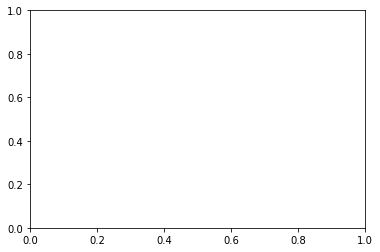

In [155]:
plt.plot(t_dict.keys(), a, 'ro')
plt.show()